In [6]:

# manip CNO
dist60, dist90 = [], []
dist120 = ['RatF20_2022_09_23_10_20_40', 'RatF20_2022_09_23_15_05_59', 'RatF20_2022_09_24_10_01_12', 'RatF20_2022_09_24_15_00_21', 'RatF20_2022_09_25_10_00_00', 'RatF20_2022_09_25_15_00_36', 
            'RatF21_2022_09_23_11_21_46', 'RatF21_2022_09_23_16_06_54', 'RatF21_2022_09_24_11_05_00', 'RatF21_2022_09_24_16_01_09', 'RatF21_2022_09_25_11_02_02', 'RatF21_2022_09_25_16_01_08', 
            'RatF22_2022_09_23_12_22_20', 'RatF22_2022_09_23_17_10_07', 'RatF22_2022_09_24_12_05_42', 'RatF22_2022_09_24_17_01_44', 'RatF22_2022_09_25_12_02_39', 'RatF22_2022_09_25_17_01_38', 
            'RatM20_2022_09_23_10_19_59', 'RatM20_2022_09_23_15_05_19', 'RatM20_2022_09_24_10_00_41', 'RatM20_2022_09_24_14_59_51', 'RatM20_2022_09_25_09_59_21', 'RatM20_2022_09_25_14_59_57', 
            'RatM21_2022_09_23_11_21_00', 'RatM21_2022_09_23_16_06_13', 'RatM21_2022_09_24_11_04_21', 'RatM21_2022_09_24_16_00_28', 'RatM21_2022_09_25_11_01_20', 'RatM21_2022_09_25_16_00_28', 
            'RatM22_2022_09_23_12_21_34', 'RatM22_2022_09_23_17_09_26', 'RatM22_2022_09_24_12_04_59', 'RatM22_2022_09_24_17_01_01', 'RatM22_2022_09_25_12_01_54', 'RatM22_2022_09_25_17_00_56', ]

saline120 = ['RatF20_2022_09_26_10_01_28', 'RatF20_2022_09_26_14_59_40', 
            'RatF21_2022_09_26_11_02_14', 'RatF21_2022_09_26_16_00_31', 
            'RatF22_2022_09_26_12_02_51', 'RatF22_2022_09_26_17_01_09', 
            'RatM20_2022_09_26_10_01_02', 'RatM20_2022_09_26_14_59_15', 
            'RatM21_2022_09_26_11_01_38', 'RatM21_2022_09_26_15_59_47', 
            'RatM22_2022_09_26_12_02_10', 'RatM22_2022_09_26_17_00_24']

CNO_120, CNO_60, CNO_90 = ['RatF20_2022_09_27_10_00_23', 'RatF21_2022_09_27_11_01_13', 'RatF22_2022_09_27_12_01_48', 'RatM20_2022_09_27_09_59_53', 'RatM21_2022_09_27_11_00_33', 'RatM22_2022_09_27_12_01_14',], [], []
postCNO_120 = ['RatF20_2022_09_27_15_00_48', 'RatF21_2022_09_27_16_01_30', 'RatF22_2022_09_27_17_02_11', 'RatM20_2022_09_27_15_00_20', 'RatM21_2022_09_27_16_00_51', 'RatM22_2022_09_27_17_01_24']

allsession = dist120 +saline120 + CNO_120 + postCNO_120

# ----------------------------------------------------------------
## print sessions
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
for animal in animalList:
        for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
            if session not in allsession:
                print("'"+session+"', ")

new= []


lickBug = []
notfixed = []
F00lostTRACKlick = []
buggedRatSessions = []
boundariesBug = []
runstaysepbug = ['RatF20 RatF20_2022_09_23_15_05_59', 'RatM22 RatM22_2022_09_23_12_21_34',]
buggedSessions = lickBug, notfixed, F00lostTRACKlick, buggedRatSessions, boundariesBug, runstaysepbug


# Import all the libraries that we will need 

In [3]:
import copy
import csv
import dabest
import datetime
import fnmatch
import glob
from IPython.display import Image, display, clear_output
import itertools
from itertools import groupby
import matplotlib.cbook
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
%matplotlib inline
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
import platform
from pylab import rcParams
import re
import scipy
from scipy import stats
from scipy.ndimage import gaussian_filter as smooth
from scipy.signal import find_peaks
import statistics
import sys
import time
import warnings
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()

# Define data path.

In [5]:
###Set the notebook screen ratio for jupyter
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:85% !important; }</style>"))

#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/DATA2022CNO"
    savePath="/home/david/Desktop/Save"
else: #mac: if platform.system()=='Darwin':
    root="/Users/tom/Desktop/DATA"#AET-2/test1203"#Desktop/DATARUN_ANALYSIS/test0826"#" #current : test0826
    savePath="/Users/tom/Desktop/Save"#os.path.join(root,"ALLRATS","Fig")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)#print("Notebook Path: ", notebookPath)
print("Save Path: ", savePath)   

Path to data is: /home/david/Desktop/DATA2022CNO
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save


# Define functions

### LOAD DATA
#Data is loaded in one dictionary per variable (time, position, etc.) and have [animal, session] as keys, so we have a set of data for each session of each rat
#This cell loads all the behavioral data from the files created with labview
#data in .position is as follows (as of feb 2021): 
#[0:2]: Step of the experiment, e.g. "Session 1 ON". Takes 3 columns because of the spaces.
#[3]: Time at which the LV iteration has been done. Depends on the acquisition frequency, clock adds 0.04s at each iteration. 
#[4]: POSITION DATA : Position on the X axis (length of the treadmill) of the animal's centroid. This position is in pixels, it needs to be converted into cm using the datapxtocm function. The conversion (11px = 1cm) has been determined in LabView as a result of a calibration to counteract the lens distorsion generated with the camera.
#[5]: Same for the position on the Y axis. 
#[6]: LICK DATA : Left hand side of the treadmill. True/1 if there is a lick False/0 if not.
#[7]: Same but Right side
#[8]: SOLENOID DATA : Same idea as just above, Left Side, but determines if the valve has been opened (might be usefull in %to get reward protocol)
#[9]: Same but Right Side valve.
#[10]: BUFFER DATA : #ID of the frame that has been analyzed by LabView in this iteration, used to check if there is acquisition bugs, difference between two consecutive frames should be == 1.
#[11]: EDITED TRACKING : True/False or 1/0 that tells wether the frame has been edited in LabView. When the animal goes too far into the sides, or when the animal rears, the tracking loses the position of the animal and places the centroid precisely at the center of the tracking area. When this happens I coded LabView to maintain the position of the centroid in the last position in which the rat was detected and resume adequate tracking when available. TLDR, eliminates the jitter when tracking is not working properly. 

### LOAD PARAMETERS
#Parameters are loaded from behav_param file for each [animal, session] in a Dict
#sessionDuration : duration of the session 
#acqPer : number of acquisition per second in labview // not used anymore (acqPer -> delta between Time value of two consecutive frames)
#waterLeft : (weight of the measuring cup + 10 drops of water - weight of the cup) --> Weight of 10 drops on the Left, in grams. divide by 10 to have weight of a drop, multiply by 1000 to have value in µL  
#waterRight : idem on right  
#weight : Weight of each rat just before the session 
#lastWeightadlib : Weight of each rat when the water bottles are removed
#lastDayadlib : Last day with ad lib water
#daysSinceadlib : compute the number of days have elapsed since "lastDayadlib"
#boundaries : initialise the boundary array, that is computed later
#bloc duration data
#probability of getting reward on each side for eeach bloc
#treadmill speed for each block

In [7]:
%run VIGOR-Functions.py

In [ ]:
def openHealthFig(root, session):
    animal = session[:6]
    filePath = root+os.sep+animal+os.sep+"Experiments"+os.sep+session +os.sep+"Figures"+os.sep+"healthFIG"+session+".png"

    if not os.path.exists(filePath):
        print("No healthFIG for %s"%filePath)
        return None
    display(Image(filename=filePath))

def checkHealthFig(root, session):
    animal = session[:6]
    filePath = root+os.sep+animal+os.sep+"Experiments"+os.sep+session +os.sep+"Figures"+os.sep+"healthFIG"+session+".png"

    if not os.path.exists(filePath):
        # print("No healthFIG for %s"%filePath)
        return False
    return True

for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        if session not in allsession:
            continue
        if not checkHealthFig(root, session):
            print("'"+animal+" "+session+"',")

In [ ]:
s= postCNO_120

animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
# for animal in animalList:
for session in s:
    openHealthFig(root, session)
# for animal in animalList:
for session in s:
    print("'"+session[:6]+" "+session+"',")

In [ ]:
def ttt(animal, session,):
    # check is camfix is working on all sessions (see in f())
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]
    edit  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
    pos, edit = fix_start_session(pos, edit)

    _=fixcamglitch(time, pos, edit)
    
    
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
for animal in animalList:
    for session in matchsession(animal, allsession):
        # print(session)
        ttt(animal, session, )

In [128]:

p = {}
from multiprocessing import Array
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]

#for animal in animalList:# animal, index, redoFig, printFigs, redoMask
#    processData(           animal, index, True,    False,     False,  )
progress = Array('d', np.zeros(len(animalList)))
for index, animal in enumerate(animalList):                       # progress, animal, sessions loop through /or[] ,                    index,               redo ,redoFigs, printFigs, redoMask
    p[animal] = multiprocessing.Process(target = checkHealth, args=(progress, root, animal, matchsession(animal, postCNO_120), index, buggedSessions, True, False,     True,  ))
for index, animal in enumerate(animalList):
    p[animal].start()
for index, animal in enumerate(animalList):
    p[animal].join()




# COMPUTE

In [130]:

p = {}
from multiprocessing import Array
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]

#for animal in animalList:# animal, index, redoFig, printFigs, redoMask
# processData(progress, root, 'RatF20', ['sess'], index, buggedSessions, True, True,    False,     True,  )
progress = Array('d', np.zeros(len(animalList)))
for index, animal in enumerate(animalList):                       # progress, animal, sessions loop through /or[] ,                    index,               redo ,redoFigs, printFigs, redoMask
    p[animal] = multiprocessing.Process(target = processData, args=(progress, root, animal, matchsession(animal, postCNO_120), index, buggedSessions, True, True,    False,     True,  ))
for index, animal in enumerate(animalList):
    p[animal].start()
for index, animal in enumerate(animalList):
    p[animal].join()



RatF20                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100% Done ✓ 

RatF21                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100% Done ✓ 

RatF22                                                            __QQ                                                                                                                                                                                    Progress: [                                                   ~~~(_)_">] 100

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

In [ ]:
endTimeNotebook = datetime.datetime.now()
timeExecutionNotebook = endTimeNotebook-startTimeNotebook
print(timeExecutionNotebook)

# Accross session plots 

In [8]:
params = {}
smoothMask = {}
nb_runsBin = {}
rat_markers = {}
speedRunToLeftBin, speedRunToRightBin = {}, {}
timeRunToLeftBin, timeRunToRightBin = {}, {}
maxSpeedLeftBin, maxSpeedRightBin = {}, {}
timeStayInLeftBin, timeStayInRightBin = {}, {}
totalDistance, totalWater, total_trials = {}, {}, {}
XtrackRunToLeftBin, XtrackRunToRightBin = {}, {}
instantSpeedLeftBin, instantSpeedRightBin = {}, {}
trackTimeToLeftBin, trackTimeToRightBin = {}, {}
sequence = {}

### COLORS we use RGB [0-1] not [0-255]. See www.colorhexa.com for conversion 
# old_old_palette = ['darkred', 'indianred', 'orangered', 'darkgreen', 'forestgreen', 'limegreen']
# old_palette = [(0.55, 0.0, 0.0),  (0.8, 0.36, 0.36),   (1.0, 0.27, 0.0), 
#                 (0.0, 0.39, 0.0),    (0.13, 0.55, 0.13),   (0.2, 0.8, 0.2)]


palette = {'RatF20': (0.4, 0.0, 0.0), 'RatF21': (0.55, 0.13, 0.13), 'RatF22': (0.8, 0.2, 0.2), 'RatF03': (1, 0.6, 0.6),
            'RatM20': (0.0, 0.4, 0.0), 'RatM21': (0.13, 0.55, 0.13), 'RatM22': (0.2, 0.8, 0.2), 'RatM03': (0.6, 1.0, 0.6)}
brainstatus = {'RatF20': 'normal', 'RatF21': 'normal', 'RatF22': 'normal', 'RatF03': 'lesion',
               'RatM20': 'normal', 'RatM21': 'normal', 'RatM22': 'normal', 'RatM03': 'normal'}

animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
oldAnimalList = ['RatF20', 'RatF21', 'RatF22', 'RatM20', 'RatM21', 'RatM22']


for index, animal in enumerate(animalList):
    print(animal)
    if fnmatch.fnmatch(animal, 'RatF*'): rat_markers[animal]=[palette[animal], "$\u2640$", brainstatus_plot(brainstatus[animal])]
    elif fnmatch.fnmatch(animal, 'RatM*'): rat_markers[animal]=[palette[animal], "$\u2642$", brainstatus_plot(brainstatus[animal])]
    elif fnmatch.fnmatch(animal, 'Rat00*'): rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$", brainstatus_plot(brainstatus[animal])]
    else: print("error, this is not a rat you got here")

    for session in sorted(matchsession(animal, allsession)):
        params[animal, session]     = get_from_pickle(root, animal, session, name="params.p")
        smoothMask[animal, session] = get_from_pickle(root, animal, session, name="mask.p")
        nb_runsBin[animal, session] = get_from_pickle(root, animal, session, name="nbRuns.p")
        speedRunToLeftBin[animal, session],  speedRunToRightBin[animal, session]  = get_from_pickle(root, animal, session, name="avgSpeed.p")
        maxSpeedLeftBin[animal, session],    maxSpeedRightBin[animal, session]    = get_from_pickle(root, animal, session, name="maxSpeed.p")
        timeStayInLeftBin[animal, session],  timeStayInRightBin[animal, session]  = get_from_pickle(root, animal, session, name="timeinZone.p")
        timeRunToLeftBin[animal, session],   timeRunToRightBin[animal, session]   = get_from_pickle(root, animal, session, name="timeRun.p")
        XtrackRunToLeftBin[animal, session], XtrackRunToRightBin[animal, session] = get_from_pickle(root, animal, session, name="trackPos.p")
        instantSpeedLeftBin[animal, session],instantSpeedRightBin[animal, session]= get_from_pickle(root, animal, session, name="trackSpeed.p")
        trackTimeToLeftBin[animal, session], trackTimeToRightBin[animal, session] = get_from_pickle(root, animal, session, name="trackTime.p")
        totalDistance[animal, session],      totalWater[animal, session], total_trials[animal, session] = get_from_pickle(root, animal, session, name="misc.p")
        sequence[animal, session] = get_from_pickle(root, animal, session, name="test.p")

    # for session in sorted(matchsession(animal, trainDist+TMtrain+postVacsTrain)): # halfyeartrain+lesionTrain
    #     params[animal, session] = get_from_pickle(root, animal, session, name="params.p")
    #     smoothMask[animal, session] = get_from_pickle(root, animal, session, name="mask.p")
    #     totalDistance[animal, session], totalWater[animal, session], total_trials[animal, session] = get_from_pickle(root, animal, session, name="misc.p")


data60, data90, data120 = separate_data(animalList, dist60+dist90+dist120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
datat60, datat90, datat120 = separate_data(animalList, dist60+dist90+dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
sdata60, sdata90, sdata120 = separate_data(animalList, dist60+dist90+dist120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
sdatat60, sdatat90, sdatat120 = separate_data(animalList, dist60+dist90+dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

dataC21_60, dataC21_90, dataC21_120 = separate_data(animalList, C21_120+C21_60+C21_90, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
dataC21_t60, dataC21_t90, dataC21_t120 = separate_data(animalList, C21_120+C21_60+C21_90, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
sdataC21_60, sdataC21_90, sdataC21_120 = separate_data(animalList, C21_120+C21_60+C21_90, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
sdataC21_t60, sdataC21_t90, sdataC21_t120 = separate_data(animalList, C21_120+C21_60+C21_90, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)


RatF20
RatF21
RatF22
RatM20
RatM21
RatM22


/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


NameError: name 'C21_120' is not defined

In [70]:
# speed profiles DIST

# comparison C21 / control last 2 120 sessions

TMrev20end =  ['RatF20_2022_08_09_10_16_32', #'RatF20_2022_08_09_15_17_20', 
             'RatF21_2022_08_09_11_17_57',# 'RatF21_2022_08_09_16_18_44', 
             'RatF22_2022_08_09_12_18_36',# 'RatF22_2022_08_09_17_19_32', 
              'RatM20_2022_08_08_10_09_46',# 'RatM20_2022_08_08_15_03_04', 
             'RatM21_2022_08_08_11_10_44', #'RatM21_2022_08_08_16_03_47', 
         'RatM22_2022_08_08_12_11_37', #'RatM22_2022_08_08_17_05_06'
         ]

TM20end =     ['RatF20_2022_08_08_10_10_22', #'RatF20_2022_08_08_15_03_46', 
            'RatF21_2022_08_08_11_11_37', #'RatF21_2022_08_08_16_04_43', 
             'RatF22_2022_08_08_12_12_27', #'RatF22_2022_08_08_17_05_53', 
            'RatM20_2022_08_09_10_15_44', #'RatM20_2022_08_09_15_16_40', 
            'RatM21_2022_08_09_11_17_02', #'RatM21_2022_08_09_16_17_57', 
             'RatM22_2022_08_09_12_17_42', #'RatM22_2022_08_09_17_18_47'
             ]

postC21_rev20end = [ 'RatF20_2022_08_15_10_02_08', 
                'RatF21_2022_08_15_11_03_26', 
                'RatF22_2022_08_15_12_07_14', 
                'RatM20_2022_08_13_10_02_43',
                'RatM21_2022_08_13_11_03_24', 
                'RatM22_2022_08_13_12_04_01',]

#                AM next day                   PM next day
postC21_20end =    ['RatF20_2022_08_13_10_03_17', 
                'RatF21_2022_08_13_11_04_17', 
                 'RatF22_2022_08_13_12_04_52', 
                 'RatM20_2022_08_15_10_01_45',
                'RatM21_2022_08_15_11_02_37',
                 'RatM22_2022_08_15_12_06_32', ]


datarev20end, _, _, _, _, data20end = separate_data(animalList, TM20end+TMrev20end, XtrackRunToLeftBin, XtrackRunToRightBin, 'TM_ON', params, 'avgrunspeed', True)
datarevt20end, _, _, _, _, datat20end = separate_data(animalList, TM20end+TMrev20end, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)
sdatarev20end, _, _, _, _, sdata20end = separate_data(animalList, TM20end+TMrev20end, instantSpeedLeftBin, instantSpeedRightBin, 'TM_ON', params, 'avgrunspeed', True)
sdatarevt20end, _, _, _, _, sdatat20end = separate_data(animalList, TM20end+TMrev20end, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)

sdatarev20post, _, _, _, _, sdata20post = separate_data(animalList, postC21_20end+postC21_rev20end, instantSpeedLeftBin, instantSpeedRightBin, 'TM_ON', params, 'avgrunspeed', True)
sdatarevt20post, _, _, _, _, sdatat20post = separate_data(animalList, postC21_20end+postC21_rev20end, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    print(animal)
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 3)
        axs.set_ylim(0, 175)

        try:
            for k, l in zip(sdatarevt20post[animal][i], sdatarev20post[animal][i]): plt.plot(k-k[0],l, c='cyan', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdatarev20post[animal][i], sdatarevt20post[animal][i])
            ax = plt.plot(time, traj, color= 'cyan', lw=3, alpha=1) 
        except: pass

        try:
            for k, l in zip(sdatarevt20end[animal][i], sdatarev20end[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdatarev20end[animal][i], sdatarevt20end[animal][i])
            ax = plt.plot(time, traj, color= 'darkgreen', lw=3, alpha=1) 
        except: pass

        try:
            for k, l in zip(sdataC21_revt20[animal][i], sdataC21_rev20[animal][i]): plt.plot(k-k[0],l, c='r', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdataC21_rev20[animal][i], sdataC21_revt20[animal][i])
            ax = plt.plot(time, traj, color= 'darkred', lw=3, alpha=1) 
        except:
            pass

KeyError: ('RatF20', 'RatF20_2022_08_08_10_10_22')

In [ ]:
for index, animal in enumerate(oldAnimalList):
    sessionList = TMrev20 + TM20
    for session in matchsession(animal, sessionList):
        params[animal, session]["boundaryLeft"] = read_params(root, animal, session, "boundaryLeft")
        params[animal, session]["boundaryRight"] = read_params(root, animal, session, "boundaryRight")
        print(animal, session, params[animal, session]["boundaryLeft"], params[animal, session]["boundaryRight"])

In [ ]:
# speed profiles DIST

# comparison C21 / control last 2 120 sessions

TMrev20end =  ['RatF20_2022_08_09_10_16_32', #'RatF20_2022_08_09_15_17_20', 
             'RatF21_2022_08_09_11_17_57',# 'RatF21_2022_08_09_16_18_44', 
             'RatF22_2022_08_09_12_18_36',# 'RatF22_2022_08_09_17_19_32', 
              'RatM20_2022_08_08_10_09_46',# 'RatM20_2022_08_08_15_03_04', 
             'RatM21_2022_08_08_11_10_44', #'RatM21_2022_08_08_16_03_47', 
         'RatM22_2022_08_08_12_11_37', #'RatM22_2022_08_08_17_05_06'
         ]

TM20end =     ['RatF20_2022_08_08_10_10_22', #'RatF20_2022_08_08_15_03_46', 
            'RatF21_2022_08_08_11_11_37', #'RatF21_2022_08_08_16_04_43', 
             'RatF22_2022_08_08_12_12_27', #'RatF22_2022_08_08_17_05_53', 
            'RatM20_2022_08_09_10_15_44', #'RatM20_2022_08_09_15_16_40', 
            'RatM21_2022_08_09_11_17_02', #'RatM21_2022_08_09_16_17_57', 
             'RatM22_2022_08_09_12_17_42', #'RatM22_2022_08_09_17_18_47'
             ]


datarev20end, _, _, _, _, data20end = separate_data(animalList, TM20end+TMrev20end, XtrackRunToLeftBin, XtrackRunToRightBin, 'TM_ON', params, 'avgrunspeed', True)
datarevt20end, _, _, _, _, datat20end = separate_data(animalList, TM20end+TMrev20end, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)
sdatarev20end, _, _, _, _, sdata20end = separate_data(animalList, TM20end+TMrev20end, instantSpeedLeftBin, instantSpeedRightBin, 'TM_ON', params, 'avgrunspeed', True)
sdatarevt20end, _, _, _, _, sdatat20end = separate_data(animalList, TM20end+TMrev20end, trackTimeToLeftBin, trackTimeToRightBin, 'TM_ON', params, 'avgrunspeed', True)

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    print(animal)
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 3)
        axs.set_ylim(0, 175)

        try:
            for k, l in zip(sdatat20end[animal][i], sdata20end[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdata20end[animal][i], sdatat20end[animal][i])
            ax = plt.plot(time, traj, color= 'darkgreen', lw=3, alpha=1) 
        except IndexError:
            pass
        
        try:
            for k, l in zip(sdataC21_t20[animal][i], sdataC21_20[animal][i]): plt.plot(k-k[0],l, c='r', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdataC21_20[animal][i], sdataC21_t20[animal][i])
            ax = plt.plot(time, traj, color= 'darkred', lw=3, alpha=1) 
        except IndexError:
            pass

In [ ]:
#90
fig, axs = plt.subplots(6, 11, constrained_layout = False, figsize=(35, 25))
stat = "Med. "
scatter  = True
for index, animal in enumerate(animalList):
    for session in [matchsession(animal, dist90)[-2]]:
        plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 0]);
        plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['orange'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 1]);
        plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 2]);
        plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i]   for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6],   color = ['red'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 3]);
        plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i]     for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 120], color = ['red'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 4]);

    blank_plot(axs[index, 5])
    for session in matchsession(animal, C21_90):
        plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 6]);
        plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 7]);
        plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 8]);
        plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 9]);
        plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 120], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 10]);



RatF20_2022_09_26_10_01_28 RatF20_2022_09_27_10_00_23
RatF21_2022_09_26_11_02_14 RatF21_2022_09_27_11_01_13
RatF22_2022_09_26_12_02_51 RatF22_2022_09_27_12_01_48
RatM20_2022_09_26_10_01_02 RatM20_2022_09_27_09_59_53
RatM21_2022_09_26_11_01_38 RatM21_2022_09_27_11_00_33
RatM22_2022_09_26_12_02_10 RatM22_2022_09_27_12_01_14


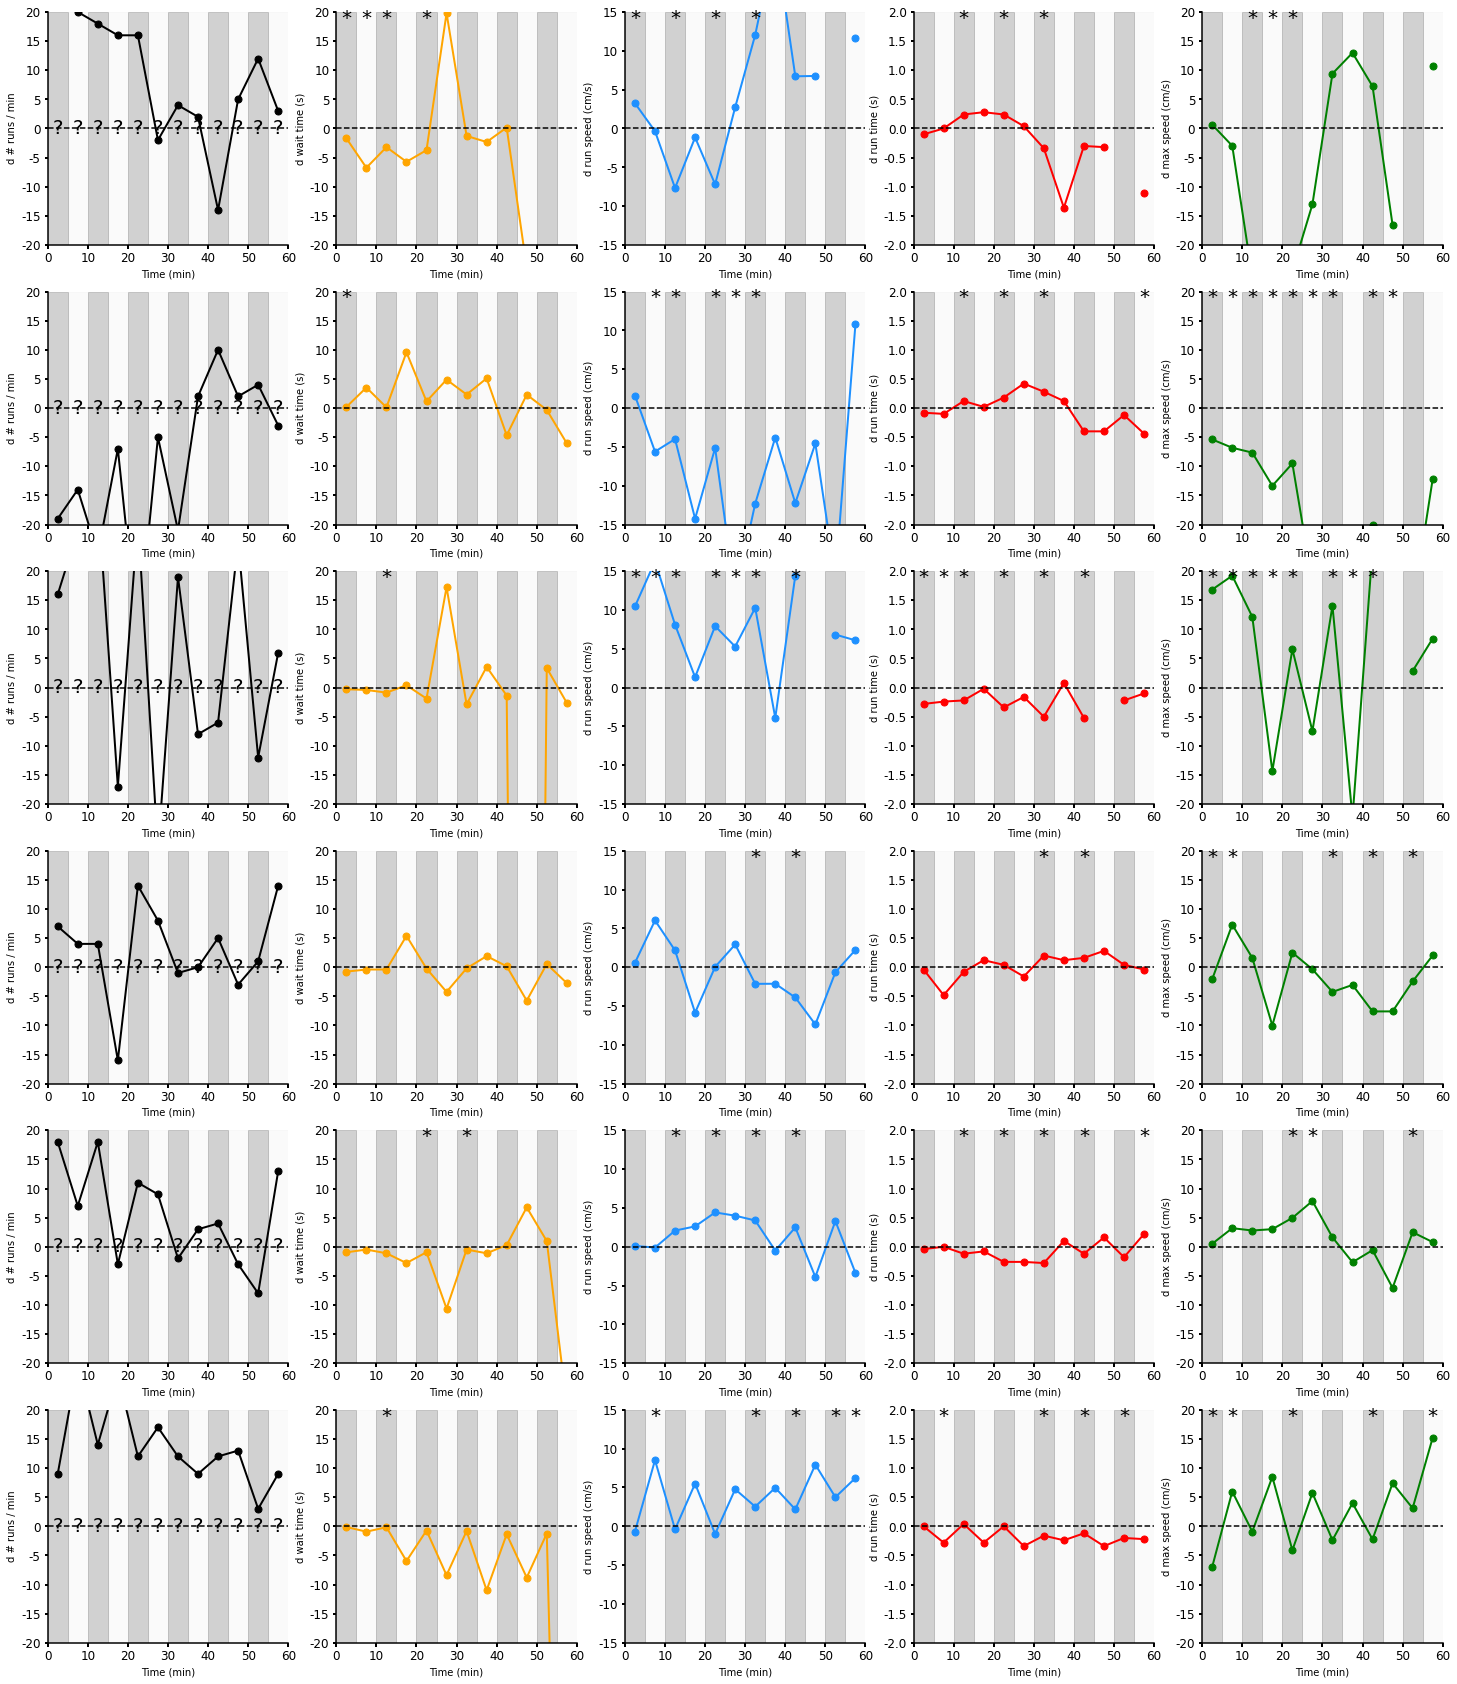

In [131]:


cols = 5 
rows = len(animalList)
fig, axs = plt.subplots(rows, cols, constrained_layout = False, figsize=(5*cols, 5*rows))


variables = ['nb_runs', 'timeStay', 'speedRun', 'timeRun', 'maxSpeed']

for row, animal in enumerate(animalList):
    session1 = matchsession(animal, saline120)[0]
    session2 = matchsession(animal, CNO_120)[0]
    print(session1, session2)
    for col, variable in enumerate(variables):
        #plot session1 - session2
        
        compare2sessions(animal,variable, session1, session2, 'median', ax=axs[row, col])

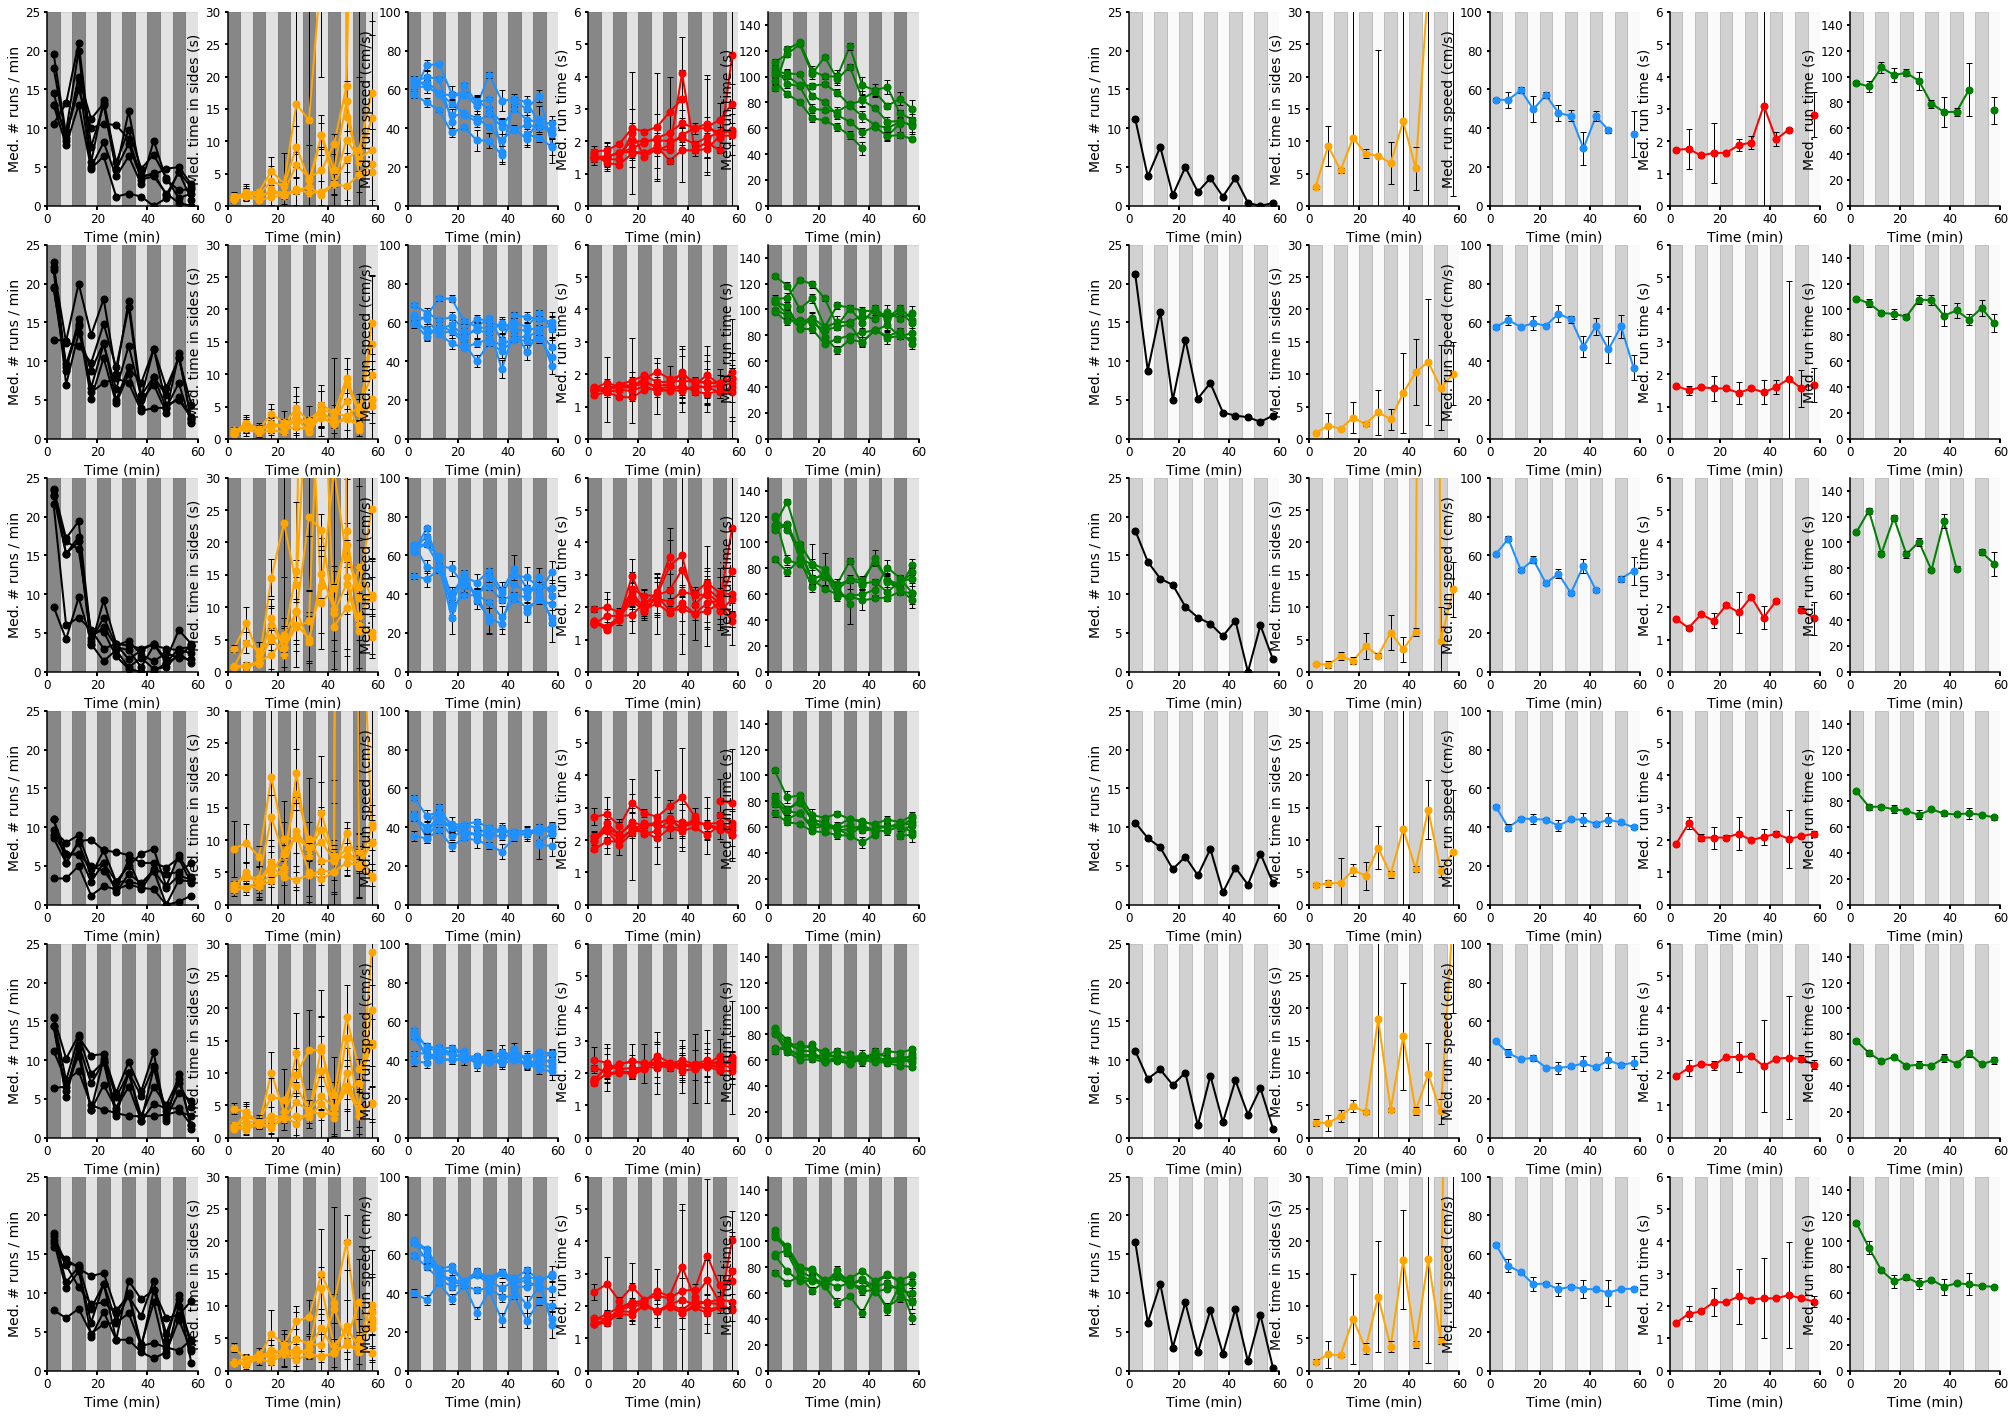

In [123]:
fig, axs = plt.subplots(6, 11, constrained_layout = False, figsize=(35, 25))
stat = "Med. "
scatter  = False
for index, animal in enumerate(animalList):
    for session in matchsession(animal, dist120):
        plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 0]);
        plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['orange'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 1]);
        plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 2]);
        plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i]   for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6],   color = ['red'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 3]);
        plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i]     for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['green'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 4]);

    blank_plot(axs[index, 5])
    for session in matchsession(animal, CNO_120):
        plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 6]);
        plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 7]);
        plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 8]);
        plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i]   for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 9]);
        plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i]     for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['green'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 10]);



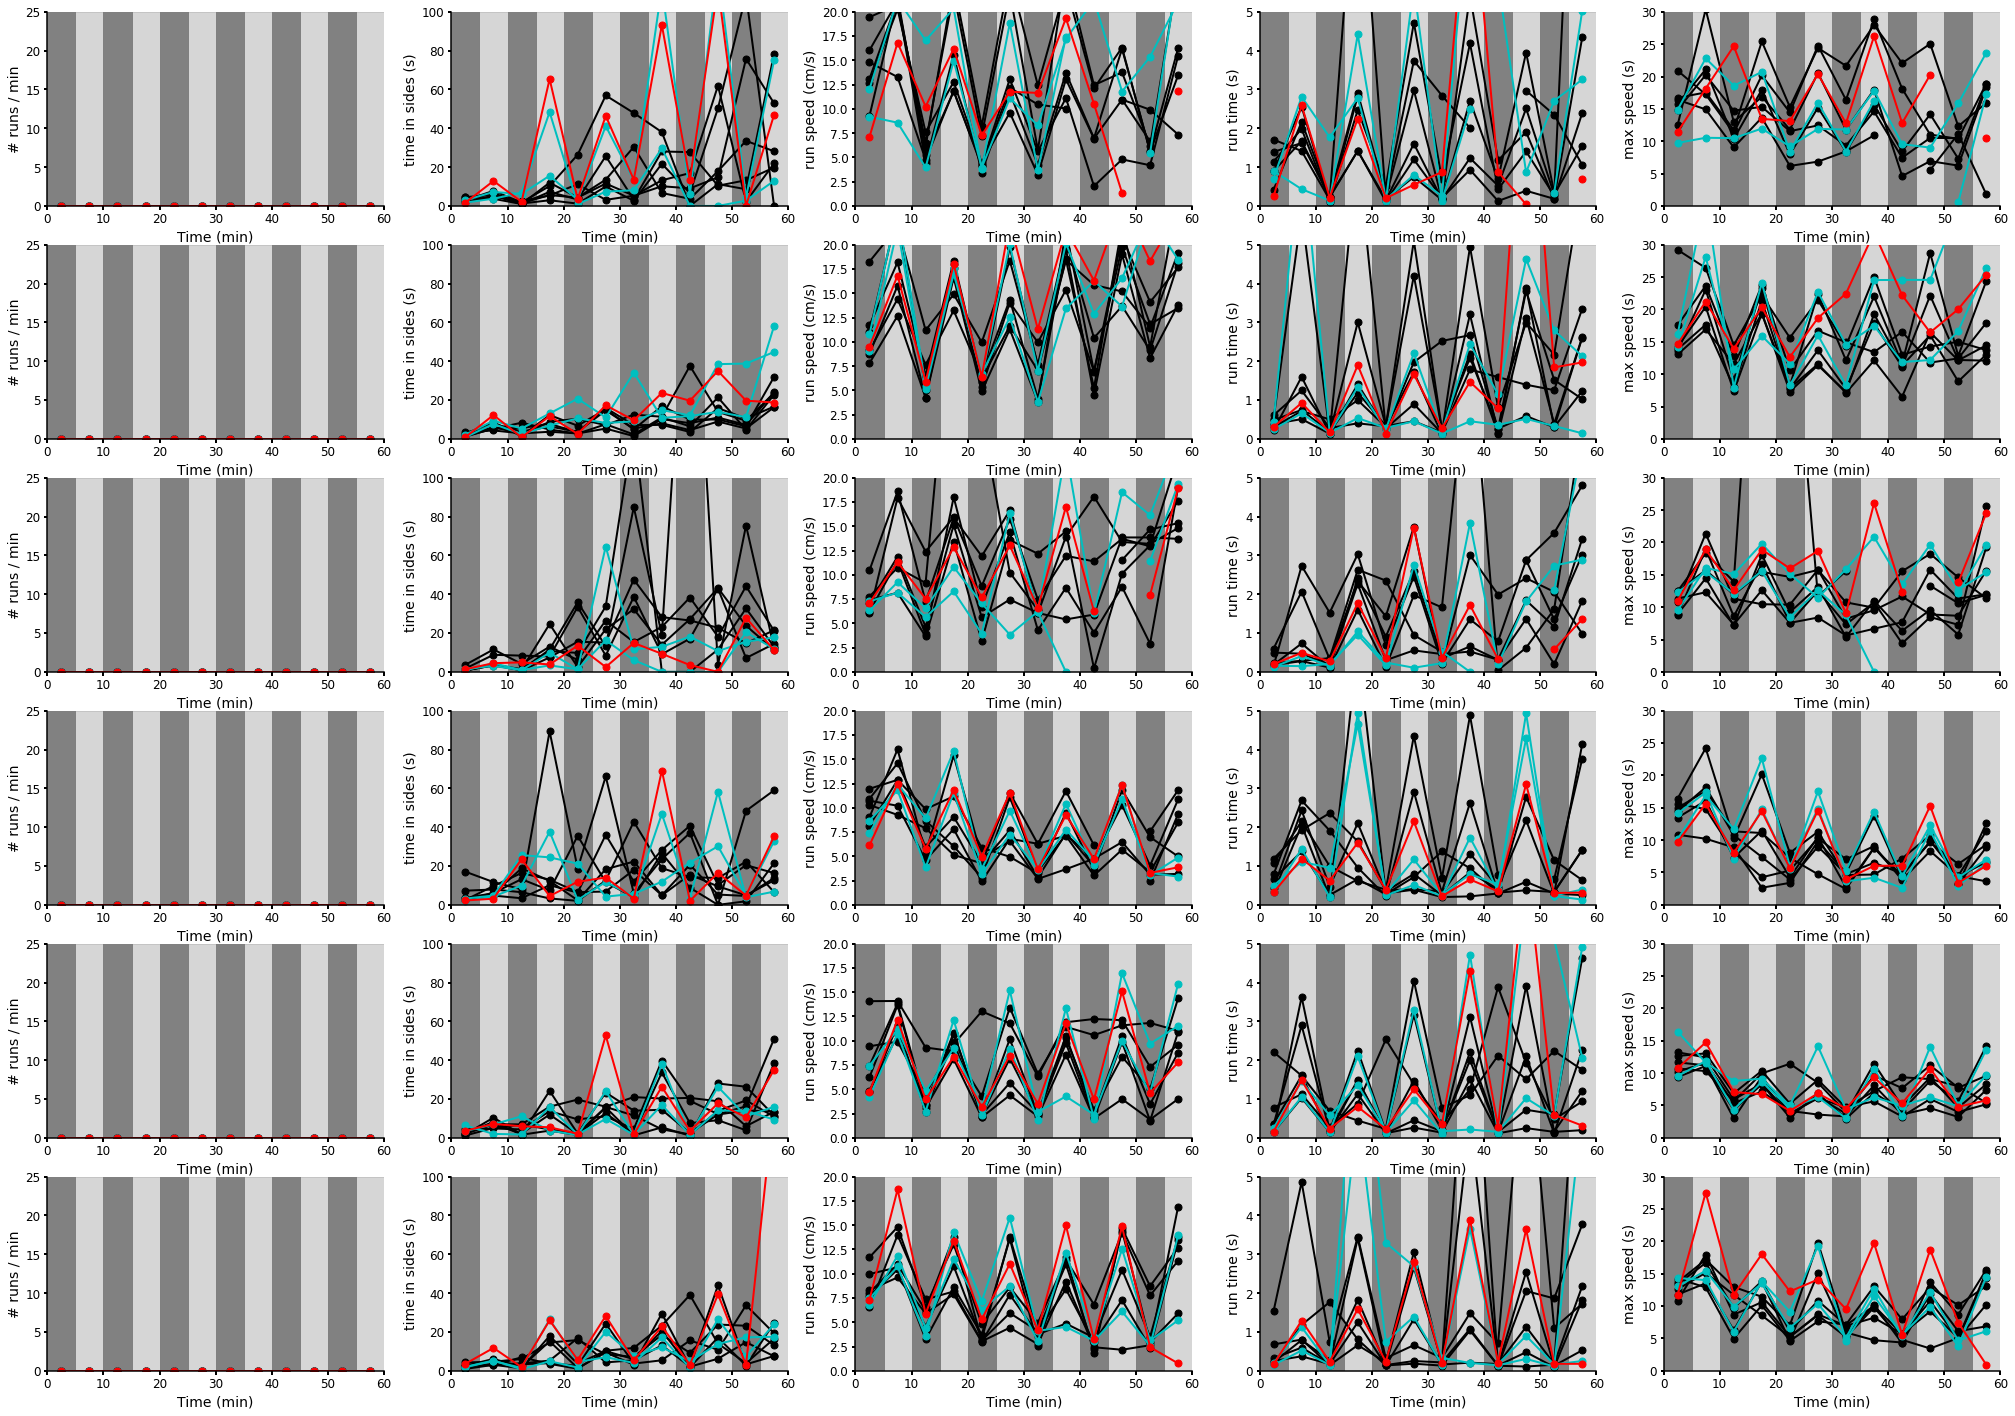

In [125]:
# pool all session variability vs c21
fig, axs = plt.subplots(6, 5, constrained_layout = False, figsize=(35, 25))
stat = "Med. "
scatter  = False
%run VIGOR-Functions.py

def poolsessions(animal, sessionlist, data, data2=None):
    output = {k:[] for k in range(12)}
    for session in sessionlist:
        for i in range(12):
            if data2 is not None:
                output[i] = np.append(output[i], data[animal, session][i]+data2[animal, session][i])
            else:
                output[i] = np.append(output[i], data[animal, session][i])
        for i in range(12):
            output[i] = np.array(output[i]).flatten()
    return output

pre, saline, CNO, strr = dist120, saline120, CNO_120, str(120)


for index, animal in enumerate(animalList):
    # sessionlist = matchsession(animal, dist90)
    # for session in sessionlist:
    #     plot_figBinVaria([poolsessions(animal, sessionlist, nb_runsBin, None)[i]/5 for i in range(12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], binplot=axs[index, 0]);
    #     plot_figBinVaria(poolsessions(animal, sessionlist, timeStayInLeftBin, timeStayInRightBin), params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['k'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 1]);
    #     plot_figBinVaria(poolsessions(animal, sessionlist, speedRunToLeftBin, speedRunToRightBin), params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 5], color = ['k'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 2]);
    #     plot_figBinVaria(poolsessions(animal, sessionlist, timeRunToLeftBin, timeRunToRightBin), params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 1],   color = ['k'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 3]);
    #     plot_figBinVaria(poolsessions(animal, sessionlist, maxSpeedLeftBin, maxSpeedRightBin), params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 5], color = ['k'],        xyLabels=["Time (min)", "max speed (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 4]);



    for session in matchsession(animal, pre):
        plot_figBinVaria([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], binplot=axs[index, 0]);
        plot_figBinVaria([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['k'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 1]);
        plot_figBinVaria([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 20], color = ['k'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 2]);
        plot_figBinVaria([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 5], color = ['k'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 3]);
        plot_figBinVaria([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['k'], xyLabels=["Time (min)", "max speed (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 4]);


    for session in matchsession(animal, saline):
        plot_figBinVaria([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['c'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], binplot=axs[index, 0]);
        plot_figBinVaria([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['c'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 1]);
        plot_figBinVaria([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 20], color = ['c'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 2]);
        plot_figBinVaria([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 5], color = ['c'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 3]);
        plot_figBinVaria([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['c'], xyLabels=["Time (min)", "max speed (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 4]);


    for session in matchsession(animal, CNO):
        plot_figBinVaria([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['r'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], binplot=axs[index, 0]);
        plot_figBinVaria([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['r'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 1]);
        plot_figBinVaria([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 20], color = ['r'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 2]);
        plot_figBinVaria([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 5], color = ['r'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 3]);
        plot_figBinVaria([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['r'], xyLabels=["Time (min)", "max speed (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, binplot=axs[index, 4]);




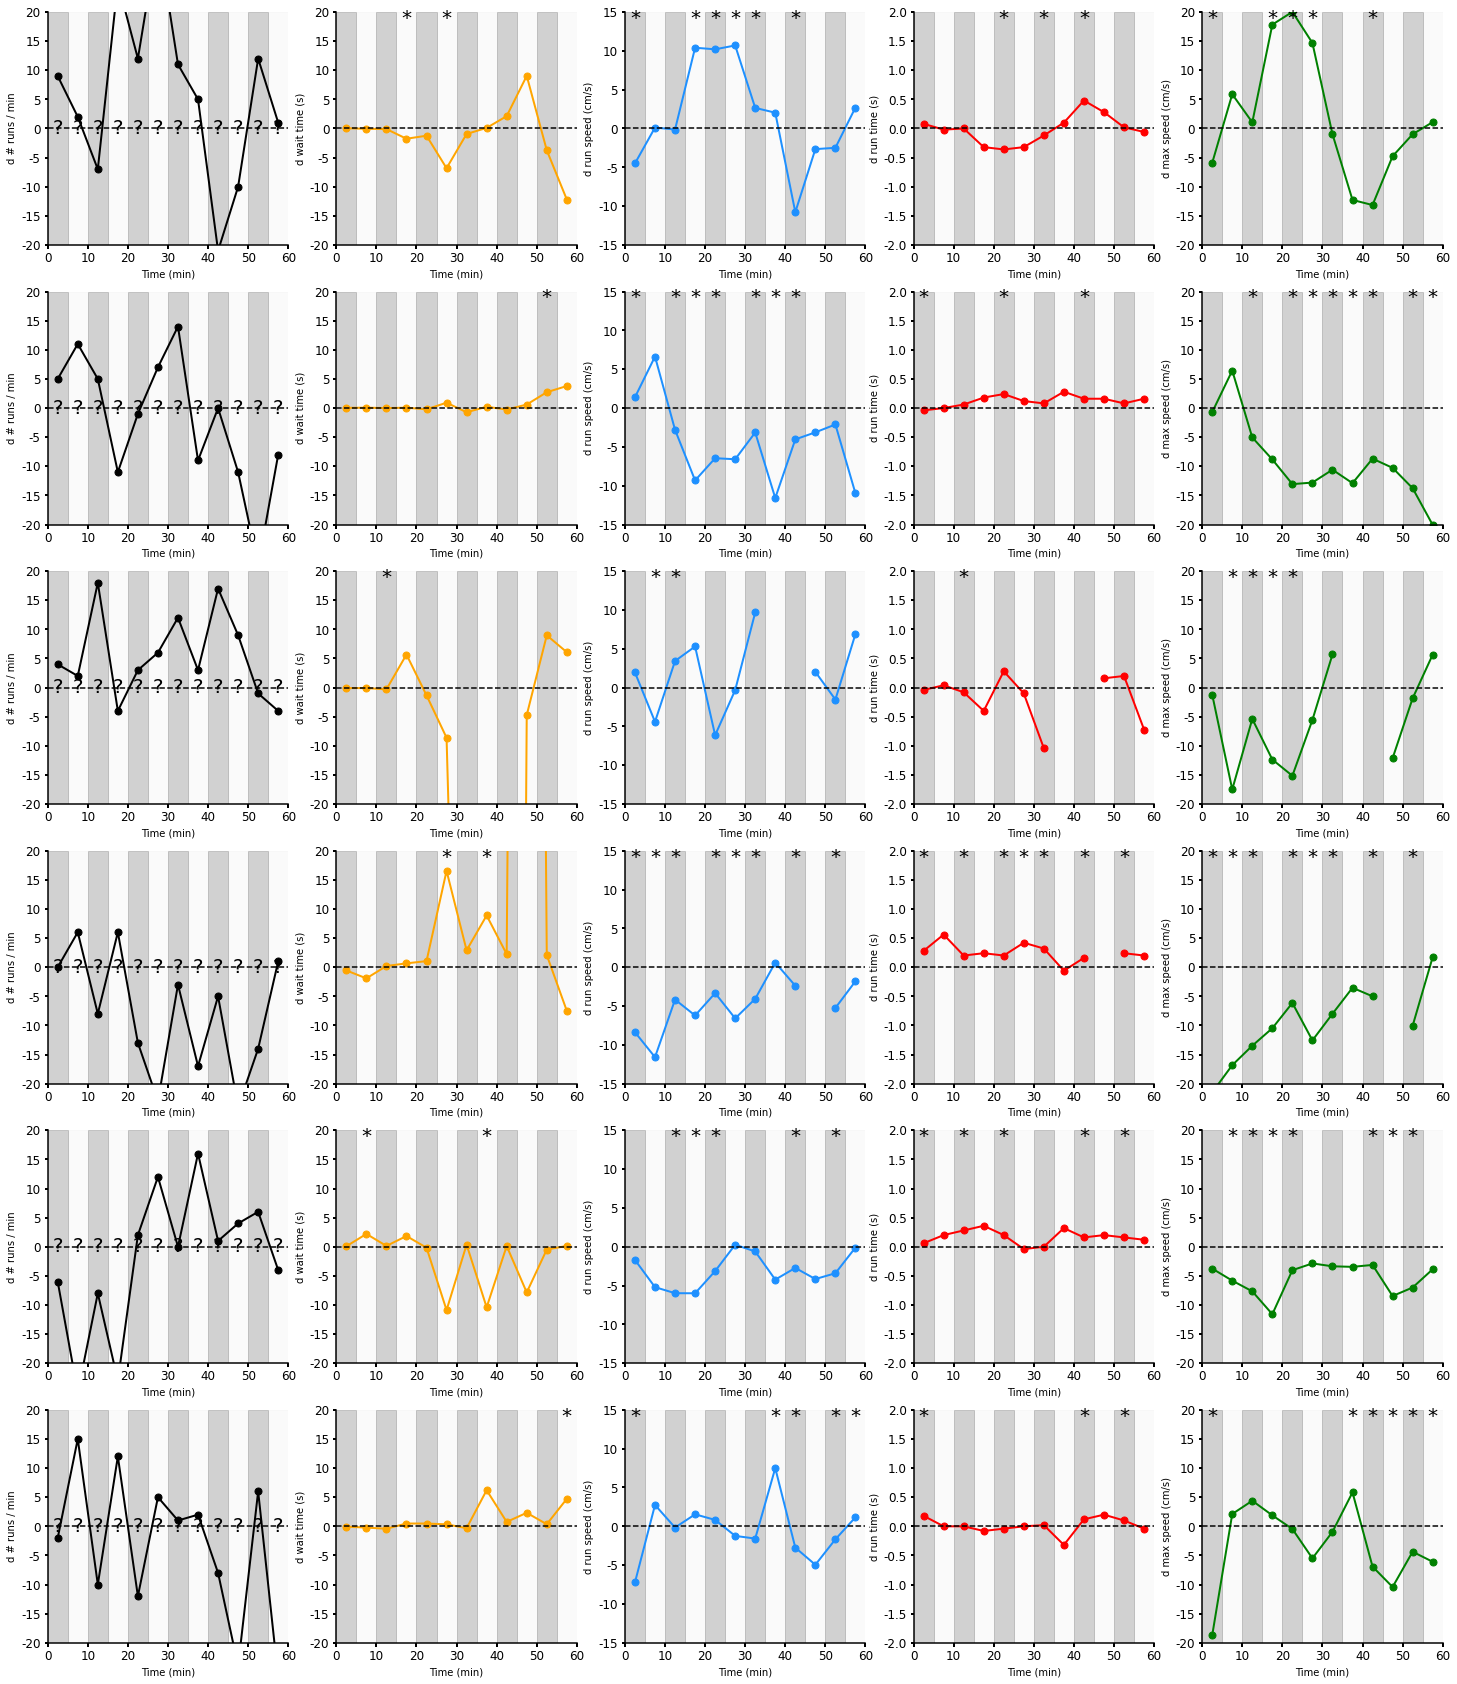

In [100]:

def compare2sessions(animal, variable, session1, session2, stat, ax=None):
    if ax is None:
        ax = plt.gca()
    t_stats = np.ones(12)
    p_vals = np.ones(12)
    if stat == 'mean':
        if variable == 'nb_runs':
            data = np.array([nb_runsBin[animal, session1][i]/5 for i in range(0, 12)]) - np.array([nb_runsBin[animal, session2][i]/5 for i in range(0, 12)])
            # t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
            color = 'k'
            ylabel = "d \u0023 runs / min"
            ylim = [-20, 20]
        elif variable == 'timeStay':
            data = np.array([np.mean(timeStayInLeftBin[animal, session1][i]+timeStayInRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.mean(timeStayInLeftBin[animal, session2][i]+timeStayInRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = timeStayInLeftBin[animal, session1][i]+timeStayInRightBin[animal, session1][i]
                sample2 = timeStayInLeftBin[animal, session2][i]+timeStayInRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'orange'
            ylabel = "d wait time (s)"
            ylim = [-20, 20]
        elif variable == 'speedRun':
            data = np.array([np.mean(speedRunToLeftBin[animal, session1][i]+speedRunToRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.mean(speedRunToLeftBin[animal, session2][i]+speedRunToRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = speedRunToLeftBin[animal, session1][i]+speedRunToRightBin[animal, session1][i]
                sample2 = speedRunToLeftBin[animal, session2][i]+speedRunToRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'dodgerblue'
            ylabel = "d run speed (cm/s)"
            ylim = [-15, 15]
        elif variable == 'timeRun':
            data = np.array([np.mean(timeRunToLeftBin[animal, session1][i]+timeRunToRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.mean(timeRunToLeftBin[animal, session2][i]+timeRunToRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = timeRunToLeftBin[animal, session1][i]+timeRunToRightBin[animal, session1][i]
                sample2 = timeRunToLeftBin[animal, session2][i]+timeRunToRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'red'
            ylabel = "d run time (s)"
            ylim = [-2, 2]
        elif variable == 'maxSpeed':
            data = np.array([np.mean(maxSpeedLeftBin[animal, session1][i]+maxSpeedRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.mean(maxSpeedLeftBin[animal, session2][i]+maxSpeedRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = maxSpeedLeftBin[animal, session1][i]+maxSpeedRightBin[animal, session1][i]
                sample2 = maxSpeedLeftBin[animal, session2][i]+maxSpeedRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'green'
            ylabel = "d max speed (cm/s)"
            ylim = [-20, 20]

    elif stat == 'median':
        if variable == 'nb_runs':
            data = np.array([np.median(nb_runsBin[animal, session1][i]) for i in range(0, 12)]) - np.array([np.median(nb_runsBin[animal, session2][i]) for i in range(0, 12)])
            # t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
            color = 'k'
            ylabel = "d \u0023 runs / min"
            ylim = [-20, 20]
        elif variable == 'timeStay':
            data = np.array([np.median(timeStayInLeftBin[animal, session1][i]+timeStayInRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.median(timeStayInLeftBin[animal, session2][i]+timeStayInRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = timeStayInLeftBin[animal, session1][i]+timeStayInRightBin[animal, session1][i]
                sample2 = timeStayInLeftBin[animal, session2][i]+timeStayInRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'orange'
            ylabel = "d wait time (s)"
            ylim = [-20, 20]
        elif variable == 'speedRun':
            data = np.array([np.median(speedRunToLeftBin[animal, session1][i]+speedRunToRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.median(speedRunToLeftBin[animal, session2][i]+speedRunToRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = speedRunToLeftBin[animal, session1][i]+speedRunToRightBin[animal, session1][i]
                sample2 = speedRunToLeftBin[animal, session2][i]+speedRunToRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'dodgerblue'
            ylabel = "d run speed (cm/s)"
            ylim = [-15, 15]
        elif variable == 'timeRun':
            data = np.array([np.median(timeRunToLeftBin[animal, session1][i]+timeRunToRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.median(timeRunToLeftBin[animal, session2][i]+timeRunToRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = timeRunToLeftBin[animal, session1][i]+timeRunToRightBin[animal, session1][i]
                sample2 = timeRunToLeftBin[animal, session2][i]+timeRunToRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'red'
            ylabel = "d run time (s)"
            ylim = [-2, 2]
        elif variable == 'maxSpeed':
            data = np.array([np.median(maxSpeedLeftBin[animal, session1][i]+maxSpeedRightBin[animal, session1][i]) for i in range(0, 12)])-np.array([np.median(maxSpeedLeftBin[animal, session2][i]+maxSpeedRightBin[animal, session2][i]) for i in range(0, 12)])
            for i in range(0, 12):
                sample1 = maxSpeedLeftBin[animal, session1][i]+maxSpeedRightBin[animal, session1][i]
                sample2 = maxSpeedLeftBin[animal, session2][i]+maxSpeedRightBin[animal, session2][i]
                t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)
                t_stats[i] = t_stat
                p_vals[i] = p_val
            color = 'green'
            ylabel = "d max speed (cm/s)"
            ylim = [-20, 20]





    blocks = params[animal, session1]['blocks']
    rewardProbaBlock = params[animal, session1]['rewardProbaBlock']
    for i in range(0, len(blocks)):
        ax.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        if p_vals[i] < 0.05:
            ax.text((blocks[i][0]+blocks[i][1])/120, ylim[1]*0.9, "*", fontsize=20, color='k', horizontalalignment='center')
            # ax.text((blocks[i][0]+blocks[i][1])/2/60, 0, "*", horizontalalignment='center', verticalalignment='center', fontsize=20, color='k')
        if p_vals[i] == 1:
            ax.text((blocks[i][0]+blocks[i][1])/2/60, 0, "?", horizontalalignment='center', verticalalignment='center', fontsize=20, color=color)
        
        # print(t_stats[i], p_vals[i])

    
    
    x = [(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))]
    ax.plot(x, data, marker='o', ms=7, linewidth=2, color=color)
    ax.axhline(0, color='k', linestyle='--', linewidth=1.5)
    ax.set_xlabel("Time (min)")
    ax.set_ylabel(ylabel)
    ax.set_xlim(0, 60)
    ax.set_ylim(ylim)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.tick_params(width=2, labelsize=12)

cols = 5 
rows = len(animalList)
fig, axs = plt.subplots(rows, cols, constrained_layout = False, figsize=(5*cols, 5*rows))


variables = ['nb_runs', 'timeStay', 'speedRun', 'timeRun', 'maxSpeed']

for row, animal in enumerate(animalList):
    for col, variable in enumerate(variables):
        #plot 1-2
        session1 = matchsession(animal, dist120)[-4]
        session2 = matchsession(animal, dist120)[-2]
        compare2sessions(animal,variable, session1, session2, 'median', ax=axs[row, col])

In [ ]:
fig, axs = plt.subplots(6, 5, constrained_layout = False, figsize=(25, 25))
stat = "Med. "
scatter  = False
for index, animal in enumerate(animalList):
    for session in matchsession(animal, TMrev20):
        if int(session[18:20]) < 14:
            plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 0]);
            plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['orange'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 1]);
            plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['dodgerblue'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 2]);
            plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i]   for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6],   color = ['red'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 3]);
            plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i]     for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 60, 150], color = ['red'],        xyLabels=["Time (min)", "max speed (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 4]);
    
    session = matchsession(animal, C21_rev20)[0]
    plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['green'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 0]);
    plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['green'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 1]);
    plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['green'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 2]);
    plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i]   for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6],   color = ['green'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 3]);
    plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i]     for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 60, 150], color = ['green'],        xyLabels=["Time (min)", "max speed (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 4]);

    for session in matchsession(animal, postC21_rev20):
        if int(session[18:20]) < 14:
            plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['cyan'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, 0]);
            plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['cyan'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 1]);
            plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['cyan'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 2]);
            plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i]   for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6],   color = ['cyan'],        xyLabels=["Time (min)", "run time (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 3]);
            plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i]     for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 60, 150], color = ['cyan'],        xyLabels=["Time (min)", "max speed (s)", 14, 12],      title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, 4]);

/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


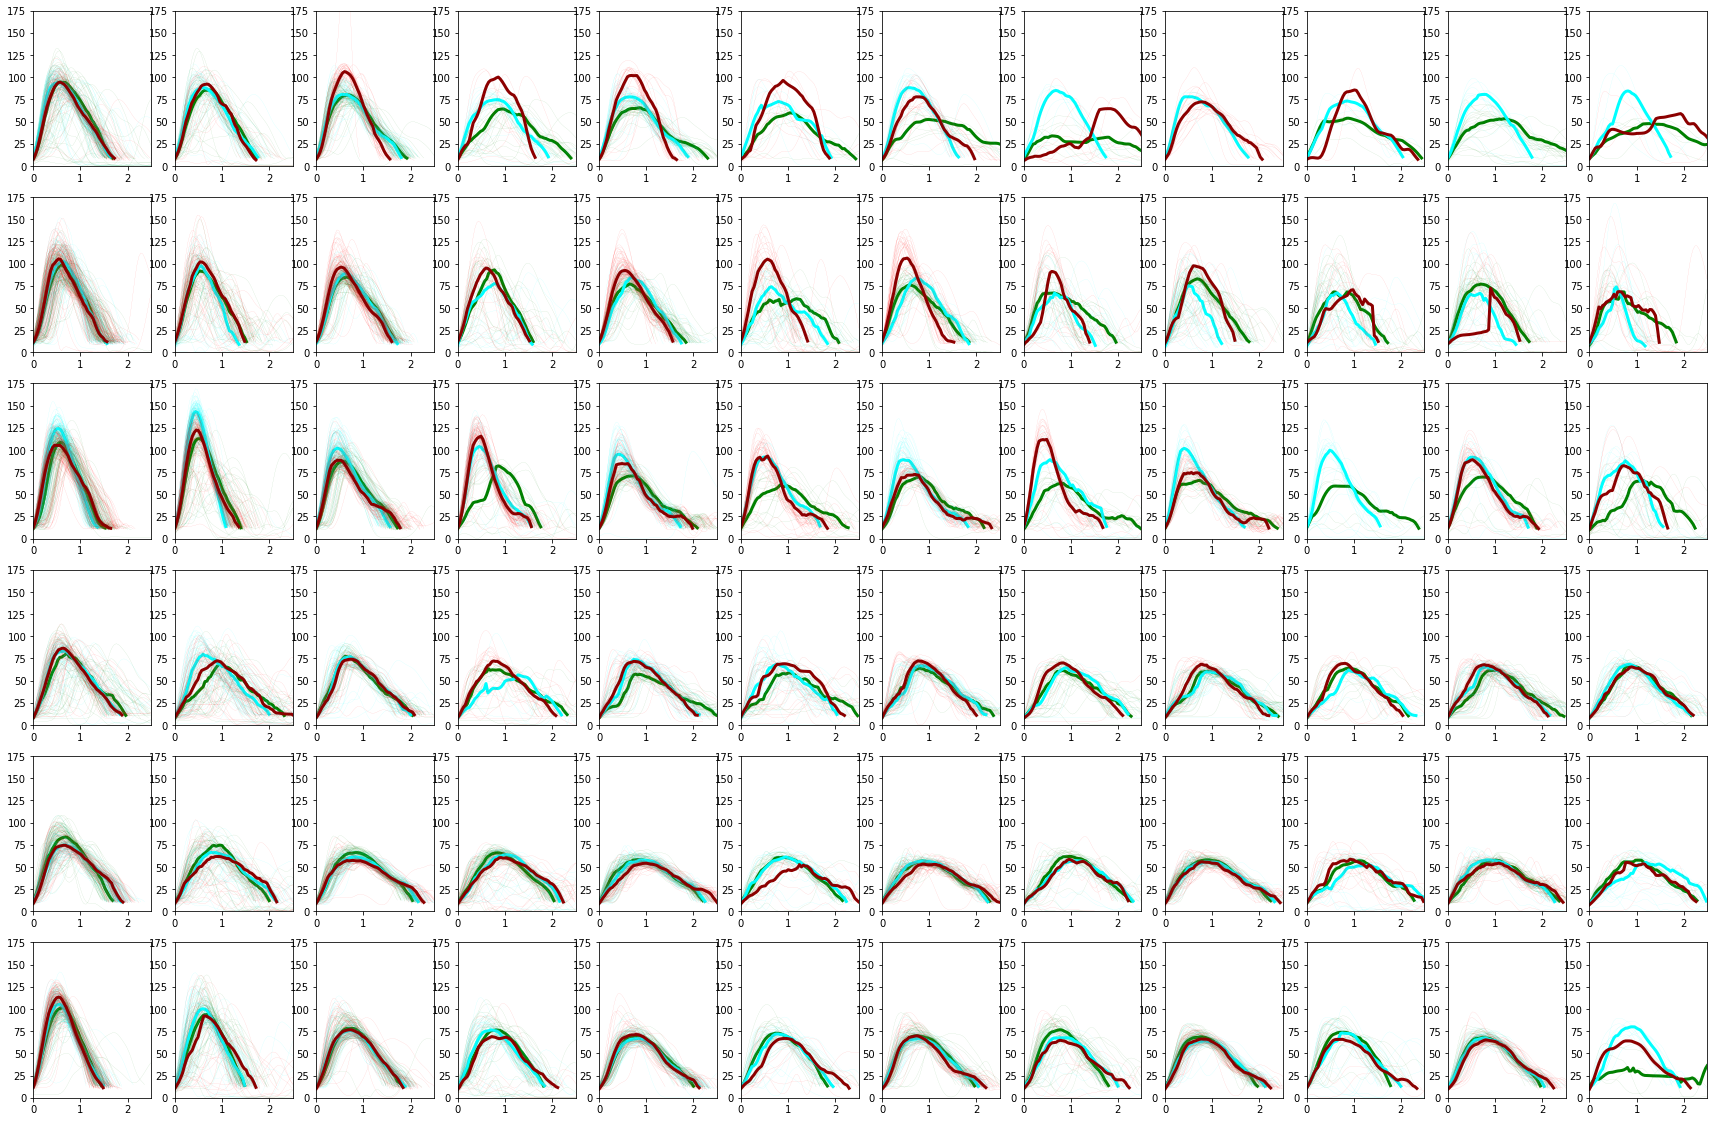

In [138]:
# speed profiles DIST

saline120 = ['RatF20_2022_09_26_10_01_28',
            'RatF21_2022_09_26_11_02_14', 
            'RatF22_2022_09_26_12_02_51', 
            'RatM20_2022_09_26_10_01_02', 
            'RatM21_2022_09_26_11_01_38', 
            'RatM22_2022_09_26_12_02_10',]

CNO_120, CNO_60, CNO_90 = ['RatF20_2022_09_27_10_00_23', 'RatF21_2022_09_27_11_01_13', 'RatF22_2022_09_27_12_01_48', 'RatM20_2022_09_27_09_59_53', 'RatM21_2022_09_27_11_00_33', 'RatM22_2022_09_27_12_01_14',], [], []

dist120end = ['RatF20_2022_09_25_10_00_00',  
            'RatF21_2022_09_25_11_02_02', 
             'RatF22_2022_09_25_12_02_39',  
             'RatM20_2022_09_25_09_59_21',  
             'RatM21_2022_09_25_11_01_20', 
            'RatM22_2022_09_25_12_01_54', ]

_, _, sdata120pre = separate_data(animalList, dist120end, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdatat120pre = separate_data(animalList, dist120end, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

_, _, sdatasaline = separate_data(animalList, saline120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdatatsaline = separate_data(animalList, saline120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

_, _, sdata120cno = separate_data(animalList, CNO_120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdatat120cno = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)

        try:
            for k, l in zip(sdatat120pre[animal][i], sdata120pre[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdata120pre[animal][i], sdatat120pre[animal][i])
            ax = plt.plot(time, traj, color= 'g', lw=3, alpha=1) 
        except: pass
        try:
            for k, l in zip(sdatatsaline[animal][i], sdatasaline[animal][i]): plt.plot(k-k[0],l, c='cyan', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdatasaline[animal][i], sdatatsaline[animal][i])
            ax = plt.plot(time, traj, color= 'cyan', lw=3, alpha=1) 
        except: pass
        try:
            for k, l in zip(sdatat120cno[animal][i], sdata120cno[animal][i]): plt.plot(k-k[0],l, c='r', lw=0.1, alpha=0.5)
            time, traj = compute_median_trajectory(sdata120cno[animal][i], sdatat120cno[animal][i])
            ax = plt.plot(time, traj, color= 'darkred', lw=3, alpha=1) 
        except: pass

In [ ]:
#index, start action, type action, getrwd?, duration, distance
# animal, session = "RatF02", "RatF02_2021_07_22_18_14_16"
# animal, session = "RatF02", "RatF02_2021_07_24_12_55_26"
# dict(list(sequence[animal, session].items())[20:40])

In [ ]:
def bin_seq(seq):
    # cut the full sequence in blocks
    prevblock = 0
    index = 0
    binseq = {k:{} for k in [_ for _ in range(0,12)]}
    for i in range(0, len(seq)): 
        if get_block(seq[i][0]) != prevblock: index = i  # if change block (next block) store action# to reset first action of next block to 0
        binseq[get_block(seq[i][0])][i-index] = seq[i]
        prevblock = get_block(seq[i][0])
    return binseq


def blank_plot(ax=None, col=None):
    if ax is None:
        ax = plt.gca()
    if col is not None:
        ax[col].axis('off') 
    else: ax.axis('off')
    return ax
    

def find_sequence(input, target_seq):
    # find the indices of the target seq in the input
    # call: find_sequence(sequence[animal, session], "0 0 1 1")
    converted = []
    for elem in range(len(input)):
        if input[elem][1] == 'run': converted.append(input[elem][2])
        else: converted.append(" ")
    
    reward_sequence = ''.join([str(_) for _ in converted])
    max_len = len(target_seq)
    found_indices = []
    for i in range(len(reward_sequence)):
        chunk = reward_sequence[i:i+max_len+1]
        for j in range(1, len(chunk)+1):
            seq = chunk[:j]
            if seq == target_seq:
                #if i>10 and i<len(reward_sequence)-15:
                    found_indices.append(i+len(seq)-1)
    return found_indices


def plot_around_indices(input, target_seq, var, ax=None):
    # plot variable during and after input sequence
    # call: plot_around_indices(sequence[animal, session], "0 0 1 1", "speed", axs[0])
    indices = find_sequence(input, target_seq)
    print(f'Found {len(indices)} matches')
    if ax is None: ax = plt.gca()
    ax.plot((0, 0), (-1, 100), c='k', ls='--', lw=2)

    if len(indices) > 0:

        yy = np.empty((len(indices), 22))
        x = np.arange(-10, 11, 1.0)[::2]
        meanvar = []

        for i, index in enumerate(indices):
            
            if index > 10: low = index-10
            else: low = 0

            if index > len(input)-15: high = len(input)-1
            else: high = index+11 

            if var == "speed":
                for r in range(low, high):
                    if input[r][1] == 'run':
                        ax.scatter(np.random.normal(r-index, 0.25, 1), abs(input[r][4]), c='dodgerblue', s=4)
                        try: yy[i][r-index+10] = abs(input[r][4])
                        except IndexError: pass
                for r in range(index+1, high):
                    if input[r][1] == 'run':
                        meanvar.append(abs(input[r][4]))
                y = np.median(yy, axis=0)[::2]
                ax.set_ylim(20, 120)
                
            if var == "wait":
                for r in range(low, high+1):
                    if input[r][1] == 'stay':
                        ax.scatter(np.random.normal(r-index-1, 0.25, 1), input[r][3], c='orange', s=4)
                        try: yy[i][r-index+10] = input[r][3]
                        except IndexError: pass
                for r in range(index+2, high+1):
                    if input[r][1] == 'stay':
                        meanvar.append(input[r][3])
                y = np.median(yy, axis=0)[1::2]
                ax.set_ylim(0, 8)

            if var == "run":
                for r in range(low, high):
                    if input[r][1] == 'run':
                        ax.scatter(np.random.normal(r-index, 0.25, 1), input[r][3], c='red', s=4)
                        try: yy[i][r-index+10] = input[r][3]
                        except IndexError: pass
                for r in range(index+1, high):
                    if input[r][1] == 'run':
                        meanvar.append(abs(input[r][3]))
                y = np.median(yy, axis=0)[::2]
                ax.set_ylim(0, 4)

        # axvspan previous runs rewarded
        a, b = 0, 2
        m = len(target_seq)+1
        _ = [-i for i in range(-1, m)][::-1]
        for yn in target_seq:
            if yn != " ": ax.axvspan(_[a], _[b], color='g' if yn == "1" else 'r', alpha=0.25,)
            a += 1
            b += 1


        # average of next 5 items
        ax.scatter(np.random.normal(13, 0.25, len(meanvar)), meanvar, c='k', s=4)
        ax.scatter(13, np.nanmedian(meanvar), c='gray', s=50)
        print(f'{np.nanmedian(meanvar) :.2f} ± {stats.sem(meanvar):.2f}')
        ax.plot(x, y, c='k', marker='o')  

    ax.set_xticks(np.arange(-10, 11, 2.0))
    ax.set_xticklabels(["-5#", "-4#", "-3#", "-2#", "-1#", 0, "+1#", "+2#", "+3#", "+4#", "+5#"])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    return ax


def compute_around_indices(input, target_seq, var, next=1, verbose=False):
    # compute median of following items
    # call: compute_around_indices(binseq[animal, session][11], "1", "speed", next=1)
    indices = find_sequence(input, target_seq)
    if verbose: print(f'Found {len(indices)} matches')

    if len(indices) > 0:
        meanvar = []

        for i, index in enumerate(indices):
            
            if index > len(input)-(next*3): high = len(input)-2
            else: high = index+(2*next)

            if var == "speed":
                for r in range(index+1, high+1):
                    if input[r][1] == 'run':
                        meanvar.append(abs(input[r][4]))
                        # print(r, index, abs(input[r][4]))
                
            if var == "wait":
                for r in range(index, high):
                    if input[r][1] == 'stay':
                        meanvar.append(input[r][3])

            if var == "run":
                for r in range(index+1, high+1):
                    if input[r][1] == 'run':
                        meanvar.append(abs(input[r][3]))
        if verbose: print(f'{np.nanmedian(meanvar) :.2f} ± {stats.sem(meanvar):.2f}')
        return meanvar
    else: return None


def plotseq3(axs, input, targetlist, var, dat, next=1, axes=[0, 50, 0, 120]):
    if dat == 'blockbyblock': nbbins = 12
    elif dat == 'firsttwo': nbbins = 2
    elif dat == 'pooled': nbbins = 2
    elif dat == 'mixed': nbbins = 1
    
    for i in range(nbbins):
        data = []
        res = dict()
        median, error, df, lw = dict(), dict(), dict(), dict()
        if dat == 'pooled':
            for elem in range(len(input)):
                if 0+i*300 < input[elem][0] <=300+i*300:
                    data.append(input[elem])
                elif 600+i*300 < input[elem][0] <=900+i*300:
                    data.append(input[elem])
                elif 1200+i*300 < input[elem][0] <=1500+i*300:
                    data.append(input[elem])
                elif 1800+i*300 < input[elem][0] <=2100+i*300:
                    data.append(input[elem])
                elif 2400+i*300 < input[elem][0] <=2700+i*300:
                    data.append(input[elem])
                elif 3000+i*300 < input[elem][0] <=3300+i*300:
                    data.append(input[elem])
                else: pass

        elif dat == 'mixed':
            data = input
        else:
            for elem in range(len(input)):
                if i*300 < input[elem][0] <= (i+1)*300:
                    data.append(input[elem])
                else: pass

        for index, target in enumerate(targetlist):
            sol = compute_around_indices(data, target, var, next=next)
            if sol is not None:
                prop = int(np.mean([int(i) for i in target.split()])*100)
                if prop in res.keys(): res[prop].extend(sol)
                if prop not in res.keys(): res[prop] = sol

        # if i==0: 
        #     for key in res.keys():
        #         print(key, res[key])

        for key in res.keys():
            lw[key] = 1
            median[key], error[key], df[key] = np.nanmedian(res[key]), stats.sem(res[key]), len(res[key])
            # axs[i].annotate(f'{key}: {median[key]:.2f} ± {error[key]:.2f}', (0, key/100))

        # # anova
        # F, p = stats.f_oneway(*res.values())
        # axs[i].annotate(f'{F:.2f}, p={p:.2f}', (0, 1.3))

        # # regression points
        # x = np.concatenate([[key/100 for _ in res[key]] for key in res.keys()])
        # y = np.concatenate([val for val in res.values()])
        # #regression medians
        # x = [key/100 for key in res.keys()]
        # y = [np.median(val) for val in res.values()]

        # gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # axs[i].plot(np.linspace(np.min(x), np.max(x), 500), gradient * np.linspace(np.min(x), np.max(x), 500) + intercept, color='k' if p_value > 0.05 else 'r', lw=2.5)
        # axs[i].annotate(f'{gradient:.2f}, p={p_value:.2f}', (0, 1.3))

        # t test
        c = 1.3
        for key1, key2 in itertools.combinations(median.keys(), 2):
            t_stat, dff, cv, p = _ttest_wprecomputed(median[key1], median[key2], error[key1], error[key2], df[key1], df[key2], alpha=0.05)
            if p <= 0.05: 
                # axs[i].annotate(f'{key1}-{key2}: \n t={t_stat:.2f}, df={dff:d}, cv={cv:.2f}, p={p:.2f}', (0, c))
                c-=.2
                if median[key1] > median[key2]: lw[key1] += 1
                else: lw[key2] += 1
                # print(f'block {i} {key1}-{key2}: {median[key1]:.1f}±{error[key1]:.1f}//{median[key2]:.1f}±{error[key2]:.1f} :: t={t_stat:.2f}, df={dff:d}, cv={cv:.2f}, p={p:.2f}')

        for key in res.keys():
            axs[i].errorbar(key/100, median[key], yerr=error[key], capsize=0, color='black', elinewidth=5, zorder=2)
            axs[i].scatter(key/100, median[key], marker='o', color='red', s=30, zorder=3)
            axs[i].scatter([np.random.normal(key/100, 0.05, len(res[key]))], res[key], s=5);
            axs[i].violinplot(res[key], [key/100])
            # axs[i].annotate(f'{median[key]:.2f}±{error[key]:.2f}', ((key/100)-.25, median[key]-(median[key]/10)))

        alph = 90 if i%2==0 else 10
        axs[i].axvspan(-1, axes[1], color='gray', alpha=alph/250, zorder=1)
        axs[i].set_ylim(axes[2], axes[3])
        axs[i].set_xlim(axes[0], axes[1])
        # axs[i].legend()
    axs[0].set_xlabel(f'Rwd over {len([int(i) for i in target.split()])} prev. runs')
    axs[0].set_ylabel(var)
    return axs


def pool_sequences(animal, sessionlist, input):
    # combine sequences for multiple sessions
    # call: pool_sequences(animal, matchsession(animal, dist120), sequence)
    output = dict()
    c = 0
    for session in sessionlist:
        for elem in range(len(input[animal, session])):
            output[c] = input[animal, session][elem]
            c += 1
        for _ in range(15):
            output[c] = (-1, -1, -1, -1, -1)
            c += 1
    return output


def generate_targetList(seq_len=1):
    # generate list of all reward combinations for specified sequence length
    # call: generate_targetList(seq_len=2)
    get_binary = lambda x: format(x, 'b')
    output = []
    for i in range(2**seq_len):
        # list binary number from 0 to 2**n, add leading zeroes when resulting seq is too short 
        binstr = "0" * abs(len(get_binary(i)) - seq_len) + str(get_binary(i))
        output.append(binstr.replace("", " ")[1: -1])
    return output


def _ttest_wprecomputed(mean1, mean2, se1, se2, df1, df2, alpha=0.05):
    sed = np.sqrt(se1**2.0 + se2**2.0)
    t_stat = (mean1 - mean2) / sed
    df = df1 + df2 - 2
    cv = stats.t.ppf(1.0 - alpha, df)  # critical value
    p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
    #print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
    return t_stat, df, cv, p

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(30,10))
# data = sequence[animal, session]
# target = "0 0 1 1"

# plot_around_indices(data, target, "speed", axs[0])
# plot_around_indices(data, target, "wait", axs[1])
# plot_around_indices(data, target, "run", axs[2])


# compute_around_indices(data, target, "speed", next=1);
# compute_around_indices(data, target, "wait", next=1);
# compute_around_indices(data, target, "run", next=1);

######################################################

# fig, axs = plt.subplots(2, 3, figsize=(30,10))
# target = "1 1"

# data90 = []
# data10 = []

# for elem in range(len(sequence[animal, session])):
#     if 0 < sequence[animal, session][elem][0] <=300:
#         data90.append(sequence[animal, session][elem])
#     elif 600 < sequence[animal, session][elem][0] <=900:
#         data90.append(sequence[animal, session][elem])
#     elif 1200 < sequence[animal, session][elem][0] <=1500:
#         data90.append(sequence[animal, session][elem])
#     elif 1800 < sequence[animal, session][elem][0] <=2100:
#         data90.append(sequence[animal, session][elem])
#     elif 2400 < sequence[animal, session][elem][0] <=2700:
#         data90.append(sequence[animal, session][elem])
#     elif 3000 < sequence[animal, session][elem][0] <=3300:
#         data90.append(sequence[animal, session][elem])
#     else:
#         data10.append(sequence[animal, session][elem])


# plot_around_indices(data90, target, "speed", axs[0, 0])
# plot_around_indices(data90, target, "wait", axs[0, 1])
# plot_around_indices(data90, target, "run", axs[0, 2])

# plot_around_indices(data10, target, "speed", axs[1, 0])
# plot_around_indices(data10, target, "wait", axs[1, 1])
# plot_around_indices(data10, target, "run", axs[1, 2])

In [ ]:
def plotseq2(axs, input, targetlist, var, dat, next=1, axes=[0, 50, 0, 120]):
    if dat == 'blockbyblock': nbbins = 12
    elif dat == 'firsttwo': nbbins = 2
    elif dat == 'pooled': nbbins = 2
    
    for i in range(nbbins):
        data = []
        res = dict()
        median, error, df, lw = dict(), dict(), dict(), dict()
        if dat == 'pooled':
            for elem in range(len(input)):
                if 0+i*300 < input[elem][0] <=300+i*300:
                    data.append(input[elem])
                elif 600+i*300 < input[elem][0] <=900+i*300:
                    data.append(input[elem])
                elif 1200+i*300 < input[elem][0] <=1500+i*300:
                    data.append(input[elem])
                elif 1800+i*300 < input[elem][0] <=2100+i*300:
                    data.append(input[elem])
                elif 2400+i*300 < input[elem][0] <=2700+i*300:
                    data.append(input[elem])
                elif 3000+i*300 < input[elem][0] <=3300+i*300:
                    data.append(input[elem])
                else: pass
        else:
            for elem in range(len(input)):
                if i*300 < input[elem][0] <= (i+1)*300:
                    data.append(input[elem])
                else: pass

        for index, target in enumerate(targetlist):
            sol = compute_around_indices(data, target, var, next=next)
            if sol is not None:
                prop = int(np.mean([int(i) for i in target.split()])*100)
                if prop in res.keys(): res[prop].extend(sol)
                if prop not in res.keys(): res[prop] = sol

        for key in res.keys():
            lw[key] = 1
            median[key], error[key], df[key] = np.nanmedian(res[key]), stats.sem(res[key]), len(res[key])
            # axs[i].annotate(f'{key}: {median[key]:.2f} ± {error[key]:.2f}', (0, key/100))

        c = 1.3
        for key1, key2 in itertools.combinations(median.keys(), 2):
            t_stat, dff, cv, p = _ttest_wprecomputed(median[key1], median[key2], error[key1], error[key2], df[key1], df[key2], alpha=0.05)
            axs[i].annotate(f'{key1}-{key2}: \n t={t_stat:.2f}, p={p:.2f}', (0, c))
            if p <= 0.05: 
                
                # axs[i].annotate(f'{key1}-{key2}: \n t={t_stat:.2f}, df={dff:d}, cv={cv:.2f}, p={p:.2f}', (0, c))
                c-=.2
                if median[key1] > median[key2]: lw[key1] += 1
                else: lw[key2] += 1
                # print(f'block {i} {key1}-{key2}: {median[key1]:.1f}±{error[key1]:.1f}//{median[key2]:.1f}±{error[key2]:.1f} :: t={t_stat:.2f}, df={dff:d}, cv={cv:.2f}, p={p:.2f}')

        for key in res.keys():
            axs[i].hist(res[key], np.arange(-1, axes[1]+1, 1), 
                weights=np.ones_like(res[key])/float(len(res[key])), 
                color=(key/100, 0, 0), histtype='step', linewidth=lw[key], 
                label = f'{key}% R over {len([int(i) for i in target.split()])} prev. runs',
                cumulative=True,
                )

        alph = 90 if i%2==0 else 10
        axs[i].axvspan(-1, axes[1], color='gray', alpha=alph/250, zorder=1)
        axs[i].set_ylim(-.1, 1.8)
        axs[i].set_xlim(-1, axes[1])
        axs[i].legend()
    axs[0].set_ylabel("cumul")
    axs[0].set_xlabel(var)
    return axs


targetlist = generate_targetList(seq_len=1)
dat = 'pooled'  # 'firsttwo'
if dat == 'blockbyblock': nbplots = 12
elif dat == 'firsttwo': nbplots = 2
elif dat == 'pooled': nbplots = 2

fig, axs = plt.subplots(3*len(oldAnimalList), nbplots, constrained_layout=False, figsize=(4*nbplots, 10*len(oldAnimalList)))
for index, animal in enumerate(oldAnimalList):
    sessionList = dist120
    for i, session in enumerate([matchsession(animal, sessionList)[-1]]):
        for b in range(nbplots): blank_plot(ax=axs[index*3], col=b)
        axs[index*3, 0].annotate(session, (0,0))
        axs[index*3+1] = plotseq2(axs[index*3+1], sequence[animal, session], targetlist, "speed", dat, next=1, axes=[0, 120, -.1, 1.6])
        axs[index*3+2] = plotseq2(axs[index*3+2], sequence[animal, session], targetlist, "wait", dat, next=1, axes=[0, 15, -.1, 1.6])
        

# aaa, sss = "RatF02", "RatF02_2021_08_20_17_43_34"
# fig, axs = plt.subplots(1, nbplots, constrained_layout=False, figsize=(4*nbplots, 6))
# plotseq2(axs, sequence[aaa, sss], targetlist, "speed", dat, next=1, axes=[0, 120, -.1, 1.6])

In [ ]:

targetlist = generate_targetList(seq_len=5)
dat = 'pooled'  # 'firsttwo'
if dat == 'blockbyblock': nbplots = 12
elif dat == 'firsttwo': nbplots = 2
elif dat == 'pooled': nbplots = 2
elif dat == 'mixed': nbplots = 2

fig, axs = plt.subplots(3*len(oldAnimalList), nbplots, constrained_layout=False, figsize=(4*nbplots, 10*len(oldAnimalList)))
for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    for b in range(nbplots): blank_plot(ax=axs[index*3], col=b)
    axs[index*3, 0].annotate(animal, (0,0))
    axs[index*3+1] = plotseq3(axs[index*3+1], pool_sequences(animal, sessionlist, sequence), targetlist, "speed", dat, next=1, axes=[-.25, 1.25, -.1, 120])
    axs[index*3+2] = plotseq3(axs[index*3+2], pool_sequences(animal, sessionlist, sequence), targetlist, "wait", dat, next=1, axes=[-.25, 1.25, -.1, 100])
    # axs[index*3+3] = plotseq3(axs[index*3+3], pool_sequences(animal, sessionlist, sequence), targetlist, "run", dat, next=1, axes=[-.15, 1.15, -.1, 4])

In [ ]:
# block by block
def plotseqinter(axs, input, targetlist, var, dat, next=1, axes=[0, 50, 0, 120]):
    for i in range(12):
        data = []
        inter = []
        _seq = np.empty([len(input), 0]).tolist()
        resblock = dict()
        resinter = dict()
        medianblock, errorblock, dfblock, lwblock = dict(), dict(), dict(), dict()
        medianinter, errorinter, dfinter, lwinter = dict(), dict(), dict(), dict()

        for elem in range(2*targetlist, len(input)):
            for seqitem in range(elem - 2*targetlist, elem):
                _seq[elem].append(input[seqitem])

        if var == "speed": action, idx, nxt = 'run', 4, 2
        if var == "wait": action, idx, nxt = 'stay', 3, 1
        if var == "run": action, idx, nxt = 'run', 3, 2

        
        for index, elem in enumerate(_seq):
            if elem != []:
                if all(i*300 < sublist[0] < (i+1)*300 for sublist in elem):
                    try:
                        #data.append([sublist[idx] if sublist[1] == action else np.nan for sublist in elem])
                        # print([sublist[:3] if sublist[1] == action else np.nan for sublist in elem], [sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+2]][-1])
                        # print([sublist[0] for sublist in elem], i, [sublist[idx] if sublist[1] == action else np.nan for sublist in elem])

                        avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                        nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                        if not np.isnan(nextitem):
                            if avgReward in resblock.keys(): resblock[avgReward].extend(nextitem)
                            if avgReward not in resblock.keys(): resblock[avgReward] = nextitem
                    except IndexError: pass #pb with buffer items (-1, -1, -1, -1, -1)print(elem)

                elif any(i*300 < sublist[0] < (i+1)*300 for sublist in elem):# and not all(i*300 < sublist[0] < (i+1)*300 for sublist in elem):
                    if [sublist[0] for sublist in elem][0] > i * 300:
                        try:
                            avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                            nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                            if not np.isnan(nextitem):
                                if avgReward in resinter.keys(): resinter[avgReward].extend(nextitem)
                                if avgReward not in resinter.keys(): resinter[avgReward] = nextitem

                            # inter.append([sublist[idx] if sublist[1] == action else np.nan for sublist in elem])
                            # print([sublist[0] for sublist in elem], "TRANSITION", i)#, i*300, (i+1)*300)
                        except IndexError: pass #pb with buffer items (-1, -1, -1, -1, -1)
        
        cut = 0
        for key in resblock.keys():
            axs[2*i].scatter(key/100, np.nanmean(resblock[key]), marker='o', color='red', s=30, zorder=3)
            axs[2*i].scatter(key/100, np.nanmedian(resblock[key]), marker='o', color='cyan', s=30, zorder=3)
            axs[2*i].scatter([np.random.normal(key/100, 0.01, len(resblock[key]))], resblock[key], s=2.5, color='k' if len(resblock[key]) >= cut else 'grey');
            # medianblock[key], errorblock[key], dfblock[key] = np.nanmedian(resblock[key]), stats.sem(resblock[key]), len(resblock[key])
            # axs[2*i].errorbar(key/100, medianblock[key], yerr=errorblock[key], capsize=0, color='black', elinewidth=5, zorder=2)
            # axs[2*i].scatter(key/100, medianblock[key], marker='o', color='red', s=30, zorder=3)
            # axs[2*i].scatter(key/100, np.nanmean(resblock[key]), marker='o', color='green', s=30, zorder=3)
            # axs[2*i].scatter([np.random.normal(key/100, 0.05, len(resblock[key]))], resblock[key], s=5);
            # # axs[2*i].annotate(f'{medianblock[key]:.1f} ± {errorblock[key]:.1f}', ((key/100)-.25, medianblock[key]-(medianblock[key]/10)))

        for key in resinter.keys():
            axs[2*i+1].scatter(key/100, np.nanmean(resinter[key]), marker='o', color='red', s=30, zorder=3)
            axs[2*i+1].scatter(key/100, np.nanmedian(resinter[key]), marker='o', color='cyan', s=30, zorder=3)
            axs[2*i+1].scatter([np.random.normal(key/100, 0.01, len(resinter[key]))], resinter[key], s=2.5, color='k' if len(resinter[key]) >= cut else 'grey');
            # medianinter[key], errorinter[key], dfinter[key] = np.nanmedian(resinter[key]), stats.sem(resinter[key]), len(resinter[key])
            # axs[2*i+1].errorbar(key/100, medianinter[key], yerr=errorinter[key], capsize=0, color='black', elinewidth=5, zorder=2)
            # axs[2*i+1].scatter(key/100, medianinter[key], marker='o', color='red', s=30, zorder=3)
            # axs[2*i+1].scatter(key/100, np.nanmean(resinter[key]), marker='o', color='green', s=30, zorder=3)
            # axs[2*i+1].scatter([np.random.normal(key/100, 0.05, len(resinter[key]))], resinter[key], s=5);
            # axs[2*i+1].annotate(f'{medianinter[key]:.1f} ± {errorinter[key]:.1f}', ((key/100)+1.75, medianinter[key]-(medianinter[key]/10)))

        def _regression(block, ax, cut=15):
            xx = list(block.values())
            yy = list(block.keys())
            x, y = [], []
            for i in range(len(xx)):
                if len(xx[i]) >= cut:
                    x.extend(xx[i])
                    y.extend([yy[i] / 100] * len(xx[i]))
            gradient, intercept, r_value, p_value, std_err = stats.linregress(y, x)
            ax.plot(np.linspace(np.min(y), np.max(y), 500), 
                    gradient * np.linspace(np.min(y), np.max(y), 500) + intercept, 
                    'g' if p_value < 0.05 else 'r', 
                    label=f'mean_regr r: {r_value:.2f}, p: {p_value:.2f}, y = {gradient:.3f}x + {intercept:.2f}')
            ax.legend()
            return ax

        def _regression2(block, ax, cut=15, c='cyan'):
            xx = list(block.values())
            yy = list(block.keys())
            x, y = [], []
            for i in range(len(xx)):
                if len(xx[i]) >= cut:
                    x.extend(xx[i])
                    y.extend([yy[i] / 100] * len(xx[i]))
            a, b = stats.siegelslopes(x, y)
            ax.plot(np.linspace(np.min(y), np.max(y), 500), 
                    a * np.linspace(np.min(y), np.max(y), 500) + b, 
                    c, 
                    label=f'med_regr y = {a:.3f}x + {b:.2f}')
            ax.legend()
            return ax
            
        resinterfilter = {k: v for k, v in resinter.items() if 20 <= k <= 80}

        try:
            _regression(resblock, axs[2*i], cut=cut)
            _regression(resinter, axs[2*i+1], cut=cut)
            _regression2(resblock, axs[2*i], cut=cut)
            _regression2(resinter, axs[2*i+1], cut=cut)
            _regression2(resinterfilter, axs[2*i+1], cut=cut, c='g')


        except ValueError: pass # ValueError in firsttwo because we donc go to 3rd block


        alph = 90 if i%2==0 else 10
        axs[2*i].axvspan(-1, axes[1], color='gray', alpha=alph/250, zorder=1)
        axs[2*i].set_ylim(axes[2], axes[3])
        axs[2*i].set_xlim(axes[0], axes[1])

        axs[2*i+1].set_ylim(axes[2], axes[3])
        axs[2*i+1].set_xlim(axes[0], axes[1])



    axs[0].set_xlabel(f'Rwd over {targetlist} prev. runs')
    axs[0].set_ylabel(var)
    return axs

targetlist = 5
nbplots = 24

fig, axs = plt.subplots(3*len(oldAnimalList), nbplots, constrained_layout=False, figsize=(4*nbplots, 12*len(oldAnimalList)))
for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    for b in range(nbplots): blank_plot(ax=axs[index*3], col=b)
    axs[index*3, 0].annotate(animal, (0,0))
    plotseqinter(axs[index*3+1], pool_sequences(animal, sessionlist, sequence), targetlist, "speed", dat, next=1, axes=[-.15, 1.15, -1, 120])
    plotseqinter(axs[index*3+2], pool_sequences(animal, sessionlist, sequence), targetlist, "wait",  dat, next=1, axes=[-.15, 1.15, -.1, 15])
    # plotseqinter(axs[index*3+3], pool_sequences(animal, sessionlist, sequence), targetlist, "run",   dat, next=1, axes=[-.15, 3.15, -.1, 4])

In [ ]:
# pool all 90/-/10/- together
def plotseqinterpool(axs, input, targetlist, var, dat, axes=[0, 50, 0, 120]):

    _seq = np.empty([len(input), 0]).tolist()
    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    resblock10, resinter1090, resblock90, resinter9010 = dict(), dict(), dict(), dict()
    cls9010, cls1090 = dict(), dict()

    for elem in range(2*targetlist, len(input)):
        for seqitem in range(elem - 2*targetlist, elem):
            _seq[elem].append(input[seqitem])

    if var == "speed": action, idx, nxt = 'run', 4, 2
    if var == "wait": action, idx, nxt = 'stay', 3, 1
    if var == "run": action, idx, nxt = 'run', 3, 2

    for index, elem in enumerate(_seq):
        if elem != []:
            _list = [rewardProbaBlock[get_block(sublist[0])] if get_block(sublist[0]) is not None else None for sublist in elem]

            if all(_ == 90 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action and sublist[0] <= dat else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock90.keys(): resblock90[avgReward].extend(nextitem)
                        if avgReward not in resblock90.keys(): resblock90[avgReward] = nextitem
                except IndexError: pass

            elif all(_ == 10 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action and sublist[0] <= dat else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock10.keys(): resblock10[avgReward].extend(nextitem)
                        if avgReward not in resblock10.keys(): resblock10[avgReward] = nextitem
                except IndexError: pass

            else:
                if _list[0] == 90 and _list[-1] == 10:
                    try:
                        avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                        nextitem = [abs([sublist[idx] if sublist[1] == action and sublist[0] <= dat else np.nan for sublist in _seq[index+nxt]][-1])]
                        blockcolor = [np.mean(_list) / 90]
                        if not np.isnan(nextitem): 
                            if avgReward in resinter9010.keys():
                                resinter9010[avgReward].extend(nextitem)
                                cls9010[avgReward].extend(blockcolor)
                            if avgReward not in resinter9010.keys():
                                resinter9010[avgReward] = nextitem
                                cls9010[avgReward] = blockcolor
                    except IndexError: pass

                elif _list[0] == 10 and _list[-1] == 90:
                    if not any([_ == '0.04' for _ in list(np.concatenate(elem).flat)]): 
                        try:
                            avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                            nextitem = [abs([sublist[idx] if sublist[1] == action and sublist[0] <= dat else np.nan for sublist in _seq[index+nxt]][-1])]
                            blockcolor = [np.mean(_list) / 90]
                            if not np.isnan(nextitem):
                                if avgReward in resinter1090.keys():
                                    resinter1090[avgReward].extend(nextitem)
                                    cls1090[avgReward].extend(blockcolor)
                                if avgReward not in resinter1090.keys():
                                    resinter1090[avgReward] = nextitem
                                    cls1090[avgReward] = blockcolor
                        except IndexError: pass

    cut = 10 
    for key in resblock90.keys():
        axs[0].scatter(key/100, np.nanmean(resblock90[key]), marker='o', color='red', s=30, zorder=3)
        axs[0].scatter(key/100, np.nanmedian(resblock90[key]), marker='o', color='cyan', s=30, zorder=3)
        axs[0].scatter([np.random.normal(key/100, 0.01, len(resblock90[key]))], resblock90[key], s=2.5, color='k' if len(resblock90[key]) >= cut else 'grey');

    for key in resinter9010.keys():
        axs[1].scatter(key/100, np.nanmean(resinter9010[key]), marker='o', color='red', s=30, zorder=3)
        axs[1].scatter(key/100, np.nanmedian(resinter9010[key]), marker='o', color='cyan', s=30, zorder=3)
        axs[1].scatter([np.random.normal(key/100, 0.01, len(resinter9010[key]))], resinter9010[key], s=2.5, c= [(1-_, 0, _) for _ in cls9010[key]] if len(resinter9010[key]) >= cut else 'grey');

    for key in resblock10.keys():
        axs[2].scatter(key/100, np.nanmean(resblock10[key]), marker='o', color='red', s=30, zorder=3)
        axs[2].scatter(key/100, np.nanmedian(resblock10[key]), marker='o', color='cyan', s=30, zorder=3)
        axs[2].scatter([np.random.normal(key/100, 0.01, len(resblock10[key]))], resblock10[key], s=2.5, color='k' if len(resblock10[key]) >= cut else 'grey');

    for key in resinter1090.keys():
        axs[3].scatter(key/100, np.nanmean(resinter1090[key]), marker='o', color='red', s=30, zorder=3)
        axs[3].scatter(key/100, np.nanmedian(resinter1090[key]), marker='o', color='cyan', s=30, zorder=3)
        axs[3].scatter([np.random.normal(key/100, 0.01, len(resinter1090[key]))], resinter1090[key], s=2.5, c=[(1-_, 0, _) for _ in cls1090[key]] if len(resinter1090[key]) >= cut else 'grey');


    def _regression(block, ax, cut=15):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        gradient, intercept, r_value, p_value, std_err = stats.linregress(y, x)
        ax.plot(np.linspace(np.min(y), np.max(y), 500), 
                gradient * np.linspace(np.min(y), np.max(y), 500) + intercept, 
                'r' if p_value < 0.05 else 'r', 
                label=f'mean_regr r: {r_value:.2f}, p: {p_value:.2f}, y = {gradient:.3f}x + {intercept:.2f}')
        ax.legend()
        return ax

    def _regression2(block, ax, cut=15, c='cyan'):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        a, b = stats.siegelslopes(x, y)
        ax.plot(np.linspace(np.min(y), np.max(y), 500), 
                a * np.linspace(np.min(y), np.max(y), 500) + b, 
                c, 
                label=f'med_regr y = {a:.3f}x + {b:.2f}')
        ax.legend()
        return ax

    resinter9010filter = {k: v for k, v in resinter9010.items() if 20 <= k <= 80}
    resinter1090filter = {k: v for k, v in resinter1090.items() if 20 <= k <= 80}
        
    try:
        _regression(resblock90, axs[0], cut=cut)
        _regression(resinter9010, axs[1], cut=cut)
        _regression(resblock10, axs[2], cut=cut)
        _regression(resinter1090, axs[3], cut=cut)

        _regression2(resblock90, axs[0], cut=cut)
        _regression2(resinter9010, axs[1], cut=cut)
        _regression2(resblock10, axs[2], cut=cut)
        _regression2(resinter1090, axs[3], cut=cut)

        _regression2(resinter9010filter, axs[1], cut=cut, c='g')
        _regression2(resinter1090filter, axs[3], cut=cut, c='g')

    except ValueError: pass # ValueError in firsttwo because we donc go to 3rd block
    


    axs[0].axvspan(-1, axes[1], color='gray', alpha=90/250, zorder=1)
    axs[0].set_xlabel(f'Rwd over {targetlist} prev. runs')
    axs[0].set_ylabel(var)
    axs[0].set_ylim(axes[2], axes[3])
    axs[0].set_xlim(axes[0], axes[1])
    axs[0].set_title("blocks90")

    axs[1].set_ylim(axes[2], axes[3])
    axs[1].set_xlim(axes[0], axes[1])
    axs[1].set_title("90 -> 10")

    axs[2].axvspan(-1, axes[1], color='gray', alpha=10/250, zorder=1)
    axs[2].set_ylim(axes[2], axes[3])
    axs[2].set_xlim(axes[0], axes[1])
    axs[2].set_title("blocks10")

    axs[3].set_ylim(axes[2], axes[3])
    axs[3].set_xlim(axes[0], axes[1])
    axs[3].set_title("10 -> 90")

    return axs

sessionrange = 'all'
if sessionrange == 'firsttwo': dat = 600
elif sessionrange == 'all': dat = 3600
elif sessionrange == 'half': dat = 1800

nbplots = 4
historylen = 5

fig, axs = plt.subplots(3*len(oldAnimalList), nbplots, constrained_layout=True, figsize=(6*nbplots, 12*len(oldAnimalList)))
for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    for b in range(nbplots): blank_plot(ax=axs[index*3], col=b)
    axs[index*3, 0].annotate(animal, (0,0))
    plotseqinterpool(axs[index*3+1], pool_sequences(animal, sessionlist, sequence), historylen, "speed", dat, axes=[-.15, 1.15, -1, 120])
    plotseqinterpool(axs[index*3+2], pool_sequences(animal, sessionlist, sequence), historylen, "wait",  dat, axes=[-.15, 1.15, -.1, 100])
    # plotseqinterpool(axs[index*3+3], pool_sequences(animal, sessionlist, sequence), targetlist, "run",   dat, next=1, axes=[-.15, 3.15, -.1, 4])

In [ ]:
# find the runs in which the animal is slow (<~40cm/s) and compute the history of the 5 previous rewards
# no link
lowspeed90 = []
lowspeed10 = []
HISTORY = 5
LIMSPEED = 40
sessionlist = matchsession(animal, dist120)
input = pool_sequences(animal, sessionlist, sequence)
for elem in input:
    if not isinstance(input[elem][4], str) and input[elem][4] > 0:
        if abs(input[elem][4]) < LIMSPEED:
            _ = []
            for i in range(HISTORY*2,0,-1):
                if input[elem-i][1] == 'run':
                    try: _.append(input[elem-i][2])
                    except KeyError: pass
            # print(_)
            # print(get_block(input[elem][0]), input[elem])
            if get_block(input[elem][0]) % 2 == 0: lowspeed90.append(_)
            else: lowspeed10.append(_)  
    
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist([np.mean(_) for _ in lowspeed90]); ax1.set_title("90");
ax2.hist([np.mean(_) for _ in lowspeed10]); ax2.set_title("10");
ax1.set_xlim(0, 1);
ax2.set_xlim(0, 1);

In [ ]:
# get all data from var//animal//sessiontype
animal = 'RatM02'
sessionlist = matchsession(animal, dist120)
experiment = 'Distance'
data60, data90, data120 = separate_data(['RatM02'], sessionlist, timeRunToLeftBin, timeRunToRightBin, experiment, params, 'runningtime', True)


fig = plt.figure(figsize=(10,10))
np.random.seed(123)

allwait120 = [__ for _ in data120['RatM02'].values() for __ in _]
plt.scatter([np.random.normal(1, 0.1, len(allwait120))], allwait120, s=5)
plt.axhline(np.median(allwait120), color='k')
plt.axhline(np.percentile(allwait120, 95), color='r')
plt.axhline(np.percentile(allwait120, 5), color='r')
plt.axhline(np.percentile(allwait120, 99), color='g')
plt.axhline(np.percentile(allwait120, 1), color='g')

long = [x for x in allwait120 if x >= np.percentile(allwait120, 99)]
plt.scatter([np.random.normal(1, 0.1, len(long))], long, s=5, c = 'r')
# plt.yscale('log')
plt.ylim(0,7)

In [ ]:
# show super short stays, probably bugs to fix
animal = 'RatM02'
sessionlist = matchsession(animal, dist120)
input = pool_sequences(animal, sessionlist, sequence)
for elem in input:
    if input[elem][1] == 'run':
        if abs(input[elem][3]) <= 0.5:
            print(input[elem])

In [ ]:
# find long waits
# maybe function that 
# using percentiles, now we don't know how long the long waits are, maybe add another plot. maybe variation of long runs // condition

def _percentile(seq, percentile, type):
    # compute the limit of the x percentile of the wait sequence
    _ = []
    for elem in seq:
        if input[elem][1] == type:
            _.append(abs(input[elem][3]))
    return np.percentile(_, percentile)

fig, axs = plt.subplots(6, 5, figsize=(18,4*len(oldAnimalList)))

for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    aaa = animal
    sss = sessionlist[0]
    # print(animal, sessionlist)
    longwait90 = []
    whenwait90 = []
    longwait10 = []
    whenwait10 = []
    blockwait90 = []
    blockwait10 = []
    HISTORY = 10

    input = pool_sequences(animal, sessionlist, sequence)
    LIMWAIT = _percentile(input, 99, 'stay')

    # print(animal, sessionlist)
    for elem in input:
        if input[elem][1] == 'stay':
            if abs(input[elem][3]) >= LIMWAIT:
                _ = []
                for i in range(HISTORY*2,0,-1):
                        # if get_block(input[elem][0]) % 2 == 1:  print(input[elem-i])
                        try: 
                            if input[elem-i][1] == 'run': _.append(input[elem-i][2])
                        except KeyError: pass
                
                # print(get_block(input[elem][0]), input[elem])
                if get_block(input[elem][0]) % 2 == 0: 
                    longwait90.append(_)
                    whenwait90.append(input[elem][0] % 300)
                    blockwait90.append(get_block(input[elem][0]))
                    # print("90", input[elem], input[elem][0] % 300, input[elem][0] // 300)
                    # print()
                else: 
                    longwait10.append(_)
                    whenwait10.append(input[elem][0] % 300)
                    blockwait10.append(get_block(input[elem][0]))
                    # print("10", input[elem], input[elem][0] % 300, longwait10)
                    # print()


    axs[index, 0].hist([np.mean(_) for _ in longwait90], bins=10)#, histtype='step', cumulative=True); 
    axs[index, 0].set_title("90"); 
    axs[index, 0].set_xlim(0, 1);
    axs[index, 0].set_ylim(0, 50);

    axs[index, 1].hist([np.mean(_) for _ in longwait10], bins=10)#, histtype='step', cumulative=True); 
    axs[index, 1].set_title("10");
    axs[index, 1].set_xlim(0, 1);
    axs[index, 1].set_ylim(0, 50);


    BINS = 5
    axs[index, 2].hist(whenwait90, bins=BINS)#, histtype='step', cumulative=True); 
    axs[index, 2].set_title("90");
    axs[index, 2].set_xlim(0, 300);
    axs[index, 2].set_ylim(0, 50);
    s, p = stats.chisquare(f_obs=np.histogram(whenwait90, bins=BINS)[0], f_exp=[len(whenwait90)/BINS for _ in range(BINS)])
    axs[index, 2].annotate(f's={s :.2f}, p={p :.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
    axs[index, 2].axhline(len(whenwait90)/10, color='r' if p > 0.05 else 'g')  # nb observations / nb bins == random

    axs[index, 3].hist(whenwait10, bins=BINS)#, histtype='step', cumulative=True);
    axs[index, 3].set_title("10");
    axs[index, 3].set_xlim(0, 300);
    axs[index, 3].set_ylim(0, 50);
    s, p = stats.chisquare(f_obs=np.histogram(whenwait10, bins=BINS)[0], f_exp=[len(whenwait10)/BINS for _ in range(BINS)])
    axs[index, 3].annotate(f's={s :.2f}, p={p :.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
    axs[index, 3].axhline(len(whenwait10)/10, color='r' if p > 0.05 else 'g')

    blocks = params[aaa, sss]['blocks']
    rewardProbaBlock = params[aaa, sss]['rewardProbaBlock']
    wait10 = np.histogram(blockwait10, bins=12, range=(0, 11))[0]
    wait90 = np.histogram(blockwait90, bins=12, range=(0, 11))[0]
    axs[index, 4] = plot_figBin(wait10+wait90, 
                                rewardProbaBlock, blocks, 
                                barplotaxes = [0, 3600/60, 0, 50], color = ['orange'], 
                                xyLabels=["Time (min)", "/// NB long wait / block", 14, 12], 
                                title=["", 16], linewidth = [1.5], stat="Med. ",
                                binplot=axs[index, 4])

print("       reward history when long wait             when long wait inside block              when long wait inside session")

In [ ]:
# find long runs


fig, axs = plt.subplots(6, 5, figsize=(18,4*len(oldAnimalList)))

for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    aaa = animal
    sss = sessionlist[0]
    longwait90 = []
    whenwait90 = []
    longwait10 = []
    whenwait10 = []
    blockwait90 = []
    blockwait10 = []
    HISTORY = 10
    BINS= 5

    input = pool_sequences(animal, sessionlist, sequence)
    LIMRUN = _percentile(input, 99, 'run')

    # print(animal, sessionlist)
    for elem in input:
        if input[elem][1] == 'run':
            if abs(input[elem][3]) >= LIMRUN:
                _ = []
                for i in range(HISTORY*2,0,-1):
                        # if get_block(input[elem][0]) % 2 == 1:  print(input[elem-i])
                        try: 
                            if input[elem-i][1] == 'run': _.append(input[elem-i][2])
                        except KeyError: pass
                
                # print(get_block(input[elem][0]), input[elem])
                if get_block(input[elem][0]) % 2 == 0: 
                    longwait90.append(_)
                    whenwait90.append(input[elem][0] % 300)
                    blockwait90.append(get_block(input[elem][0]))
                    # print("90", input[elem], input[elem][0] % 300, input[elem][0] // 300)
                    # print()
                else: 
                    longwait10.append(_)
                    whenwait10.append(input[elem][0] % 300)
                    blockwait10.append(get_block(input[elem][0]))
                    # print("10", input[elem], input[elem][0] % 300, longwait10)
                    # print()


    axs[index, 0].hist([np.mean(_) for _ in longwait90], bins=10)#, histtype='step', cumulative=True); 
    axs[index, 0].set_title("90"); 
    axs[index, 0].set_xlim(0, 1);
    axs[index, 0].set_ylim(0, 50);

    axs[index, 1].hist([np.mean(_) for _ in longwait10], bins=10)#, histtype='step', cumulative=True); 
    axs[index, 1].set_title("10");
    axs[index, 1].set_xlim(0, 1);
    axs[index, 1].set_ylim(0, 50);



    axs[index, 2].hist(whenwait90, bins=BINS)#, histtype='step', cumulative=True); 
    axs[index, 2].set_title("90");
    axs[index, 2].set_xlim(0, 300);
    axs[index, 2].set_ylim(0, 50);
    s, p = stats.chisquare(f_obs=np.histogram(whenwait90, bins=BINS)[0], f_exp=[len(whenwait90)/BINS for _ in range(BINS)])
    axs[index, 2].annotate(f's={s :.2f}, p={p :.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
    axs[index, 2].axhline(len(whenwait90)/10, color='r' if p > 0.05 else 'g')  # nb observations / nb bins == random

    axs[index, 3].hist(whenwait10, bins=BINS)#, histtype='step', cumulative=True);
    axs[index, 3].set_title("10");
    axs[index, 3].set_xlim(0, 300);
    axs[index, 3].set_ylim(0, 50);
    s, p = stats.chisquare(f_obs=np.histogram(whenwait10, bins=BINS)[0], f_exp=[len(whenwait10)/BINS for _ in range(BINS)])
    axs[index, 3].annotate(f's={s :.2f}, p={p :.2f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center')
    axs[index, 3].axhline(len(whenwait10)/10, color='r' if p > 0.05 else 'g')

    blocks = params[aaa, sss]['blocks']
    rewardProbaBlock = params[aaa, sss]['rewardProbaBlock']
    wait10 = np.histogram(blockwait10, bins=12, range=(0, 11))[0]
    wait90 = np.histogram(blockwait90, bins=12, range=(0, 11))[0]
    axs[index, 4] = plot_figBin(wait10+wait90, 
                                rewardProbaBlock, blocks, 
                                barplotaxes = [0, 3600/60, 0, 50], color = ['orange'], 
                                xyLabels=["Time (min)", "/// NB long wait / block", 14, 12], 
                                title=["", 16], linewidth = [1.5], stat="Med. ",
                                binplot=axs[index, 4])

print("       reward history when long run             when long run inside block              when long run inside session")

In [ ]:
def poolruns(input_var, sessionlist):
    var = {k: 0 for k in range(12)}
    for session in sessionlist:
        for block in range(12):
            var[block] += input_var[animal, session][block]
    return var

def poolvar(input_var, sessionlist):
    var = {k: [] for k in range(12)}
    for session in sessionlist:
        for block in range(12):
            var[block].extend(input_var[animal, session][block])
    return var

def plot_figBinPool(data, rewardProbaBlock, blocks, barplotaxes, color, stat,
                xyLabels=[" ", " ", " ", " "], title=[None], linewidth=1, scatter=False, binplot=False):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if not binplot:
        binplot = plt.gca()
    for i in range(0, len(blocks)):
        binplot.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        if scatter:
            binplot.scatter(np.random.normal(((blocks[i][1] + blocks[i][0])/120), 1, len(data[i])), data[i], s=5, color=color[0])

    if stat == "Avg. ":
        binplot.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.mean(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color='k')
        binplot.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=0);
    elif stat == "Med. ":
        binplot.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color='k')
        binplot.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=3);

    binplot.set_title(title[0], fontsize=title[1])
    binplot.set_xlabel(xyLabels[0], fontsize=xyLabels[2])
    binplot.set_ylabel(stat + xyLabels[1], fontsize=xyLabels[2])
    binplot.set_xlim([barplotaxes[0], barplotaxes[1]])
    binplot.set_ylim([barplotaxes[2], barplotaxes[3]])
    binplot.spines['bottom'].set_linewidth(linewidth[0])
    binplot.spines['left'].set_linewidth(linewidth[0])
    binplot.spines['top'].set_color("none")
    binplot.spines['right'].set_color("none")
    binplot.tick_params(width=2, labelsize=xyLabels[3])
    return binplot
# nbruns = [poolruns(nb_runsBin, sessionlist)[i]/(5*len(sessionlist)) for i in range(0, 12)]
# foo = poolvar(timeStayInLeftBin, sessionlist)
# print([len(foo[block]) for block in range(12)])



animal = 'RatM20'

fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
stat = "Med. " 
# stat = "Avg. "

sessionlist = matchsession(animal, dist120)[:2]
aaa = animal
sss = sessionlist[0]


ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBinPool([poolruns(nb_runsBin, sessionlist)[i]/(5*len(sessionlist)) for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min /nb session", 14, 12], title=["", 16], linewidth = [1.5], stat=stat);

ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBinPool([poolvar(timeStayInLeftBin, sessionlist)[i]+poolvar(timeStayInRightBin, sessionlist)[i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBinPool([poolvar(speedRunToLeftBin, sessionlist)[i]+poolvar(speedRunToRightBin, sessionlist)[i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBinPool([poolvar(timeRunToLeftBin, sessionlist)[i]+poolvar(timeRunToRightBin, sessionlist)[i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);


In [ ]:
# cumul plot all Tw/Tr in a session per bin 
_animal, _session = 'RatF00', 'RatF00_2021_07_20_10_09_39'
foo = sequence[_animal, _session]
cumulTw = []
cumulTr = []
faketime = [i/25 for i in range(3600*25)]
elem = 0
lastTw = 0
lastTr = 0
lastblockTr = 0
lastblockTw = 0
blockTw = []
blockTr = []

for t in faketime:
    if elem < len(foo):
        # print(t, foo[elem][0])
        if foo[elem][0] == t:
            # print("Y", elem, t, foo[elem])
            if foo[elem][1] == 'run':
                cumulTr.append(foo[elem][3])
                blockTr.append(get_block(foo[elem][0]))
            elif foo[elem][1] == 'stay':
                cumulTw.append(foo[elem][3])
                blockTw.append(get_block(foo[elem][0]))

            lastTw = foo[elem][3]
            lastTr = foo[elem][3]
            lastblockTw = get_block(foo[elem][0])
            lastblockTr = get_block(foo[elem][0])
            elem += 1
        else:
            # print("N", elem, t, foo[elem])
            if foo[elem][1] == 'run': 
                cumulTw.append(lastTw)
                blockTw.append(lastblockTw)
            elif foo[elem][1] == 'stay': 
                cumulTr.append(lastTr)
                blockTr.append(lastblockTr)
            
fig, axs = plt.subplots(1, 2, figsize=(18,4))
axs[0].plot(faketime[:len(cumulTw)-1], np.cumsum(abs(np.diff(cumulTw))))
axs[0].plot(faketime[:len(cumulTw)], [_ * 100 for _ in blockTw], label='Tr')
# span = np.concatenate(([0], np.where(np.diff(blockTw) >= 1)[0]))
# for i, axv in enumerate(span): axs[0].axvspan(faketime[span[i-1]], faketime[span[i]], color='gray', alpha=0.9 if i % 2 == 0 else 0.1)

axs[1].plot(faketime[:len(cumulTr)-1], np.cumsum(abs(np.diff(cumulTr))))
axs[1].plot(faketime[:len(cumulTr)], [_ * 50 for _ in blockTr], label='Tr')
# span = np.concatenate(([0], np.where(np.diff(blockTr) >= 1)[0]))
# for i, axv in enumerate(span): axs[i].axvspan(faketime[span[i-1]], faketime[span[i]], color='gray', alpha=0.9 if i % 2 == 0 else 0.1)

In [ ]:
# block by block
# only blocks without inter, inter not included in blocks
def plotseqinter_dev(axs, input, targetlist, var, dat, next=1, axes=[0, 50, 0, 120]):
    for i in range(12):
        data = []
        inter = []
        _seq = np.empty([len(input), 0]).tolist()
        resblock = dict()
        resinter = dict()
        medianblock, errorblock, dfblock, lwblock = dict(), dict(), dict(), dict()
        medianinter, errorinter, dfinter, lwinter = dict(), dict(), dict(), dict()

        for elem in range(2*targetlist, len(input)):
            for seqitem in range(elem - 2*targetlist, elem):
                _seq[elem].append(input[seqitem])

        if var == "speed": action, idx, nxt = 'run', 4, 2
        if var == "wait": action, idx, nxt = 'stay', 3, 1
        if var == "run": action, idx, nxt = 'run', 3, 2

        
        for index, elem in enumerate(_seq):
            if elem != []:
                if all(i*300 < sublist[0] < (i+1)*300 for sublist in elem):
                    try:
                        avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                        nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                        if not np.isnan(nextitem):
                            if avgReward in resblock.keys(): resblock[avgReward].extend(nextitem)
                            if avgReward not in resblock.keys(): resblock[avgReward] = nextitem
                    except IndexError: pass #pb with buffer items (-1, -1, -1, -1, -1)print(elem)
        
        cut = 0
        for key in resblock.keys():
            axs[i].scatter(key/100, np.nanmean(resblock[key]), marker='o', color='red', s=30, zorder=3)
            axs[i].scatter(key/100, np.nanmedian(resblock[key]), marker='o', color='cyan', s=30, zorder=3)
            axs[i].scatter([np.random.normal(key/100, 0.01, len(resblock[key]))], resblock[key], s=2.5, color='k' if len(resblock[key]) >= cut else 'grey');


        alph = 90 if i%2==0 else 10
        axs[i].axvspan(-1, axes[1], color='gray', alpha=alph/250, zorder=1)
        axs[i].set_ylim(axes[2], axes[3])
        axs[i].set_xlim(axes[0], axes[1])

    axs[0].set_xlabel(f'Rwd over {targetlist} prev. runs')
    axs[0].set_ylabel(var)
    return axs

targetlist = 5
nbplots = 12

fig, axs = plt.subplots(1, nbplots, constrained_layout=False, figsize=(4*nbplots, 12))#*len(oldAnimalList)))
# for index, animal in enumerate(oldAnimalList):
#     sessionlist = matchsession(animal, dist120)
#     for b in range(nbplots): blank_plot(ax=axs[index*3], col=b)
#     axs[index*3, 0].annotate(animal, (0,0))
plotseqinter_dev(axs, pool_sequences(animal, sessionlist, sequence), targetlist, "speed", dat, next=1, axes=[-.15, 1.15, -1, 120])
    # plotseqinter_dev(axs[index*3+2], pool_sequences(animal, sessionlist, sequence), targetlist, "wait",  dat, next=1, axes=[-.15, 1.15, -.1, 15])
    # plotseqinter(axs[index*3+3], pool_sequences(animal, sessionlist, sequence), targetlist, "run",   dat, next=1, axes=[-.15, 3.15, -.1, 4])

In [ ]:
# plot slope evolution as memory size increases

def plotslope(ax, input, targetlist, var, dat, next, axes=[0, 50, 0, 120]):

    _seq = np.empty([len(input), 0]).tolist()
    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    resblock10, resinter1090, resblock90, resinter9010 = dict(), dict(), dict(), dict()

    for elem in range(2*targetlist, len(input)):
        for seqitem in range(elem - 2*targetlist, elem):
            _seq[elem].append(input[seqitem])

    if var == "speed": action, idx, nxt = 'run', 4, 2
    if var == "wait": action, idx, nxt = 'stay', 3, 1
    if var == "run": action, idx, nxt = 'run', 3, 2

    for index, elem in enumerate(_seq):
        if elem != []:
            _list = [rewardProbaBlock[get_block(sublist[0])] if get_block(sublist[0]) is not None else None for sublist in elem]

            if all(_ == 90 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock90.keys(): resblock90[avgReward].extend(nextitem)
                        if avgReward not in resblock90.keys(): resblock90[avgReward] = nextitem
                except IndexError: pass

            elif all(_ == 10 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock10.keys(): resblock10[avgReward].extend(nextitem)
                        if avgReward not in resblock10.keys(): resblock10[avgReward] = nextitem
                except IndexError: pass

            else:
                if _list[0] == 90 and _list[-1] == 10:
                    try:
                        avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                        nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                        if not np.isnan(nextitem):
                            if avgReward in resinter9010.keys(): resinter9010[avgReward].extend(nextitem)
                            if avgReward not in resinter9010.keys(): resinter9010[avgReward] = nextitem
                    except IndexError: pass

                elif _list[0] == 10 and _list[-1] == 90:
                    if not any([_ == '0.04' for _ in list(np.concatenate(elem).flat)]): 
                        try:
                            avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                            nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                            if not np.isnan(nextitem):
                                if avgReward in resinter1090.keys(): resinter1090[avgReward].extend(nextitem)
                                if avgReward not in resinter1090.keys(): resinter1090[avgReward] = nextitem
                        except IndexError: pass

    cut = 15 
    # for key in resblock90.keys():
    #     ax.scatter(key/100, np.nanmean(resblock90[key]), marker='o', color='red', s=30, zorder=3)
    #     ax.scatter([np.random.normal(key/100, 0.01, len(resblock90[key]))], resblock90[key], s=2.5, color='k' if len(resblock90[key]) >= cut else 'grey');

    for key in resinter9010.keys():
        ax.scatter(key/100, np.nanmean(resinter9010[key]), marker='o', color='red', s=30, zorder=3)
        ax.scatter(key/100, np.nanmedian(resinter9010[key]), marker='o', color='cyan', s=30, zorder=3)
        ax.scatter([np.random.normal(key/100, 0.01, len(resinter9010[key]))], resinter9010[key], s=2.5, color='k' if len(resinter9010[key]) >= cut else 'grey');

    # for key in resblock10.keys():
    #     axs[2].scatter(key/100, np.nanmean(resblock10[key]), marker='o', color='red', s=30, zorder=3)
    #     axs[2].scatter([np.random.normal(key/100, 0.01, len(resblock10[key]))], resblock10[key], s=2.5, color='k' if len(resblock10[key]) >= cut else 'grey');

    # for key in resinter1090.keys():
    #     axs[3].scatter(key/100, np.nanmean(resinter1090[key]), marker='o', color='red', s=30, zorder=3)
    #     axs[3].scatter([np.random.normal(key/100, 0.01, len(resinter1090[key]))], resinter1090[key], s=2.5, color='k' if len(resinter1090[key]) >= cut else 'grey');


    def _regression(block, ax, cut=15):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        gradient, intercept, r_value, p_value, std_err = stats.linregress(y, x)
        ax.plot(np.linspace(np.min(y), np.max(y), 500), 
                gradient * np.linspace(np.min(y), np.max(y), 500) + intercept, 
                'g' if p_value < 0.05 else 'r', 
                label=f'r: {r_value:.2f}, p: {p_value:.2f}, y = {gradient:.3f}x + {intercept:.2f}')
        ax.legend()
        return ax

    def _regression2(block, ax, cut=15, c='cyan'):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        a, b = stats.siegelslopes(x, y)
        ax.plot(np.linspace(np.min(y), np.max(y), 500), 
                a * np.linspace(np.min(y), np.max(y), 500) + b, 
                c, 
                label=f'med_regr y = {a:.3f}x + {b:.2f}')
        ax.legend()
        return ax

    resinter9010filter = {k: v for k, v in resinter9010.items() if 20 <= k <= 80}
    # resinter1090filter = {k: v for k, v in resinter1090.items() if 20 <= k <= 80}
    
    try:
        _regression(resinter9010, ax, cut=cut)
        _regression2(resinter9010, ax, cut=cut)
        _regression2(resinter9010filter, ax, cut=cut, c='g')
        # _regression(resinter9010, axs[1], cut=cut)
        # _regression(resblock10, axs[2], cut=cut)
        # _regression(resinter1090, axs[3], cut=cut)
    except ValueError: pass 


    ax.set_ylabel(var)
    ax.set_ylim(axes[2], axes[3])
    ax.set_xlim(axes[0], axes[1])
    ax.set_title("blocks9010")

    return ax

nbplots = 6
dat = ' '
fig, axs = plt.subplots(len(oldAnimalList), nbplots, constrained_layout=True, figsize=(6*nbplots, 6*len(oldAnimalList)))

for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    for ax, i in enumerate(range(5, 31, 5)):
    # for ax, i in enumerate(range(5, 11, 1)):
        plotslope(axs[index, ax], pool_sequences(animal, sessionlist, sequence), i, "speed", dat, next=1, axes=[-.15, 1.15, -1, 100])


In [ ]:
# plot the slope in function of the memory size
# only keeping 0.2 <= P <= 0.8 (below 0.2 and above 0.8, change cannot be detected)
def slopefilter(axs, input, targetlist, var, dat, next, axes=[0, 50, 0, 120]):

    _seq = np.empty([len(input), 0]).tolist()
    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    resblock10, resinter1090, resblock90, resinter9010 = dict(), dict(), dict(), dict()

    for elem in range(2*targetlist, len(input)):
        for seqitem in range(elem - 2*targetlist, elem):
            _seq[elem].append(input[seqitem])

    if var == "speed": action, idx, nxt = 'run', 4, 2
    if var == "wait": action, idx, nxt = 'stay', 3, 1
    if var == "run": action, idx, nxt = 'run', 3, 2

    for index, elem in enumerate(_seq):
        if elem != []:
            _list = [rewardProbaBlock[get_block(sublist[0])] if get_block(sublist[0]) is not None else None for sublist in elem]

            if all(_ == 90 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock90.keys(): resblock90[avgReward].extend(nextitem)
                        if avgReward not in resblock90.keys(): resblock90[avgReward] = nextitem
                except IndexError: pass

            elif all(_ == 10 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock10.keys(): resblock10[avgReward].extend(nextitem)
                        if avgReward not in resblock10.keys(): resblock10[avgReward] = nextitem
                except IndexError: pass

            else:
                if _list[0] == 90 and _list[-1] == 10:
                    try:
                        avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                        nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                        if not np.isnan(nextitem):
                            if avgReward in resinter9010.keys(): resinter9010[avgReward].extend(nextitem)
                            if avgReward not in resinter9010.keys(): resinter9010[avgReward] = nextitem
                    except IndexError: pass

                elif _list[0] == 10 and _list[-1] == 90:
                    if not any([_ == '0.04' for _ in list(np.concatenate(elem).flat)]): 
                        try:
                            avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                            nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                            if not np.isnan(nextitem):
                                if avgReward in resinter1090.keys(): resinter1090[avgReward].extend(nextitem)
                                if avgReward not in resinter1090.keys(): resinter1090[avgReward] = nextitem
                        except IndexError: pass

    cut = 15 
    def _regression(block, cut=15):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        gradient, intercept, r_value, p_value, std_err = stats.linregress(y, x)
        return gradient

    def _regression2(block, cut=15):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        a, b = stats.siegelslopes(x, y)
        return a

    resblock90filter = {k: v for k, v in resblock90.items() if 20 <= k <= 80}
    resinter9010filter = {k: v for k, v in resinter9010.items() if 20 <= k <= 80}
    resblock10filter = {k: v for k, v in resblock10.items() if 20 <= k <= 80}
    resinter1090filter = {k: v for k, v in resinter1090.items() if 20 <= k <= 80}
    
    a = _regression2(resblock90filter, cut=cut)
    b = _regression2(resinter9010filter, cut=cut)
    c = _regression2(resblock10filter, cut=cut)
    d = _regression2(resinter1090filter, cut=cut)

    return a, b, c, d

nbplots = 1
targetlist = 10
dat = ' '

max = 26
fig, axs = plt.subplots(1, len(oldAnimalList), constrained_layout=True, figsize=(6*len(oldAnimalList), 12))
for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    slope90 = []
    slope9010 = []
    slope10 = []
    slope1090 = []
    for i in range(1, max):
        a, b, c, d = slopefilter(axs[0], pool_sequences(animal, sessionlist, sequence), i, "wait", dat, next=1, axes=[-.15, 1.15, -1, 120])
        slope90.append(a)
        slope9010.append(b)
        slope10.append(c)
        slope1090.append(d)
        # print(i, f'{a:.2f}//{b:.2f}//{c:.2f}//{d:.2f}')

    axs[index].plot(range(1, max), slope90, label="90", c='blue')
    axs[index].plot(range(1, max), slope9010, label="9010", c='green')
    axs[index].plot(range(1, max), slope10, label="10", c='red')
    axs[index].plot(range(1, max), slope1090, label="1090", c='orange')
    axs[index].set_title(animal)
    axs[index].set_xlabel("mem size")
    axs[index].set_ylabel("slope")
    axs[index].legend()
    axs[index].set_ylim(-20, 20)


##############################################################################################################################
# with all p

def slope(axs, input, targetlist, var, dat, next, axes=[0, 50, 0, 120]):

    _seq = np.empty([len(input), 0]).tolist()
    rewardProbaBlock = [90, 10, 90, 10, 90, 10, 90, 10, 90, 10, 90, 10]
    resblock10, resinter1090, resblock90, resinter9010 = dict(), dict(), dict(), dict()

    for elem in range(2*targetlist, len(input)):
        for seqitem in range(elem - 2*targetlist, elem):
            _seq[elem].append(input[seqitem])

    if var == "speed": action, idx, nxt = 'run', 4, 2
    if var == "wait": action, idx, nxt = 'stay', 3, 1
    if var == "run": action, idx, nxt = 'run', 3, 2

    for index, elem in enumerate(_seq):
        if elem != []:
            _list = [rewardProbaBlock[get_block(sublist[0])] if get_block(sublist[0]) is not None else None for sublist in elem]

            if all(_ == 90 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock90.keys(): resblock90[avgReward].extend(nextitem)
                        if avgReward not in resblock90.keys(): resblock90[avgReward] = nextitem
                except IndexError: pass

            elif all(_ == 10 for _ in _list):
                try:
                    avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                    nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                    if not np.isnan(nextitem):
                        if avgReward in resblock10.keys(): resblock10[avgReward].extend(nextitem)
                        if avgReward not in resblock10.keys(): resblock10[avgReward] = nextitem
                except IndexError: pass

            else:
                if _list[0] == 90 and _list[-1] == 10:
                    try:
                        avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                        nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                        if not np.isnan(nextitem):
                            if avgReward in resinter9010.keys(): resinter9010[avgReward].extend(nextitem)
                            if avgReward not in resinter9010.keys(): resinter9010[avgReward] = nextitem
                    except IndexError: pass

                elif _list[0] == 10 and _list[-1] == 90:
                    if not any([_ == '0.04' for _ in list(np.concatenate(elem).flat)]): 
                        try:
                            avgReward = np.nanmean([sublist[2] if sublist[1] == "run" else np.nan for sublist in elem])*100
                            nextitem = [abs([sublist[idx] if sublist[1] == action else np.nan for sublist in _seq[index+nxt]][-1])]
                            if not np.isnan(nextitem):
                                if avgReward in resinter1090.keys(): resinter1090[avgReward].extend(nextitem)
                                if avgReward not in resinter1090.keys(): resinter1090[avgReward] = nextitem
                        except IndexError: pass

    cut = 15 
    def _regression(block, cut=15):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        gradient, intercept, r_value, p_value, std_err = stats.linregress(y, x)
        return gradient

    def _regression2(block, cut=15):
        xx = list(block.values())
        yy = list(block.keys())
        x, y = [], []
        for i in range(len(xx)):
            if len(xx[i]) >= cut:
                x.extend(xx[i])
                y.extend([yy[i] / 100] * len(xx[i]))
        a, b = stats.siegelslopes(x, y)
        return a
    
    a = _regression(resblock90, cut=cut)
    b = _regression(resinter9010, cut=cut)
    c = _regression(resblock10, cut=cut)
    d = _regression(resinter1090, cut=cut)

    a = _regression2(resblock90, cut=cut)
    b = _regression2(resinter9010, cut=cut)
    c = _regression2(resblock10, cut=cut)
    d = _regression2(resinter1090, cut=cut)


    return a, b, c, d

nbplots = 1
targetlist = 10
dat = ' '

max = 26
fig, axs = plt.subplots(1, len(oldAnimalList), constrained_layout=True, figsize=(6*len(oldAnimalList), 12))
for index, animal in enumerate(oldAnimalList):
    sessionlist = matchsession(animal, dist120)
    slope90 = []
    slope9010 = []
    slope10 = []
    slope1090 = []
    for i in range(1, max):
        a, b, c, d = slope(axs[0], pool_sequences(animal, sessionlist, sequence), i, "speed", dat, next=1, axes=[-.15, 1.15, -1, 120])
        slope90.append(a)
        slope9010.append(b)
        slope10.append(c)
        slope1090.append(d)
        # print(i, f'{a:.2f}//{b:.2f}//{c:.2f}//{d:.2f}')

    axs[index].plot(range(1, max), slope90, label="90", c='blue')
    axs[index].plot(range(1, max), slope9010, label="9010", c='green')
    axs[index].plot(range(1, max), slope10, label="10", c='red')
    axs[index].plot(range(1, max), slope1090, label="1090", c='orange')
    axs[index].set_title(animal)
    axs[index].set_xlabel("mem size")
    axs[index].set_ylabel("slope")
    axs[index].legend()
    axs[index].set_ylim(-20, 20)


In [ ]:
# stay -> run
animal = 'RatF02'
session = 'RatF02_2021_08_20_17_43_34'
fig, axs= plt.subplots(1, 12, figsize=(30, 6))
binseq = {}
binseq[animal, session] = bin_seq(sequence[animal, session])
for bin in range(12):
    x = []
    y = []
    s = []
    for item in binseq[animal, session][bin]:
        if binseq[animal, session][bin][item][1] == "stay":
            try:
                x.append(binseq[animal, session][bin][item][3] if binseq[animal, session][bin][item][3] < 50 else 55)
                y.append(abs(binseq[animal, session][bin][item+1][4])) ### CHANGE TO item-1 IF YOU WANT TO SEE THE EFFECT OF THE RUN ON THE NEXT STAY
                s.append(item)
            except KeyError:
                pass

    m = np.max(s)
    if len(x) > len(y): x = x[:len(y)]
    if len(x) < len(y): y = y[:len(x)] 
    axs[bin].scatter(x, y, s=25, c=[(1-(_/m),0 , _/m) for _ in s])
    axs[bin].set_xlabel("wait time")
    axs[bin].set_ylim(0, 100)
    axs[bin].set_xlim(-2, 60)
    axs[bin].axvspan(-1, 50, color='grey', alpha=params[animal, session]['rewardProbaBlock'][bin]/250, zorder=1)
axs[0].set_ylabel("run speed")
# red early, blue late

In [ ]:
fig, axs = plt.subplots(3, 12, figsize=(30,7.5))
animal, session = "RatM22", sessionlist[-1]
#animal, session = 'RatF02', 'RatF02_2022_04_03_12_11_14'
binseq = {}
binseq[animal, session] = bin_seq(sequence[animal, session])

def plot_seq_session(input, var, params, ax=None):
    for bin in [_ for _ in range(0,12)]: 
        xmax = len(input[bin])/2+2
        ax[bin].axvspan(-1, 150, color='grey', alpha=params['rewardProbaBlock'][bin]/250, zorder=1)
        y = []
        x = []
        c = 0
        for a in range(0, len(input[bin])):
            if var == "speed":
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(abs(input[bin][a][4]))
                    c+=1
                    ax[bin].set_ylim(0,120)
                    color = 'dodgerblue'
            if var == "wait":
                if input[bin][a][1] == "stay":
                    x.append(c)
                    y.append(input[bin][a][3])
                    c+=1
                    ax[bin].set_ylim(0,20)
                    color = 'orange'
            if var == "run":
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(input[bin][a][3])
                    c+=1
                    ax[bin].set_ylim(0,10)
                    color = 'red'
            if var == "dist":
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(input[bin][a][3]*abs(input[bin][a][4]))
                    c+=1
                    ax[bin].set_ylim(80,120)
                    color = 'k'
                    
        ax[bin].set_xlim(-1, xmax)
        ax[bin].scatter(x, y, c=color, s=2.5)
        # gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # ax[bin].plot(np.linspace(np.min(x), np.max(x), 500), gradient * np.linspace(np.min(x), np.max(x), 500) + intercept, color='k', lw=2)
        ax[bin].spines['top'].set_color("none")
        ax[bin].spines['right'].set_color("none")
        ax[bin].spines['bottom'].set_linewidth(2)
        ax[bin].spines['left'].set_linewidth(2)
        if params['brainstatus'] == "lesion":
            ax[bin].spines['bottom'].set_color("red")
            ax[bin].spines['left'].set_color("red")
    return ax


plot_seq_session(binseq[animal, session], "speed", params[animal, session], ax=axs[0])
plot_seq_session(binseq[animal, session], "wait", params[animal, session], ax=axs[1])
plot_seq_session(binseq[animal, session], "run", params[animal, session], ax=axs[2])
#plot_seq_session(binseq[animal, session], "dist", params[animal, session], ax=axs[3])

In [ ]:
fig, axs = plt.subplots(3, 12, figsize=(30,7.5))
animal, session = "RatM22", sessionlist[-1]
#animal, session = 'RatF02', 'RatF02_2022_04_03_12_11_14'
binseq[animal, session] = bin_seq(sequence[animal, session])

def plot_seq_sessionTIME(input, var, params, ax=None):
    for bin in [_ for _ in range(0,12)]: 
        xmax = len(input[bin])/2+2
        if var != "reward": ax[bin].axvspan(-1, 300, color='grey', alpha=params['rewardProbaBlock'][bin]/250, zorder=1)
        y = []
        x = []
        c = 0
        ry = []
        rx = []
        for a in range(0, len(input[bin])):
            if var == "reward":
                if input[bin][a][1] == "run":
                    ry.append(input[bin][a][2])
                    rx.append(input[bin][a][0])
                    #ax[bin].set_ylim(-1,1)
            if var == "speed":
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(abs(input[bin][a][4]))
                    c+=1
                    ax[bin].set_ylim(-1,120)
                    color = 'dodgerblue'
            if var == "wait":
                if input[bin][a][1] == "stay":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3])
                    c+=1
                    ax[bin].set_ylim(-1,20)
                    color = 'orange'
            if var == "run":
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3])
                    c+=1
                    ax[bin].set_ylim(-1,10)
                    color = 'red'
            if var == "dist":
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3]*abs(input[bin][a][4]))
                    c+=1
                    ax[bin].set_ylim(80,120)
                    color = 'k'

        if var == "speed":
            ax[bin].annotate(c, (0,0))

        if var == "reward":
            for x, y in zip(rx, ry):
                #ax[bin].axvspan(x-.5-(bin*300), x+.5-(bin*300), color='g' if y==1 else 'r', alpha=.5, zorder = 3)
                ax[bin].scatter(x-(bin*300), 0, color='g' if y==1 else 'r', s=2.5, alpha=.5, zorder = 3)

        ax[bin].set_xlim(-1, 301)
        if var != "reward": ax[bin].scatter(x, y, c=color, s=2.5)
        # gradient, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # ax[bin].plot(np.linspace(np.min(x), np.max(x), 500), gradient * np.linspace(np.min(x), np.max(x), 500) + intercept, color='k', lw=2)
        ax[bin].spines['top'].set_color("none")
        ax[bin].spines['right'].set_color("none")
        ax[bin].spines['bottom'].set_linewidth(2)
        ax[bin].spines['left'].set_linewidth(2)
        if params['brainstatus'] == "lesion":
            ax[bin].spines['bottom'].set_color("red")
            ax[bin].spines['left'].set_color("red")
    return ax


plot_seq_sessionTIME(binseq[animal, session], "speed", params[animal, session], ax=axs[0])
plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[1])
plot_seq_sessionTIME(binseq[animal, session], "run", params[animal, session], ax=axs[2])
plot_seq_sessionTIME(binseq[animal, session], "reward", params[animal, session], ax=axs[2])
#plot_seq_session(binseq[animal, session], "dist", params[animal, session], ax=axs[3])

In [ ]:
def dirty_TRAJ(animal, session, params, barplotaxes,
                xyLabels=[" ", " ", " ", " "], title=[None], linewidth=[1]):
    print(animal, session)

    ax1 = plt.gca()
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    speed = np.append(0, np.diff(pos))

    def autofix(array):
        fixed = array.copy()
        store = -10
        storetime = -1
        for i in range(barplotaxes[0]*25, barplotaxes[1]*25):
            if abs(speed[i]) > 30:
                if array[i] == array[i+1]:
                    store = array[i]
                    for j in range(150):
                        if store-0.1 < array[i+j] < store+0.1:
                            fixed[i+j] = array[i-1]
        return fixed


    def autofix2(array):
        j = 1
        fixed = array.copy()
        for i in range(barplotaxes[0]*25, barplotaxes[1]*25):
            if array[i] < 8:
                fixed[i] = array[i-j]
                # plt.scatter(time[i], array[i], color='r', s=25)
                # plt.scatter(time[i], fixed[i], color='g', s=25)
                j+=1
            else: j = 1

        return fixed


    for i in range(0, len(params['blocks'])):
        plt.axvspan(params['blocks'][i][0], params['blocks'][i][1],
                    color='grey', alpha=params['rewardProbaBlock'][i]/250,
                    label="%reward: " + str(params['rewardProbaBlock'][i])
                    if (i == 0 or i == 1) else "")
                    
    # plt.plot(time, pos, label="run", color="r", linewidth=1)

    tofix = pos[650*25:3061*25]
    test = np.interp(np.array(tofix, dtype=np.float64), (tofix.min(), tofix.max()), (tofix.min(), tofix.max()+35))
    RECONSTR = np.concatenate((pos[:650*25], test, pos[3061*25:]))

    # plt.plot(tofixtime, test, label="smooth", color="g", linewidth=1)
    plt.plot(time, smooth(np.array(autofix2(RECONSTR), dtype=np.float64), 5), label="smooth", color="g", linewidth=1)
    # plt.plot(time, np.array(autofix2(pos), dtype=np.float64), label="smooth", color="k", linewidth=1)
    # plt.plot(time, smooth(np.array(autofix2(pos), dtype=np.float64), 2), label="smooth", color="g", linewidth=1)
    # plt.plot(time, smooth(np.array(autofix(pos), dtype=np.float64), 2), label="smooth", color="g", linewidth=1)


    # plt.plot(time, autofix(pos), label="smooth", color="r", linewidth=1)

    # plt.plot(time, speed, label="smooth", color="r", linewidth=1)
    ax1.set_xlabel(xyLabels[0], fontsize=xyLabels[2])
    ax1.set_ylabel(xyLabels[1], fontsize=xyLabels[2])
    ax1.set_xlim([barplotaxes[0], barplotaxes[1]])
    ax1.set_ylim([barplotaxes[2], barplotaxes[3]])
    ax1.spines['bottom'].set_linewidth(linewidth[0])
    ax1.spines['left'].set_linewidth(linewidth[0])
    ax1.spines['top'].set_color("none")
    ax1.spines['right'].set_color("none")
    ax1.tick_params(width=2, labelsize=xyLabels[2])
    return ax1

b = 11
animal = "RatM22"
session = new[0]
fig = plt.figure(figsize = (30, 6))
fig = dirty_TRAJ(animal, session, params[animal, session], [600, 900, 0, 120], # b*300, (b+1)*300
                 xyLabels=["time", "pos", 12, " "], title=[None], linewidth=[1])

In [ ]:
binseq = {}

fig, axs = plt.subplots(len(animalList)*9, 12, figsize=(30,120))
for index, animal in enumerate(animalList):
    sessionList = dist120
    for i, session in enumerate(matchsession(animal, sessionList)):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_session(binseq[animal, session], "speed", params[animal, session]['rewardProbaBlock'], ax=axs[index*9+i])

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,6))
for animal in oldAnimalList:
    for session in [matchsession(animal, dist60)[-1]]:
        axs[0].scatter(60, totalDistance[animal, session], color = rat_markers[animal][0])
        axs[1].scatter(60, total_trials[animal, session], color = rat_markers[animal][0])
        axs[2].scatter(60, totalWater[animal, session][0], color = rat_markers[animal][0])
    for session in [matchsession(animal, dist90)[-1]]:
        axs[0].scatter(90, totalDistance[animal, session], color = rat_markers[animal][0])
        axs[1].scatter(90, total_trials[animal, session], color = rat_markers[animal][0])
        axs[2].scatter(90, totalWater[animal, session][0], color = rat_markers[animal][0])
    for session in [matchsession(animal, dist120)[-1]]:
        axs[0].scatter(120, totalDistance[animal, session], color = rat_markers[animal][0])
        axs[1].scatter(120, total_trials[animal, session], color = rat_markers[animal][0])
        axs[2].scatter(120, totalWater[animal, session][0], color = rat_markers[animal][0])

In [ ]:
fig, axs = plt.subplots(len(oldAnimalList)*4, 12, figsize=(30,60))
for index, animal in enumerate(oldAnimalList):
    sessionList = dist120
    for i, session in enumerate([matchsession(animal, sessionList)[-1]]):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_sessionTIME(binseq[animal, session], "speed", params[animal, session], ax=axs[index*4+1+i])
        plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[index*4+2+i])
        plot_seq_sessionTIME(binseq[animal, session], "run", params[animal, session], ax=axs[index*4+3+i])
        plot_seq_sessionTIME(binseq[animal, session], "reward", params[animal, session], ax=axs[index*4+3+i])
        axs[index*4+i, 0].annotate(session, (0,0))
        for b in range(12): blank_plot(ax=axs[index*4+i], col=b)

In [ ]:
fig, axs = plt.subplots(len(animalList)*4, 12, figsize=(30,20))
binseq = {}
for index, animal in enumerate(animalList):

    sessionList = dist90
    for i, session in enumerate(matchsession(animal, sessionList)[-2:]):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[index*4+i])
        # plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[index*4+1+i])
        # plot_seq_sessionTIME(binseq[animal, session], "run", params[animal, session], ax=axs[index*4+2+i])
        # for b in range(12): blank_plot(ax=axs[index*4+3+i], col=b)


    sessionList = C21_90
    for i, session in enumerate(matchsession(animal, sessionList)):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[index*4+i+2])
        # plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[index*4+1+i])
        # plot_seq_sessionTIME(binseq[animal, session], "run", params[animal, session], ax=axs[index*4+2+i])
        # for b in range(12): blank_plot(ax=axs[index*4+3+i], col=b)


In [ ]:
fig, axs = plt.subplots(len(lesionAnimalList)*2, 12, figsize=(30,20))
print(lesionAnimalList)
for index, animal in enumerate(lesionAnimalList):
    sessionList = lesion120
    for i, session in enumerate(matchsession(animal, sessionList)):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_session(binseq[animal, session], "speed", params[animal, session], ax=axs[index*2+i])

In [ ]:
fig, axs = plt.subplots(len(lesionAnimalList)*2, 12, figsize=(30,20))
for index, animal in enumerate(lesionAnimalList):
    sessionList = lesion120
    for i, session in enumerate(matchsession(animal, sessionList)):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_sessionTIME(binseq[animal, session], "speed", params[animal, session], ax=axs[index*2+i])
        # plot_seq_sessionTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[index*4+1+i])
        # plot_seq_sessionTIME(binseq[animal, session], "run", params[animal, session], ax=axs[index*4+2+i])
        # for b in range(12): blank_plot(ax=axs[index*4+3+i], col=b)


In [ ]:
fig, axs = plt.subplots(len(lesionAnimalList)*2, 12, figsize=(30,20))
print(lesionAnimalList)
for index, animal in enumerate(lesionAnimalList):
    sessionList = lesion120
    for i, session in enumerate(matchsession(animal, sessionList)):

        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_seq_session(binseq[animal, session], "wait", params[animal, session], ax=axs[index*2+i])

In [ ]:
def plot_session_changeTIME(input, var, params, ax=None):
    if ax is None: ax = plt.gca()

    itemindex10, itemindex90 = [], []
    itemvalue10, itemvalue90 = [], []
    rewardprobablock = params['rewardProbaBlock']
    # grab and plot data. separate per block

    for bin in range(len(input)):
        y = []
        x = []
        c = 0
        if var == "speed":
            for a in range(len(input[bin])):
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(abs(input[bin][a][4]))
                    c += 1
            color = "dodgerblue"
            ax[0].set_ylim(0, 120)
            ax[1].set_ylim(0, 120)
            ax[2].set_ylim(-60, 60)
        
        if var == "wait":
            for a in range(0, len(input[bin])):
                if input[bin][a][1] == "stay":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3])
                    c += 1
            color = "orange"
            ax[0].set_ylim(0, 20)
            ax[1].set_ylim(0, 20)
            ax[2].set_ylim(-20, 20)

        if var == "run":
            for a in range(0, len(input[bin])):
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3])
                    c += 1
            color = "red"
            ax[0].set_ylim(0, 10)
            ax[1].set_ylim(0, 10)
            ax[2].set_ylim(-10, 10)

        if rewardprobablock[bin] == 90:
            ax[1].scatter(x, y, c=color, s=2.5*(bin+1))
            itemindex90.append(x)
            itemvalue90.append(y)

        elif rewardprobablock[bin] == 10:
            ax[0].scatter(x, y, c=color, s=2.5*(bin+1))
            itemindex10.append(x)
            itemvalue10.append(y)

    # compute and plot median
    def _compute_median(ydata, xdata):
        maxL = np.nanmax([len(j) for j in xdata]) # determine maximum lenght of run
        avgPos = np.ones((len(xdata), maxL))*np.nan     # initialise matrix
        for i, p in enumerate(ydata): avgPos[i, 0:len(p)] = p    # fill matrix with all run data
        nanSum = np.sum(np.isnan(avgPos), axis = 0)
        end = avgPos.shape[1]
        xx = np.linspace(0, end, end)
        yy = np.nanmedian(avgPos, axis = 0)
        ci = np.nanstd(avgPos, axis = 0) / np.sqrt(np.count_nonzero(~np.isnan(avgPos), axis = 0))
        df = np.count_nonzero(~np.isnan(avgPos), axis = 0)
        return xx, yy, ci, df


    def _ttest_wprecomputed(mean1, mean2, se1, se2, df1, df2, alpha=0.05):
        sed = np.sqrt(se1**2.0 + se2**2.0)
        t_stat = (mean1 - mean2) / sed
        df = df1 + df2 - 2
        cv = stats.t.ppf(1.0 - alpha, df)  # critical value
        p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
        return t_stat, df, cv, p


    # xmax = 100   
    # x90, y90, ci90, df90 = _compute_median(itemvalue90, itemindex90)
    # x10, y10, ci10, df10 = _compute_median(itemvalue10, itemindex10)
    # ax[0].plot(x10, y10, c='k', zorder=3, alpha=0.5)
    # ax[1].plot(x90, y90, c='k', zorder=3, alpha=0.5)
    # ax[0].plot(x10[:21], y10[:21], c='k', zorder=3, lw=2)
    # ax[1].plot(x90[:21], y90[:21], c='k', zorder=3, lw=2)

    # ax[0].fill_between(x10, y10-ci10, y10+ci10, color=color, zorder=3, alpha=0.25)
    # ax[1].fill_between(x90, y90-ci90, y90+ci90, color=color, zorder=3, alpha=0.25)
    # ax[0].axvspan(-1, xmax, color='grey', alpha=10/250, zorder=1)
    # ax[1].axvspan(-1, xmax, color='grey', alpha=90/250, zorder=1)



    # available = np.nanmin([np.nanmax([len(_) for _ in itemvalue90]), np.nanmax([len(_) for _ in itemvalue10])])
    # available = [available if available < 20 else 20][0]
    # sig = []
    
    # for i in range(available):
    #     t_stat, df, cv, p = _ttest_wprecomputed(y10[i], y90[i], ci10[i], ci90[i], df10[i], df90[i], alpha=0.05)
    #     #print('10=%.2f, 90=%.2f, ci10=%.2f, ci90=%.2f' % (y10[i], y90[i], ci10[i], ci90[i]))
    #     sig.append(True if p<0.05 else False)
    #     #print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

    # ax[2].plot([_ for _ in range(available)], y10[:available]-y90[:available], c='k', zorder=2, ls ='--' if params['brainstatus'] == 'lesion' else '-')
    # ax[2].scatter([_ for _ in range(available)], [i if s else None for i, s in zip(y10[:available]-y90[:available], sig)], s=16, c='r', zorder=3)
    # ax[2].plot((0, 20), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)


    # settings
    ax[0].set_xlim(-1, 300)
    ax[0].spines['top'].set_color("none")
    ax[0].spines['right'].set_color("none")
    ax[0].spines['bottom'].set_linewidth(2)
    ax[0].spines['left'].set_linewidth(2)

    ax[1].set_xlim(-1, 300)
    ax[1].spines['top'].set_color("none")
    ax[1].spines['right'].set_color("none")
    ax[1].spines['bottom'].set_linewidth(2)
    ax[1].spines['left'].set_linewidth(2)

    ax[2].set_xlim(-1, 20)
    ax[2].spines['top'].set_color("none")
    ax[2].spines['right'].set_color("none")
    ax[2].spines['bottom'].set_linewidth(2)
    ax[2].spines['left'].set_linewidth(2)

    return ax

binseq[animal, session] = bin_seq(sequence[animal, session])
animal = "RatM22"
session = sessionlist[0]
fig, axs = plt.subplots(3, 3, figsize=(18, 12), gridspec_kw={'width_ratios': [3, 3, 1]})

plot_session_changeTIME(binseq[animal, session], "speed", params[animal, session], ax=axs[0])
plot_session_changeTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[1])
plot_session_changeTIME(binseq[animal, session], "run", params[animal, session], ax=axs[2])



In [ ]:
def plot_session_change(input, var, params, ax=None):
    if ax is None: ax = plt.gca()

    itemindex10, itemindex90 = [], []
    itemvalue10, itemvalue90 = [], []
    rewardprobablock = params['rewardProbaBlock']
    # grab and plot data. separate per block

    for bin in range(len(input)):
        y = []
        x = []
        c = 0
        if var == "speed":
            for a in range(len(input[bin])):
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(abs(input[bin][a][4]))
                    c += 1
            color = "dodgerblue"
            ax[0].set_ylim(0, 120)
            ax[1].set_ylim(0, 120)
            ax[2].set_ylim(-60, 60)
        
        if var == "wait":
            for a in range(0, len(input[bin])):
                if input[bin][a][1] == "stay":
                    x.append(c)
                    y.append(input[bin][a][3])
                    c += 1
            color = "orange"
            ax[0].set_ylim(0, 20)
            ax[1].set_ylim(0, 20)
            ax[2].set_ylim(-20, 20)

        if var == "run":
            for a in range(0, len(input[bin])):
                if input[bin][a][1] == "run":
                    x.append(c)
                    y.append(input[bin][a][3])
                    c += 1
            color = "red"
            ax[0].set_ylim(0, 10)
            ax[1].set_ylim(0, 10)
            ax[2].set_ylim(-10, 10)

        if rewardprobablock[bin] == 90:
            ax[1].scatter(x, y, c=color, s=2.5)
            itemindex90.append(x)
            itemvalue90.append(y)

        elif rewardprobablock[bin] == 10:
            ax[0].scatter(x, y, c=color, s=2.5)
            itemindex10.append(x)
            itemvalue10.append(y)

    # compute and plot median
    def _compute_median(ydata, xdata):
        maxL = np.nanmax([len(j) for j in xdata]) # determine maximum lenght of run
        avgPos = np.ones((len(xdata), maxL))*np.nan     # initialise matrix
        for i, p in enumerate(ydata): avgPos[i, 0:len(p)] = p    # fill matrix with all run data
        nanSum = np.sum(np.isnan(avgPos), axis = 0)
        end = avgPos.shape[1]
        xx = np.linspace(0, end, end)
        yy = np.nanmedian(avgPos, axis = 0)
        ci = np.nanstd(avgPos, axis = 0) / np.sqrt(np.count_nonzero(~np.isnan(avgPos), axis = 0))
        df = np.count_nonzero(~np.isnan(avgPos), axis = 0)
        return xx, yy, ci, df


    def _ttest_wprecomputed(mean1, mean2, se1, se2, df1, df2, alpha=0.05):
        sed = np.sqrt(se1**2.0 + se2**2.0)
        t_stat = (mean1 - mean2) / sed
        df = df1 + df2 - 2
        cv = stats.t.ppf(1.0 - alpha, df)  # critical value
        p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
        return t_stat, df, cv, p


    xmax = 100   
    x90, y90, ci90, df90 = _compute_median(itemvalue90, itemindex90)
    x10, y10, ci10, df10 = _compute_median(itemvalue10, itemindex10)
    ax[0].plot(x10, y10, c='k', zorder=3, alpha=0.5)
    ax[1].plot(x90, y90, c='k', zorder=3, alpha=0.5)
    ax[0].plot(x10[:21], y10[:21], c='k', zorder=3, lw=2)
    ax[1].plot(x90[:21], y90[:21], c='k', zorder=3, lw=2)

    ax[0].fill_between(x10, y10-ci10, y10+ci10, color=color, zorder=3, alpha=0.25)
    ax[1].fill_between(x90, y90-ci90, y90+ci90, color=color, zorder=3, alpha=0.25)
    ax[0].axvspan(-1, xmax, color='grey', alpha=10/250, zorder=1)
    ax[1].axvspan(-1, xmax, color='grey', alpha=90/250, zorder=1)



    available = np.nanmin([np.nanmax([len(_) for _ in itemvalue90]), np.nanmax([len(_) for _ in itemvalue10])])
    available = [available if available < 20 else 20][0]
    sig = []
    
    for i in range(available):
        t_stat, df, cv, p = _ttest_wprecomputed(y10[i], y90[i], ci10[i], ci90[i], df10[i], df90[i], alpha=0.05)
        #print('10=%.2f, 90=%.2f, ci10=%.2f, ci90=%.2f' % (y10[i], y90[i], ci10[i], ci90[i]))
        sig.append(True if p<0.05 else False)
        #print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

    ax[2].plot([_ for _ in range(available)], y10[:available]-y90[:available], c='k', zorder=2, ls ='--' if params['brainstatus'] == 'lesion' else '-')
    ax[2].scatter([_ for _ in range(available)], [i if s else None for i, s in zip(y10[:available]-y90[:available], sig)], s=16, c='r', zorder=3)
    ax[2].plot((0, 20), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)


    # settings
    ax[0].set_xlim(-1, xmax)
    ax[0].spines['top'].set_color("none")
    ax[0].spines['right'].set_color("none")
    ax[0].spines['bottom'].set_linewidth(2)
    ax[0].spines['left'].set_linewidth(2)

    ax[1].set_xlim(-1, xmax)
    ax[1].spines['top'].set_color("none")
    ax[1].spines['right'].set_color("none")
    ax[1].spines['bottom'].set_linewidth(2)
    ax[1].spines['left'].set_linewidth(2)

    ax[2].set_xlim(-1, 20)
    ax[2].spines['top'].set_color("none")
    ax[2].spines['right'].set_color("none")
    ax[2].spines['bottom'].set_linewidth(2)
    ax[2].spines['left'].set_linewidth(2)

    return ax


animal = "RatF02"
session = "RatF02_2022_04_30_11_42_41"
fig, axs = plt.subplots(3, 3, figsize=(12, 8), gridspec_kw={'width_ratios': [3, 3, 1]})

plot_session_change(binseq[animal, session], "speed", params[animal, session], ax=axs[0])
plot_session_change(binseq[animal, session], "wait", params[animal, session], ax=axs[1])
plot_session_change(binseq[animal, session], "run", params[animal, session], ax=axs[2])


In [ ]:
def plot_session_changeTIME(input, var, params, ax=None):
    if ax is None: ax = plt.gca()

    itemindex10, itemindex90 = [], []
    itemvalue10, itemvalue90 = [], []
    rewardprobablock = params['rewardProbaBlock']
    # grab and plot data. separate per block

    for bin in range(len(input)):
        y = []
        x = []
        c = 0
        if var == "speed":
            for a in range(len(input[bin])):
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(abs(input[bin][a][4]))
                    c += 1
            color = "dodgerblue"
            ax[0].set_ylim(0, 120)
            ax[1].set_ylim(0, 120)
            ax[2].set_ylim(-60, 60)
        
        if var == "wait":
            for a in range(0, len(input[bin])):
                if input[bin][a][1] == "stay":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3])
                    c += 1
            color = "orange"
            ax[0].set_ylim(0, 20)
            ax[1].set_ylim(0, 20)
            ax[2].set_ylim(-20, 20)

        if var == "run":
            for a in range(0, len(input[bin])):
                if input[bin][a][1] == "run":
                    x.append(input[bin][a][0] - bin*300)
                    y.append(input[bin][a][3])
                    c += 1
            color = "red"
            ax[0].set_ylim(0, 10)
            ax[1].set_ylim(0, 10)
            ax[2].set_ylim(-10, 10)

        if rewardprobablock[bin] == 90:
            ax[1].scatter(x, y, c=color, s=2.5)
            itemindex90.append(x)
            itemvalue90.append(y)

        elif rewardprobablock[bin] == 10:
            ax[0].scatter(x, y, c=color, s=2.5)
            itemindex10.append(x)
            itemvalue10.append(y)

    # compute and plot median
    def _compute_median(ydata, xdata):
        maxL = np.nanmax([len(j) for j in xdata]) # determine maximum lenght of run
        avgPos = np.ones((len(xdata), maxL))*np.nan     # initialise matrix
        for i, p in enumerate(ydata): avgPos[i, 0:len(p)] = p    # fill matrix with all run data
        nanSum = np.sum(np.isnan(avgPos), axis = 0)
        end = avgPos.shape[1]
        xx = np.linspace(0, end, end)
        yy = np.nanmedian(avgPos, axis = 0)
        ci = np.nanstd(avgPos, axis = 0) / np.sqrt(np.count_nonzero(~np.isnan(avgPos), axis = 0))
        df = np.count_nonzero(~np.isnan(avgPos), axis = 0)
        return xx, yy, ci, df


    def _ttest_wprecomputed(mean1, mean2, se1, se2, df1, df2, alpha=0.05):
        sed = np.sqrt(se1**2.0 + se2**2.0)
        t_stat = (mean1 - mean2) / sed
        df = df1 + df2 - 2
        cv = stats.t.ppf(1.0 - alpha, df)  # critical value
        p = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
        return t_stat, df, cv, p


    # xmax = 100   
    # x90, y90, ci90, df90 = _compute_median(itemvalue90, itemindex90)
    # x10, y10, ci10, df10 = _compute_median(itemvalue10, itemindex10)
    # ax[0].plot(x10, y10, c='k', zorder=3, alpha=0.5)
    # ax[1].plot(x90, y90, c='k', zorder=3, alpha=0.5)
    # ax[0].plot(x10[:21], y10[:21], c='k', zorder=3, lw=2)
    # ax[1].plot(x90[:21], y90[:21], c='k', zorder=3, lw=2)

    # ax[0].fill_between(x10, y10-ci10, y10+ci10, color=color, zorder=3, alpha=0.25)
    # ax[1].fill_between(x90, y90-ci90, y90+ci90, color=color, zorder=3, alpha=0.25)
    # ax[0].axvspan(-1, xmax, color='grey', alpha=10/250, zorder=1)
    # ax[1].axvspan(-1, xmax, color='grey', alpha=90/250, zorder=1)



    # available = np.nanmin([np.nanmax([len(_) for _ in itemvalue90]), np.nanmax([len(_) for _ in itemvalue10])])
    # available = [available if available < 20 else 20][0]
    # sig = []
    
    # for i in range(available):
    #     t_stat, df, cv, p = _ttest_wprecomputed(y10[i], y90[i], ci10[i], ci90[i], df10[i], df90[i], alpha=0.05)
    #     #print('10=%.2f, 90=%.2f, ci10=%.2f, ci90=%.2f' % (y10[i], y90[i], ci10[i], ci90[i]))
    #     sig.append(True if p<0.05 else False)
    #     #print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

    # ax[2].plot([_ for _ in range(available)], y10[:available]-y90[:available], c='k', zorder=2, ls ='--' if params['brainstatus'] == 'lesion' else '-')
    # ax[2].scatter([_ for _ in range(available)], [i if s else None for i, s in zip(y10[:available]-y90[:available], sig)], s=16, c='r', zorder=3)
    # ax[2].plot((0, 20), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)


    # settings
    ax[0].set_xlim(-1, 300)
    ax[0].spines['top'].set_color("none")
    ax[0].spines['right'].set_color("none")
    ax[0].spines['bottom'].set_linewidth(2)
    ax[0].spines['left'].set_linewidth(2)

    ax[1].set_xlim(-1, 300)
    ax[1].spines['top'].set_color("none")
    ax[1].spines['right'].set_color("none")
    ax[1].spines['bottom'].set_linewidth(2)
    ax[1].spines['left'].set_linewidth(2)

    ax[2].set_xlim(-1, 20)
    ax[2].spines['top'].set_color("none")
    ax[2].spines['right'].set_color("none")
    ax[2].spines['bottom'].set_linewidth(2)
    ax[2].spines['left'].set_linewidth(2)

    return ax


animal = "RatF02"
session = "RatF02_2022_04_30_11_42_41"
fig, axs = plt.subplots(3, 3, figsize=(18, 12), gridspec_kw={'width_ratios': [3, 3, 1]})

plot_session_changeTIME(binseq[animal, session], "speed", params[animal, session], ax=axs[0])
plot_session_changeTIME(binseq[animal, session], "wait", params[animal, session], ax=axs[1])
plot_session_changeTIME(binseq[animal, session], "run", params[animal, session], ax=axs[2])



In [ ]:
animal = "RatF02"
session = "RatF02_2022_04_30_11_42_41"
fig, axs = plt.subplots(3, 3, figsize=(12, 8), gridspec_kw={'width_ratios': [3, 3, 1]})
dat = [binseq[animal, session][i] for i in range(7)]

plot_session_change(dat, "speed", params[animal, session], ax=axs[0])
plot_session_change(dat, "wait", params[animal, session], ax=axs[1])
plot_session_change(dat, "run", params[animal, session], ax=axs[2])


In [ ]:
NBsess = 8
fig, axs = plt.subplots(len(animalList)*(NBsess + 1), 3, figsize=(12,120), gridspec_kw={'width_ratios': [3, 3, 1]})
for index, animal in enumerate(animalList):
    sessionList = dist120
    for i, session in enumerate(matchsession(animal, sessionList)):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_session_change(binseq[animal, session], "speed", params[animal, session], ax=axs[index*(NBsess + 1)+i])

In [ ]:

def poolbyindex(input, animal, sessionlist, var):
    output = np.empty([12, 500, 0]).tolist()
    for session in sessionlist:
        for bin in range(len(input[animal, session])):
            c=0
            for item in input[animal, session][bin]:
                #print(session, bin, item, input[animal, session][bin][item])
                if var == "speed":
                    if input[animal, session][bin][item][1] == "run":
                        output[bin][c].append(abs(input[animal, session][bin][item][4]))
                        c+=1

                #var
    return output

animal = "RatF02"
pooled = poolbyindex(binseq, animal, matchsession(animal, sessionList), "speed")

fig, axs = plt.subplots(1, 12, figsize=(30, 6))
for bin in range(12):
    med, sem = [], []
    for index, data in enumerate(pooled[bin]):
        axs[bin].scatter(np.full(len(data), index), data, c='k')
        med.append(np.nanmedian(data))
        sem.append(stats.sem(data))
        axs[bin].set_ylim(0, 100)
        axs[bin].set_xlim(-1, 20)
    axs[bin].plot(med, c='r')
    axs[bin].plot(sem, c='g')
    axs[bin].fill_between([i for i in range(500)], [m-s for m, s in zip(med, sem)], [m+s for m, s in zip(med, sem)], color ='r', zorder = 3, alpha = 0.5) 

In [ ]:
def poolbyindexandblock(input, animal, sessionlist, var, params, window=[0,12]):
    output10 = np.empty([ 500, 0]).tolist()
    output90 = np.empty([ 500, 0]).tolist()

    for session in sessionlist:
        for bin in range(window[0], window[1]):
            if params[animal, session]['rewardProbaBlock'][bin] == 90:
                c=0
                for item in input[animal, session][bin]:
                    #print(session, bin, item, input[animal, session][bin][item])
                    if var == "speed":
                        if input[animal, session][bin][item][1] == "run":
                            output90[c].append(abs(input[animal, session][bin][item][4]))
                            c+=1

            elif params[animal, session]['rewardProbaBlock'][bin] == 10:
                c=0
                for item in input[animal, session][bin]:
                    #print(session, bin, item, input[animal, session][bin][item])
                    if var == "speed":
                        if input[animal, session][bin][item][1] == "run":
                            output10[c].append(abs(input[animal, session][bin][item][4]))
                            c+=1
                #var
    return output10, output90




pooled10, pooled90 = poolbyindexandblock(binseq, animal, matchsession(animal, dist120)[-2:], "speed", params, window=[0, 12])
fig, axs = plt.subplots(1, 3, figsize=(30, 6))

med10, med90 = [], []
sem10, sem90 = [], []
for index, data in enumerate(pooled90):
    axs[0].scatter(np.full(len(data), index), data, c='k')
    axs[0].set_ylim(0, 100)
    med90.append(np.nanmedian(data))
axs[0].plot(med90, c='r', lw=2)

for index, data in enumerate(pooled10):
    axs[1].scatter(np.full(len(data), index), data, c='k')
    axs[1].set_ylim(0, 100)
    med10.append(np.nanmedian(data))
axs[1].plot(med10, c='r', lw=2)

axs[2].plot([i-j for i, j in zip(med10, med90)])
axs[2].plot((0, 100), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)
axs[2].set_xlim(-1, 100)
axs[2].set_ylim(-50, 50)


In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 6))

pooled10, pooled90 = poolbyindexandblock(binseq, animal, matchsession(animal, dist120), "speed", params, window=[0, 6])
med10, med90 = [], []
for index, data in enumerate(pooled90):
    axs[0, 0].scatter(np.full(len(data), index), data, c='k')
    axs[0, 0].set_ylim(0, 100)
    med90.append(np.nanmedian(data))
axs[0, 0].plot(med90, c='r', lw=2)

for index, data in enumerate(pooled10):
    axs[0, 1].scatter(np.full(len(data), index), data, c='k')
    axs[0, 1].set_ylim(0, 100)
    med10.append(np.nanmedian(data))
axs[0, 1].plot(med10, c='r', lw=2)

axs[0, 2].plot([i-j for i, j in zip(med10, med90)])
axs[0, 2].plot((0, 100), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)
axs[0, 2].set_xlim(-1, 100)
axs[0, 2].set_ylim(-50, 50)

pooled10, pooled90 = poolbyindexandblock(binseq, animal, matchsession(animal, dist120)[-2:], "speed", params, window=[6, 12])
med10, med90 = [], []
for index, data in enumerate(pooled90):
    axs[1, 0].scatter(np.full(len(data), index), data, c='k')
    axs[1, 0].set_ylim(0, 100)
    med90.append(np.nanmedian(data))
axs[1, 0].plot(med90, c='r', lw=2)

for index, data in enumerate(pooled10):
    axs[1, 1].scatter(np.full(len(data), index), data, c='k')
    axs[1, 1].set_ylim(0, 100)
    med10.append(np.nanmedian(data))
axs[1, 1].plot(med10, c='r', lw=2)

axs[1, 2].plot([i-j for i, j in zip(med10, med90)])
axs[1, 2].plot((0, 100), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)
axs[1, 2].set_xlim(-1, 100)
axs[1, 2].set_ylim(-50, 50)

In [ ]:
fig, axs = plt.subplots(6, 4, figsize=(18, 18), gridspec_kw={'width_ratios': [3, 3, 1, 1]})

previousBlock = []
for plot, bin in enumerate(range(0, 12, 2)):
    pooled10, pooled90 = poolbyindexandblock(binseq, animal, matchsession(animal, dist120)[-2:], "speed", params, window=[bin, bin+2])
    med10, med90 = [], []
    
    for index, data in enumerate(pooled90):
        axs[plot, 0].scatter(np.full(len(data), index), data, c='k')
        axs[plot, 0].set_ylim(0, 100)
        axs[plot, 0].set_xlim(-1, 150)
        med90.append(np.nanmedian(data))
    axs[plot, 0].plot(med90, c='r', lw=2)
    axs[plot, 0].axvspan(-1, 150, color='grey', alpha=90/250, zorder=1)

    for index, data in enumerate(pooled10):
        axs[plot, 1].scatter(np.full(len(data), index), data, c='k')
        axs[plot, 1].set_ylim(0, 100)
        axs[plot, 1].set_xlim(-1, 150)
        med10.append(np.nanmedian(data))

    

    axs[plot, 1].plot(med10, c='r', lw=2)
    axs[plot, 1].axvspan(-1, 150, color='grey', alpha=10/250, zorder=1)

    axs[plot, 2].plot([i-j for i, j in zip(med10, med90)])
    axs[plot, 2].plot((0, 100), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)
    axs[plot, 2].set_xlim(-1, 20)
    axs[plot, 2].set_ylim(-50, 50)

    axs[plot, 3].plot([i-j for i, j in zip(previousBlock, med90)])
    axs[plot, 3].plot((0, 100), (0, 0), c='k', ls ='--', zorder=3, alpha=0.5)
    axs[plot, 3].set_xlim(-1, 20)
    axs[plot, 3].set_ylim(-50, 50)

    previousBlock = med10

In [ ]:
def poolbyindex(input, animal, sessionlist, var):

    for i, session in sessionlist:
        for bin in range(len(input[animal, session])):
            for item in input[animal, session][bin]:
                input[animal, session][bin][item]

    return pooled

NBsess = 8
fig, axs = plt.subplots(NBsess, 3, figsize=(12,12), gridspec_kw={'width_ratios': [3, 3, 1]})
#for index, animal in enumerate(animalList):

animal = "RatF02"
sessionList = dist120
for i, session in enumerate(matchsession(animal, sessionList)):
    # print(session)
    binseq[animal, session] = bin_seq(sequence[animal, session])
    # print(binseq[animal, session][0])
    # print()
    plot_session_change(binseq[animal, session], "speed", params[animal, session], ax=axs[i])

In [ ]:
fig, axs = plt.subplots(len(animalList)*9, 3, figsize=(12,120), gridspec_kw={'width_ratios': [3, 3, 1]})
for index, animal in enumerate(animalList):
    sessionList = lesion120
    for i, session in enumerate(matchsession(animal, sessionList)):
        binseq[animal, session] = bin_seq(sequence[animal, session])
        plot_session_change(binseq[animal, session], "wait", params[animal, session], ax=axs[index*9+i])

In [ ]:
def seq(animal, session, sequence):
    previous = -1
    counter = 0 # number of consecutive reward/noreward
    sequence90 = np.empty([2, 50, 0]).tolist()  # [0=not rewarded, 1=reward][sequence max 30][0 to have empty list]
    sequence10 = np.empty([2, 50, 0]).tolist()
    for i in range(0, len(sequence[animal, session])):  # loop through sequence
        if sequence[animal, session][i][1] == 'run':  # if action is run 
            if get_block(sequence[animal, session][i][0]) %2 == 0: # if even block (90%)
                if previous == sequence[animal, session][i][2]: # if reward state is the same as previous run (i.e. sequence continues)
                    counter += 1  # consecutive reward +1 
                    previous = sequence[animal, session][i][2]  # previous == current for next iteration
                    sequence90[sequence[animal, session][i][2]][counter].append(sequence[animal, session][i+1][3])  # and add the subsequent waiting time (i+1) to rewarded/not rewarded sequence
                else:  # if reward state different from previous run (i.e. sequence break)
                    counter = 0  # reset counter
                    previous = sequence[animal, session][i][2]  # prep for next iteration
                    sequence90[sequence[animal, session][i][2]][counter].append(sequence[animal, session][i+1][3]) # and add the subsequent waiting time to rewarded/not rewarded start of new sequence
            # same for 10% reward blocks
            if get_block(sequence[animal, session][i][0]) %2 == 1: # if odd block (10%)
                if previous == sequence[animal, session][i][2]:
                    counter += 1 
                    previous = sequence[animal, session][i][2]
                    sequence10[sequence[animal, session][i][2]][counter].append(sequence[animal, session][i+1][3])
                else:
                    counter = 0
                    previous = sequence[animal, session][i][2]
                    sequence10[sequence[animal, session][i][2]][counter].append(sequence[animal, session][i+1][3])
    return sequence90, sequence10

def plot_sequence(seq, title, ax=None):
    if ax is None:
        ax = plt.gca()
    xx, yy = [], []
    for _ in range(0, len(seq)):
        ax.scatter([_ for __ in seq[_]], seq[_], c='k', s=2)
        ax.scatter(_, np.nanmedian(seq[_]), c='r')
        xx.append([_ for __ in seq[_]])
        yy.append(seq[_])

    #regression with medians
    y = np.array([np.nanmedian(seq[_]) for _ in range(0, len(seq))])
    ydata = y[~np.isnan(y)][0:10] # keep only non nan
    xdata= [_ for _ in range(0, len(ydata))][0:10]
    gradient, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
    ax.plot(np.linspace(np.min(xdata), np.max(xdata), 500), gradient * np.linspace(np.min(xdata), np.max(xdata), 500) + intercept, color='r', lw=2.5)

    #regression with raw
    # xdata2 = np.concatenate(xx)
    # ydata2 = np.concatenate(yy)
    # gradient, intercept, r_value, p_value, std_err = stats.linregress(xdata2, ydata2)
    # ax.plot(np.linspace(np.min(xdata2), np.max(xdata2), 500), gradient * np.linspace(np.min(xdata2), np.max(xdata2), 500) + intercept, color='k', lw=2.5)

    # test
    # for i in range(1, len(ydata)):
    #     xdata2 = xdata[:i]
    #     ydata2 = ydata[:i]
    #     gradient, intercept, r_value, p_value, std_err = stats.linregress(xdata2, ydata2)
    #     ax.plot(np.linspace(np.min(xdata2), np.max(xdata2), 500), 
    #               gradient * np.linspace(np.min(xdata2), np.max(xdata2), 500) + intercept, 
    #               color='g', lw=1.5)

    ax.set_title(title)
    ax.set_ylim(-1, 50)
    ax.set_xlim(-1, 35)
    ax.set_xlabel('# in sequence')
    ax.set_ylabel('waiting time (s)')
    return ax

sequence90, sequence10 = seq("RatF02", "RatF02_2021_07_22_18_14_16", sequence)
fig, axs = plt.subplots(2, 2, figsize=(10,10))

plot_sequence(sequence90[0], "90 not rewarded", axs[0,0])
plot_sequence(sequence90[1], "90 rewarded", axs[0,1])
plot_sequence(sequence10[0], "10 not rewarded", axs[1,0])
plot_sequence(sequence10[1], "10 rewarded", axs[1,1])

In [ ]:
waityes = []
waitno = []
for i in range(1, len(sequence[animal, session])):

    if sequence[animal, session][i][1] == 'stay':
        #print(sequence[animal, session][i])
        if sequence[animal, session][i-1][2] == 1:
            #print(sequence[animal, session][i])
            waityes.append(sequence[animal, session][i][3])
        elif sequence[animal, session][i-1][2] == 0:
            waitno.append(sequence[animal, session][i][3])
    #print(i, sequence[animal, session][i][4] if isinstance(sequence[animal, session][i][4], float) else "")
print(np.nanmedian(waityes), np.nanmedian(waitno))

fig = plt.figure(constrained_layout=False, figsize=(10, 10))
plt.hist(waityes, np.arange(0, 102, 1),
             weights=np.ones_like(waityes)/float(len(waityes)), color='g',
             histtype='step', cumulative=True, linewidth=2);
plt.hist(waitno, np.arange(0, 102, 1),
             weights=np.ones_like(waitno)/float(len(waitno)), color='r',
             histtype='step', cumulative=True, linewidth=2);
plt.xlim(0,25)


In [ ]:
def plot_figBinMean(ax, dataLeft, dataRight, color, ylim):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    two_groups_unpaired = dabest.load(pd.DataFrame(
        dict([(k, pd.Series(v)) for k, v in {
            "YES": dataLeft, "NO": dataRight}.items()])),
            idx=("YES", "NO"), resamples=10000)
    two_groups_unpaired.mean_diff.plot(
        ax=ax, raw_marker_size=3, es_marker_size=5,
        #custom_palette={"10%\nreward": color[0], "90%\nreward": color[0]},
        group_summaries='mean_sd',
        group_summary_kwargs={'lw': 3, 'alpha': 0.8},
        reflines_kwargs={'linestyle': 'dashed',
                         'linewidth': 0.8, 'color': 'black'},
        swarm_ylim=(ylim),
        swarm_label="",
        contrast_label="mean difference",
        halfviolin_alpha=0.5,
        violinplot_kwargs={'widths': 0.5})

    # when plot is ax, swarm is ax, contrast is ax.contrast_axes.
    ax.axvspan(-0.5, 0.5, color='grey', alpha=10/250)
    ax.axvspan(0.5, 1.5, color='grey', alpha=90/250)
    return ax

# no sequence, just effect of reward or no reward 
# wait time when previous run rewarded
waityes90 = []
waitno90 = []

waityes10 = []
waitno10 = []

for i in range(1, len(sequence[animal, session])):
    if sequence[animal, session][i][1] == 'stay':
        if params[animal, session]['rewardProbaBlock'][get_block(sequence[animal, session][i][0])] == 90:
            if sequence[animal, session][i-1][2] == 1:
                waityes90.append(sequence[animal, session][i][3])
            elif sequence[animal, session][i-1][2] == 0:
                waitno90.append(sequence[animal, session][i][3])

        elif params[animal, session]['rewardProbaBlock'][get_block(sequence[animal, session][i][0])] == 10:
            if sequence[animal, session][i-1][2] == 1:
                waityes10.append(sequence[animal, session][i][3])
            elif sequence[animal, session][i-1][2] == 0:
                waitno10.append(sequence[animal, session][i][3])

print(np.nanmedian(waityes90), np.nanmedian(waitno90), np.nanmedian(waityes10), np.nanmedian(waitno10))

fig, axs = plt.subplots(2, 2, constrained_layout=False, figsize=(10, 10))
axs[0,0].hist(waityes90, np.arange(0, 102, 1),
             weights=np.ones_like(waityes90)/float(len(waityes90)), color='g',
             histtype='step', cumulative=True, linewidth=2);
axs[0,0].hist(waitno90, np.arange(0, 102, 1),
             weights=np.ones_like(waitno90)/float(len(waitno90)), color='r',
             histtype='step', cumulative=True, linewidth=2);
axs[0,0].set_xlim(0,100)

axs[0, 1].hist(waityes10, np.arange(0, 102, 1),
             weights=np.ones_like(waityes10)/float(len(waityes10)), color='g',
             histtype='step', cumulative=True, linewidth=2);
axs[0, 1].hist(waitno10, np.arange(0, 102, 1),
             weights=np.ones_like(waitno10)/float(len(waitno10)), color='r',
             histtype='step', cumulative=True, linewidth=2);
axs[0, 1].set_xlim(0,100)

axs[1, 0] = plot_figBinMean(axs[1, 0], waityes90, waitno90, "k", (0, 60))
axs[1, 1] = plot_figBinMean(axs[1, 1], waityes10, waitno10, "k", (0, 60))

print("90% rwd                                 10%rwd")

In [ ]:
#verify
#runspeed when previous run rewarded

waityes90 = []
waitno90 = []

waityes10 = []
waitno10 = []

for i in range(1, len(sequence[animal, session])):

    if sequence[animal, session][i][1] == 'run':
        try:
            if params[animal, session]['rewardProbaBlock'][get_block(sequence[animal, session][i][0])] == 90:
                if sequence[animal, session][i-2][2] == 1:
                    waityes90.append(abs(sequence[animal, session][i][4]))
                elif sequence[animal, session][i-2][2] == 0:
                    waitno90.append(abs(sequence[animal, session][i][4]))

            elif params[animal, session]['rewardProbaBlock'][get_block(sequence[animal, session][i][0])] == 10:
                if sequence[animal, session][i-2][2] == 1:
                    waityes10.append(abs(sequence[animal, session][i][4]))
                elif sequence[animal, session][i-2][2] == 0:
                    waitno10.append(abs(sequence[animal, session][i][4]))
        except: KeyError

print(np.nanmedian(waityes90), np.nanmedian(waitno90), np.nanmedian(waityes10), np.nanmedian(waitno10))

fig, axs = plt.subplots(2, 2, constrained_layout=False, figsize=(10, 10))
axs[0,0].hist(waityes90, np.arange(0, 102, 1),
             weights=np.ones_like(waityes90)/float(len(waityes90)), color='g',
             histtype='step', cumulative=True, linewidth=2);
axs[0,0].hist(waitno90, np.arange(0, 102, 1),
             weights=np.ones_like(waitno90)/float(len(waitno90)), color='r',
             histtype='step', cumulative=True, linewidth=2);
axs[0,0].set_xlim(0,100)

axs[0, 1].hist(waityes10, np.arange(0, 102, 1),
             weights=np.ones_like(waityes10)/float(len(waityes10)), color='g',
             histtype='step', cumulative=True, linewidth=2);
axs[0, 1].hist(waitno10, np.arange(0, 102, 1),
             weights=np.ones_like(waitno10)/float(len(waitno10)), color='r',
             histtype='step', cumulative=True, linewidth=2);
axs[0, 1].set_xlim(0,100)

axs[1, 0] = plot_figBinMean(axs[1, 0], waityes90, waitno90, "k", (0, 100))
axs[1, 1] = plot_figBinMean(axs[1, 1], waityes10, waitno10, "k", (0, 100))

print("90% rwd                                 10%rwd")

In [ ]:
#verify
#run duration when previous run rewarded

waityes90 = []
waitno90 = []

waityes10 = []
waitno10 = []

for i in range(1, len(sequence[animal, session])):

    if sequence[animal, session][i][1] == 'run':
        try:
            if params[animal, session]['rewardProbaBlock'][get_block(sequence[animal, session][i][0])] == 90:
                if sequence[animal, session][i-2][2] == 1:
                    waityes90.append(abs(sequence[animal, session][i][3]))
                elif sequence[animal, session][i-2][2] == 0:
                    waitno90.append(abs(sequence[animal, session][i][3]))

            elif params[animal, session]['rewardProbaBlock'][get_block(sequence[animal, session][i][0])] == 10:
                if sequence[animal, session][i-2][2] == 1:
                    waityes10.append(abs(sequence[animal, session][i][3]))
                elif sequence[animal, session][i-2][2] == 0:
                    waitno10.append(abs(sequence[animal, session][i][3]))
        except: KeyError

print(np.nanmedian(waityes90), np.nanmedian(waitno90), np.nanmedian(waityes10), np.nanmedian(waitno10))

fig, axs = plt.subplots(2, 2, constrained_layout=False, figsize=(10, 10))
axs[0,0].hist(waityes90, np.arange(0, 102, .01),
             weights=np.ones_like(waityes90)/float(len(waityes90)), color='g',
             histtype='step', cumulative=True, linewidth=2);
axs[0,0].hist(waitno90, np.arange(0, 102, .01),
             weights=np.ones_like(waitno90)/float(len(waitno90)), color='r',
             histtype='step', cumulative=True, linewidth=2);
axs[0,0].set_xlim(0,5)

axs[0, 1].hist(waityes10, np.arange(0, 102, .01),
             weights=np.ones_like(waityes10)/float(len(waityes10)), color='g',
             histtype='step', cumulative=True, linewidth=2);
axs[0, 1].hist(waitno10, np.arange(0, 102, .01),
             weights=np.ones_like(waitno10)/float(len(waitno10)), color='r',
             histtype='step', cumulative=True, linewidth=2);
axs[0, 1].set_xlim(0,5)

axs[1, 0] = plot_figBinMean(axs[1, 0], waityes90, waitno90, "k", (0, 5))
axs[1, 1] = plot_figBinMean(axs[1, 1], waityes10, waitno10, "k", (0, 5))

print("90% rwd                                 10%rwd")

In [ ]:
bin = 0
animal, session = "RatF01", "RatF01_2022_04_02_12_50_35"
lickLeftBin = {}
lickRightBin = {}
valveLeftBin = {}
valveRightBin = {}
rewardedRightBin = {}
rewardedLeftBin = {}

lickLeftBin[animal, session], lickRightBin[animal, session], valveLeftBin[animal, session], valveRightBin[animal, session] = get_from_pickle(root, animal, session, name="lick_valves.p")
rewardedRightBin[animal, session], rewardedLeftBin[animal, session] = get_from_pickle(root, animal, session, name="rewarded.p")


fig = plt.figure(constrained_layout=False, figsize=(30, 5))
for p, t, s in zip(XtrackRunToRightBin[animal, session][bin], trackTimeToRightBin[animal, session][bin], rewardedRightBin[animal, session][bin]):
    plt.plot(t, p, c='g' if s == 1 else 'r')
for p, t, s in zip(XtrackRunToLeftBin[animal, session][bin], trackTimeToLeftBin[animal, session][bin], rewardedLeftBin[animal, session][bin]):
    plt.plot(t, p, c='g' if s == 1 else 'r')

plt.scatter([i/25+bin*300 for i in range(0, len(lickLeftBin[animal, session][bin]))], [j if j>0 else None for j in lickLeftBin[animal, session][bin]], c='b')
plt.scatter([i/25+bin*300 for i in range(0, len(lickRightBin[animal, session][bin]))], [j if j>0 else None for j in lickRightBin[animal, session][bin]], c='b')


In [ ]:
# COMPARE MEDIAN TRAJ COMPUTATIONS


def compute_median_trajectoryOLD(posdataRight, timedataRight, cutoff):
    try : maxL = np.nanmax([len(j) for j in timedataRight]) # determine maximum lenght of run
    except TypeError: maxL = 1
    except ValueError: maxL = 1
    avgPos = np.ones((len(timedataRight), maxL))*np.nan     # initialise matrix
    for i, p in enumerate(posdataRight): avgPos[i, 0:len(p)] = p    # fill matrix with all run data
    nanSum = np.sum(np.isnan(avgPos), axis = 0)
    try: end_medTraj = np.where(nanSum > cutoff * avgPos.shape[0])[0][0]     # cut median run after CUTOFF missing values == cut median run lenght when CUTOFF% of runs have ended
    except IndexError: end_medTraj = avgPos.shape[1]
    time = np.linspace(0, end_medTraj*0.04, end_medTraj)
    traj = np.nanmedian(avgPos, axis = 0)[:end_medTraj]
    ci = (np.nanstd(avgPos, axis = 0)[:end_medTraj])/(np.sqrt(np.count_nonzero(~np.isnan(avgPos), axis = 0)[:end_medTraj]))
    return time, traj, ci 

#time rescaling then median
def compute_median_trajectory_rescale(posdataRight, timedataRight):
    medianL = int(np.median([len(j) for j in timedataRight]))
    medianPos = np.ones((len(timedataRight), medianL))*np.nan     # initialise matrix
    interptime = np.linspace(0, medianL*0.04, medianL)
    for i, p in enumerate(posdataRight): 
        medianPos[i] = np.interp(interptime, timedataRight[i]-timedataRight[i][0], posdataRight[i])    # fill matrix with all run data
    time = interptime
    traj = np.median(medianPos, axis = 0)
    ci = (np.nanstd(medianPos, axis = 0))/(np.sqrt(len(medianPos)))
    return time, traj, ci, medianPos

def plot_trackstest(animal, session, posdataRight, timedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    n = len(posdataRight)
    colors = 'g'*n #plt.cm.RdYlGn_r(np.linspace(0,1,n)) #green early, red late
    for index, (i, j) in enumerate(zip(posdataRight, timedataRight)):
        tracks = ax.plot(np.subtract(j, j[0]), i, color=colors[index] , linewidth=0.2) #[p if 16<p<90 else None for p in i]
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    return ax    

cutoff = 0.3
animal = 'RatF22'
session = matchsession(animal, dist120)[1]
fig = plt.figure(constrained_layout = False, figsize=(10,20))
ax = plt.subplot(211)
ax = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], [0, 0],xylim = [-0.1, 2, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5]) 
time, traj = compute_median_trajectory(XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax = plt.plot(time, traj, color= 'k', lw=1.5, alpha=1, label="best")
#ax = plt.fill_between(time, traj-ci, traj+ci, color ='r', zorder = 3, alpha = 1/4) 
for i in np.linspace(0, 100, 11):
    time, traj, ci = compute_median_trajectoryOLD(XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], (100-i)/100)
    plt.plot(time, traj, lw=1.5, label="{0} % of data left".format(int(100-i)))#print(time)
    plt.legend()
time3, traj3, ci, medianPos = compute_median_trajectory_rescale(XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax = plt.plot(time3, traj3, color= 'r', lw=1.5, alpha=1, label="rescale")
plt.legend()
#ax = plt.fill_between(time3, traj3-ci, traj3+ci, color ='k', zorder = 3, alpha = 1) 

ax1 = plt.subplot(212)
ax1 = plot_speed(animal, XtrackRunToRightBin[animal, session][0], instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], [0,0], xylim = [-0.1, 2, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax1 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="best")
#ax1 = plt.fill_between(time, traj-ci, traj+ci, color ='r', zorder = 3, alpha = 1/4) 
for i in np.linspace(0, 100, 11):
    time, traj, ci = compute_median_trajectoryOLD(instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], (100-i)/100)
    plt.plot(time, traj, lw=1.5, label="{0} % of data left".format(int(100-i)))#print(time)
    plt.legend()
time3, traj3, ci, medianPos = compute_median_trajectory_rescale(instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax1 = plt.plot(time3, traj3, color= 'r', lw=1.5, alpha=1, label="rescale")
plt.legend()
#ax1 = plt.fill_between(time3, traj3-ci, traj3+ci, color ='k', zorder = 3, alpha = 1) 

In [ ]:
# THIS IS A FIG

animal = 'RatF22'
session = matchsession(animal, dist120)[5]
fig = plt.figure(constrained_layout = False, figsize=(12,20))

ax = plt.subplot(421)
ax = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], [0, 0],xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5]) 
time, traj = compute_median_trajectory(XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax = plt.plot(time, traj, color= 'k', lw=1.5, alpha=1, label="new")

ax0 = plt.subplot(422)
ax0 = plot_trackstest(animal, session, XtrackRunToLeftBin[animal, session][0], trackTimeToLeftBin[animal, session][0], [0, 0],xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Left",  16], linewidth = [1.5]) 
time, traj = compute_median_trajectory(XtrackRunToLeftBin[animal, session][0], trackTimeToLeftBin[animal, session][0])
ax0 = plt.plot(time, traj, color= 'k', lw=1.5, alpha=1, label="new")

ax1 = plt.subplot(423)
ax1 = plot_speed(animal, XtrackRunToRightBin[animal, session][0], instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], [0,0], xylim = [-0.1, 2.5, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax1 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")

ax2 = plt.subplot(424)
ax2 = plot_speed(animal, XtrackRunToLeftBin[animal, session][0], instantSpeedLeftBin[animal, session][0], trackTimeToLeftBin[animal, session][0], [0,0], xylim = [-0.1, 2.5, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(instantSpeedLeftBin[animal, session][0], trackTimeToLeftBin[animal, session][0])
ax2 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")

ax1 = plt.subplot(425)
ax1 = plot_acc(animal, [], dirty_acceleration(instantSpeedRightBin[animal, session][0]), [t[1:] for t in trackTimeToRightBin[animal, session][0]], [0,0], xylim = [-0.1, 2.5, -500, 500], xyLabels=["Time (s)","acc", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(dirty_acceleration(instantSpeedRightBin[animal, session][0]), [t[1:] for t in trackTimeToRightBin[animal, session][0]])
ax1 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")

ax2 = plt.subplot(426)
ax2 = plot_acc(animal, [], dirty_acceleration(instantSpeedLeftBin[animal, session][0]), [t[1:] for t in trackTimeToLeftBin[animal, session][0]], [0,0], xylim = [-0.1, 2.5, -500, 500], xyLabels=["Time (s)","acc", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(dirty_acceleration(instantSpeedLeftBin[animal, session][0]), [t[1:] for t in trackTimeToLeftBin[animal, session][0]])
ax2 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")

ax1 = plt.subplot(427)
ax1 = plot_acc(animal, [], dirty_acceleration(dirty_acceleration(instantSpeedRightBin[animal, session][0])), [t[2:] for t in trackTimeToRightBin[animal, session][0]], [0,0], xylim = [-0.1, 2.5, -2500, 2500], xyLabels=["Time (s)","jerk", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(dirty_acceleration(dirty_acceleration(instantSpeedRightBin[animal, session][0])), [t[2:] for t in trackTimeToRightBin[animal, session][0]])
ax1 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")

ax2 = plt.subplot(428)
ax2 = plot_acc(animal, [], dirty_acceleration(dirty_acceleration(instantSpeedLeftBin[animal, session][0])), [t[2:] for t in trackTimeToLeftBin[animal, session][0]], [0,0], xylim = [-0.1, 2.5, -2500, 2500], xyLabels=["Time (s)","jerk", 14], title=["", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(dirty_acceleration(dirty_acceleration(instantSpeedLeftBin[animal, session][0])), [t[2:] for t in trackTimeToLeftBin[animal, session][0]])
ax2 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")

In [ ]:
# position profiles DIST
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        for k, l in zip(datat120[animal][i],data120[animal][i]):plt.plot(k-k[0],l, c='r', lw=0.1)
        for k, l in zip(datat90[animal][i], data90[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1)
        for k, l in zip(datat60[animal][i], data60[animal][i]): plt.plot(k-k[0],l, c='c', lw=0.1)
            
        time, traj = compute_median_trajectory(data60[animal][i], datat60[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(data90[animal][i], datat90[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(data120[animal][i], datat120[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 

In [ ]:
# speed profiles DIST
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)
        for k, l in zip(sdatat120[animal][i],sdata120[animal][i]):plt.plot(k-k[0],l, c='r', lw=0.1)
        for k, l in zip(sdatat90[animal][i], sdata90[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1)
        for k, l in zip(sdatat60[animal][i], sdata60[animal][i]): plt.plot(k-k[0],l, c='c', lw=0.1)
            
        time, traj = compute_median_trajectory(sdata60[animal][i], sdatat60[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(sdata90[animal][i], sdatat90[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(sdata120[animal][i], sdatat120[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 

In [ ]:
# speed profiles DIST
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)
        # for k, l in zip(sdataC21_t120[animal][i],sdataC21_120[animal][i]):plt.plot(k-k[0],l, c='r', lw=0.1)
        for k, l in zip(sdataC21_t90[animal][i], sdataC21_90[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1)
        # for k, l in zip(sdataC21_t60[animal][i], sdataC21_60[animal][i]): plt.plot(k-k[0],l, c='c', lw=0.1)
            
        # time, traj = compute_median_trajectory(sdataC21_60[animal][i], sdataC21_t60[animal][i])
        # ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(sdataC21_90[animal][i], sdataC21_t90[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        # time, traj = compute_median_trajectory(sdataC21_120[animal][i], sdataC21_t120[animal][i])
        # ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 

In [ ]:
speedprofile = {}
timeprofile = {}
for animal in oldAnimalList:
    sessionlist = matchsession(animal, dist60)[-2:]
    speedprofile[animal] = {k:np.array([]) for k in range(12)}
    timeprofile[animal] = {k:np.array([]) for k in range(12)}
    for session in sessionlist:
        for i in range(12):
            speedprofile[animal][i].extend([instantSpeedLeftBin[animal, session][i], instantSpeedRightBin[animal, session][i]])
            timeprofile[animal][i].extend([trackTimeToLeftBin[animal, session][i], trackTimeToRightBin[animal, session][i]])

In [ ]:
# speed profiles DIST

# comparison C21 / control last 2 90 sessionsµ

dist90end =   ['RatF20_2022_07_11_10_22_11', #'RatF20_2022_07_11_15_22_12', 
            'RatF21_2022_07_11_11_23_17', #'RatF21_2022_07_11_16_23_42', 
            'RatF22_2022_07_11_12_24_48', #'RatF22_2022_07_11_17_24_38', 
            'RatM20_2022_07_11_10_21_20', #'RatM20_2022_07_11_15_21_27', 
            'RatM21_2022_07_11_11_22_14', #'RatM21_2022_07_11_16_22_37', 
            'RatM22_2022_07_11_12_23_34', #'RatM22_2022_07_11_17_23_23'
            ]

_, data90end, _ = separate_data(animalList, dist90end, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, datat90end, _ = separate_data(animalList, dist90end, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, sdata90end, _ = separate_data(animalList, dist90end, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, sdatat90end, _ = separate_data(animalList, dist90end, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)

        for k, l in zip(sdatat90end[animal][i], sdata90end[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1, alpha=0.5)
        time, traj = compute_median_trajectory(sdata90end[animal][i], sdatat90end[animal][i])
        ax = plt.plot(time, traj, color= 'darkgreen', lw=3, alpha=1) 

        for k, l in zip(sdataC21_t90[animal][i], sdataC21_90[animal][i]): plt.plot(k-k[0],l, c='r', lw=0.1, alpha=0.5)
        time, traj = compute_median_trajectory(sdataC21_90[animal][i], sdataC21_t90[animal][i])
        ax = plt.plot(time, traj, color= 'darkred', lw=3, alpha=1) 


In [ ]:
# speed profiles DIST

# comparison C21 / control
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)

        for k, l in zip(sdatat90[animal][i], sdata90[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1, alpha=0.5)
        time, traj = compute_median_trajectory(sdata90[animal][i], sdatat90[animal][i])
        ax = plt.plot(time, traj, color= 'darkgreen', lw=3, alpha=1) 

        for k, l in zip(sdataC21_t90[animal][i], sdataC21_90[animal][i]): plt.plot(k-k[0],l, c='r', lw=0.1, alpha=1)
        time, traj = compute_median_trajectory(sdataC21_90[animal][i], sdataC21_t90[animal][i])
        ax = plt.plot(time, traj, color= 'darkred', lw=3, alpha=1) 


In [ ]:
# position profiles TM
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)

        for k, l in zip(datarevt20[animal][i], datarev20[animal][i]): plt.plot(k-k[0],l, c='darkred',    lw=0.1)
        for k, l in zip(datarevt10[animal][i], datarev10[animal][i]): plt.plot(k-k[0],l, c='darkorange', lw=0.1)
        for k, l in zip(datarevt2[animal][i],  datarev2[animal][i]):  plt.plot(k-k[0],l, c='bisque',     lw=0.1)
        for k, l in zip(datat2[animal][i],     data2[animal][i]):     plt.plot(k-k[0],l, c='greenyellow',lw=0.1)
        for k, l in zip(datat10[animal][i],    data10[animal][i]):    plt.plot(k-k[0],l, c='lightgreen', lw=0.1)
        for k, l in zip(datat20[animal][i],    data20[animal][i]):    plt.plot(k-k[0],l, c='darkgreen',  lw=0.1)

        time, traj = compute_median_trajectory(datarev20[animal][i], datarevt20[animal][i])
        axs = plt.plot(time, traj, color= 'r', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(datarev10[animal][i], datarevt10[animal][i])
        axs = plt.plot(time, traj, color= 'r', lw=1.5, alpha=1) 
        time, traj = compute_median_trajectory(datarev2[animal][i], datarevt2[animal][i])
        axs = plt.plot(time, traj, color= 'k', lw=1, alpha=1) 
        time, traj = compute_median_trajectory(data2[animal][i], datat2[animal][i])
        axs = plt.plot(time, traj, color= 'k', lw=1, alpha=1) 
        time, traj = compute_median_trajectory(data10[animal][i], datat10[animal][i])
        axs = plt.plot(time, traj, color= 'g', lw=1.5, alpha=1) 
        time, traj = compute_median_trajectory(data20[animal][i], datat20[animal][i])
        axs = plt.plot(time, traj, color= 'g', lw=3, alpha=1)

In [ ]:
# position profiles TM
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)

        for k, l in zip(datarevt20[animal][i], datarev20[animal][i]): 
            if l[0]<l[-1]:
                plt.plot(k-k[0],l, c='darkred',    lw=0.1)

        for k, l in zip(datat20[animal][i],    data20[animal][i]):    
                if l[0]<l[-1]:
                    plt.plot(k-k[0],l, c='darkgreen',  lw=0.1)

        time, traj = compute_median_trajectory(datarev20[animal][i], datarevt20[animal][i])
        axs = plt.plot(time, traj, color= 'r', lw=3, alpha=1) 

        time, traj = compute_median_trajectory(data20[animal][i], datat20[animal][i])
        axs = plt.plot(time, traj, color= 'g', lw=3, alpha=1)

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 150)

        for k, l in zip(sdatarevt20[animal][i], sdatarev20[animal][i]): plt.plot(k-k[0],l, c='darkred',    lw=0.1)
        for k, l in zip(sdatat20[animal][i],    sdata20[animal][i]):    plt.plot(k-k[0],l, c='darkgreen',  lw=0.1)

        time, traj = compute_median_trajectory(sdatarev20[animal][i], sdatarevt20[animal][i])
        ax = plt.plot(time, traj, color= 'r', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(sdata20[animal][i], sdatat20[animal][i])
        ax = plt.plot(time, traj, color= 'g', lw=3, alpha=1) 


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(oldAnimalList), 12)
for index, animal in enumerate(oldAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 150)

        TM_SPEED = -20
        corrected = removeTMspeed(datarev20[animal][i], sdatarev20[animal][i], TM_SPEED, pfPOS[animal])
        for k, l in zip(sdatarevt20[animal][i], corrected): plt.plot(k-k[0],l, c='darkred',    lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatarevt20[animal][i])
        ax = plt.plot(time, traj, color= 'r', lw=3, alpha=1) 

        TM_SPEED = 20
        corrected = removeTMspeed(data20[animal][i], sdata20[animal][i], TM_SPEED, pfPOS[animal])
        for k, l in zip(sdatat20[animal][i],    corrected):    plt.plot(k-k[0],l, c='darkgreen',  lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatat20[animal][i])
        ax = plt.plot(time, traj, color= 'g', lw=3, alpha=1) 

In [ ]:
def removeTMspeed(datap, datas, TMspeed, pfPOS):
    output = copy.deepcopy(datas)
    for i, (positionarray, speedarray) in enumerate(zip(datap, datas)):
        for j, (pos, speed) in enumerate(zip(positionarray, speedarray)):
            if pfPOS[0] < pos < pfPOS[1]:
                #print(pos, speed)
                #speed -= TMspeed
                output[i][j] -= TMspeed
                #print(pos, speed)
    #print(output)
    return output

TM1_pfPOS = [16.1, 97.3]
TM2_pfPOS = [17.2, 98.1]
pfPOS = {'RatF00':TM1_pfPOS, 'RatF01':TM1_pfPOS, 'RatF02':TM2_pfPOS, 'RatF03':TM1_pfPOS, 'RatM00':TM2_pfPOS, 'RatM01':TM2_pfPOS, 'RatM02':TM2_pfPOS, 'RatM03':TM2_pfPOS}

test = removeTMspeed(datarev20[animal][i], sdatarev20[animal][i], -20, pfPOS[animal])


In [ ]:
# crossed distance (physical start to end on the treadmill, not counting the belt effect) 
# -> see if due to the TM rats start their run closed/farther away from the edge of the PFs
def TMRatdist(datap):
    output = []
    for positionarray in datap:
        ratDist = abs(positionarray[0] - positionarray[-1])
        output.append(ratDist)
    return output

ratdist20, ratdist10, ratdist2, ratdistrev2, ratdistrev10, ratdistrev20 = {}, {}, {}, {}, {}, {}
for animal in ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02']:
    ratdist20[animal], ratdist10[animal], ratdist2[animal], ratdistrev2[animal], ratdistrev10[animal], ratdistrev20[animal] = ([] for _ in range(6))
    for session in sorted(matchsession(animal, TM20)):
        for i in range(0, 12):
            ratdist20[animal] = np.append(ratdist20[animal], TMRatdist(data20[animal][i]))
    for session in sorted(matchsession(animal, TM10)):
        for i in range(0, 12):
            ratdist10[animal] = np.append(ratdist10[animal], TMRatdist(data10[animal][i]))
    for session in sorted(matchsession(animal, TM2)):
        for i in range(0, 12):
            ratdist2[animal] = np.append(ratdist2[animal], TMRatdist(data2[animal][i]))

    for session in sorted(matchsession(animal, TMrev2)):
        for i in range(0, 12):
            ratdistrev2[animal] = np.append(ratdistrev2[animal], TMRatdist(datarev2[animal][i]))
    for session in sorted(matchsession(animal, TMrev10)):
        for i in range(0, 12):
            ratdistrev10[animal] = np.append(ratdistrev10[animal], TMRatdist(datarev10[animal][i]))
    for session in sorted(matchsession(animal, TMrev20)):
        for i in range(0, 12):
            ratdistrev20[animal] = np.append(ratdistrev20[animal], TMRatdist(datarev20[animal][i]))


for animal in ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02']:
    plt.plot((20, 10, 2, -2, -10, -20), 
                [np.nanmedian(ratdist20[animal]), np.nanmedian(ratdist10[animal]), np.nanmedian(ratdist2[animal]), 
                np.nanmedian(ratdistrev2[animal]), np.nanmedian(ratdistrev10[animal]), np.nanmedian(ratdistrev20[animal])]
                , c=rat_markers[animal][0])

In [ ]:
def TMdist(datap, TMspeed, pfPOS):
    output = []
    for positionarray in datap:
        list = [pos for pos in positionarray if pfPOS[0] < pos < pfPOS[1]]  # nb of frames in which the animal is between platforms == on the belt
        duration = len(list) * 0.04  # multiply by frame time to get duration on belt
        TMdist = duration * TMspeed  # multiply by tm speed to get distance covered by belt
        ratDist = abs(positionarray[0] - positionarray[-1])
        realDist = ratDist - TMdist
        output.append(realDist)
    return output

def TMRatdist(datap):
    output = []
    for positionarray in datap:
        ratDist = abs(positionarray[0] - positionarray[-1])
        output.append(ratDist)
    return output

test = TMdist(datarev20[animal][i], -20, pfPOS[animal])


realdist20 = {}
realdistrev20 = {}


# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist20[animal], realdistrev20[animal] = ([] for _ in range(2))
    for session in sorted(matchsession(animal, lesion20)):
        for i in range(0, 12):
            
            realdist20[animal] = np.append(realdist20[animal], TMdist(data20[animal][i], 20, pfPOS[animal]))

    for session in sorted(matchsession(animal, lesionrev20)):   
        for i in range(0, 12):
            realdistrev20[animal] = np.append(realdistrev20[animal], TMdist(datarev20[animal][i], -20, pfPOS[animal]))


In [ ]:
for animal in animalList:
    print(animal, np.mean(realdist20[animal]))
print()
for animal in animalList:
    print(animal, np.mean(realdistrev20[animal]))

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(-20, 20)

        for k, l in zip(sdatarevt20[animal][i], sdatarev20[animal][i]): plt.plot(k[:-1]-k[0],np.diff(l), c='darkred',    lw=0.1)
        for k, l in zip(sdatat20[animal][i],    sdata20[animal][i]):    plt.plot(k[:-1]-k[0],np.diff(l), c='darkgreen',  lw=0.1)

        time, traj = compute_median_trajectory(sdatarev20[animal][i], sdatarevt20[animal][i])
        ax = plt.plot(time[:-1], np.diff(traj), color= 'r', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(sdata20[animal][i], sdatat20[animal][i])
        ax = plt.plot(time[:-1], np.diff(traj), color= 'g', lw=3, alpha=1) 

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(-5, 5)

        for k, l in zip(sdatarevt20[animal][i], sdatarev20[animal][i]): plt.plot(k[:-2]-k[0],np.diff(np.diff(l)), c='darkred',    lw=0.1)
        for k, l in zip(sdatat20[animal][i],    sdata20[animal][i]):    plt.plot(k[:-2]-k[0],np.diff(np.diff(l)), c='darkgreen',  lw=0.1)

        time, traj = compute_median_trajectory(sdatarev20[animal][i], sdatarevt20[animal][i])
        ax = plt.plot(time[:-2], np.diff(np.diff(traj)), color= 'r', lw=3, alpha=1) 
        time, traj = compute_median_trajectory(sdata20[animal][i], sdatat20[animal][i])
        ax = plt.plot(time[:-2], np.diff(np.diff(traj)), color= 'g', lw=3, alpha=1) 

In [ ]:

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for session in matchsession(animal, dist120): # for session in [matchsession(animal, dist120)[0]]:
        for i in range(0, 12):
            axs= fig.add_subplot(gs00[0, i])
            axs.set_xlim(0, 2.5)
            #ax = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][i], trackTimeToRightBin[animal, session][i], [0, 0],xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=[i,  16], linewidth = [1.5]) 
            if len(XtrackRunToRightBin[animal, session][i]):
                time, traj = compute_median_trajectory(XtrackRunToRightBin[animal, session][i], trackTimeToRightBin[animal, session][i])
                ax = plt.plot(time, traj, color= 'c', lw=1, alpha=1) 
    for session in matchsession(animal, dist90): # for session in [matchsession(animal, dist120)[0]]:
        for i in range(0, 12):
            axs= fig.add_subplot(gs00[0, i])
            axs.set_xlim(0, 2.5)
            #ax = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][i], trackTimeToRightBin[animal, session][i], [0, 0],xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=[i,  16], linewidth = [1.5]) 
            if len(XtrackRunToRightBin[animal, session][i]):
                time, traj = compute_median_trajectory(XtrackRunToRightBin[animal, session][i], trackTimeToRightBin[animal, session][i])
                ax = plt.plot(time, traj, color= 'k', lw=1, alpha=1) 
    for session in matchsession(animal, dist60): # for session in [matchsession(animal, dist120)[0]]:
        for i in range(0, 12):
            axs= fig.add_subplot(gs00[0, i])
            axs.set_xlim(0, 2.5)
            #ax = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][i], trackTimeToRightBin[animal, session][i], [0, 0],xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=[i,  16], linewidth = [1.5]) 
            if len(XtrackRunToRightBin[animal, session][i]):
                time, traj = compute_median_trajectory(XtrackRunToRightBin[animal, session][i], trackTimeToRightBin[animal, session][i])
                ax = plt.plot(time, traj, color= 'r', lw=1, alpha=1) 
plt.show()

In [ ]:

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for session in matchsession(animal, dist120):
        for i in range(0, 12):
            axs= fig.add_subplot(gs00[0, i])
            axs.set_xlim(0, 2.5)
            axs.set_ylim(0, 130)
            #ax = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][i], trackTimeToRightBin[animal, session][i], [0, 0],xylim = [-0.1, 2.5, 0, 130], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5]) 
            if len(XtrackRunToRightBin[animal, session][i]):
                time, traj = compute_median_trajectory(instantSpeedRightBin[animal, session][i], trackTimeToRightBin[animal, session][i])
                ax = plt.plot(time, traj, color= 'c', lw=1, alpha=1) 

    for session in matchsession(animal, dist90):
        for i in range(0, 12):
            axs= fig.add_subplot(gs00[0, i])
            axs.set_xlim(0, 2.5)
            axs.set_ylim(0, 130)
            #ax = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][i], trackTimeToRightBin[animal, session][i], [0, 0],xylim = [-0.1, 2.5, 0, 130], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5]) 
            if len(XtrackRunToRightBin[animal, session][i]):
                time, traj = compute_median_trajectory(instantSpeedRightBin[animal, session][i], trackTimeToRightBin[animal, session][i])
                ax = plt.plot(time, traj, color= 'k', lw=1, alpha=1) 

    for session in matchsession(animal, dist60):
        for i in range(0, 12):
            axs= fig.add_subplot(gs00[0, i])
            axs.set_xlim(0, 2.5)
            axs.set_ylim(0, 130)
            #ax = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][i], trackTimeToRightBin[animal, session][i], [0, 0],xylim = [-0.1, 2.5, 0, 130], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5]) 
            if len(XtrackRunToRightBin[animal, session][i]):
                time, traj = compute_median_trajectory(instantSpeedRightBin[animal, session][i], trackTimeToRightBin[animal, session][i])
                ax = plt.plot(time, traj, color= 'r', lw=1, alpha=1)             
#plt.show()

In [ ]:
med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))

    for i in range(0, 12):
        med60[animal] = np.append(med60[animal], data60[animal][i])
        tmed60[animal] = np.append(tmed60[animal], datat60[animal][i])
        med90[animal] = np.append(med90[animal], data90[animal][i])
        tmed90[animal] = np.append(tmed90[animal], datat90[animal][i])
        med120[animal] = np.append(med120[animal], data120[animal][i])
        tmed120[animal] = np.append(tmed120[animal], datat120[animal][i])

    axs= fig.add_subplot(111)
    axs.set_xlim(0, 2.5)
    axs.set_ylim(0, 150)
    # for i, j in zip(med120[animal], tmed120[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'r', lw=0.2, alpha=0.1)
    # for i, j in zip(med90[animal], tmed90[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'c', lw=0.2, alpha=0.1)
    # for i, j in zip(med60[animal], tmed60[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'g', lw=0.2, alpha=0.1)

    time60, traj60 = compute_median_trajectory(med60[animal], tmed60[animal])
    axs = plt.plot(time60, traj60, color= rat_markers[animal][0], lw=2, alpha=1) 
    #print(animal, time60, traj60)
    time90, traj90 = compute_median_trajectory(med90[animal], tmed90[animal])
    axs = plt.plot(time90, traj90, color= rat_markers[animal][0], lw=2, alpha=1) 
    # print(time90, traj90)
    time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
    axs = plt.plot(time120, traj120, color= rat_markers[animal][0], lw=2, alpha=1) 
    # print(time120, traj120)  
plt.show()
#print(med60[animal],med90[animal], med120[animal])

In [ ]:
med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))

    for i in range(0, 12):
        med60[animal] = np.append(med60[animal], sdata60[animal][i])
        tmed60[animal] = np.append(tmed60[animal], sdatat60[animal][i])
        med90[animal] = np.append(med90[animal], sdata90[animal][i])
        tmed90[animal] = np.append(tmed90[animal], sdatat90[animal][i])
        med120[animal] = np.append(med120[animal], sdata120[animal][i])
        tmed120[animal] = np.append(tmed120[animal], sdatat120[animal][i])

    axs= fig.add_subplot(111)
    axs.set_xlim(0, 2.5)
    axs.set_ylim(0, 150)
    # for i, j in zip(med120[animal], tmed120[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'r', lw=0.2, alpha=0.1)
    # for i, j in zip(med90[animal], tmed90[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'c', lw=0.2, alpha=0.1)
    # for i, j in zip(med60[animal], tmed60[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'g', lw=0.2, alpha=0.1)

    time60, traj60 = compute_median_trajectory(med60[animal], tmed60[animal])
    axs = plt.plot(time60, traj60, color= rat_markers[animal][0], lw=2, alpha=1) 
    #print(animal, time60, traj60)
    time90, traj90 = compute_median_trajectory(med90[animal], tmed90[animal])
    axs = plt.plot(time90, traj90, color= rat_markers[animal][0], lw=2, alpha=1) 
    # print(time90, traj90)
    time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
    axs = plt.plot(time120, traj120, color= rat_markers[animal][0], lw=2, alpha=1) 
    # print(time120, traj120)  
plt.show()
#print(med60[animal],med90[animal], med120[animal])

In [ ]:
# same with TM_ON experiment

In [ ]:
med20, med10, med2 = {}, {}, {}
tmed20, tmed10, tmed2 = {}, {}, {}
medrev20, medrev10, medrev2 = {}, {}, {}
tmedrev20, tmedrev10, tmedrev2 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    med20[animal], med10[animal], med2[animal], tmed20[animal], tmed10[animal], tmed2[animal] = ([]for i in range(6))
    medrev20[animal], medrev10[animal], medrev2[animal], tmedrev20[animal], tmedrev10[animal], tmedrev2[animal] = ([]for i in range(6))
    for i in range(0, 12):
        med20[animal] = np.append(med20[animal], data20[animal][i])
        med10[animal] = np.append(med10[animal], data10[animal][i])
        med2[animal]  = np.append(med2[animal],  data2[animal][i])
        tmed20[animal] = np.append(tmed20[animal], datat20[animal][i])
        tmed10[animal] = np.append(tmed10[animal], datat10[animal][i])
        tmed2[animal]  = np.append(tmed2[animal],  datat2[animal][i])

        medrev20[animal] = np.append(medrev20[animal], datarev20[animal][i])
        medrev10[animal] = np.append(medrev10[animal], datarev10[animal][i])
        medrev2[animal]  = np.append(medrev2[animal],  datarev2[animal][i])
        tmedrev20[animal] = np.append(tmedrev20[animal], datarevt20[animal][i])
        tmedrev10[animal] = np.append(tmedrev10[animal], datarevt10[animal][i])
        tmedrev2[animal]  = np.append(tmedrev2[animal],  datarevt2[animal][i])

    axs= fig.add_subplot(111)
    axs.set_xlim(0, 2.5)
    axs.set_ylim(0, 130)
    # for i, j in zip(med120[animal], tmed120[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'r', lw=0.2, alpha=0.1)
    # for i, j in zip(med90[animal], tmed90[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'c', lw=0.2, alpha=0.1)
    # for i, j in zip(med60[animal], tmed60[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'g', lw=0.2, alpha=0.1)


    timerev20, trajrev20 = compute_median_trajectory(medrev20[animal], tmedrev20[animal])
    ax = plt.plot(timerev20, trajrev20, color= 'r', lw=3, alpha=1) 

    timerev10, trajrev10 = compute_median_trajectory(medrev10[animal], tmedrev10[animal])
    ax = plt.plot(timerev10, trajrev10, color= 'r', lw=1.5, alpha=1) 

    timerev2, trajrev2 = compute_median_trajectory(medrev2[animal], tmedrev2[animal])
    ax = plt.plot(timerev2, trajrev2, color= 'k', lw=1, alpha=1) 

    time2, traj2 = compute_median_trajectory(med2[animal], tmed2[animal])
    ax = plt.plot(time2, traj2, color= 'k', lw=1, alpha=1) 

    time10, traj10 = compute_median_trajectory(med10[animal], tmed10[animal])
    ax = plt.plot(time10, traj10, color= 'g', lw=1.5, alpha=1) 

    time20, traj20 = compute_median_trajectory(med20[animal], tmed20[animal])
    ax = plt.plot(time20, traj20, color= 'g', lw=3, alpha=1) 

plt.show()
#print(med60[animal],med90[animal], med120[animal])


In [ ]:
med20, med10, med2 = {}, {}, {}
tmed20, tmed10, tmed2 = {}, {}, {}
medrev20, medrev10, medrev2 = {}, {}, {}
tmedrev20, tmedrev10, tmedrev2 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    med20[animal], med10[animal], med2[animal], tmed20[animal], tmed10[animal], tmed2[animal] = ([]for i in range(6))
    medrev20[animal], medrev10[animal], medrev2[animal], tmedrev20[animal], tmedrev10[animal], tmedrev2[animal] = ([]for i in range(6))
    for i in range(0, 12):
        med20[animal] = np.append(med20[animal], sdata20[animal][i])
        med10[animal] = np.append(med10[animal], sdata10[animal][i])
        med2[animal]  = np.append(med2[animal],  sdata2[animal][i])
        tmed20[animal] = np.append(tmed20[animal], sdatat20[animal][i])
        tmed10[animal] = np.append(tmed10[animal], sdatat10[animal][i])
        tmed2[animal]  = np.append(tmed2[animal],  sdatat2[animal][i])

        medrev20[animal] = np.append(medrev20[animal], sdatarev20[animal][i])
        medrev10[animal] = np.append(medrev10[animal], sdatarev10[animal][i])
        medrev2[animal]  = np.append(medrev2[animal],  sdatarev2[animal][i])
        tmedrev20[animal] = np.append(tmedrev20[animal], sdatarevt20[animal][i])
        tmedrev10[animal] = np.append(tmedrev10[animal], sdatarevt10[animal][i])
        tmedrev2[animal]  = np.append(tmedrev2[animal],  sdatarevt2[animal][i])

    axs= fig.add_subplot(111)
    axs.set_xlim(0, 2.5)
    axs.set_ylim(0, 130)
    # for i, j in zip(med120[animal], tmed120[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'r', lw=0.2, alpha=0.1)
    # for i, j in zip(med90[animal], tmed90[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'c', lw=0.2, alpha=0.1)
    # for i, j in zip(med60[animal], tmed60[animal]):
    #     axs=plt.plot([_-j[0] for _ in j], i, 'g', lw=0.2, alpha=0.1)


    timerev20, trajrev20 = compute_median_trajectory(medrev20[animal], tmedrev20[animal])
    ax = plt.plot(timerev20, trajrev20, color= 'r', lw=3, alpha=1) 

    timerev10, trajrev10 = compute_median_trajectory(medrev10[animal], tmedrev10[animal])
    ax = plt.plot(timerev10, trajrev10, color= 'r', lw=1.5, alpha=1) 

    timerev2, trajrev2 = compute_median_trajectory(medrev2[animal], tmedrev2[animal])
    ax = plt.plot(timerev2, trajrev2, color= 'k', lw=1, alpha=1) 

    time2, traj2 = compute_median_trajectory(med2[animal], tmed2[animal])
    ax = plt.plot(time2, traj2, color= 'k', lw=1, alpha=1) 

    time10, traj10 = compute_median_trajectory(med10[animal], tmed10[animal])
    ax = plt.plot(time10, traj10, color= 'g', lw=1.5, alpha=1) 

    time20, traj20 = compute_median_trajectory(med20[animal], tmed20[animal])
    ax = plt.plot(time20, traj20, color= 'g', lw=3, alpha=1) 

plt.show()
#print(med60[animal],med90[animal], med120[animal])


In [ ]:
med20, med10, med2 = {}, {}, {}
tmed20, tmed10, tmed2 = {}, {}, {}
medrev20, medrev10, medrev2 = {}, {}, {}
tmedrev20, tmedrev10, tmedrev2 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    med20[animal], med10[animal], med2[animal], tmed20[animal], tmed10[animal], tmed2[animal] = ([]for i in range(6))
    medrev20[animal], medrev10[animal], medrev2[animal], tmedrev20[animal], tmedrev10[animal], tmedrev2[animal] = ([]for i in range(6))
    for i in range(0, 12):
        med20[animal] = np.append(med20[animal], sdata20[animal][i])
        med10[animal] = np.append(med10[animal], sdata10[animal][i])
        med2[animal]  = np.append(med2[animal],  sdata2[animal][i])
        tmed20[animal] = np.append(tmed20[animal], sdatat20[animal][i])
        tmed10[animal] = np.append(tmed10[animal], sdatat10[animal][i])
        tmed2[animal]  = np.append(tmed2[animal],  sdatat2[animal][i])

        medrev20[animal] = np.append(medrev20[animal], sdatarev20[animal][i])
        medrev10[animal] = np.append(medrev10[animal], sdatarev10[animal][i])
        medrev2[animal]  = np.append(medrev2[animal],  sdatarev2[animal][i])
        tmedrev20[animal] = np.append(tmedrev20[animal], sdatarevt20[animal][i])
        tmedrev10[animal] = np.append(tmedrev10[animal], sdatarevt10[animal][i])
        tmedrev2[animal]  = np.append(tmedrev2[animal],  sdatarevt2[animal][i])

    axs= fig.add_subplot(111)
    axs.set_xlim(0, 2.5)
    axs.set_ylim(0, 130)

    timerev20, trajrev20 = compute_median_trajectory(medrev20[animal], tmedrev20[animal])
    ax = plt.plot(timerev20, trajrev20, color= rat_markers[animal][0], lw=3, alpha=1) 


    time20, traj20 = compute_median_trajectory(med20[animal], tmed20[animal])
    ax = plt.plot(time20, traj20, color= rat_markers[animal][0], lw=3, alpha=1, ls ='--' ) 

plt.show()
#print(med60[animal],med90[animal], med120[animal])


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(40, 30))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(19, 37) #row ,col

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
col1 = slice(0, 5)
col2 = slice(6, 11)
col3 = slice(12, 17)

col4 = slice(20, 25)
col5 = slice(26, 31)
col6 = slice(32, 37)


animal = 'RatM00'
sessionID = 0
session = matchsession(animal, dist60)[sessionID]
experiment = 'Distance'
block0=0
blockN=1

def plot_median_trajectory(p, t, animal, alpha, color):
    ax = plt.gca()
    time20, traj20 = compute_median_trajectory(p, t)
    ax = plt.plot(time20, traj20, color= rat_markers[animal][0], lw=3, alpha=alpha, ls ='--' ) 
    return ax

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], [0, 0], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","", 14], title=["Pos60", 12], linewidth = [0.5])
ax00 = plot_median_trajectory(XtrackRunToRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], animal, 1, 'k')
ax10 = fig.add_subplot(gs[row2, col1])
ax10 = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], [0, 0], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","", 14], title=["Speed60", 12], linewidth = [0.5])
ax10 = plot_median_trajectory(instantSpeedRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], animal, 1, 'k')
ax20 = fig.add_subplot(gs[row3, col1])
ax20 = plot_trackstest(animal, session,[np.diff(r) for r in instantSpeedRightBin[animal, session][block0]], [t[:-1] for t in trackTimeToRightBin[animal, session][block0]], [0, 0], xylim = [-0.1, 2.5, -15, 15], xyLabels=["Time (s)","", 14], title=["Acc60", 12], linewidth = [0.5])
ax20 = plot_median_trajectory([np.diff(r) for r in instantSpeedRightBin[animal, session][block0]], [t[:-1] for t in trackTimeToRightBin[animal, session][block0]], animal, 1, 'k')

ax30 = fig.add_subplot(gs[row1, col4])
ax30 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], [0, 0], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","", 14], title=["Pos60", 12], linewidth = [0.5])
ax30 = plot_median_trajectory(XtrackRunToRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], animal, 1, 'k')
ax40 = fig.add_subplot(gs[row2, col4])
ax40 = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], [0, 0], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","", 14], title=["Speed60", 12], linewidth = [0.5])
ax40 = plot_median_trajectory(instantSpeedRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], animal, 1, 'k')
ax50 = fig.add_subplot(gs[row3, col4])
ax50 = plot_trackstest(animal, session,[np.diff(r) for r in instantSpeedRightBin[animal, session][blockN]], [t[:-1] for t in trackTimeToRightBin[animal, session][blockN]], [0, 0], xylim = [-0.1, 2.5, -15, 15], xyLabels=["Time (s)","", 14], title=["Acc60", 12], linewidth = [0.5])
ax50 = plot_median_trajectory([np.diff(r) for r in instantSpeedRightBin[animal, session][blockN]], [t[:-1] for t in trackTimeToRightBin[animal, session][blockN]], animal, 1, 'k')


session = matchsession(animal, dist90)[sessionID]
experiment = 'Distance'
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], [0, 0], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","", 14], title=["Pos90", 12], linewidth = [0.5])
ax01 = plot_median_trajectory(XtrackRunToRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], animal, 1, 'k')
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], [0, 0], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","", 14], title=["Speed90" , 12], linewidth = [0.5])
ax11 = plot_median_trajectory(instantSpeedRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], animal, 1, 'k')
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = plot_trackstest(animal, session,[np.diff(r) for r in instantSpeedRightBin[animal, session][block0]], [t[:-1] for t in trackTimeToRightBin[animal, session][block0]], [0, 0], xylim = [-0.1, 2.5, -15, 15], xyLabels=["Time (s)","", 14], title=["Acc90", 12], linewidth = [0.5])
ax22 = plot_median_trajectory([np.diff(r) for r in instantSpeedRightBin[animal, session][block0]], [t[:-1] for t in trackTimeToRightBin[animal, session][block0]], animal, 1, 'k')


ax31 = fig.add_subplot(gs[row1, col5])
ax31 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], [0, 0], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","", 14], title=["Pos90", 12], linewidth = [0.5])
ax31 = plot_median_trajectory(XtrackRunToRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], animal, 1, 'k')
ax41 = fig.add_subplot(gs[row2, col5])
ax41 = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], [0, 0], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","", 14], title=["Speed90" , 12], linewidth = [0.5])
ax41 = plot_median_trajectory(instantSpeedRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], animal, 1, 'k')
ax51 = fig.add_subplot(gs[row3, col5])
ax51 = plot_trackstest(animal, session,[np.diff(r) for r in instantSpeedRightBin[animal, session][blockN]], [t[:-1] for t in trackTimeToRightBin[animal, session][blockN]], [0, 0], xylim = [-0.1, 2.5, -15, 15], xyLabels=["Time (s)","", 14], title=["Acc90", 12], linewidth = [0.5])
ax52 = plot_median_trajectory([np.diff(r) for r in instantSpeedRightBin[animal, session][blockN]], [t[:-1] for t in trackTimeToRightBin[animal, session][blockN]], animal, 1, 'k')


session = matchsession(animal, dist120)[sessionID]
experiment = 'Distance'
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], [0, 0], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","", 14], title=["Pos120", 12], linewidth = [0.5])
ax02 = plot_median_trajectory(XtrackRunToRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], animal, 1, 'k')
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], [0, 0], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","", 14], title=["Speed120", 12], linewidth = [0.5])
ax12 = plot_median_trajectory(instantSpeedRightBin[animal, session][block0], trackTimeToRightBin[animal, session][block0], animal, 1, 'k')
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = plot_trackstest(animal, session,[np.diff(r) for r in instantSpeedRightBin[animal, session][block0]], [t[:-1] for t in trackTimeToRightBin[animal, session][block0]], [0, 0], xylim = [-0.1, 2.5, -15, 15], xyLabels=["Time (s)","", 14], title=["Acc120", 12], linewidth = [0.5])
ax22 = plot_median_trajectory([np.diff(r) for r in instantSpeedRightBin[animal, session][block0]], [t[:-1] for t in trackTimeToRightBin[animal, session][block0]], animal, 1, 'k')

ax32 = fig.add_subplot(gs[row1, col6])
ax32 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], [0, 0], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","", 14], title=["Pos120", 12], linewidth = [0.5])
ax32 = plot_median_trajectory(XtrackRunToRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], animal, 1, 'k')
ax42 = fig.add_subplot(gs[row2, col6])
ax42 = plot_trackstest(animal, session, instantSpeedRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], [0, 0], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","", 14], title=["Speed120", 12], linewidth = [0.5])
ax42 = plot_median_trajectory(instantSpeedRightBin[animal, session][blockN], trackTimeToRightBin[animal, session][blockN], animal, 1, 'k')
ax52 = fig.add_subplot(gs[row3, col6])
ax52 = plot_trackstest(animal, session,[np.diff(r) for r in instantSpeedRightBin[animal, session][blockN]], [t[:-1] for t in trackTimeToRightBin[animal, session][blockN]], [0, 0], xylim = [-0.1, 2.5, -15, 15], xyLabels=["Time (s)","", 14], title=["Acc120", 12], linewidth = [0.5])
ax52 = plot_median_trajectory([np.diff(r) for r in instantSpeedRightBin[animal, session][blockN]], [t[:-1] for t in trackTimeToRightBin[animal, session][blockN]], animal, 1, 'k')


In [ ]:
# compute true run distance
realdist60 = {}
realdist90 = {}
realdist120= {}

# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])

In [ ]:
# compute true run distance
realdist602 = {}
realdist902 = {}
realdist1202= {}

# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist602[animal], realdist902[animal], realdist1202[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            realdist602[animal] = np.append(realdist602[animal], [abs(r[0] - r[-1]) for r in data60])

    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            realdist902[animal] = np.append(realdist902[animal], [abs(r[0] - r[-1]) for r in data90])

    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            realdist1202[animal] = np.append(realdist1202[animal], [abs(r[0] - r[-1]) for r in data120])


In [ ]:
#plot explanation

fig = plt.figure(constrained_layout = False, figsize=(30.5, 13)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(8, 13)
row3 = slice(16, 21)
row4 = slice(24, 29)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)
col4 = slice(25, 30)
col5 = slice(32, 37)
col6 = slice(40, 45)
col7 = slice (50, 55)
col8 = slice (58, 63)
col9 = slice (66, 71)

session_list = ['RatF02_2021_07_22_18_14_16']
experiment = 'Distance'
animalList1 = ['RatF02']
ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_session_plot("90%", animalList1, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. runs / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_session_plot("10%", animal_list, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_session_plot("%",   animal_list, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0,1,2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

session_list = dist60+dist90+dist120
experiment = 'Distance'
animalList1 = ['RatF02']
ax00 = fig.add_subplot(gs[row2, col1])
ax00 = across_session_plot("90%", animalList1, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. runs / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row2, col2])
ax01 = across_session_plot("10%", animalList1, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row2, col3])
ax02 = across_session_plot("%",   animalList1, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0,1,2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

session_list = dist60+dist90+dist120
experiment = 'Distance'
animalList1 = ['RatF02']
ax00 = fig.add_subplot(gs[row3, col1])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. runs / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row3, col2])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row3, col3])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0,1,2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)


#save_plot_as_png('explData', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:

aaa= 'RatF02'
sss= 'RatF02_2022_04_03_12_11_14'

# aaa= 'RatM01'
# sss= 'RatM01_2021_07_22_12_26_37'


def plot_figBin(data, rewardProbaBlock, blocks, barplotaxes, color, stat,
                xyLabels=[" ", " ", " ", " "], title=[None], linewidth=1, scatter=False, binplot=False):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    if not binplot:
        binplot = plt.gca()
    for i in range(0, len(blocks)):
        binplot.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey', alpha=rewardProbaBlock[i]/250, label="%reward: " + str(rewardProbaBlock[i]) if (i == 0 or i == 1) else "")
        if scatter:
            binplot.scatter(np.random.normal(((blocks[i][1] + blocks[i][0])/120), 1, len(data[i])), data[i], s=5, color=color[0])

    if stat == "Avg. ":
        binplot.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.mean(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color=color[0])
        binplot.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=0);
    elif stat == "Med. ":
        binplot.plot([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], marker='o', ms=7, linewidth=2, color=color[0])
        binplot.errorbar([(blocks[i][1] + blocks[i][0])/120 for i in range(0, len(blocks))], [np.median(data[i]) for i in range(0, len(blocks))], yerr=[stats.sem(data[i]) for i in range(0, len(blocks))], fmt='o', color=color[0], ecolor='black', elinewidth=1, capsize=3);

    binplot.set_title(title[0], fontsize=title[1])
    binplot.set_xlabel(xyLabels[0], fontsize=xyLabels[2])
    binplot.set_ylabel(stat + xyLabels[1], fontsize=xyLabels[2])
    binplot.set_xlim([barplotaxes[0], barplotaxes[1]])
    binplot.set_ylim([barplotaxes[2], barplotaxes[3]])
    binplot.spines['bottom'].set_linewidth(linewidth[0])
    binplot.spines['left'].set_linewidth(linewidth[0])
    binplot.spines['top'].set_color("none")
    binplot.spines['right'].set_color("none")
    binplot.tick_params(width=2, labelsize=xyLabels[3])
    return binplot



fig = plt.figure(constrained_layout = False, figsize=(23, 5))
gs = fig.add_gridspec(5, 23)
stat = "Med. " #"Avg. "
ax70 = fig.add_subplot(gs[0:5, 0:5])
ax70 = plot_figBin([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat);

ax72 = fig.add_subplot(gs[0:5, 6:11])
ax72 = plot_figBin([timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax74 = fig.add_subplot(gs[0:5, 12:17])
ax74 = plot_figBin([speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);

ax76 = fig.add_subplot(gs[0:5, 18:23])
ax76 = plot_figBin([timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=True, stat=stat);


#save_plot_as_png('blockplots', dpi = 300, transparent = True, background = 'auto')

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(15, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    sessionList = lesionrev20+lesion20
    gs00 = gs[index, 0:12].subgridspec(1,8)
    for i in range(0, len(matchsession(animal, sessionList))):
        axs= fig.add_subplot(gs00[0, i])
        sss = matchsession(animal, sessionList)[i]
        axs=plot_figBin([nb_runsBin[animal, sss][i]/5 for i in range(0, 12)], params[animal, sss]['rewardProbaBlock'], params[animal, sss]['blocks'], 
            barplotaxes = [0, params[animal, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["", "\u0023 runs / min", 14, 12], title=[params[animal, sss]['treadmillSpeed'][0], 16], linewidth = [1.5], stat=stat);

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(15, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    sessionList = lesionrev20+lesion20
    gs00 = gs[index, 0:12].subgridspec(1,8)
    for i in range(0, len(matchsession(animal, sessionList))):
        aaa=animal
        axs= fig.add_subplot(gs00[0, i])
        sss = matchsession(animal, sessionList)[i]
        axs=plot_figBin([timeStayInLeftBin[aaa, sss][i]+timeStayInRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 30], color = ['orange'], xyLabels=["","Avg. time in sides (s)", 14, 12], title=[params[animal, sss]['treadmillSpeed'][0], 16], linewidth = [1.5], scatter=True, stat=stat);


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(15, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    sessionList = lesionrev20+lesion20
    gs00 = gs[index, 0:12].subgridspec(1,8)
    for i in range(0, len(matchsession(animal, sessionList))):
        aaa=animal
        axs= fig.add_subplot(gs00[0, i])
        sss = matchsession(animal, sessionList)[i]
        axs=plot_figBin([speedRunToLeftBin[aaa, sss][i]+speedRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 120], color = ['dodgerblue'], xyLabels=["","Avg. run speed (cm/s)", 14, 12], title=[params[animal, sss]['treadmillSpeed'][0], 16], linewidth = [1.5], scatter=True, stat=stat);


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(15, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    sessionList = lesionrev20+lesion20
    gs00 = gs[index, 0:12].subgridspec(1,8)
    for i in range(0, len(matchsession(animal, sessionList))):
        aaa=animal
        axs= fig.add_subplot(gs00[0, i])
        sss = matchsession(animal, sessionList)[i]
        axs=plot_figBin([timeRunToLeftBin[aaa, sss][i]+timeRunToRightBin[aaa, sss][i] for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 10], color = ['red'], xyLabels=["", animal, 14, 12], title=[params[animal, sss]['treadmillSpeed'][0], 16], linewidth = [1.5], scatter=True, stat=stat);


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(20, 30))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    sessionList = lesionrev20+lesion20
    gs00 = gs[index, 0:12].subgridspec(1,8)
    for i in range(0, len(matchsession(animal, sessionList))):
        animal
        axs= fig.add_subplot(gs00[0, i])
        session = matchsession(animal, sessionList)[i]
        axs=plot_figBinMean(axs, [np.median(i) for i in poolByReward([timeRunToRightBin[animal, session], timeRunToLeftBin[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], 
                                [np.median(i) for i in poolByReward([timeRunToRightBin[animal, session], timeRunToLeftBin[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])], color = ['red'], ylim = (1, 3))
        axs.set_title(params[animal, session]['treadmillSpeed'][0])

In [ ]:

def plot_trackstest(animal, session, posdataRight, timedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    n = len(posdataRight)
    colors = 'g'*n #plt.cm.RdYlGn_r(np.linspace(0,1,n)) #green early, red late
    for index, (i, j) in enumerate(zip(posdataRight, timedataRight)):
        tracks = ax.plot(np.subtract(j, j[0]), i, color='dodgerblue', linewidth=0.2) #[p if 16<p<90 else None for p in i]
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    return ax    

fig = plt.figure(constrained_layout = False, figsize=(12, 30))
gs = fig.add_gridspec(30, 12)

median90 = {}
median120= {}
tmedian90 = {}
tmedian120= {}
animal = 'RatF02'
session = 'RatF02_2021_07_22_18_14_16'
median90[animal], median120[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(4))
for i in range(0, 12):
    if len(XtrackRunToRightBin[animal, session][i]) >= 3:
        median120[animal][i]= np.append(median120[animal][i], XtrackRunToRightBin[animal, session][i])
        tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])
        median90[animal][i]= np.append(median90[animal][i], XtrackRunToLeftBin[animal, session][i])
        tmedian90[animal][i]= np.append(tmedian90[animal][i], trackTimeToLeftBin[animal, session][i])
med90, med120 = {}, {}
tmed90, tmed120 = {}, {}
med90[animal], med120[animal], tmed90[animal], tmed120[animal] = ([]for i in range(4))
for i in range(0, 12):
    med120[animal] = np.append(med120[animal], median120[animal][i])
    tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])
    med90[animal] = np.append(med90[animal], median90[animal][i])
    tmed90[animal] = np.append(tmed90[animal], tmedian90[animal][i])
time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
time90, traj90 = compute_median_trajectory(med90[animal], tmed90[animal])

ax20 = fig.add_subplot(gs[0:5, 0:5])
ax20 = plot_trackstest(aaa, sss, med120[animal], tmed120[animal], params[aaa, sss]["boundaries"], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=["Position run to Right",  16], linewidth = [1.5])
ax20 = plt.plot(time120, traj120, color='k', lw=2, alpha=1) 

ax21 = fig.add_subplot(gs[0:5, 7:12]) 
ax21 = plot_trackstest(aaa, sss, med90[animal], tmed90[animal], params[aaa, sss]["boundaries"], xylim = [-0.1, 2.5, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=["Position run to Left",  16], linewidth = [1.5])
ax21 = plt.plot(time90, traj90, color= 'k', lw=2, alpha=1)  





median90 = {}
median120= {}
tmedian90 = {}
tmedian120= {}
median90[animal], median120[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(4))
for i in range(0, 12):
    if len(instantSpeedRightBin[animal, session][i]) >= 3:
        median120[animal][i]= np.append(median120[animal][i], instantSpeedRightBin[animal, session][i])
        tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])
        median90[animal][i]= np.append(median90[animal][i], instantSpeedLeftBin[animal, session][i])
        tmedian90[animal][i]= np.append(tmedian90[animal][i], trackTimeToLeftBin[animal, session][i])
med90, med120 = {}, {}
tmed90, tmed120 = {}, {}
med90[animal], med120[animal], tmed90[animal], tmed120[animal] = ([]for i in range(4))
for i in range(0, 12):
    med120[animal] = np.append(med120[animal], median120[animal][i])
    tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])
    med90[animal] = np.append(med90[animal], median90[animal][i])
    tmed90[animal] = np.append(tmed90[animal], tmedian90[animal][i])
time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
time90, traj90 = compute_median_trajectory(med90[animal], tmed90[animal])

ax20 = fig.add_subplot(gs[7:12, 0:5])
ax20 = plot_trackstest(aaa, sss, med120[animal], tmed120[animal], params[aaa, sss]["boundaries"], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","Speed (cm/s)", 14], title=["Speed run to Right",  16], linewidth = [1.5])
ax20 = plt.plot(time120, traj120, color='k', lw=2, alpha=1) 

ax21 = fig.add_subplot(gs[7:12, 7:12]) 
ax21 = plot_trackstest(aaa, sss, med90[animal], tmed90[animal], params[aaa, sss]["boundaries"], xylim = [-0.1, 2.5, 0, 150], xyLabels=["Time (s)","Speed (cm/s)", 14], title=["Speed run to Left",  16], linewidth = [1.5])
ax21 = plt.plot(time90, traj90, color= 'k', lw=2, alpha=1)  




median90 = {}
median120= {}
tmedian90 = {}
tmedian120= {}
median90[animal], median120[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(4))
for i in range(0, 12):
    if len(instantSpeedRightBin[animal, session][i]) >= 3:
        median120[animal][i]= np.append(median120[animal][i], instantSpeedRightBin[animal, session][i])
        tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])
        median90[animal][i]= np.append(median90[animal][i], instantSpeedLeftBin[animal, session][i])
        tmedian90[animal][i]= np.append(tmedian90[animal][i], trackTimeToLeftBin[animal, session][i])
med90, med120 = {}, {}
tmed90, tmed120 = {}, {}
med90[animal], med120[animal], tmed90[animal], tmed120[animal] = ([]for i in range(4))
for i in range(0, 12):
    med120[animal] = np.append(med120[animal], median120[animal][i])
    tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])
    med90[animal] = np.append(med90[animal], median90[animal][i])
    tmed90[animal] = np.append(tmed90[animal], tmedian90[animal][i])

time120, traj120 = compute_median_trajectory([np.diff(i) for i in med120[animal]], [i[1:] for i in tmed120[animal]])
time90, traj90 = compute_median_trajectory([np.diff(i) for i in med90[animal]], [i[1:] for i in tmed90[animal]])

ax20 = fig.add_subplot(gs[14:19, 0:5])
ax20 = plot_trackstest(aaa, sss, [np.diff(i) for i in med120[animal]], [i[1:] for i in tmed120[animal]], params[aaa, sss]["boundaries"], xylim = [-0.1, 2.5, -25, 25], xyLabels=["Time (s)","X Acceleration (cm/s²)", 14], title=["Acceleration run to Right",  16], linewidth = [1.5])
ax20 = plt.plot(time120, traj120, color='k', lw=2, alpha=1) 

ax21 = fig.add_subplot(gs[14:19, 7:12]) 
ax21 = plot_trackstest(aaa, sss, [np.diff(i) for i in med90[animal]], [i[1:] for i in tmed90[animal]], params[aaa, sss]["boundaries"], xylim = [-0.1, 2.5, -25, 25], xyLabels=["Time (s)","X Acceleration (cm/s²)", 14], title=["Acceleration run to Left",  16], linewidth = [1.5])
ax21 = plt.plot(time90, traj90, color= 'k', lw=2, alpha=1)  


In [ ]:

median60 = {}
median90 = {}
median120= {}
tmedian60 = {}
tmedian90 = {}
tmedian120= {}
for animal in animalList:
    median60[animal], median90[animal], median120[animal], tmedian60[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(6))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                median60[animal][i] = np.append(median60[animal][i], instantSpeedRightBin[animal, session][i])
                tmedian60[animal][i] = np.append(tmedian60[animal][i], trackTimeToRightBin[animal, session][i])           
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                median90[animal][i] = np.append(median90[animal][i], instantSpeedRightBin[animal, session][i])
                tmedian90[animal][i] = np.append(tmedian90[animal][i], trackTimeToRightBin[animal, session][i])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                median120[animal][i]= np.append(median120[animal][i], instantSpeedRightBin[animal, session][i])
                tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])

med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)


animal = 'RatF02'
med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
gs00 = gs[0, 0:12].subgridspec(1,12)
for i in range(0, 12):
    med60[animal] = np.append(med60[animal], median60[animal][i])
    tmed60[animal] = np.append(tmed60[animal], tmedian60[animal][i])
    med90[animal] = np.append(med90[animal], median90[animal][i])
    tmed90[animal] = np.append(tmed90[animal], tmedian90[animal][i])
    med120[animal] = np.append(med120[animal], median120[animal][i])
    tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])


axs= fig.add_subplot(gs00[0, 1])
axs.set_xlim(0, 2)
axs.set_ylim(0, 130)

  

time60, traj60 = compute_median_trajectory(med60[animal], tmed60[animal])
axs = plt.plot(time60, traj60, color= rat_markers[animal][0], lw=2, alpha=1) 
#print(animal, time60, traj60)

time90, traj90 = compute_median_trajectory(med90[animal], tmed90[animal])
axs = plt.plot(time90, traj90, color= rat_markers[animal][0], lw=2, alpha=1) 
# print(time90, traj90)

time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
axs = plt.plot(time120, traj120, color= rat_markers[animal][0], lw=2, alpha=1) 
# print(time120, traj120)

plt.show()
#print(med60[animal],med90[animal], med120[animal])


In [ ]:

median60 = {}
median90 = {}
median120= {}
tmedian60 = {}
tmedian90 = {}
tmedian120= {}
for animal in animalList:
    median60[animal], median90[animal], median120[animal], tmedian60[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(6))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            if len(XtrackRunToRightBin[animal, session][i]) >= 3:
                median60[animal][i] = np.append(median60[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian60[animal][i] = np.append(tmedian60[animal][i], trackTimeToRightBin[animal, session][i])           
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            if len(XtrackRunToRightBin[animal, session][i]) >= 3:
                median90[animal][i] = np.append(median90[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian90[animal][i] = np.append(tmedian90[animal][i], trackTimeToRightBin[animal, session][i])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            if len(XtrackRunToRightBin[animal, session][i]) >= 3:
                median120[animal][i]= np.append(median120[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])

med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)


animal = 'RatF02'
med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
gs00 = gs[0, 0:12].subgridspec(1,12)
for i in range(0, 12):
    med60[animal] = np.append(med60[animal], median60[animal][i])
    tmed60[animal] = np.append(tmed60[animal], tmedian60[animal][i])
    med90[animal] = np.append(med90[animal], median90[animal][i])
    tmed90[animal] = np.append(tmed90[animal], tmedian90[animal][i])
    med120[animal] = np.append(med120[animal], median120[animal][i])
    tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])


axs= fig.add_subplot(gs00[0, 1])
axs.set_xlim(0, 2)
axs.set_ylim(0, 130)

  

time60, traj60 = compute_median_trajectory(med60[animal], tmed60[animal])
axs = plt.plot(time60, traj60, color= rat_markers[animal][0], lw=2, alpha=1) 
#print(animal, time60, traj60)

time90, traj90 = compute_median_trajectory(med90[animal], tmed90[animal])
axs = plt.plot(time90, traj90, color= rat_markers[animal][0], lw=2, alpha=1) 
# print(time90, traj90)

time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
axs = plt.plot(time120, traj120, color= rat_markers[animal][0], lw=2, alpha=1) 
# print(time120, traj120)

plt.show()
#print(med60[animal],med90[animal], med120[animal])


In [ ]:

median60 = {}
median90 = {}
median120= {}
tmedian60 = {}
tmedian90 = {}
tmedian120= {}
animal = 'RatF02'

median60[animal], median90[animal], median120[animal], tmedian60[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(6))
session = 'RatF02_2021_07_22_18_14_16'
for i in range(0, 12):
    if len(XtrackRunToRightBin[animal, session][i]) >= 3:
        median120[animal][i]= np.append(median120[animal][i], XtrackRunToRightBin[animal, session][i])
        tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])

med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
fig = plt.figure(constrained_layout = False, figsize=(30, 20))
gs = fig.add_gridspec(len(animalList), 12)


animal = 'RatF02'
med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
gs00 = gs[0, 0:12].subgridspec(1,12)
for i in range(0, 12):
    med120[animal] = np.append(med120[animal], median120[animal][i])
    tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])


axs= fig.add_subplot(gs00[0, 1])
axs.set_xlim(0, 2)
axs.set_ylim(0, 130)

time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
axs = plt.plot(time120, traj120, color= rat_markers[animal][0], lw=2, alpha=1) 
plt.show()

In [ ]:
#TAC plots
fig = plt.figure(constrained_layout = False, figsize=(30.5, 13)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)
col4 = slice(25, 30)
col5 = slice(32, 37)
col6 = slice(40, 45)
col7 = slice (50, 55)
col8 = slice (58, 63)
col9 = slice (66, 71)

# compute true run distance
realdist60 = {}
realdist90 = {}
realdist120= {}
# compute the running distance for each run (pos start - pos end) for each distance configuration
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])



session_list = dist60+dist90+dist120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. run / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 3], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 3], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2], ticks = [[60, 90, 120],[0, 1, 2], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'ratio'], datatype = 'runningtime', marker=rat_markers)



session_list = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment = 'TM_ON'

ax00 = fig.add_subplot(gs[row1, col4])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. run / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col5])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col6])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward \n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col4])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 15], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col5])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 15], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col6])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 5], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col4])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col5])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col6])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col4])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col5])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col6])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'ratio'], datatype = 'runningtime', marker=rat_markers)


#save_plot_as_png('dualplot2', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#TAC plots
# C21
fig = plt.figure(constrained_layout = False, figsize=(30.5, 13)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)
col4 = slice(25, 30)
col5 = slice(32, 37)
col6 = slice(40, 45)
col7 = slice (50, 55)
col8 = slice (58, 63)
col9 = slice (66, 71)

# compute true run distance
realdist60 = {}
realdist90 = {}
realdist120= {}
# compute the running distance for each run (pos start - pos end) for each distance configuration
animalList = [os.path.basename(path) for path in sorted(glob.glob(root+"/Rat*"))]
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, C21_60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
            realdist60[animal] = [30]
    for session in sorted(matchsession(animal, C21_90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, C21_120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
            realdist120[animal] = [120]


session_list = C21_60+C21_90+C21_120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. run / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 3], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 3], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2], ticks = [[60, 90, 120],[0, 1, 2], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'ratio'], datatype = 'runningtime', marker=rat_markers)



session_list = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment = 'TM_ON'

ax00 = fig.add_subplot(gs[row1, col4])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. run / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col5])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col6])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward \n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col4])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 15], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col5])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 15], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col6])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 5], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col4])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col5])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col6])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col4])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col5])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col6])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'ratio'], datatype = 'runningtime', marker=rat_markers)


#save_plot_as_png('dualplot2', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Poster plots
fig = plt.figure(constrained_layout = False, figsize=(14.5, 14.5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 29)

row1 = slice(0, 5)
row2 = slice(10, 15)
row3 = slice(16, 21)
row4 = slice(24, 29)

col1 = slice(0, 5)
col2 = slice(8, 13)
col3 = slice(16, 21)
col4 = slice(24, 29)

session_list1 = dist60+dist90+dist120
experiment1 = 'Distance'
session_list2 = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment2 = 'TM_ON'

ax02 = fig.add_subplot(gs[row1, col1])
ax02 = corr_twoExps("%",   animalList, nb_runsBin, [], session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.2, 0.6, 0.2, 0.6], ticks = [[0.2, 0.4, 0.6], [0.2, 0.4, 0.6]], titles_plot_xaxis_yaxis = ['# runs', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'nb_runs', marker=rat_markers)

ax12 = fig.add_subplot(gs[row1, col2])
ax12 = corr_twoExps("%",   animalList, timeStayInLeftBin, timeStayInRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [1, 5, 1, 5], ticks = [[1,2,3,4,5], [1,2,3,4,5]], titles_plot_xaxis_yaxis = ['avg. idle time (s)', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'idletime', marker=rat_markers)

ax80 = fig.add_subplot(gs[row1, col3])
ax80 = corr_twoExps("%",   animalList, speedRunToLeftBin, speedRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.75, 1.25, 0.75, 1.25], ticks = [[0.75, 1, 1.25], [0.75, 1, 1.25]], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'avgrunspeed', marker=rat_markers)

ax80 = fig.add_subplot(gs[row1, col4])
ax80 = corr_twoExps("%",   animalList, timeRunToLeftBin, timeRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.5, 2, 0.5, 2], ticks = [[0.5,1,1.5,2], [0.5,1,1.5,2]], titles_plot_xaxis_yaxis = ['avg. crossing time (s)', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'runningtime', marker=rat_markers)




# session_list1 = dist60+dist90+dist120
# session_list2 = postVacs60BIS + postVacs90_2 + postVacs120
# experiment1 ='Distance'
# experiment2 ='Distance'

# ax02 = fig.add_subplot(gs[row2, col1])
# ax02 = corr_twoExps("%",   animalList, nb_runsBin, [], session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.2, 0.6, 0.2, 0.6], ticks = [[0.2, 0.4, 0.6], [0.2, 0.4, 0.6]], titles_plot_xaxis_yaxis = ['# runs', 'TM Lenght exp.', 'TM Lenght exp.\n+1 month break'], datatype = 'nb_runs', marker=rat_markers)

# ax12 = fig.add_subplot(gs[row2, col2])
# ax12 = corr_twoExps("%",   animalList, timeStayInLeftBin, timeStayInRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [1, 5, 1, 5], ticks = [[1,2,3,4,5], [1,2,3,4,5]], titles_plot_xaxis_yaxis = ['avg. idle time (s)', 'TM Lenght exp.', 'TM Lenght exp.\n+1 month break'], datatype = 'idletime', marker=rat_markers)

# ax80 = fig.add_subplot(gs[row2, col3])
# ax80 = corr_twoExps("%",   animalList, speedRunToLeftBin, speedRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.75, 1.25, 0.75, 1.25], ticks = [[0.75, 1, 1.25], [0.75, 1, 1.25]], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'TM Lenght exp.', 'TM Lenght exp.\n+1 month break'], datatype = 'avgrunspeed', marker=rat_markers)

# ax80 = fig.add_subplot(gs[row2, col4])
# ax80 = corr_twoExps("%",   animalList, timeRunToLeftBin, timeRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.5, 2, 0.5, 2], ticks = [[0.5,1,1.5,2], [0.5,1,1.5,2]], titles_plot_xaxis_yaxis = ['avg. crossing time (s)', 'TM Lenght exp.', 'TM Lenght exp.\n+1 month break'], datatype = 'runningtime', marker=rat_markers)



#save_plot_as_png('dualplot2', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
%run VIGOR-Functions.py

In [ ]:
#Poster plots
fig = plt.figure(constrained_layout = False, figsize=(14.5, 14.5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 29)

row1 = slice(0, 5)
row2 = slice(10, 15)
row3 = slice(16, 21)
row4 = slice(24, 29)

col1 = slice(0, 5)
col2 = slice(8, 13)
col3 = slice(16, 21)
col4 = slice(24, 29)

session_list1 = dist60+dist90+dist120
experiment1 = 'Distance'
session_list2 =  C21_60+C21_90+C21_120
experiment2 = 'Distance'

ax02 = fig.add_subplot(gs[row1, col1])
ax02 = corr_twoExps("%",   animalList, nb_runsBin, [], session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.0, 1, 0.0, 1], ticks = [[0.2, 0.4, 0.6], [0.2, 0.4, 0.6]], titles_plot_xaxis_yaxis = ['# runs', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'nb_runs', marker=rat_markers)

ax12 = fig.add_subplot(gs[row1, col2])
ax12 = corr_twoExps("%",   animalList, timeStayInLeftBin, timeStayInRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0, 5, 0, 5], ticks = [[1,2,3,4,5], [1,2,3,4,5]], titles_plot_xaxis_yaxis = ['avg. idle time (s)', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'idletime', marker=rat_markers)

ax80 = fig.add_subplot(gs[row1, col3])
ax80 = corr_twoExps("%",   animalList, speedRunToLeftBin, speedRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.75, 1.25, 0.75, 1.25], ticks = [[0.75, 1, 1.25], [0.75, 1, 1.25]], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'avgrunspeed', marker=rat_markers)

ax80 = fig.add_subplot(gs[row1, col4])
ax80 = corr_twoExps("%",   animalList, timeRunToLeftBin, timeRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.5, 1.5, 0.5, 1.5], ticks = [[0.5,1,1.5,2], [0.5,1,1.5,2]], titles_plot_xaxis_yaxis = ['avg. crossing time (s)', 'TM Lenght exp.', 'TM Speed exp.'], datatype = 'runningtime', marker=rat_markers)


#save_plot_as_png('dualplot2', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(10, 14))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(26, 19)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(14, 19)

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_Binsession_plot("60",  animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['60',  '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_Binsession_plot("90",  animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['90',  '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_Binsession_plot("120", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['120', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_Binsession_plot("60",  animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['60',  '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_Binsession_plot("90",  animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['90',  '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_Binsession_plot("120", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['120', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_Binsession_plot("60",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['60',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_Binsession_plot("90",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['90',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_Binsession_plot("120", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['120', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_Binsession_plot("60",  animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['60',  'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_Binsession_plot("90",  animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['90',  'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_Binsession_plot("120", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['120', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 14))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(26, 40)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(14, 19)
col4 = slice(21, 26)
col5 = slice(28, 33)
col6 = slice(35, 40)

session_list = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment = 'TM_ON'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_Binsession_plot("-20", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-20', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_Binsession_plot("-10", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-10', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_Binsession_plot("-2",  animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-2', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax03 = fig.add_subplot(gs[row1, col4])
ax03 = across_Binsession_plot("2",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['2', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax04 = fig.add_subplot(gs[row1, col5])
ax04 = across_Binsession_plot("10",  animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['10', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax05 = fig.add_subplot(gs[row1, col6])
ax05 = across_Binsession_plot("20",  animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['20', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_Binsession_plot("-20", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['-20', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_Binsession_plot("-10", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['-10', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_Binsession_plot("-2",  animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['-2',  '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax13 = fig.add_subplot(gs[row2, col4])
ax13 = across_Binsession_plot("2",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['2',   '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax14 = fig.add_subplot(gs[row2, col5])
ax14 = across_Binsession_plot("10",  animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['10',  '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax15 = fig.add_subplot(gs[row2, col6])
ax15 = across_Binsession_plot("20",  animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['20',  '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_Binsession_plot("-20", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-20', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_Binsession_plot("-10", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-10', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_Binsession_plot("-2",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-2',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax23 = fig.add_subplot(gs[row3, col4])
ax23 = across_Binsession_plot("2",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['2',   '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax24 = fig.add_subplot(gs[row3, col5])
ax24 = across_Binsession_plot("10",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['10',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax25 = fig.add_subplot(gs[row3, col6])
ax25 = across_Binsession_plot("20",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['20',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_Binsession_plot("-20", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-20', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_Binsession_plot("-10", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-10', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_Binsession_plot("-2",  animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['-2',  'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax33 = fig.add_subplot(gs[row4, col4])
ax33 = across_Binsession_plot("2",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['2',   'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax34 = fig.add_subplot(gs[row4, col5])
ax34 = across_Binsession_plot("10",  animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['10',  'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax35 = fig.add_subplot(gs[row4, col6])
ax35 = across_Binsession_plot("20",  animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['20',  'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 14))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(26, 40)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(14, 19)
col4 = slice(21, 26)
col5 = slice(28, 33)
col6 = slice(35, 40)

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = rats_Binsession_plot("RatF20", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = rats_Binsession_plot("RatF21", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = rats_Binsession_plot("RatF22", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax03 = fig.add_subplot(gs[row1, col4])
ax03 = rats_Binsession_plot("RatM20", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax04 = fig.add_subplot(gs[row1, col5])
ax04 = rats_Binsession_plot("RatM21", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax05 = fig.add_subplot(gs[row1, col6])
ax05 = rats_Binsession_plot("RatM22", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = rats_Binsession_plot("RatF20", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF00', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = rats_Binsession_plot("RatF21", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF01', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = rats_Binsession_plot("RatF22", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF02', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax13 = fig.add_subplot(gs[row2, col4])
ax13 = rats_Binsession_plot("RatM20", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM00', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax14 = fig.add_subplot(gs[row2, col5])
ax14 = rats_Binsession_plot("RatM21", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM01', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax15 = fig.add_subplot(gs[row2, col6])
ax15 = rats_Binsession_plot("RatM22", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM02', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = rats_Binsession_plot("RatF20", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = rats_Binsession_plot("RatF21", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = rats_Binsession_plot("RatF22", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax23 = fig.add_subplot(gs[row3, col4])
ax23 = rats_Binsession_plot("RatM20", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax24 = fig.add_subplot(gs[row3, col5])
ax24 = rats_Binsession_plot("RatM21", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax25 = fig.add_subplot(gs[row3, col6])
ax25 = rats_Binsession_plot("RatM22", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = rats_Binsession_plot("RatF20", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = rats_Binsession_plot("RatF21", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = rats_Binsession_plot("RatF22", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax33 = fig.add_subplot(gs[row4, col4])
ax33 = rats_Binsession_plot("RatM20", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax34 = fig.add_subplot(gs[row4, col5])
ax34 = rats_Binsession_plot("RatM21", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax35 = fig.add_subplot(gs[row4, col6])
ax35 = rats_Binsession_plot("RatM22", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 14))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(26, 40)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(14, 19)
col4 = slice(21, 26)
col5 = slice(28, 33)
col6 = slice(35, 40)

session_list = TM20+TM10+TM2+TMrev2+TMrev10+TMrev20
experiment='TM_ON'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = rats_Binsession_plot("RatF00", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = rats_Binsession_plot("RatF01", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = rats_Binsession_plot("RatF02", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax03 = fig.add_subplot(gs[row1, col4])
ax03 = rats_Binsession_plot("RatM00", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax04 = fig.add_subplot(gs[row1, col5])
ax04 = rats_Binsession_plot("RatM01", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax05 = fig.add_subplot(gs[row1, col6])
ax05 = rats_Binsession_plot("RatM02", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 30], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = rats_Binsession_plot("RatF00", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 15], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF00', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = rats_Binsession_plot("RatF01", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 15], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF01', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = rats_Binsession_plot("RatF02", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 15], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF02', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax13 = fig.add_subplot(gs[row2, col4])
ax13 = rats_Binsession_plot("RatM00", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 15], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM00', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax14 = fig.add_subplot(gs[row2, col5])
ax14 = rats_Binsession_plot("RatM01", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 15], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM01', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax15 = fig.add_subplot(gs[row2, col6])
ax15 = rats_Binsession_plot("RatM02", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 15], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM02', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = rats_Binsession_plot("RatF00", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = rats_Binsession_plot("RatF01", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = rats_Binsession_plot("RatF02", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax23 = fig.add_subplot(gs[row3, col4])
ax23 = rats_Binsession_plot("RatM00", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax24 = fig.add_subplot(gs[row3, col5])
ax24 = rats_Binsession_plot("RatM01", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax25 = fig.add_subplot(gs[row3, col6])
ax25 = rats_Binsession_plot("RatM02", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = rats_Binsession_plot("RatF00", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = rats_Binsession_plot("RatF01", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = rats_Binsession_plot("RatF02", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax33 = fig.add_subplot(gs[row4, col4])
ax33 = rats_Binsession_plot("RatM00", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax34 = fig.add_subplot(gs[row4, col5])
ax34 = rats_Binsession_plot("RatM01", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax35 = fig.add_subplot(gs[row4, col6])
ax35 = rats_Binsession_plot("RatM02", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Rwd% plots
fig = plt.figure(constrained_layout = False, figsize=(10, 14))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(26, 20)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist90
experiment ='Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = rwd_plot("%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [-30, 130, 0, 25], ticks = [[10, 90],[]], titles_plot_xaxis_yaxis = ['', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax10 = fig.add_subplot(gs[row2, col1])
ax10 = rwd_plot("%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [-30, 130, 0, 15], ticks = [[10, 90],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax20 = fig.add_subplot(gs[row3, col1])
ax20 = rwd_plot("%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [-30, 130, 20, 100], ticks = [[10, 90],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax30 = fig.add_subplot(gs[row4, col1])
ax30 = rwd_plot("%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [-30, 130, 0, 2.5], ticks = [[10, 90],[]], titles_plot_xaxis_yaxis = ['', 'rwd%', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('rwd%', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Poster plots
fig = plt.figure(constrained_layout = False, figsize=(30.5, 14.5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(8, 13)
row3 = slice(16, 21)
row4 = slice(24, 29)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)
col4 = slice(25, 30)
col5 = slice(32, 37)
col6 = slice(40, 45)
col7 = slice (50, 55)
col8 = slice (58, 63)
col9 = slice (66, 71)

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 1.50], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 1.50], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'ratio'], datatype = 'runningtime', marker=rat_markers)


session_list = postVacs60BIS+postVacs90_2+postVacs120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col4])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90%', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col5])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10%', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col6])
ax02 = across_session_plot("%"  , animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 1.5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col4])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['90%', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col5])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 15], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['10%', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col6])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col4])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90%', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col5])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10%', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col6])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 1.50], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col4])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['90%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col5])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['10%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col6])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', 'Distance', 'ratio'], datatype = 'runningtime', marker=rat_markers)


session_list1 = dist60+dist90+dist120
session_list2 = postVacs60BIS + postVacs90_2 + postVacs120
experiment1 ='Distance'
experiment2 ='Distance'

ax00 = fig.add_subplot(gs[row1, col7])
ax00 = corr_twoExps("90%", animalList, nb_runsBin, [], session_list1, session_list2, experiment1, experiment2, params, plot_axes = [10, 20, 10, 20], ticks = [[], []], titles_plot_xaxis_yaxis = ['# runs', 'nb_runs\n90% Distance experiment', 'nb_runs\n90% PostVacs experiment'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col8])
ax01 = corr_twoExps("10%", animalList, nb_runsBin, [], session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0, 10, 0, 10], ticks = [[], []], titles_plot_xaxis_yaxis = ['# runs', 'nb_runs\n10% Distance experiment', 'nb_runs\n10% PostVacs experiment'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col9])
ax02 = corr_twoExps("%",   animalList, nb_runsBin, [], session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.2, 0.6, 0.2, 0.6], ticks = [[], []], titles_plot_xaxis_yaxis = ['# runs', 'ratio nb_runs\nDistance experiment', 'ratio nb_runs\nPostVacs experiment'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col7])
ax10 = corr_twoExps("90%", animalList, timeStayInLeftBin, timeStayInRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [1, 5, 1, 5], ticks = [[], []], titles_plot_xaxis_yaxis = ['avg. idle time (s)', 'idletime\n90% Distance experiment', 'idletime\n90% PostVacs experiment'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col8])
ax11 = corr_twoExps("10%", animalList, timeStayInLeftBin, timeStayInRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [5, 15, 5, 15], ticks = [[], []], titles_plot_xaxis_yaxis = ['avg. idle time (s)', 'idletime\n10% Distance experiment', 'idletime\n10% PostVacs experiment'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col9])
ax12 = corr_twoExps("%",   animalList, timeStayInLeftBin, timeStayInRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0, 5, 0, 5], ticks = [[], []], titles_plot_xaxis_yaxis = ['avg. idle time (s)', 'ratio idletime\nDistance experiment', 'ratio idletime\PostVacs experiment'], datatype = 'idletime', marker=rat_markers)

ax60 = fig.add_subplot(gs[row3, col7])
ax60 = corr_twoExps("90%", animalList, speedRunToLeftBin, speedRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [30, 60, 30, 60], ticks = [[], []], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'avgrunspeed\n90% Distance experiment', 'avgrunspeed\n90% PostVacs experiment'], datatype = 'avgrunspeed', marker=rat_markers)
ax70 = fig.add_subplot(gs[row3, col8])
ax70 = corr_twoExps("10%", animalList, speedRunToLeftBin, speedRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [30, 60, 30, 60], ticks = [[], []], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'avgrunspeed\n10% Distance experiment', 'avgrunspeed\n10% PostVacs experiment'], datatype = 'avgrunspeed', marker=rat_markers)
ax80 = fig.add_subplot(gs[row3, col9])
ax80 = corr_twoExps("%",   animalList, speedRunToLeftBin, speedRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0.8, 1.2, 0.8, 1.2], ticks = [[], []], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'ratio avgrunspeed\nDistance experiment', 'ratio avgrunspeed\n PostVacs experiment'], datatype = 'avgrunspeed', marker=rat_markers)

ax60 = fig.add_subplot(gs[row4, col7])
ax60 = corr_twoExps("90%", animalList, timeRunToLeftBin, timeRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [1, 2, 1, 2], ticks = [[], [], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'avgrunspeed\n90% Distance experiment', 'avgrunspeed\n90% TM_ON experiment'], datatype = 'runningtime', marker=rat_markers)
ax70 = fig.add_subplot(gs[row4, col8])
ax70 = corr_twoExps("10%", animalList, timeRunToLeftBin, timeRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [1, 3, 1, 3], ticks = [[], [], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'avgrunspeed\n10% Distance experiment', 'avgrunspeed\n10% TM_ON experiment'], datatype = 'runningtime', marker=rat_markers)
ax80 = fig.add_subplot(gs[row4, col9])
ax80 = corr_twoExps("%",   animalList, timeRunToLeftBin, timeRunToRightBin, session_list1, session_list2, experiment1, experiment2, params, plot_axes = [0, 2, 0, 2], ticks = [[], [], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['avg. run speed (cm/s)', 'ratio avgrunspeed\nDistance experiment', 'ratio avgrunspeed\nTM_ON experiment'], datatype = 'runningtime', marker=rat_markers)



In [ ]:
###TODO###
#explain how data is processed
# Look at all the stuff in the bottom, possible cool stuff (explore weight effect and evolution /speed /peakspeed /number of runs, etc.)
# look at speed by computing it on X and Y axis, not only X
#compare between days
#add stats on figs
#average track per animal/group
#analyse training data
#stats 
#spread in scatter plot proportional to density*

In [ ]:
for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        stringmatch    = re.search(r'\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}', session)
        experimentDay  = str(datetime.datetime.strptime(stringmatch.group(), '%Y_%m_%d_%H_%M_%S'))
        daysSinceadlib = (int(experimentDay[0:4]), int(experimentDay[5:7]), int(experimentDay[8:10]), int(experimentDay[11:13]), int(experimentDay[14:16]), int(experimentDay[17:19]))

        plt.scatter(params[animal, session]['daysSinceadLib'], daysSinceadlib[3]+(daysSinceadlib[4]/60), color = rat_markers[animal][0])

In [ ]:
for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        plt.scatter(params[animal, session]['daysSinceadLib'], total_trials[animal, session], color = rat_markers[animal][0])

In [ ]:
for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        plt.scatter(params[animal, session]['daysSinceadLib'], totalDistance[animal, session], color = rat_markers[animal][0])


In [ ]:
bar = {}
baar = {}
baz = {}
fig = plt.figure(constrained_layout = False, figsize=(10, 5))
fig.suptitle("cumulplottotaldist", y=0.95, fontsize = 24)
for animal in animalList:
    baz[animal] = []
    bar[animal] = [0]
    baar[animal] = []
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        try:
            baz[animal] = np.append(baz[animal], params[animal, session]['daysSinceadLib'])
            bar[animal] = bar[animal] + totalDistance[animal, session]
            baar[animal] = np.append(baar[animal], bar[animal] + totalDistance[animal, session])
            plt.scatter(params[animal, session]['daysSinceadLib'], bar[animal], color = rat_markers[animal][0])
            plt.plot((0, 40), (42195, 42195))
        except KeyError:
            pass
    print(animal, baar[animal][-1])

In [ ]:
for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        try:
            plt.scatter(params[animal, session]['daysSinceadLib'], totalWater[animal, session][0], color = rat_markers[animal][0])
        except KeyError:
            pass

In [ ]:
for animal in animalList:
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        plt.scatter(params[animal, session]['weight'], totalWater[animal, session][0], color = rat_markers[animal][0])

In [ ]:
avgweight = {}
for animal in animalList:
    avgweight[animal] = []
    for session in sorted([os.path.basename(expPath) for expPath in glob.glob(root+os.sep+animal+os.sep+"Experiments"+os.sep+"Rat*")]):
        avgweight[animal].extend([params[animal, session]['weight']])
        plt.scatter(params[animal, session]['daysSinceadLib'], params[animal, session]['weight'], color = rat_markers[animal][0])
        #plt.plot((0, 7, 14, 21, 28), (250, 275, 300, 325, 350), color='g', lw=2, marker="$\u2642$")
        #plt.plot((0, 7, 14, 21, 28), (200, 215, 225, 240, 250), color='r', lw=2, marker="$\u2640$")
    avgweight[animal] = sum(avgweight[animal]) / len(avgweight[animal])
    plt.scatter(40, avgweight[animal], color = rat_markers[animal][0], marker ='x')
    plt.annotate("  AVG\nweight", (38, 300))
    print(animal, avgweight[animal])

In [ ]:
def across_session_plot2(plot, animal_list, session_list, dataLeft, dataRight, experiment, params, plot_axes, ticks, titles_plot_xaxis_yaxis, datatype, marker): 
    ax = plt.gca()
    ax.set_title( titles_plot_xaxis_yaxis[0], fontsize = 16)
    ax.set_xlabel(titles_plot_xaxis_yaxis[1], fontsize = 16)
    ax.set_ylabel(titles_plot_xaxis_yaxis[2], fontsize = 16)
    ax.set_xlim(plot_axes[0], plot_axes[1])
    ax.set_ylim(plot_axes[2], plot_axes[3])
    if ticks[0] != []: ax.set_xticks(ticks[0])
    if ticks[1] != []: ax.set_yticks(ticks[1])
    ax.tick_params(width=1.5, labelsize = 12) 
    #if experiment == 'TM_ON': ax.tick_params(axis = 'x', rotation = 45) 
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.yaxis.label.set_color('dodgerblue' if datatype == 'avgrunspeed' else 
                             'dodgerblue' if datatype == 'runningtime' else 
                             'orange' if datatype == 'idletime' else 
                             'red'if datatype == 'maxspeed' else 'k')
    xdata, ydata = {}, {}
    if experiment == 'Distance':
        data90_60, data90_90, data90_120, data10_60, data10_90, data10_120 = separate_data(animal_list, session_list, dataLeft, dataRight, experiment, params, datatype, False)
        for animal in animal_list:
            xdata[animal] = (60, 90, 120)
            if datatype == 'nb_runs': 
                if plot == "90%": 
                    ax.scatter((60, 90, 120), (np.mean(data90_60[animal]), np.mean(data90_90[animal]), np.mean(data90_120[animal])), marker = 'o', s=3, color = rat_markers[animal][0])
                    ydata[animal] = (np.mean(data90_60[animal]), np.mean(data90_90[animal]), np.mean(data90_120[animal]))
                    #ax.errorbar((60, 90, 120), (np.mean(data90_60[animal]), np.mean(data90_90[animal]), np.mean(data90_120[animal])), yerr = (stats.sem(data90_60[animal]), stats.sem(data90_90[animal]), stats.sem(data90_120[animal])), color = rat_markers[animal][0])
                if plot == "10%": 
                    ax.scatter((60, 90, 120), (np.mean(data10_60[animal]), np.mean(data10_90[animal]), np.mean(data10_120[animal])), marker = 'o', s=3, color = rat_markers[animal][0])
                    ydata[animal] = (np.mean(data10_60[animal]), np.mean(data10_90[animal]), np.mean(data10_120[animal]))
                    #ax.errorbar((60, 90, 120), (np.mean(data10_60[animal]), np.mean(data10_90[animal]), np.mean(data10_120[animal])), yerr = (stats.sem(data10_60[animal]), stats.sem(data10_90[animal]), stats.sem(data10_120[animal])), color = rat_markers[animal][0])
                if plot == "%"  : 
                    ax.scatter((60, 90, 120), ((np.mean(data10_60[animal])  / np.mean(data90_60[animal])), (np.mean(data10_90[animal])  / np.mean(data90_90[animal])), (np.mean(data10_120[animal]) / np.mean(data90_120[animal]))), marker = 'o', s=3, color = rat_markers[animal][0])
                    ydata[animal] = ((np.mean(data10_60[animal])  / np.mean(data90_60[animal])), (np.mean(data10_90[animal])  / np.mean(data90_90[animal])), (np.mean(data10_120[animal]) / np.mean(data90_120[animal])))
            
            else:
                if plot == "90%": 
                    ax.scatter((60, 90, 120), (np.nanmean([item for sublist in data90_60[animal]  for item in sublist]),  np.nanmean([item for sublist in data90_90[animal]  for item in sublist]), np.nanmean([item for sublist in data90_120[animal] for item in sublist])), marker = 'o', s=3, color = rat_markers[animal][0], label = animal)
                    ydata[animal] = (np.nanmean([item for sublist in data90_60[animal]  for item in sublist]),  np.nanmean([item for sublist in data90_90[animal]  for item in sublist]), np.nanmean([item for sublist in data90_120[animal] for item in sublist]))
                    ax.legend()
                    #ax.errorbar((60, 90, 120), (np.nanmean([item for sublist in data90_60[animal]  for item in sublist]),  np.nanmean([item for sublist in data90_90[animal]  for item in sublist]), np.nanmean([item for sublist in data90_120[animal] for item in sublist])), yerr = (stats.sem([item for sublist in data90_60[animal]  for item in sublist]),  stats.sem([item for sublist in data90_90[animal]  for item in sublist]), stats.sem([item for sublist in data90_120[animal] for item in sublist])), color = rat_markers[animal][0])
                if plot == "10%": 
                    ax.scatter((60, 90, 120), (np.nanmean([item for sublist in data10_60[animal]  for item in sublist]),  np.nanmean([item for sublist in data10_90[animal]  for item in sublist]), np.nanmean([item for sublist in data10_120[animal] for item in sublist])), marker = 'o', s=3, color = rat_markers[animal][0])
                    ydata[animal] = (np.nanmean([item for sublist in data10_60[animal]  for item in sublist]),  np.nanmean([item for sublist in data10_90[animal]  for item in sublist]), np.nanmean([item for sublist in data10_120[animal] for item in sublist]))
                    #ax.errorbar((60, 90, 120), (np.nanmean([item for sublist in data10_60[animal]  for item in sublist]),  np.nanmean([item for sublist in data10_90[animal]  for item in sublist]), np.nanmean([item for sublist in data10_120[animal] for item in sublist])), yerr = (stats.sem([item for sublist in data10_60[animal]  for item in sublist]),  stats.sem([item for sublist in data10_90[animal]  for item in sublist]), stats.sem([item for sublist in data10_120[animal] for item in sublist])), color = rat_markers[animal][0])
                if plot == "%"  : 
                    ax.scatter((60, 90, 120), ((np.nanmean([item for sublist in data10_60[animal]  for item in sublist]) / np.nanmean([item for sublist in data90_60[animal]  for item in sublist])), 
                                            (np.nanmean([item for sublist in data10_90[animal]  for item in sublist]) / np.nanmean([item for sublist in data90_90[animal]  for item in sublist])), 
                                            (np.nanmean([item for sublist in data10_120[animal] for item in sublist]) / np.nanmean([item for sublist in data90_120[animal] for item in sublist]))), marker = 'o', s=3, color = rat_markers[animal][0])
                    ydata[animal] = ((np.nanmean([item for sublist in data10_60[animal]  for item in sublist]) / np.nanmean([item for sublist in data90_60[animal]  for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_90[animal]  for item in sublist]) / np.nanmean([item for sublist in data90_90[animal]  for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_120[animal] for item in sublist]) / np.nanmean([item for sublist in data90_120[animal] for item in sublist])))

    if experiment == 'TM_ON':
        data90_rev20, data90_rev10, data90_rev2, data90_2, data90_10, data90_20, data10_rev20, data10_rev10, data10_rev2, data10_2, data10_10, data10_20 = separate_data(animal_list, session_list, dataLeft, dataRight, experiment, params, datatype, False)
        for animal in animal_list:
            xdata[animal] = (-20, -10, -2, 2, 10, 20)
            if datatype == 'nb_runs': 
                if plot == "90%": 
                    ydata[animal] = (np.mean(data90_rev20[animal]), np.mean(data90_rev10[animal]), np.mean(data90_rev2[animal]), np.mean(data90_2[animal]), np.mean(data90_10[animal]), np.mean(data90_20[animal]))
                    ax.plot((-20, -10, -2, 2, 10, 20), (np.mean(data90_rev20[animal]), np.mean(data90_rev10[animal]), np.mean(data90_rev2[animal]), np.mean(data90_2[animal]), np.mean(data90_10[animal]), np.mean(data90_20[animal])), marker = 'o', markersize = 6, color = rat_markers[animal][0], label = animal)
                    ax.legend()
                if plot == "10%": 
                    ydata[animal] = (np.mean(data10_rev20[animal]), np.mean(data10_rev10[animal]), np.mean(data10_rev2[animal]), np.mean(data10_2[animal]), np.mean(data10_10[animal]), np.mean(data10_20[animal]))
                    ax.plot((-20, -10, -2, 2, 10, 20), (np.mean(data10_rev20[animal]), np.mean(data10_rev10[animal]), np.mean(data10_rev2[animal]), np.mean(data10_2[animal]), np.mean(data10_10[animal]), np.mean(data10_20[animal])), marker = 'o', markersize = 6, color = rat_markers[animal][0])
                if plot == "%" : 
                    ydata[animal] = ((np.mean(data10_rev20[animal]) / np.mean(data90_rev20[animal])), (np.mean(data10_rev10[animal]) / np.mean(data90_rev10[animal])), 
                                             (np.mean(data10_rev2[animal])  / np.mean(data90_rev2[animal])),  (np.mean(data10_2[animal])     / np.mean(data90_2[animal])), 
                                             (np.mean(data10_10[animal])    / np.mean(data90_10[animal])),    (np.mean(data10_20[animal])    / np.mean(data90_20[animal])))
                    ax.plot((-20, -10, -2, 2, 10, 20), ((np.mean(data10_rev20[animal]) / np.mean(data90_rev20[animal])), (np.mean(data10_rev10[animal]) / np.mean(data90_rev10[animal])), 
                                                        (np.mean(data10_rev2[animal])  / np.mean(data90_rev2[animal])),  (np.mean(data10_2[animal])     / np.mean(data90_2[animal])), 
                                                        (np.mean(data10_10[animal])    / np.mean(data90_10[animal])),    (np.mean(data10_20[animal])    / np.mean(data90_20[animal]))), marker = 'o', markersize = 6, color = rat_markers[animal][0])   
            else:
                if plot == "90%":
                    ydata[animal] = (np.nanmean([item for sublist in data90_rev20[animal] for item in sublist]), np.nanmean([item for sublist in data90_rev10[animal] for item in sublist]), np.nanmean([item for sublist in data90_rev2[animal]  for item in sublist]), np.nanmean([item for sublist in data90_2[animal]     for item in sublist]), np.nanmean([item for sublist in data90_10[animal]    for item in sublist]), np.nanmean([item for sublist in data90_20[animal]    for item in sublist]))
                    ax.plot((-20, -10, -2, 2, 10, 20), (np.nanmean([item for sublist in data90_rev20[animal] for item in sublist]), np.nanmean([item for sublist in data90_rev10[animal] for item in sublist]), 
                                                        np.nanmean([item for sublist in data90_rev2[animal]  for item in sublist]), np.nanmean([item for sublist in data90_2[animal]     for item in sublist]), 
                                                        np.nanmean([item for sublist in data90_10[animal]    for item in sublist]), np.nanmean([item for sublist in data90_20[animal]    for item in sublist])), marker = 'o', markersize = 6, color = rat_markers[animal][0])
                if plot == "10%": 
                    ydata[animal] = (np.nanmean([item for sublist in data10_rev20[animal] for item in sublist]), np.nanmean([item for sublist in data10_rev10[animal] for item in sublist]), np.nanmean([item for sublist in data10_rev2[animal]  for item in sublist]), np.nanmean([item for sublist in data10_2[animal]     for item in sublist]), np.nanmean([item for sublist in data10_10[animal]    for item in sublist]), np.nanmean([item for sublist in data10_20[animal]    for item in sublist]))
                    ax.plot((-20, -10, -2, 2, 10, 20), (np.nanmean([item for sublist in data10_rev20[animal] for item in sublist]), np.nanmean([item for sublist in data10_rev10[animal] for item in sublist]), 
                                                        np.nanmean([item for sublist in data10_rev2[animal]  for item in sublist]), np.nanmean([item for sublist in data10_2[animal]     for item in sublist]), 
                                                        np.nanmean([item for sublist in data10_10[animal]    for item in sublist]), np.nanmean([item for sublist in data10_20[animal]    for item in sublist])), marker = 'o', markersize = 6, color = rat_markers[animal][0])
                if plot == "%" : 
                    ydata[animal] = ((np.nanmean([item for sublist in data10_rev20[animal] for item in sublist]) / np.nanmean([item for sublist in data90_rev20[animal] for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_rev10[animal] for item in sublist]) / np.nanmean([item for sublist in data90_rev10[animal] for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_rev2[animal]  for item in sublist]) / np.nanmean([item for sublist in data90_rev2[animal]  for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_2[animal]     for item in sublist]) / np.nanmean([item for sublist in data90_2[animal]     for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_10[animal]    for item in sublist]) / np.nanmean([item for sublist in data90_10[animal]    for item in sublist])), 
                                             (np.nanmean([item for sublist in data10_20[animal]    for item in sublist]) / np.nanmean([item for sublist in data90_20[animal]    for item in sublist])))
                    ax.plot((-20, -10, -2, 2, 10, 20), ((np.nanmean([item for sublist in data10_rev20[animal] for item in sublist]) / np.nanmean([item for sublist in data90_rev20[animal] for item in sublist])), 
                                                        (np.nanmean([item for sublist in data10_rev10[animal] for item in sublist]) / np.nanmean([item for sublist in data90_rev10[animal] for item in sublist])), 
                                                        (np.nanmean([item for sublist in data10_rev2[animal]  for item in sublist]) / np.nanmean([item for sublist in data90_rev2[animal]  for item in sublist])), 
                                                        (np.nanmean([item for sublist in data10_2[animal]     for item in sublist]) / np.nanmean([item for sublist in data90_2[animal]     for item in sublist])), 
                                                        (np.nanmean([item for sublist in data10_10[animal]    for item in sublist]) / np.nanmean([item for sublist in data90_10[animal]    for item in sublist])), 
                                                        (np.nanmean([item for sublist in data10_20[animal]    for item in sublist]) / np.nanmean([item for sublist in data90_20[animal]    for item in sublist]))), marker = 'o', markersize = 6, color = rat_markers[animal][0])
    #global gradient
    gradient, intercept, r_value, p_value, std_err = {}, {}, {}, {}, {}
    for animal in animal_list:    
        #print(animal, xdata[animal], ydata[animal], stats.linregress(list(xdata[animal]), list(ydata[animal])))
        ax.scatter(xdata[animal], ydata[animal], color = rat_markers[animal][0])
        gradient[animal], intercept[animal], r_value[animal], p_value[animal], std_err[animal] = stats.linregress(list(xdata[animal]), list(ydata[animal]))
        ax.plot(np.linspace(np.min(list(xdata[animal])), np.max(list(xdata[animal])), 500), 
                gradient[animal] * np.linspace(np.min(list(xdata[animal])), np.max(list(xdata[animal])), 500) + intercept[animal], color = rat_markers[animal][0], lw = 2)
        #print(animal, gradient[animal])

    #ax.annotate(("r=%.2f, \np=%.2f" %(r_value, p_value)), (np.max(list(xdata)), gradient * np.max(list(xdata))+ intercept))
    return ax, gradient


#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 20)

row1 = slice(0, 5)
col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax30 = fig.add_subplot(gs[row1, col1])
ax30 = across_session_plot2("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 3], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row1, col2])
ax31 = across_session_plot2("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 3], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row1, col3])
ax32 = across_session_plot2("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0.5, 2], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', 'Distance', 'ratio'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:

#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(30, 10)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 20)

row1 = slice(0, 5)
col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax30 = fig.add_subplot(gs[row1, col1])
ax30 = across_session_plot2("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 80], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90%', 'Distance', 'avg. run speed (s)'], datatype = 'runningspeed')
ax31 = fig.add_subplot(gs[row1, col2])
ax31 = across_session_plot2("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 20, 80], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10%', 'Distance', 'avg. run speed (s)'], datatype = 'runningspeed')
ax32 = fig.add_subplot(gs[row1, col3])
ax32 = across_session_plot2("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.20], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', 'Distance', 'ratio'], datatype = 'runningspeed')
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
a90 = across_session_plot2("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.8], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)[1];
a10 = across_session_plot2("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.8], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)[1];
aratio = across_session_plot2("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.20], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', 'Distance', 'ratio'], datatype = 'runningtime', marker=rat_markers)[1];
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 20)

row1 = slice(0, 5)
col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist60+dist90+dist120
experiment = 'Distance'


ax30 = fig.add_subplot(gs[row1, col1])
x = a90
x = {k: 1/v for k, v in a90.items()}
#plt.scatter(sorted_rats, [x[rat] for rat in sorted_rats], color = [rat_markers[rat][0] for rat in sorted_rats])
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])
ax31 = fig.add_subplot(gs[row1, col2])
x = a10
x = {k: 1/v for k, v in a10.items()}
#plt.scatter(sorted_rats, [x[rat] for rat in sorted_rats], color = [rat_markers[rat][0] for rat in sorted_rats])
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])

ax32 = fig.add_subplot(gs[row1, col3])
x = aratio
x = {k: 1/v for k, v in aratio.items()}
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])
#plt.scatter(sorted_rats, [x[rat] for rat in sorted_rats], color = [rat_markers[rat][0] for rat in sorted_rats])

ax30.set_title("90%rwd")
ax31.set_title("10%rwd")
ax32.set_title("ratio")
ax30.set_xlabel("RatID")
ax30.set_ylabel("vigor = 1/slope (a.u.)");

In [ ]:
a90 = across_session_plot2("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.8], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)[1]
a10 = across_session_plot2("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.8], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10%', 'Distance', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)[1]
aratio = across_session_plot2("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [55, 125, 0.8, 1.20], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['ratio 10% / 90% rwd', 'Distance', 'ratio'], datatype = 'runningtime', marker=rat_markers)[1]
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 20)

row1 = slice(0, 5)
col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist60+dist90+dist120
experiment = 'Distance'


ax30 = fig.add_subplot(gs[row1, col1])
x = a90
x = {k: 1/v for k, v in a90.items()}
#plt.scatter(sorted_rats, [x[rat] for rat in sorted_rats], color = [rat_markers[rat][0] for rat in sorted_rats])
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])
ax31 = fig.add_subplot(gs[row1, col2])
x = a10
x = {k: 1/v for k, v in a10.items()}
#plt.scatter(sorted_rats, [x[rat] for rat in sorted_rats], color = [rat_markers[rat][0] for rat in sorted_rats])
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])

ax32 = fig.add_subplot(gs[row1, col3])
x = aratio
x = {k: 1/v for k, v in aratio.items()}
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])
#plt.scatter(sorted_rats, [x[rat] for rat in sorted_rats], color = [rat_markers[rat][0] for rat in sorted_rats])

ax30.set_title("90%rwd")
ax31.set_title("10%rwd")
ax32.set_title("ratio")
ax30.set_xlabel("RatID")
ax30.set_ylabel("vigor = 1/slope (a.u.)");

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(20, 5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 20)

row1 = slice(0, 5)
col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax30 = fig.add_subplot(gs[row1, col1])
x = a90
x = {k: 1/v for k, v in a90.items()}
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])

ax31 = fig.add_subplot(gs[row1, col2])
y = a10
y = {k: 1/v for k, v in a10.items()}
plt.scatter({k: v for k, v in sorted(y.items(), key=lambda item: item[1])}.keys(), {k: v for k, v in sorted(y.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(y.items(), key=lambda item: item[1])}.keys()])


ax32 = fig.add_subplot(gs[row1, col3])
plt.scatter({k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.values(), {k: v for k, v in sorted(y.items(), key=lambda item: item[1])}.values(), color = [rat_markers[rat][0] for rat in {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}.keys()])
gradient, intercept, r_value, p_value, std_err = stats.linregress(list(x.values()), list(y.values()))
#ax32.plot((80, 140), (80, 140), alpha=0.5, color='k')
ax32.plot(np.linspace(np.min(list(x.values())), np.max(list(x.values())), 500), gradient * np.linspace(np.min(list(x.values())), np.max(list(x.values())), 500) + intercept, color = 'k', lw = 2)
ax32.annotate(("r=%.2f, \np=%.2f" %(r_value, p_value)), (np.max(list(x.values())), gradient * np.max(list(x.values()))+ intercept))


ax30.set_title("90%rwd")
ax31.set_title("10%rwd")
ax32.set_title("correlation 10/90")
ax30.set_xlabel("RatID")
ax30.set_ylabel("vigor = 1/slope")
ax32.set_xlabel("1/slope 90%")
ax32.set_ylabel("1/slope 10%");

In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(20, 5)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 20)

row1 = slice(0, 5)
col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)

session_list = dist60+dist90+dist120
experiment = 'Distance'
w = avgweight
ax30 = fig.add_subplot(gs[row1, col1])
x1 = a90
x1 = {k: 1/v for k, v in a90.items()}
plt.scatter(avgweight.values(), x1.values())
gradient, intercept, r_value, p_value, std_err = stats.linregress(list(w.values()), list(x1.values()))
#ax30.plot((80, 140), (80, 140), alpha=0.5, color='k')
ax30.plot(np.linspace(np.min(list(w.values())), np.max(list(w.values())), 500), gradient * np.linspace(np.min(list(w.values())), np.max(list(w.values())), 500) + intercept, color = 'k', lw = 2)
ax30.annotate(("r=%.2f, \np=%.2f" %(r_value, p_value)), (np.max(list(w.values())), gradient * np.max(list(w.values()))+ intercept))

ax31 = fig.add_subplot(gs[row1, col2])
w = avgweight
x2 = a10
x2 = {k: 1/v for k, v in a10.items()}
plt.scatter(avgweight.values(), x2.values())
gradient, intercept, r_value, p_value, std_err = stats.linregress(list(w.values()), list(x2.values()))
#ax31.plot((80, 140), (80, 140), alpha=0.5, color='k')
ax31.plot(np.linspace(np.min(list(w.values())), np.max(list(w.values())), 500), gradient * np.linspace(np.min(list(w.values())), np.max(list(w.values())), 500) + intercept, color = 'k', lw = 2)
ax31.annotate(("r=%.2f, \np=%.2f" %(r_value, p_value)), (np.max(list(w.values())), gradient * np.max(list(w.values()))+ intercept))

ax30.set_title("90%rwd")
ax31.set_title("10%rwd")
ax30.set_ylim(20, 120)
ax31.set_ylim(20, 120)
#ax32.set_title("correlation 10/90")
ax30.set_xlabel("Rat weight")
ax30.set_ylabel("vigor = 1/slope")
#ax32.set_xlabel("1/slope 90%")
#ax32.set_ylabel("1/slope 10%");

In [ ]:
def separate_data2(animal_list, session_list, dataLeft, dataRight, experiment, datatype, bin):

    if experiment == 'Distance':
        if bin == True:
            data60, data90, data120 = ({} for _ in range(3))
            for animal in animal_list:
                data60[animal], data90[animal], data120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(3))
                for session in sorted(matchsession(animal, session_list)):
                    if params[animal, session]['treadmillDist'] == 60:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): data60[animal][i] = np.append(data60[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): data60[animal][i] = data60[animal][i] + [[[index, d ]for index, d in enumerate(dataRight[animal, session][i])] +  [[index, d] for index, d in enumerate(dataLeft[animal, session][i])]]
                            #print(animal, i, data60[animal][i])

                    if params[animal, session]['treadmillDist'] == 90:                    
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): data90[animal][i] = np.append(data90[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): data90[animal][i] = np.append(data90[animal][i], [list(enumerate(dataRight[animal, session][i] ))+ list(enumerate(dataLeft[animal, session][i]))])

                    if params[animal, session]['treadmillDist'] == 120:                     
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): data120[animal][i] = np.append(data120[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): data120[animal][i] = np.append(data120[animal][i], [list(enumerate(dataRight[animal, session][i])) + list(enumerate(dataLeft[animal, session][i]))])
            return data60, data90, data120

    if experiment == 'TM_ON':
        if bin == False:
            data90_rev20, data90_rev10, data90_rev2, data90_2, data90_10, data90_20, data10_rev20, data10_rev10, data10_rev2, data10_2, data10_10, data10_20 = ({} for _ in range(12))
            for animal in animal_list:
                data90_rev20[animal], data90_rev10[animal], data90_rev2[animal], data90_2[animal], data90_10[animal], data90_20[animal], data10_rev20[animal], data10_rev10[animal], data10_rev2[animal], data10_2[animal], data10_10[animal], data10_20[animal] = ([] for _ in range(12))
                for session in sorted(matchsession(animal, session_list)):
                    if params[animal, session]['treadmillSpeed'] == [-20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20]:
                        if datatype == 'nb_runs': 
                            data90_rev20[animal] = np.append(data90_rev20[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                            data10_rev20[animal] = np.append(data10_rev20[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                        else:
                            data90_rev20[animal] = np.append(data90_rev20[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                            data10_rev20[animal] = np.append(data10_rev20[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                    if params[animal, session]['treadmillSpeed'] == [-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10]:
                        if datatype == 'nb_runs': 
                            data90_rev10[animal] = np.append(data90_rev10[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                            data10_rev10[animal] = np.append(data10_rev10[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                        else:
                            data90_rev10[animal] = np.append(data90_rev10[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                            data10_rev10[animal] = np.append(data10_rev10[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                    if params[animal, session]['treadmillSpeed'] == [- 2,  -2,  -2,  -2,  -2,  -2, - 2,  -2,  -2,  -2,  -2,  -2]:
                        if datatype == 'nb_runs': 
                            data90_rev2[animal] = np.append(data90_rev2[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                            data10_rev2[animal] = np.append(data10_rev2[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                        else:
                            data90_rev2[animal] = np.append(data90_rev2[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                            data10_rev2[animal] = np.append(data10_rev2[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                    if params[animal, session]['treadmillSpeed'] == [  2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2]:
                        if datatype == 'nb_runs':
                            data90_2[animal] = np.append(data90_2[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                            data10_2[animal] = np.append(data10_2[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                        else:
                            data90_2[animal] = np.append(data90_2[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                            data10_2[animal] = np.append(data10_2[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                    if params[animal, session]['treadmillSpeed'] == [ 10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10]:
                        if datatype == 'nb_runs':
                            data90_10[animal] = np.append(data90_10[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                            data10_10[animal] = np.append(data10_10[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                        else:
                            data90_10[animal] = np.append(data90_10[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                            data10_10[animal] = np.append(data10_10[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                    if params[animal, session]['treadmillSpeed'] == [ 20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20]:
                        if datatype == 'nb_runs': 
                            data90_20[animal] = np.append(data90_20[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                            data10_20[animal] = np.append(data10_20[animal], [i/(int((params[animal, session]['blocks'][block][1]-params[animal, session]['blocks'][block][0])/60)) for block, i in enumerate(poolByReward([dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock']))])
                        else:
                            data90_20[animal] = np.append(data90_20[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_ON"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
                            data10_20[animal] = np.append(data10_20[animal], [i for i in poolByReward([dataRight[animal, session], dataLeft[animal, session]], params[animal, session]["rewardP_OFF"][0], params[animal, session]['blocks'], params[animal, session]['rewardProbaBlock'])])
            return data90_rev20, data90_rev10, data90_rev2, data90_2, data90_10, data90_20, data10_rev20, data10_rev10, data10_rev2, data10_2, data10_10, data10_20

        if bin == True:
            datarev20, datarev10, datarev2, data2, data10, data20 = ({} for _ in range(6))
            for animal in animal_list:
                datarev20[animal], datarev10[animal], datarev2[animal], data2[animal], data10[animal], data20[animal] = ({bin : [] for bin in range(0, (12))} for i in range(6))
                for session in sorted(matchsession(animal, session_list)):
                    if params[animal, session]['treadmillSpeed'] == [-20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20, -20]:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): datarev20[animal][i] = np.append(datarev20[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): datarev20[animal][i] = np.append(datarev20[animal][i], [dataRight[animal, session][i] + dataLeft[animal, session][i]])
                    if params[animal, session]['treadmillSpeed'] == [-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10]:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): datarev10[animal][i] = np.append(datarev10[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): datarev10[animal][i] = np.append(datarev10[animal][i], [dataRight[animal, session][i] + dataLeft[animal, session][i]])
                    if params[animal, session]['treadmillSpeed'] == [- 2,  -2,  -2,  -2,  -2,  -2, - 2,  -2,  -2,  -2,  -2,  -2]:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): datarev2[animal][i] = np.append(datarev2[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): datarev2[animal][i] = np.append(datarev2[animal][i], [dataRight[animal, session][i] + dataLeft[animal, session][i]])
                    if params[animal, session]['treadmillSpeed'] == [  2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2]:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): data2[animal][i] = np.append(data2[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): data2[animal][i] = np.append(data2[animal][i], [dataRight[animal, session][i] + dataLeft[animal, session][i]])
                    if params[animal, session]['treadmillSpeed'] == [ 10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10,  10]:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): data10[animal][i] = np.append(data10[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): data10[animal][i] = np.append(data10[animal][i], [dataRight[animal, session][i] + dataLeft[animal, session][i]])
                    if params[animal, session]['treadmillSpeed'] == [ 20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20,  20]:
                        if datatype == 'nb_runs': 
                            for i in range (0, len(params[animal, session]['blocks'])): data20[animal][i] = np.append(data20[animal][i], [b/(int((params[animal, session]['blocks'][i][1]-params[animal, session]['blocks'][i][0])/60)) for b in dataLeft[animal, session].values()][i])
                        else:
                            for i in range (0, len(params[animal, session]['blocks'])): data20[animal][i] = np.append(data20[animal][i], [dataRight[animal, session][i] + dataLeft[animal, session][i]])
            return datarev20, datarev10, datarev2, data2, data10, data20


def across_Binsession_plot3(plot, animal_list, session_list, dataLeft, dataRight, experiment, plot_axes, ticks, titles_plot_xaxis_yaxis, datatype): 
    ax = plt.gca()
    ax.set_title( titles_plot_xaxis_yaxis[0], fontsize = 16)
    ax.set_xlabel(titles_plot_xaxis_yaxis[1], fontsize = 16)
    ax.set_ylabel(titles_plot_xaxis_yaxis[2], fontsize = 16)
    ax.set_xlim(plot_axes[0], plot_axes[1])
    ax.set_ylim(plot_axes[2], plot_axes[3])
    if ticks[0] != []: ax.set_xticks(ticks[0])
    if ticks[1] != []: ax.set_yticks(ticks[1])
    ax.tick_params(width=1.5, labelsize = 12)
    ax.tick_params(axis = 'x', rotation = 45) 
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.yaxis.label.set_color('dodgerblue' if datatype == 'avgrunspeed' else 
                             'dodgerblue' if datatype == 'runningtime' else 
                             'orange' if datatype == 'idletime' else 
                             'red'if datatype == 'maxspeed' else 'k')

    if experiment == 'Distance':
        data60, data90, data120 = separate_data2(animal_list, session_list, dataLeft, dataRight, experiment, datatype, True)
        for animal in animal_list:
            if plot == "60" : 
                for x in data60[animal].keys():
                    #print([x+1 + run[0]/10 for sess in data60[animal][x] for run in sess[0:10]], [run[1] for sess in data60[animal][x] for run in sess[0:10]])
                    ax.scatter([x+1 + run[0]/10 for sess in data60[animal][x] for run in sess[0:10]], [run[1] for sess in data60[animal][x] for run in sess[0:10]], marker = 'o', s = 1, color = rat_markers[animal][0])
                
                
            if plot == "90" : ax.plot([x+1 for x in data90[animal].keys()], [np.mean(i) for i in data90[animal].values()], marker = 'o', markersize = 6, color = rat_markers[animal][0])
            if plot == "120": ax.plot([x+1 for x in data120[animal].keys()],[np.mean(i) for i in data120[animal].values()],marker = 'o', markersize = 6, color = rat_markers[animal][0])  
        
    if experiment == 'TM_ON':
        datarev20, datarev10, datarev2, data2, data10, data20 = separate_data2(animal_list, session_list, dataLeft, dataRight, experiment, datatype, True)
        for animal in animal_list:      
            if plot == "-20" : ax.plot([x+1 for x in datarev20[animal].keys()], [np.mean(i) for i in datarev20[animal].values()], marker = 'o', markersize = 6, color = rat_markers[animal][0])
            if plot == "-10" : ax.plot([x+1 for x in datarev10[animal].keys()], [np.mean(i) for i in datarev10[animal].values()], marker = 'o', markersize = 6, color = rat_markers[animal][0])
            if plot == "-2"  : ax.plot([x+1 for x in datarev2[animal].keys()],  [np.mean(i) for i in datarev2[animal].values()],  marker = 'o', markersize = 6, color = rat_markers[animal][0])  
            if plot == "2"   : ax.plot([x+1 for x in data2[animal].keys()],     [np.mean(i) for i in data2[animal].values()],     marker = 'o', markersize = 6, color = rat_markers[animal][0])
            if plot == "10"  : ax.plot([x+1 for x in data10[animal].keys()],    [np.mean(i) for i in data10[animal].values()],    marker = 'o', markersize = 6, color = rat_markers[animal][0])
            if plot == "20"  : ax.plot([x+1 for x in data20[animal].keys()],    [np.mean(i) for i in data20[animal].values()],    marker = 'o', markersize = 6, color = rat_markers[animal][0])  
    #print(data120[animal])
    return ax

#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(10, 10))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(5, 5)

row1 = slice(0, 5)
"""row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)"""

col1 = slice(0, 5)
"""col2 = slice(7, 12)
col3 = slice(14, 19)"""

session_list = dist60+dist90+dist120
experiment = 'Distance'

ax20 = fig.add_subplot(gs[row1, col1])
ax20 = across_Binsession_plot3("60",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 100], ticks = [[],[]], titles_plot_xaxis_yaxis = ['60',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
#ax21 = fig.add_subplot(gs[row3, col2])
#ax21 = across_Binsession_plot3("90",  animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['90',  '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
#ax22 = fig.add_subplot(gs[row3, col3])
#ax22 = across_Binsession_plot3("120", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['120', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(40, 30))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(19, 37) #row ,col

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
col1 = slice(0, 5)
col2 = slice(6, 11)
col3 = slice(12, 17)

col4 = slice(20, 25)
col5 = slice(26, 31)
col6 = slice(32, 37)


animal = 'RatM00'
sessionID = 0
session = matchsession(animal, dist60)[sessionID]
experiment = 'Distance'
block0=0
blockN=1

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = plt.plot([i for i in range(0, len(timeRunToRightBin[animal, session][block0]))], timeRunToRightBin[animal, session][block0], label="to right")
ax00 = plt.plot([i for i in range(0, len(timeRunToLeftBin[animal, session][block0]))], timeRunToLeftBin[animal, session][block0], label = "to left")
plt.ylabel("TR")
plt.title("1st session 60cm block %s" %block0)
plt.legend()
ax10 = fig.add_subplot(gs[row2, col1])
ax10 = plt.plot([i for i in range(0, len(timeStayInRightBin[animal, session][block0]))], timeStayInRightBin[animal, session][block0], label="in right")
ax10 = plt.plot([i for i in range(0, len(timeStayInLeftBin[animal, session][block0]))], timeStayInLeftBin[animal, session][block0], label = "in left")
plt.ylabel("TW")
plt.title("1st session 60cm block %s" %block0)
plt.legend()

ax30 = fig.add_subplot(gs[row1, col4])
ax30 = plt.plot([i for i in range(0, len(timeRunToRightBin[animal, session][blockN]))], timeRunToRightBin[animal, session][blockN], label="to right")
ax30 = plt.plot([i for i in range(0, len(timeRunToLeftBin[animal, session][blockN]))], timeRunToLeftBin[animal, session][blockN], label = "to left")
plt.title("1st session 60cm block %s" %blockN)
plt.legend()
ax40 = fig.add_subplot(gs[row2, col4])
ax40 = plt.plot([i for i in range(0, len(timeStayInRightBin[animal, session][blockN]))], timeStayInRightBin[animal, session][blockN], label="in right")
ax40 = plt.plot([i for i in range(0, len(timeStayInLeftBin[animal, session][blockN]))], timeStayInLeftBin[animal, session][blockN], label = "in left")
plt.title("1st session 60cm block %s" %blockN)
plt.legend()



session = matchsession(animal, dist90)[sessionID]
experiment = 'Distance'

ax01 = fig.add_subplot(gs[row1, col2])
ax01 = plt.plot([i for i in range(0, len(timeRunToRightBin[animal, session][block0]))], timeRunToRightBin[animal, session][block0], label="to right")
ax01 = plt.plot([i for i in range(0, len(timeRunToLeftBin[animal, session][block0]))], timeRunToLeftBin[animal, session][block0], label = "to left")
plt.title("1st session 90cm block %s" %block0)
plt.legend()
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = plt.plot([i for i in range(0, len(timeStayInRightBin[animal, session][block0]))], timeStayInRightBin[animal, session][block0], label="in right")
ax11 = plt.plot([i for i in range(0, len(timeStayInLeftBin[animal, session][block0]))], timeStayInLeftBin[animal, session][block0], label = "in left")
plt.title("1st session 90cm block %s" %block0)
plt.legend()

ax31 = fig.add_subplot(gs[row1, col5])
ax31 = plt.plot([i for i in range(0, len(timeRunToRightBin[animal, session][blockN]))], timeRunToRightBin[animal, session][blockN], label="to right")
ax31 = plt.plot([i for i in range(0, len(timeRunToLeftBin[animal, session][blockN]))], timeRunToLeftBin[animal, session][blockN], label = "to left")
plt.title("1st session 90cm block %s" %blockN)
plt.legend()
ax41 = fig.add_subplot(gs[row2, col5])
ax41 = plt.plot([i for i in range(0, len(timeStayInRightBin[animal, session][blockN]))], timeStayInRightBin[animal, session][blockN], label="in right")
ax41 = plt.plot([i for i in range(0, len(timeStayInLeftBin[animal, session][blockN]))], timeStayInLeftBin[animal, session][blockN], label = "in left")
plt.title("1st session 90cm block %s" %blockN)
plt.legend()

session = matchsession(animal, dist120)[sessionID]
experiment = 'Distance'

ax02 = fig.add_subplot(gs[row1, col3])
ax02 = plt.plot([i for i in range(0, len(timeRunToRightBin[animal, session][block0]))], timeRunToRightBin[animal, session][block0], label="to right")
ax02 = plt.plot([i for i in range(0, len(timeRunToLeftBin[animal, session][block0]))], timeRunToLeftBin[animal, session][block0], label = "to left")
plt.title("1st session 120cm block %s" %block0)
plt.legend()
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = plt.plot([i for i in range(0, len(timeStayInRightBin[animal, session][block0]))], timeStayInRightBin[animal, session][block0], label="in right")
ax12 = plt.plot([i for i in range(0, len(timeStayInLeftBin[animal, session][block0]))], timeStayInLeftBin[animal, session][block0], label = "in left")
plt.title("1st session 120cm block %s" %block0)
plt.legend()

ax32 = fig.add_subplot(gs[row1, col6])
ax32 = plt.plot([i for i in range(0, len(timeRunToRightBin[animal, session][blockN]))], timeRunToRightBin[animal, session][blockN], label="to right")
ax32 = plt.plot([i for i in range(0, len(timeRunToLeftBin[animal, session][blockN]))], timeRunToLeftBin[animal, session][blockN], label = "to left")
plt.title("1st session 120cm block %s" %blockN)
plt.legend()
ax42 = fig.add_subplot(gs[row2, col6])
ax42 = plt.plot([i for i in range(0, len(timeStayInRightBin[animal, session][blockN]))], timeStayInRightBin[animal, session][blockN], label="in right")
ax42 = plt.plot([i for i in range(0, len(timeStayInLeftBin[animal, session][blockN]))], timeStayInLeftBin[animal, session][blockN], label = "in left")
plt.title("1st session 120cm block %s" %blockN)
plt.legend()



In [ ]:
endTimeNotebook = datetime.datetime.now()
timeExecutionNotebook = endTimeNotebook-startTimeNotebook
print(timeExecutionNotebook)
<

In [ ]:
def plot_median_trajectory3(posdataRight, timedataRight, animal, alpha, color, label):
    median_plot = plt.gca()
    try : maxL = np.nanmax([len(j) for j in timedataRight])
    except TypeError: maxL = 1
    except ValueError: maxL = 1
    avgPos = np.ones((len(timedataRight), maxL))*np.nan
    for i, p in enumerate(posdataRight): avgPos[i, 0:len(p)] = p
    nanSum = np.sum(np.isnan(avgPos), axis = 0)
    try: end_medTraj = np.where(nanSum > .7 * avgPos.shape[0])[0][0]
    except IndexError: end_medTraj = avgPos.shape[1]
    ci = (np.nanstd(avgPos, axis = 0)[:end_medTraj])/(np.sqrt(np.count_nonzero(~np.isnan(avgPos), axis = 0)[:end_medTraj]))
    plt.plot(np.linspace(0, end_medTraj*0.04, end_medTraj), np.nanmedian(avgPos, axis = 0)[:end_medTraj], color =color, alpha = alpha, label = label if label != "" else None)#color = 'g' if block == 90 else 'r')
    plt.fill_between(np.linspace(0, end_medTraj*0.04, end_medTraj), np.nanmedian(avgPos, axis = 0)[:end_medTraj]-ci, np.nanmedian(avgPos, axis = 0)[:end_medTraj]+ci, color =color, zorder = 3, alpha = alpha/4) #,'g' if block == 90 else 'r'
    return median_plot



median60 = {}
median90 = {}
median120= {}
tmedian60 = {}
tmedian90 = {}
tmedian120= {}

speed60 = {}
speed90 = {}
speed120= {}

for animal in animalList:
    median60[animal], median90[animal], median120[animal], tmedian60[animal], tmedian90[animal], tmedian120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(6))
    speed60[animal], speed90[animal], speed120[animal] = ({bin : [] for bin in range(0, (12))} for i in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            if len(XtrackRunToRightBin[animal, session][i]) >= 3:
                median60[animal][i] = np.append(median60[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian60[animal][i] = np.append(tmedian60[animal][i], trackTimeToRightBin[animal, session][i])       
                speed60[animal][i] = np.append(speed60[animal][i], instantSpeedRightBin[animal, session][i])

    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            if len(XtrackRunToRightBin[animal, session][i]) >= 3:
                median90[animal][i] = np.append(median90[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian90[animal][i] = np.append(tmedian90[animal][i], trackTimeToRightBin[animal, session][i])
                speed90[animal][i] = np.append(speed90[animal][i], instantSpeedRightBin[animal, session][i])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            if len(XtrackRunToRightBin[animal, session][i]) >= 3:
                median120[animal][i]= np.append(median120[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian120[animal][i]= np.append(tmedian120[animal][i], trackTimeToRightBin[animal, session][i])
                speed120[animal][i]= np.append(speed120[animal][i], instantSpeedRightBin[animal, session][i])


med60, med90, med120 = {}, {}, {}
sp60, sp90, sp120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
mediantrack60, mediantrack90, mediantrack120 = {},{},{}
medianspeed60, medianspeed90, medianspeed120 = {},{},{}
fig = plt.figure(constrained_layout = False, figsize=(15, 20))
gs = fig.add_gridspec(len(animalList), 4)
for index, animal in enumerate(animalList):
    med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
    sp60[animal], sp90[animal], sp120[animal] = ([]for i in range(3))
    mediantrack60[animal], mediantrack90[animal], mediantrack120[animal] = ([]for i in range(3))
    medianspeed60[animal], medianspeed90[animal], medianspeed120[animal] = ([]for i in range(3))
    gs00 = gs[index, 0:12].subgridspec(1,4)
    for i in range(0, 12):
        med60[animal] = np.append(med60[animal], median60[animal][i])
        sp60[animal] = np.append(sp60[animal], speed60[animal][i])
        tmed60[animal] = np.append(tmed60[animal], tmedian60[animal][i])
        med90[animal] = np.append(med90[animal], median90[animal][i])
        sp90[animal] = np.append(sp90[animal], speed90[animal][i])
        tmed90[animal] = np.append(tmed90[animal], tmedian90[animal][i])
        med120[animal] = np.append(med120[animal], median120[animal][i])
        sp120[animal] = np.append(sp120[animal], speed120[animal][i])
        tmed120[animal] = np.append(tmed120[animal], tmedian120[animal][i])


    axs= fig.add_subplot(gs00[0, 1])
    axs.set_xlim(0, 2)
    axs.set_ylim(0, 130)
    axs = plot_median_trajectory3(med60[animal], tmed60[animal], animal, 1, 'g', label = "60cm")    
    axs = plot_median_trajectory3(med90[animal], tmed90[animal], animal, 1, 'k', label = "90cm")
    axs = plot_median_trajectory3(med120[animal], tmed120[animal], animal, 1, 'r', label = "120cm")    
    mediantrack60[animal] = compute_median_trajectory(med60[animal], tmed60[animal])  
    mediantrack90[animal] = compute_median_trajectory(med90[animal], tmed90[animal])
    mediantrack120[animal]= compute_median_trajectory(med120[animal], tmed120[animal])
    if index == 0: 
        axs.set_title("Pos")   
        axs.legend()
    
    axs.set_ylabel(animal)

    axs= fig.add_subplot(gs00[0, 2])
    axs.set_xlim(0, 2)
    axs.set_ylim(0, 130)
    axs = plot_median_trajectory3(sp60[animal], tmed60[animal], animal, 1, 'g', label = "")    
    axs = plot_median_trajectory3(sp90[animal], tmed90[animal], animal, 1, 'k', label = "")
    axs = plot_median_trajectory3(sp120[animal], tmed120[animal], animal, 1, 'r', label = "")    
    medianspeed60[animal] = compute_median_trajectory(sp60[animal], tmed60[animal])  
    medianspeed90[animal] = compute_median_trajectory(sp90[animal], tmed90[animal])
    medianspeed120[animal]= compute_median_trajectory(sp120[animal], tmed120[animal])
    if index == 0: axs.set_title("Speed")   


    axs= fig.add_subplot(gs00[0, 3])
    axs.set_xlim(0, 2)
    axs.set_ylim(-15, 15)
    axs = plot_median_trajectory3([np.diff(i) for i in sp60[animal]], tmed60[animal], animal, 1, 'g', label = "")    
    axs = plot_median_trajectory3([np.diff(i) for i in sp90[animal]], tmed90[animal], animal, 1, 'k', label = "")
    axs = plot_median_trajectory3([np.diff(i) for i in sp120[animal]],tmed120[animal], animal, 1, 'r', label = "")    
    if index == 0: axs.set_title("Acc")   
    plt.plot([0, 2], [0, 0], ":", color='k')


plt.show()
#print(med60[animal],med90[animal], med120[animal])

    


In [ ]:

medianrev20, medianrev10, medianrev2, median2, median10, median20, tmedianrev20, tmedianrev10, tmedianrev2, tmedian2, tmedian10, tmedian20 = ({} for i in range(12))
speedrev20, speedrev10, speedrev2, speed2, speed10, speed20 = ({} for i in range(6))
for animal in animalList:
    medianrev20[animal], medianrev10[animal], medianrev2[animal], median2[animal], median10[animal], median20[animal], tmedianrev20[animal], tmedianrev10[animal], tmedianrev2[animal], tmedian2[animal], tmedian10[animal], tmedian20[animal] = ({bin : [] for bin in range(0, (12))} for i in range(12))
    speedrev20[animal], speedrev10[animal], speedrev2[animal], speed2[animal], speed10[animal], speed20[animal] = ({bin : [] for bin in range(0, (12))} for i in range(6))
    for session in sorted(matchsession(animal, TMrev20)):
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                medianrev20[animal][i] = np.append(medianrev20[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedianrev20[animal][i] = np.append(tmedianrev20[animal][i], trackTimeToRightBin[animal, session][i])
                speedrev20[animal][i] = np.append(speedrev20[animal][i], instantSpeedRightBin[animal, session][i])           
    for session in sorted(matchsession(animal, TMrev10)):   
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                medianrev10[animal][i] = np.append(medianrev10[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedianrev10[animal][i] = np.append(tmedianrev10[animal][i], trackTimeToRightBin[animal, session][i])
                speedrev10[animal][i] = np.append(speedrev10[animal][i], instantSpeedRightBin[animal, session][i])  
    for session in sorted(matchsession(animal, TMrev2)):
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                medianrev2[animal][i]= np.append(medianrev2[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedianrev2[animal][i]= np.append(tmedianrev2[animal][i], trackTimeToRightBin[animal, session][i])
                speedrev2[animal][i] = np.append(speedrev2[animal][i], instantSpeedRightBin[animal, session][i])  

    for session in sorted(matchsession(animal, TM2)):
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 3:
                median2[animal][i] = np.append(median2[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian2[animal][i] = np.append(tmedian2[animal][i], trackTimeToRightBin[animal, session][i])
                speed2[animal][i] = np.append(speed2[animal][i], instantSpeedRightBin[animal, session][i])             
    for session in sorted(matchsession(animal, TM10)):   
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 5:
                median10[animal][i] = np.append(median10[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian10[animal][i] = np.append(tmedian10[animal][i], trackTimeToRightBin[animal, session][i])
                speed10[animal][i] = np.append(speed10[animal][i], instantSpeedRightBin[animal, session][i])  
    for session in sorted(matchsession(animal, TM20)):
        for i in range(0, 12):
            if len(instantSpeedRightBin[animal, session][i]) >= 5:
                median20[animal][i]= np.append(median20[animal][i], XtrackRunToRightBin[animal, session][i])
                tmedian20[animal][i]= np.append(tmedian20[animal][i], trackTimeToRightBin[animal, session][i])
                speed20[animal][i] = np.append(speed20[animal][i], instantSpeedRightBin[animal, session][i])  




medrev20, medrev10, medrev2, med2, med10, med20, tmedrev20, tmedrev10, tmedrev2, tmed2, tmed10, tmed20 = ({} for i in range(12))
sprev20, sprev10, sprev2, sp2, sp10, sp20 = ({} for i in range(6))


mediantrackrev20, mediantrackrev10, mediantrackrev2, mediantrack2, mediantrack10, mediantrack20 = {},{},{},{},{},{}
medianspeedrev20, medianspeedrev10, medianspeedrev2, medianspeed2, medianspeed10, medianspeed20 = {},{},{},{},{},{}

fig = plt.figure(constrained_layout = False, figsize=(15, 20))
gs = fig.add_gridspec(len(animalList), 12)
for index, animal in enumerate(animalList):
    medrev20[animal], medrev10[animal], medrev2[animal], med2[animal], med10[animal], med20[animal], tmedrev20[animal], tmedrev10[animal], tmedrev2[animal], tmed2[animal], tmed10[animal], tmed20[animal] = ([] for i in range(12))
    sprev20[animal], sprev10[animal], sprev2[animal], sp2[animal], sp10[animal], sp20[animal] = ([] for i in range(6))
    mediantrackrev20[animal], mediantrackrev10[animal], mediantrackrev2[animal], mediantrack2[animal], mediantrack10[animal], mediantrack20[animal] = ([]for i in range(6))
    medianspeedrev20[animal], medianspeedrev10[animal], medianspeedrev2[animal], medianspeed2[animal], medianspeed10[animal], medianspeed20[animal] = ([]for i in range(6))

    gs00 = gs[index, 0:12].subgridspec(1,4)
    for i in range(0, 12):
        medrev20[animal] = np.append(medrev20[animal], medianrev20[animal][i])
        sprev20[animal] = np.append(sprev20[animal], speedrev20[animal][i])
        tmedrev20[animal] = np.append(tmedrev20[animal], tmedianrev20[animal][i])

        medrev10[animal] = np.append(medrev10[animal], medianrev10[animal][i])
        sprev10[animal] = np.append(sprev10[animal], speedrev10[animal][i])
        tmedrev10[animal] = np.append(tmedrev10[animal], tmedianrev10[animal][i])

        medrev2[animal] = np.append(medrev2[animal], medianrev2[animal][i])
        sprev2[animal] = np.append(sprev2[animal], speedrev2[animal][i])
        tmedrev2[animal] = np.append(tmedrev2[animal], tmedianrev2[animal][i])

        med20[animal] = np.append(med20[animal], median20[animal][i])
        sp20[animal] = np.append(sp20[animal], speed20[animal][i])
        tmed20[animal] = np.append(tmed20[animal], tmedian20[animal][i])

        med10[animal] = np.append(med10[animal], median10[animal][i])
        sp10[animal] = np.append(sp10[animal], speed10[animal][i])
        tmed10[animal] = np.append(tmed10[animal], tmedian10[animal][i])

        med2[animal] = np.append(med2[animal], median2[animal][i])
        sp2[animal] = np.append(sp2[animal], speed2[animal][i])
        tmed2[animal] = np.append(tmed2[animal], tmedian2[animal][i])


    axs= fig.add_subplot(gs00[0, 1])
    axs.set_xlim(0, 2)
    axs.set_ylim(0, 130)
    axs = plot_median_trajectory3(medrev20[animal], tmedrev20[animal], animal, 1, 'r', label = "-20")    
    axs = plot_median_trajectory3(medrev10[animal], tmedrev10[animal], animal, 0.2, 'r', label = "-10")
    axs = plot_median_trajectory3(medrev2[animal],  tmedrev2[animal], animal, 0.2, 'k', label = "-2")    
    axs = plot_median_trajectory3(med2[animal],  tmed2[animal], animal, 0.2, 'k', label = "2")    
    axs = plot_median_trajectory3(med10[animal], tmed10[animal], animal, 0.2, 'g', label = "10")
    axs = plot_median_trajectory3(med20[animal], tmed20[animal], animal, 1, 'g', label = "20") 
    axs.set_ylabel(animal)
    if index == 0: 
        axs.set_title("Position")   
        axs.legend()

    mediantrackrev20[animal] = compute_median_trajectory(medrev20[animal], tmedrev20[animal])  
    mediantrackrev10[animal] = compute_median_trajectory(medrev10[animal], tmedrev10[animal])
    mediantrackrev2[animal]= compute_median_trajectory(medrev2[animal],  tmedrev2[animal])
    mediantrack2[animal] = compute_median_trajectory(med2[animal],  tmed2[animal])  
    mediantrack10[animal] = compute_median_trajectory(med10[animal], tmed10[animal])
    mediantrack20[animal]= compute_median_trajectory(med20[animal], tmed20[animal])

    axs= fig.add_subplot(gs00[0, 2])
    axs.set_xlim(0, 2)
    axs.set_ylim(0, 130)
    axs = plot_median_trajectory3(sprev20[animal], tmedrev20[animal], animal, 1, 'r', label = "")    
    axs = plot_median_trajectory3(sprev10[animal], tmedrev10[animal], animal, 0.2, 'r', label = "")
    axs = plot_median_trajectory3(sprev2[animal],  tmedrev2[animal], animal, 0.2, 'k', label = "")    
    axs = plot_median_trajectory3(sp2[animal],  tmed2[animal], animal, 0.2, 'k', label = "")    
    axs = plot_median_trajectory3(sp10[animal], tmed10[animal], animal, 0.2, 'g', label = "")
    axs = plot_median_trajectory3(sp20[animal], tmed20[animal], animal, 1, 'g', label = "")    
    if index == 0: axs.set_title("Speed")   
    
    medianspeedrev20[animal] = compute_median_trajectory(sprev20[animal], tmedrev20[animal])  
    medianspeedrev10[animal] = compute_median_trajectory(sprev10[animal], tmedrev10[animal])
    medianspeedrev2[animal]= compute_median_trajectory(sprev2[animal],  tmedrev2[animal])
    medianspeed2[animal] = compute_median_trajectory(sp2[animal],  tmed2[animal])  
    medianspeed10[animal] = compute_median_trajectory(sp10[animal], tmed10[animal])
    medianspeed20[animal]= compute_median_trajectory(sp20[animal], tmed20[animal])


    axs= fig.add_subplot(gs00[0, 3])
    axs.set_xlim(0, 2)
    axs.set_ylim(-15, 15)
    axs = plot_median_trajectory3([np.diff(i) for i in sprev20[animal]], tmedrev20[animal], animal, 1, 'r', label = "")    
    axs = plot_median_trajectory3([np.diff(i) for i in sprev10[animal]], tmedrev10[animal], animal, 0.2, 'r', label = "")
    axs = plot_median_trajectory3([np.diff(i) for i in sprev2[animal]],  tmedrev2[animal], animal, 0.2, 'k', label = "")    
    axs = plot_median_trajectory3([np.diff(i) for i in sp2[animal]],  tmed2[animal], animal, 0.2, 'k', label = "")    
    axs = plot_median_trajectory3([np.diff(i) for i in sp10[animal]], tmed10[animal], animal, 0.2, 'g', label = "")
    axs = plot_median_trajectory3([np.diff(i) for i in sp20[animal]], tmed20[animal], animal, 1, 'g', label = "")    
    if index == 0: axs.set_title("Acc")   
    plt.plot([0, 2], [0, 0], ":", color='k')

plt.show()
#print(med60[animal],med90[animal], med120[animal])

    


In [ ]:
#plot rat speed along run
def plot_speed(animal, session, posdataRight, timedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    for i, j in zip(posdataRight, timedataRight):
        #print(i, j)
        time = np.subtract(j, j[0])
        iabs =  [abs(ele) for ele in i]
        plt.plot(np.subtract(j, j[0]), iabs, color='g' , linewidth=0.3)
        if len(np.where(i == max(i))[0]) == 1:
            maxspeed = max(iabs)
            maxspeedtime = np.where(iabs == maxspeed)[0]
            plt.scatter(time[maxspeedtime], maxspeed, color ='darkgreen', s=20)
        else: print(max(i))
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    xline1 = [bounds[0], bounds[0]]
    xline2 = [bounds[1], bounds[1]]
    yline = [0,20]
    plt.plot(yline, xline1, ":", color='k')
    plt.plot(yline, xline2, ":", color='k')

    return ax

def plot_trackstest(animal, session, posdataRight, timedataRight, bounds, xylim, xyLabels=["Speed cm/s","Quantity", "Direction", "Speed(cm/s)"], title=[None], linewidth = 1 ): 
    ax = plt.gca()
    n = len(posdataRight)
    colors = plt.cm.RdYlGn_r(np.linspace(0,1,n)) #green early, red late
    for index, (i, j) in enumerate(zip(posdataRight, timedataRight)):
        tracks = ax.plot(np.subtract(j, j[0]), i, color='g' , linewidth=0.3, label = index if index == 0 or index == n-1 else "")#, label="Good Item" if i == posdataRight[0] else "")
    ax.set_title(title[0], fontsize = title[1])
    ax.set_xlabel(xyLabels[0], fontsize = xyLabels[2])
    ax.set_ylabel(xyLabels[1], fontsize = xyLabels[2])
    ax.set_xlim([xylim[0], xylim[1]])
    ax.set_ylim([xylim[2], xylim[3]])
    ax.spines['top'].set_color("none")
    ax.spines['right'].set_color("none")
    xline1 = [bounds[0], bounds[0]]
    xline2 = [bounds[1], bounds[1]]
    yline = [0,20]
    plt.plot(yline, xline1, ":", color='k')
    plt.plot(yline, xline2, ":", color='k')
    return ax    
animal, session = "RatF02", "RatF02_2021_07_24_12_55_26"

fig = plt.figure(constrained_layout = False, figsize=(5, 15))
ax1 = plt.subplot(311)
ax1 = plot_trackstest(animal, session, XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], [0, 0],xylim = [-0.1, 2, 0, 120], xyLabels=["Time (s)","X Position (cm)", 14], title=["Tracking run to Right",  16], linewidth = [1.5]) 
time2, traj2 = compute_median_trajectory(XtrackRunToRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax1 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")


ax2 = plt.subplot(312)
ax2 = plot_speed(animal, session, instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0], [0,0], xylim = [-0.1, 2, 0, 200], xyLabels=["Time (s)","X Speed (cm/s)", 14], title=["To Right" + "µL/drop", 12], linewidth = [1.5])
time2, traj2 = compute_median_trajectory(instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])
ax2 = plt.plot(time2, traj2, color= 'k', lw=1.5, alpha=1, label="new")


#bbb = compute_median_trajectory(instantSpeedRightBin[animal, session][0], trackTimeToRightBin[animal, session][0])

In [ ]:
print(aaa, bbb)

In [ ]:
for animal in animalList:
    mediantrack120[animal] = aaa
    medianspeed120[animal] = bbb

In [ ]:
mediantrack60[animal]
mediantrack90[animal]
mediantrack120[animal]

In [ ]:
<

In [ ]:
from casadi import *
from casadi.tools import *
import numpy as np
from scipy import optimize
import pickle
import os
import csv

In [ ]:
def spatialpenalty(x, k, mu, amp):
    return(amp/(1+np.exp(1+k*(x-mu)))) #why "1"+k(x-mu) shift

def speedpenalty(x, k, mu, amp):
    return(amp/(1+np.exp(1+k*(x-mu))))

def optimal_trajectory(cost, a, b, xb, xi, xf, xdoti, xdotf, tf, dist, vtapis, tau_res, mass, ampxpenalty, kxpenalty, nk):
    """Compute the optimal trajectory
    Args:
        cost: string, cost type (defines the effort and spacial costs)  
        a: scalar, effort sensitivity 
        b: scalar, spacial sensitivity
        xb: scalar, beam location
        xi: scalar, initial position
        xf: scalar, final position
        tf: scalar, final time (entrance time)
        vtapis: scalar, treadmill speed
        tau_res: scalar, resistive force, tau
        mass: scalar, rat's weight (mass)
        ampxpenalty: scalar, height of the spatial penalty function
        kxpenalty: scalar, steepness of the spatial penalty function 
        nk: scalar, number of collocation points
    Returns:
        (x0_opt,x1_opt,tgrid,u_opt,tgrid_u,float(res["f"])): lists; optimal positions, optimal speeds
        time for postion and speed), optimal control, time for optimal control, final total cost."""
    
    #mu=0.1    # Control discretization
    #kT=mu/1
    
    # Declare variables
    t = SX.sym("t")    # time
    u = SX.sym("u")    # control

    states = struct_symSX([
            entry('x', shape=2),    #  states
            entry('L')             #  helper state: Langrange integrand
         ])

    # Create a structure for the right hand side
    rhs = struct_SX(states)
    x = states['x']
    #  rhs["x"] = vertcat(x[1],u)    
    rhs["x"] = vertcat(x[1], u - fabs(x[1]-vtapis)/tau_res)
 
    speedlimit = 0.5
    Ltread = dist

    if cost=='speed_heaviside':  
        rhs["L"] = a*mass*((x[1]-vtapis)**2) + (b*spatialpenalty(x=x[0],k=kxpenalty,mu=xb,amp=ampxpenalty)*
                                                speedpenalty(x=x[1],k=kxpenalty,mu=speedlimit,amp=ampxpenalty))
    elif cost=='force_heaviside':   
        rhs["L"] = a*(mass*u) + (b*spatialpenalty(x=x[0],k=kxpenalty,mu=xb,amp=ampxpenalty)*
                                                speedpenalty(x=x[1],k=kxpenalty,mu=speedlimit,amp=ampxpenalty))
    elif cost=='mixed':
        rhs["L"] = a*((mass*u)**2) + ((x[1]-vtapis)**2)  + (b*spatialpenalty(x=x[0],k=kxpenalty,mu=xb,amp=ampxpenalty)*
                                                speedpenalty(x=x[1],k=kxpenalty,mu=speedlimit,amp=ampxpenalty))

    # ODE right hand side function
    f = Function('f', [t, states, u], [rhs])

    # Objective function (meyer term)
    m = Function('m', [t, states, u], [states["L"]])

    # Control bounds
    u_min = -1.5
    u_max = 2.5
    u_init = 0.0

    u_lb = np.array([u_min])
    u_ub = np.array([u_max])
    u_init = np.array([u_init])

    # State bounds and initial guess
    vmax = 5
    x_min  = [0, 0, -inf]
    x_max  = [Ltread, vmax, inf]
    xi_min = [xi, xdoti, -inf]
    xi_max = [xi, xdoti,  inf]
    xf_min = [xf, xdotf, -inf]
    xf_max = [xf, xdotf,  inf]
    x_init = [0, 0, 0]

    # Dimensions
    nx = 3
    nu = 1

    # Choose collocation points
    tau_root = [0] + collocation_points(3, "radau")

    # Degree of interpolating polynomial
    d = len(tau_root)-1

    # Size of the finite elements
    h = tf/nk

    # Coefficients of the collocation equation
    C = np.zeros((d+1,d+1))

    # Coefficients of the continuity equation
    D = np.zeros(d+1)

    # Dimensionless time inside one control interval
    tau = SX.sym("tau")

    # All collocation time points
    T = np.zeros((nk,d+1))
    for k in range(nk):
        for j in range(d+1):
            T[k,j] = h*(k + tau_root[j])

    # For all collocation points
    for j in range(d+1):
    # Construct Lagrange polynomials to get the polynomial basis at the collocation point
        L = 1
        for r in range(d+1):
            if r != j:
                L *= (tau-tau_root[r])/(tau_root[j]-tau_root[r])

        # Evaluate the polynomial at the final time to get the coefficients of the continuity equation
        lfcn = Function('lfcn', [tau],[L])
        D[j] = lfcn(1.0)

        # Evaluate the time derivative of the polynomial at all collocation points to get the coefficients of the continuity equation
        tfcn = Function('tfcn', [tau], [tangent(L, tau)])
        for r in range(d+1):
            C[j,r] = tfcn(tau_root[r])

    # Structure holding NLP variables
    V = struct_symMX([
      (
       entry("X",repeat=[nk+1,d+1],struct=states),
       entry("U",repeat=[nk],shape=nu)
      )
    ])

    vars_lb   = V()
    vars_ub   = V()
    vars_init = V()

    # Set states and its bounds
    vars_init["X",:,:] = repeated(repeated(x_init))
    vars_lb["X",:,:]   = repeated(repeated(x_min))
    vars_ub["X",:,:]   = repeated(repeated(x_max))

    # Set controls and its bounds
    vars_init["U",:] = repeated(u_init)
    vars_lb["U",:]   = repeated(u_min)
    vars_ub["U",:]   = repeated(u_max)

    # State at initial time
    vars_lb["X",0,0] = xi_min
    vars_ub["X",0,0] = xi_max

    # State at end time
    vars_lb["X",-1,0] = xf_min
    vars_ub["X",-1,0] = xf_max

    # Constraint function for the NLP (Non Linear Program)
    g = []
    lbg = []
    ubg = []

    # For all finite elements
    for k in range(nk):

        # For all collocation points
        for j in range(1,d+1):

        # Get an expression for the state derivative at the collocation point
            xp_jk = 0
            for r in range (d+1):
                xp_jk += C[r,j]*V["X",k,r]

            # Add collocation equations to the NLP
            fk = f(T[k][j], V["X",k,j], V["U",k])
            g.append(h*fk - xp_jk)
            lbg.append(np.zeros(nx)) # equality constraints
            ubg.append(np.zeros(nx)) # equality constraints

        # Get an expression for the state at the end of the finite element
        xf_k = 0
        for r in range(d+1):
            xf_k += D[r]*V["X",k,r]

        # Add continuity equation to NLP
        g.append(V["X",k+1,0] - xf_k)
        lbg.append(np.zeros(nx))
        ubg.append(np.zeros(nx))

    # Concatenate constraints
    g = vertcat(*g)

    # Objective function
    f = m(T[nk-1][d],V["X",nk,0],V["U",nk-1])

    # NLP
    nlp = {'x':V, 'f':f, 'g':g}

    ## ----
    ## SOLVE THE NLP
    ## ----

    # Set options
    opts = {'ipopt.print_level':0, 'print_time':0} # hide ipopt output  # opts = {}
    opts["expand"] = True

    # Allocate an NLP solver
    solver = nlpsol("solver", "ipopt", nlp, opts)
    arg = {}

    # Initial condition
    arg["x0"] = vars_init

    # Bounds on x
    arg["lbx"] = vars_lb
    arg["ubx"] = vars_ub

    # Bounds on g
    arg["lbg"] = np.concatenate(lbg)
    arg["ubg"] = np.concatenate(ubg)

    # Solve the problem
    res = solver(**arg)

    # Print the optimal cost
    #print("optimal cost: ", float(res["f"]))

    # Retrieve the solution
    opt = V(res["x"])

    # Get values at the beginning of each finite element
    x0_opt = opt["X",:,0,"x",0]
    x1_opt = opt["X",:,0,"x",1]
    x2_opt = opt["X",:,0,"L"]

    u_opt = opt["U",:,0]

    tgrid = np.linspace(0,tf,nk+1)
    tgrid_u = np.linspace(0,tf,nk)
    
    return(x0_opt,x1_opt,tgrid,u_opt,tgrid_u,float(res["f"]))


In [ ]:
#dist = 1.2 

ampxpenalty = 10
kxpenalty = -10
xb = 1.
vtapis = 0.0
tau_res = 1.8
#mass = 1
shift_time = 0.1 # s 
b = 1
dt = 0.04
bounds = optimize.Bounds(0,100)
selected_rats = animalList
trajectories_before = mediantrack120
speed_before = medianspeed120

# Parameter fit- Before Lesion
ig_before = 1
a_fit_before_dict = dict()
xk_fit_before_dict = dict()

#for rat in ['Rat302']:
#for rat in [selected_rats[2]]:
fig = plt.figure(constrained_layout = False, figsize=(15, 5))
gs = fig.add_gridspec(1, 6) #row ,col




for index, rat in enumerate(selected_rats):    
    a_fit_list = []
    xk_fit_list = []
    mass = int(avgweight[rat])/1000
    print(mass)
    
    #for i_sess in range(len(trajectories_before[rat])):

    #real_trajectory = trajectories_before[rat][i_sess][int(shift_time/dt):]*0.01
    #real_trajectory = trajectories_before[rat][int(shift_time/dt):]*0.01
    real_trajectory = trajectories_before[rat][:]*0.01
    xi = real_trajectory[0]
    xf = real_trajectory[-1]
    xdoti = (real_trajectory[1]*100 - real_trajectory[0]*100)/0.04
    xdotf = (real_trajectory[-2]*100 - real_trajectory[-1]*100)/0.04
    #dist = xf-xi
    print(rat, xi, xf, xdoti, xdotf, dist)
    #tf = tf_before[rat][i_sess]-shift_time
    tf = len(trajectories_before[rat])*dt
    nk = len(real_trajectory)-1
    ax00 = fig.add_subplot(gs[0, index])
    ax00.set_xlim(-5, 50)
    ax00.set_ylim(0, 120)
    ax00.plot([i for i in range(0, len(real_trajectory))], [1+i*100 for i in real_trajectory], '--', color = 'k', zorder =2 )
    ax00.plot([i for i in range(0, len(trajectories_before[rat]))], trajectories_before[rat], color = rat_markers[rat][0])
    ax00.plot([i for i in range(0, len(speed_before[rat]))], speed_before[rat], color = rat_markers[rat][0])

    #ax00.plot([i for i in range(0, len(trajectories_before[rat])-1)], np.diff(trajectories_before[rat])/0.04, color = rat_markers[rat][0], lw = 2)



In [ ]:
avgweight = {}
for animal in animalList:
    avgweight[animal] = []
    for session in matchsession(animal, dist60+dist90+dist120):
        avgweight[animal].extend([params[animal, session]['weight']])
        plt.scatter(params[animal, session]['daysSinceadLib'], params[animal, session]['weight'], color = rat_markers[animal][0])
        #plt.plot((0, 7, 14, 21, 28), (250, 275, 300, 325, 350), color='g', lw=2, marker="$\u2642$")
        #plt.plot((0, 7, 14, 21, 28), (200, 215, 225, 240, 250), color='r', lw=2, marker="$\u2640$")
    avgweight[animal] = sum(avgweight[animal]) / len(avgweight[animal])
    print(avgweight[animal])
    plt.scatter(40, avgweight[animal], color = rat_markers[animal][0], marker ='x')
    plt.annotate("  AVG\nweight", (38, 300))

In [ ]:
# Parameter fit- Before Lesion
ig_before = 1. #initial guess
a_fit_before_dict = dict()
xk_fit_before_dict = dict()
xdotk_fit_before_dict = dict()
acck_fit_before_dict = dict()

fig = plt.figure(constrained_layout = False, figsize=(20, 20))
gs = fig.add_gridspec(6, 3) #row ,col

#for rat in ['Rat302']:
#for rat in [selected_rats[2]]:
for index, rat in enumerate(selected_rats):    
    mass = int(avgweight[rat])/1000
    print((rat))
    a_fit_list = []
    xk_fit_list = []
    xdotk_fit_list = []
    acck_fit_list = []
    #for i_sess in range(len(trajectories_before[rat])):
    #real_trajectory = trajectories_before[rat][i_sess][int(shift_time/dt):]*0.01
    #real_trajectory = trajectories_before[rat][:]*0.01
    real_trajectory = trajectories_before[rat][:]*0.01
    xi = real_trajectory[0]
    xf = real_trajectory[-1]
    dist = 1.2#xf-xi
    xdoti = speed_before[rat][0]*0.01
    xdotf = speed_before[rat][-1]*0.01
    #xdoti = abs((real_trajectory[1] - real_trajectory[0])/0.04)
    #xdotf = abs((real_trajectory[-2] - real_trajectory[-1])/0.04)
    #tf = tf_before[rat][i_sess]-shift_time
    tf = len(trajectories_before[rat])*dt
    nk = len(real_trajectory)-1
    cost = 'speed_heaviside'
    b=1
    def E(a,cost=cost,b=b,
                        xb=xb,xi=xi,xf=xf,xdoti=xdoti,xdotf=xdotf,tf=tf,dist=dist, 
                        vtapis=vtapis,tau_res=tau_res, mass=mass,
                        ampxpenalty=ampxpenalty,kxpenalty=kxpenalty,nk=nk, 
                        real_trajectory=real_trajectory):

        xk,xdotk,tk,acck,tak,oc = optimal_trajectory(cost=cost,a=a,b=b,
                                xb=xb,xi=xi,xf=xf,xdoti=xdoti,xdotf=xdotf,tf=tf,dist=dist,
                                vtapis=vtapis,tau_res=tau_res, mass=mass,
                                ampxpenalty=ampxpenalty,kxpenalty=kxpenalty,nk=nk)    

        #return np.abs((np.max(xk)-np.max(real_trajectory)))
        return np.sum((xk-real_trajectory)**2) 
    res = optimize.minimize(E, x0=np.array([ig_before]), method='trust-constr', 
                            bounds=bounds, 
                            options={'xtol': 1e-1, 'disp': True}) #1e-1,
    
    a_fit = res.x[0]
    print(a_fit)
    xk_fit,xdotk_fit,tk,acck_fit,tak,oc = optimal_trajectory(cost=cost,a=a_fit,b=b,
                            xb=xb,xi=xi,xf=xf,xdoti=xdoti,xdotf=xdotf,tf=tf,dist=dist,
                            vtapis=vtapis,tau_res=tau_res, mass=mass,
                            ampxpenalty=ampxpenalty,kxpenalty=kxpenalty,nk=nk)
    
    a_fit_list.append(a_fit)
    xk_fit_list.append(xk_fit)
    xdotk_fit_list.append(xdotk_fit)
    acck_fit_list.append(acck_fit)
    
    a_fit_before_dict[rat] = a_fit_list
    xk_fit_before_dict[rat] = xk_fit_list
    xdotk_fit_before_dict[rat] = xdotk_fit_list
    acck_fit_before_dict[rat] = acck_fit_list


    ax00 = fig.add_subplot(gs[index, 0])
    ax00.plot([i*0.04 for i in range(0, len(np.array(trajectories_before[rat])))], trajectories_before[rat], color = rat_markers[rat][0])
    ax00.plot([i*0.04 for i in range(0, len(np.array(xk_fit_before_dict[rat][0])))], [i*100 for i in np.array(xk_fit_before_dict[rat][0])], '--', color = rat_markers[rat][0])

    ax01 = fig.add_subplot(gs[index, 1])
    ax01.plot([i*0.04 for i in range(0, len(np.array(speed_before[rat])))], speed_before[rat], color = rat_markers[rat][0])
    ax01.plot([i*0.04 for i in range(0, len(np.array(xdotk_fit_before_dict[rat][0])))], [i*100 for i in np.array(xdotk_fit_before_dict[rat][0])], '--', color = rat_markers[rat][0])

    ax02 = fig.add_subplot(gs[index, 2])
    ax02.plot([i*0.04 for i in range(1, len(np.array(speed_before[rat])))], np.diff(speed_before[rat])/0.04, color = rat_markers[rat][0])
    ax02.plot([i*0.04 for i in range(0, len(np.array(acck_fit_before_dict[rat][0])))], [i*100 for i in np.array(acck_fit_before_dict[rat][0])], '--', color = rat_markers[rat][0])

In [ ]:
#weight, xk
fig = plt.figure(constrained_layout = False, figsize=(20, 20))
gs = fig.add_gridspec(6, 4) #row ,col
for index, rat in enumerate(animalList):
    
    ax00 = fig.add_subplot(gs[index, 0])
    ax00.plot([i*0.04 for i in range(0, len(np.array(trajectories_before[rat])))], trajectories_before[rat], color = rat_markers[rat][0])
    ax00.plot([i*0.04 for i in range(0, len(np.array(xk_fit_before_dict[rat][0])))], [i*100 for i in np.array(xk_fit_before_dict[rat][0])], '--', color = rat_markers[rat][0])

    ax01 = fig.add_subplot(gs[index, 1])
    ax01.plot([i*0.04 for i in range(0, len(np.array(speed_before[rat])))], speed_before[rat], color = rat_markers[rat][0])
    ax01.plot([i*0.04 for i in range(0, len(np.array(xdotk_fit_before_dict[rat][0])))], [i*100 for i in np.array(xdotk_fit_before_dict[rat][0])], '--', color = rat_markers[rat][0])

    ax02 = fig.add_subplot(gs[index, 2])
    ax02.plot([i*0.04 for i in range(1, len(np.array(speed_before[rat])))], np.diff(speed_before[rat])/0.04, color = rat_markers[rat][0])
    ax02.plot([i*0.04 for i in range(0, len(np.array(acck_fit_before_dict[rat][0])))], [i*100 for i in np.array(acck_fit_before_dict[rat][0])], '--', color = rat_markers[rat][0])

    ax03 = fig.add_subplot(gs[index, 3])
    ax03.plot([i*0.04 for i in range(2, len(np.array(speed_before[rat])))], np.diff(np.diff(speed_before[rat])/0.04)/0.04, color = rat_markers[rat][0])
    ax03.plot([i*0.04 for i in range(1, len(np.array(acck_fit_before_dict[rat][0])))], np.diff([i*100 for i in np.array(acck_fit_before_dict[rat][0])])/0.04, '--', color = rat_markers[rat][0])

In [ ]:
a_fit_before_dict

In [ ]:
combined= pd.read_csv("/home/david/Downloads/combined.csv");
sns.set(style="whitegrid"); 
ReplicateAverages = combined.groupby(['Treatment','Replicate'], as_index=False).agg({'Speed':"mean"}); 
ReplicateAvePivot = ReplicateAverages.pivot_table(columns='Treatment', values='Speed', index="Replicate"); 
statistic, pvalue = scipy.stats.ttest_rel(ReplicateAvePivot['Control'], ReplicateAvePivot['Drug']); 
P_value = str(float(round(pvalue, 3))); 
sns.swarmplot(x="Treatment", y="Speed", hue="Replicate",data=combined); 
ax = sns.swarmplot(x="Treatment", y="Speed", hue="Replicate", size=15, edgecolor="k", linewidth=2, data=ReplicateAverages); 
ax.legend_.remove(); 
x1, x2 = 0, 1; 
y, h, col = combined['Speed'].max() + 2, 2,'k'; 
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col); 
plt.text((x1+x2)*.5, y+h*2, "P = "+P_value,ha='center', va='bottom', color=col);

In [ ]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

xs = np.arange(12) + 7
ys = np.array([304.08994, 229.13878, 173.71886, 135.75499,
               111.096794, 94.25109, 81.55578, 71.30187, 
               62.146603, 54.212032, 49.20715, 46.765743])

# perform the fit
p0 = (2000, .1, 50) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params


# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")


In [ ]:
# plot per block

aaa = 'RatF02'
sss = 'RatF02_2022_04_03_12_11_14'

def plot_figBinregr(data, rewardProbaBlock, blocks, barplotaxes, color,
                xyLabels=[" ", " ", " ", " "], title=[None], linewidth=1):
    warnings.simplefilter("ignore", category=RuntimeWarning)
    binplot = plt.gca()
    for i in range(0, len(blocks)):
        plt.axvspan(blocks[i][0]/60, blocks[i][1]/60, color='grey',
                    alpha=rewardProbaBlock[i]/250,
                    label="%reward: " + str(rewardProbaBlock[i])
                    if (i == 0 or i == 1) else "")
        plt.scatter(np.full((1, 1), (blocks[i][1] + blocks[i][0])/120),
                    data[i], s=50, color=color[0])
        for i in range(0, len(blocks)-1):
            plt.plot(((blocks[i][1] + blocks[i][0])/120,
                      (blocks[i+1][1] + blocks[i+1][0])/120),
                     (data[i], data[i+1]), color=color[0], linewidth=1)

    hix = [2.5, 12.5, 22.5, 32.5, 42.5, 52.5]
    hiy = data[0::2]
    gradient, intercept, r_value, p_value, std_err = stats.linregress(hix, hiy)
    plt.plot(np.linspace(np.min(hix), np.max(hix), 500), gradient * np.linspace(np.min(hix), np.max(hix), 500) + intercept, color = 'gray', lw = 2)
    plt.annotate(("r=%.2f, \np=%.2f, \ngrad=%.2f" %(r_value, p_value, gradient)), (np.max(hix), gradient * np.max(hix)+ intercept))
    
    lox = [7.5, 17.5, 27.5, 37.5, 47.5, 57.5]
    loy = data[1::2]
    gradient, intercept, r_value, p_value, std_err = stats.linregress(lox, loy)
    plt.plot(np.linspace(np.min(lox), np.max(lox), 500), gradient * np.linspace(np.min(lox), np.max(lox), 500) + intercept, color = 'gray', lw = 2)
    plt.annotate(("r=%.2f, \np=%.2f, \ngrad=%.2f" %(r_value, p_value, gradient)), (np.max(lox), gradient * np.max(lox)+ intercept))
        
    binplot.set_title(title[0], fontsize=title[1])
    binplot.set_xlabel(xyLabels[0], fontsize=xyLabels[2])
    binplot.set_ylabel(xyLabels[1], fontsize=xyLabels[2])
    binplot.set_xlim([barplotaxes[0], barplotaxes[1]])
    binplot.set_ylim([barplotaxes[2], barplotaxes[3]])
    binplot.spines['bottom'].set_linewidth(linewidth[0])
    binplot.spines['left'].set_linewidth(linewidth[0])
    binplot.spines['top'].set_color("none")
    binplot.spines['right'].set_color("none")
    binplot.tick_params(width=2, labelsize=xyLabels[3])
    return binplot

fig = plt.figure(constrained_layout=False, figsize=(7, 7))
plot_figBinregr([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], 
            params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], 
            color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5]);


In [ ]:
fig = plt.figure(constrained_layout = False, figsize=(30, 20))

gs = fig.add_gridspec(len(lesionAnimalList), 12)
for index, animal in enumerate(lesionAnimalList):
    sessionList = lesionrev20+lesion20
    gs00 = gs[index, 0:12].subgridspec(1,8)
    for i in range(0, len(matchsession(animal, sessionList))):
        axs= fig.add_subplot(gs00[0, i])
        sss = matchsession(animal, sessionList)[i]
        axs=plot_figBinregr([nb_runsBin[animal, sss][i]/5 for i in range(0, 12)], params[animal, sss]['rewardProbaBlock'], params[animal, sss]['blocks'], 
        barplotaxes = [0, params[animal, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["", "\u0023 runs / min", 14, 12], title=[params[animal, sss]['treadmillSpeed'][0], 16], linewidth = [1.5]);

In [ ]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt



aaa = 'RatF02'
sss = 'RatF02_2022_04_03_12_11_14'
# xs = np.arange(12) + 7
# ys = np.array([304.08994, 229.13878, 173.71886, 135.75499,
#                111.096794, 94.25109, 81.55578, 71.30187, 
#                62.146603, 54.212032, 49.20715, 46.765743])

xs = np.array([0, 2, 4, 6, 8, 10])
#xs = [0, 1, 2, 3, 4, 5]
ys = np.array([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)][0::2])

plt.plot(xs, ys, '.')
plt.title("Original Data")


def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (20, 0.3, 50) # start with values near those we expect
param, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0, maxfev=2000)
m, t, b = param
print(m, t, b)
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")

In [ ]:
aaa = 'RatF02'
sss = 'RatF02_2022_04_03_12_11_14'
# xs = np.arange(12) + 7
# ys = np.array([304.08994, 229.13878, 173.71886, 135.75499,
#                111.096794, 94.25109, 81.55578, 71.30187, 
#                62.146603, 54.212032, 49.20715, 46.765743])

xs = np.array([0, 2, 4, 6, 8, 10])
#xs = [0, 1, 2, 3, 4, 5]
ys = np.array([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)][1::2])

plt.plot(xs, ys, '.')
plt.title("Original Data")


def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (20, 0.3, 50) # start with values near those we expect
param, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0, maxfev=2000)
m, t, b = param
print(m, t, b)
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}", np.sqrt(rSquared))

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")

In [ ]:
aaa = 'RatF02'
sss = 'RatF02_2022_04_03_12_11_14'
# xs = np.arange(12) + 7
# ys = np.array([304.08994, 229.13878, 173.71886, 135.75499,
#                111.096794, 94.25109, 81.55578, 71.30187, 
#                62.146603, 54.212032, 49.20715, 46.765743])

xs = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
#xs = [0, 1, 2, 3, 4, 5]
ys = np.array([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)])

plt.plot(xs, ys, '.')
plt.title("Original Data")


def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

# perform the fit
p0 = (20, 0.3, 50) # start with values near those we expect
param, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0, maxfev=2000)
m, t, b = param
print(m, t, b)
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}", np.sqrt(rSquared))

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")

# inspect the parameters
print(f"Y = {m} * e^(-{t} * x) + {b}")
print(f"Tau = {tauSec * 1e6} µs")

In [ ]:
def ListofFiles(csvFileName):
    paths = animalList
    header = 'filename label'
    header = header.split()
    file = open(csvFileName, 'w', newline='')
    writer = csv.writer(file)
    writer.writerow(header)
    for label,dir in zip(labels,paths):
        for dirname, _, filenames in os.walk(root):
            for filename in filenames:
                row = os.path.join(dirname, filename)
                to_append = [row,label]
                writer.writerow(to_append)
    file.close()


root="/home/david/Desktop/allcleanDATA20210820/123456_DATAclean"

output_file   = 'test.csv'
ListofFiles(output_file)




start_date = datetime.datetime(2012, 12,1)
end_date = datetime.datetime(2012, 12,5)

total_days = (end_date - start_date).days + 1 #inclusive 5 days

for day_number in range(total_days):
    current_date = (start_date + datetime.timedelta(days = day_number)).date()
    print (current_date)

In [ ]:
%run VIGOR-Functions.py

stat = "Med. " #"Avg. 
fig, axs = plt.subplots(len(animalList), 24, figsize=(30,10))
for index, animal in enumerate(animalList):
    sessionList = dist60+dist90+dist120
    for i, session in enumerate(matchsession(animal, sessionList)):
        aaa= animal
        sss= session
        axs[index, i] = plot_figBin([nb_runsBin[aaa, sss][i]/5 for i in range(0, 12)], params[aaa, sss]['rewardProbaBlock'], params[aaa, sss]['blocks'], barplotaxes = [0, params[aaa, sss]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=[params[aaa, sss]['treadmillDist'], 16], linewidth = [1.5], stat=stat, ax = axs[index, i])
                        

In [ ]:
# median tracks LESION dist experiment

fig = plt.figure(constrained_layout = False, figsize=(30, 20))
lesionAnimalList = ['RatF01', 'RatF02', 'RatF03', 'RatM03']
gs = fig.add_gridspec(len(lesionAnimalList), 12)
for index, animal in enumerate(lesionAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 175)
        try:
            for k, l in zip(sdatalesiont120[animal][i],sdatalesion120[animal][i]):plt.plot(k-k[0],l, c='r', lw=0.1)
            for k, l in zip(sdatalesiont90[animal][i], sdatalesion90[animal][i]): plt.plot(k-k[0],l, c='g', lw=0.1)
            for k, l in zip(sdatalesiont60[animal][i], sdatalesion60[animal][i]): plt.plot(k-k[0],l, c='c', lw=0.1)
                
            time, traj = compute_median_trajectory(sdatalesion60[animal][i], sdatalesiont60[animal][i])
            ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
            time, traj = compute_median_trajectory(sdatalesion90[animal][i], sdatalesiont90[animal][i])
            ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
            time, traj = compute_median_trajectory(sdatalesion120[animal][i], sdatalesiont120[animal][i])
            ax = plt.plot(time, traj, color= 'k', lw=3, alpha=1) 
        except: IndexError


In [ ]:
# median tracks LESION TM_ON experiment

fig = plt.figure(constrained_layout = False, figsize=(30, 20))

gs = fig.add_gridspec(len(lesionAnimalList), 12)
for index, animal in enumerate(lesionAnimalList):
    gs00 = gs[index, 0:12].subgridspec(1,12)
    for i in range(0, 12):
        axs= fig.add_subplot(gs00[0, i])
        axs.set_xlim(0, 2.5)
        axs.set_ylim(0, 150)


        corrected = removeTMspeed(datalesionrev20[animal][i], sdatalesionrev20[animal][i], -20, pfPOS[animal])
        #for k, l in zip(sdatalesionrevt20[animal][i], corrected): plt.plot(k-k[0],l, c='darkred',    lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatalesionrevt20[animal][i])
        ax = plt.plot(time, traj, color= 'r', lw=3, alpha=1) 

        corrected = removeTMspeed(datalesionrev10[animal][i], sdatalesionrev10[animal][i], -10, pfPOS[animal])
        #for k, l in zip(sdatalesionrevt10[animal][i], corrected): plt.plot(k-k[0],l, c='r',    lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatalesionrevt10[animal][i])
        ax = plt.plot(time, traj, color= 'r', lw=2, alpha=1) 

        corrected = removeTMspeed(datalesionrev2[animal][i], sdatalesionrev2[animal][i], -2, pfPOS[animal])
        #for k, l in zip(sdatalesionrevt2[animal][i], corrected): plt.plot(k-k[0],l, c='k',    lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatalesionrevt2[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=1, alpha=1) 

        corrected = removeTMspeed(datalesion2[animal][i], sdatalesion2[animal][i], 2, pfPOS[animal])
        #for k, l in zip(sdatalesiont2[animal][i],    corrected):    plt.plot(k-k[0],l, c='k',  lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatalesiont2[animal][i])
        ax = plt.plot(time, traj, color= 'k', lw=1, alpha=1) 

        corrected = removeTMspeed(datalesion10[animal][i], sdatalesion10[animal][i], 10, pfPOS[animal])
        #for k, l in zip(sdatalesiont10[animal][i],    corrected):    plt.plot(k-k[0],l, c='darkgreen',  lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatalesiont10[animal][i])
        ax = plt.plot(time, traj, color= 'g', lw=2, alpha=1) 

        corrected = removeTMspeed(datalesion20[animal][i], sdatalesion20[animal][i], 20, pfPOS[animal])
        #for k, l in zip(sdatalesiont20[animal][i],    corrected):    plt.plot(k-k[0],l, c='darkgreen',  lw=0.1)
        time, traj = compute_median_trajectory(corrected, sdatalesiont20[animal][i])
        ax = plt.plot(time, traj, color= 'g', lw=3, alpha=1) 

In [ ]:



#TAC plots lesion
fig = plt.figure(constrained_layout = False, figsize=(30.5, 13)) #10, 14
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(29, 71)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(15, 20)
col4 = slice(25, 30)
col5 = slice(32, 37)
col6 = slice(40, 45)
col7 = slice (50, 55)
col8 = slice (58, 63)
col9 = slice (66, 71)


# compute true run distance
realdist60 = {}
realdist90 = {}
realdist120= {}
animalList = lesionAnimalList
# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, lesion60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, lesion90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, lesion120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])

session_list = lesion60+lesion90+lesion120
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. run / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward\n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 25], ticks = [[60, 90, 120],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [55, 125, 0, 5], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 100], ticks = [[60, 90, 120],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [55, 125, 0, 2], ticks = [[60, 90, 120],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 5], ticks = [[60, 90, 120],[], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [15, 110, 0, 2], ticks = [[60, 90, 120],[0, 1, 2], [realdist60, realdist90, realdist120]], titles_plot_xaxis_yaxis = ['', 'Distance (cm)', 'ratio'], datatype = 'runningtime', marker=rat_markers)


session_list = lesionrev20+lesionrev10+lesionrev2+lesion2+lesion10+lesion20
experiment = 'TM_ON'

ax00 = fig.add_subplot(gs[row1, col4])
ax00 = across_session_plot("90%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['90 % reward', '', 'avg. run / min'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col5])
ax01 = across_session_plot("10%", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 25], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['10 % reward', '', ''], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col6])
ax02 = across_session_plot("%",   animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['ratio 10 % reward \n/ 90 % reward', '', 'ratio'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col4])
ax10 = across_session_plot("90%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 15], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col5])
ax11 = across_session_plot("10%", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 15], ticks = [[-20, -10, -2, 2, 10, 20],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col6])
ax12 = across_session_plot("%",   animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [25, -25, 0, 5], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col4])
ax20 = across_session_plot("90%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col5])
ax21 = across_session_plot("10%", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 20, 100], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', '', ''], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col6])
ax22 = across_session_plot("%",   animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', '', 'ratio'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col4])
ax30 = across_session_plot("90%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col5])
ax31 = across_session_plot("10%", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 3], ticks = [[-20, -10, -2, 2, 10, 20],[]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', ''], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col6])
ax32 = across_session_plot("%",   animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [25, -25, 0, 2], ticks = [[-20, -10, -2, 2, 10, 20],[0, 1, 2]], titles_plot_xaxis_yaxis = ['', 'Treadmill speed\n(cm/s)', 'ratio'], datatype = 'runningtime', marker=rat_markers)


#save_plot_as_png('fulllesion', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
#Distance plots
fig = plt.figure(constrained_layout = False, figsize=(20, 14))
fig.suptitle("", y=0.9, fontsize = 24)
gs = fig.add_gridspec(26, 40)

row1 = slice(0, 5)
row2 = slice(7, 12)
row3 = slice(14, 19)
row4 = slice(21, 26)

col1 = slice(0, 5)
col2 = slice(7, 12)
col3 = slice(14, 19)
col4 = slice(21, 26)
col5 = slice(28, 33)
col6 = slice(35, 40)



session_list = ['RatF00_2021_08_19_15_40_01', 'RatF01_2021_08_19_16_41_27', 'RatF02_2021_08_19_17_42_46', 'RatM00_2021_08_19_15_40_49', 'RatM01_2021_08_19_16_45_42', 'RatM02_2021_08_19_17_47_18', 
                'RatF00_2021_08_20_15_40_51', 'RatF01_2021_08_20_16_42_08', 'RatF02_2021_08_20_17_43_34', 'RatM00_2021_08_20_15_41_33', 'RatM01_2021_08_20_16_42_59', 'RatM02_2021_08_20_17_44_34']
experiment = 'Distance'

ax00 = fig.add_subplot(gs[row1, col1])
ax00 = rats_Binsession_plot("RatF00", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 40], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax01 = fig.add_subplot(gs[row1, col2])
ax01 = rats_Binsession_plot("RatF01", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 40], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax02 = fig.add_subplot(gs[row1, col3])
ax02 = rats_Binsession_plot("RatF02", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 40], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax03 = fig.add_subplot(gs[row1, col4])
ax03 = rats_Binsession_plot("RatM00", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 40], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax04 = fig.add_subplot(gs[row1, col5])
ax04 = rats_Binsession_plot("RatM01", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 40], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)
ax05 = fig.add_subplot(gs[row1, col6])
ax05 = rats_Binsession_plot("RatM02", animalList, session_list, nb_runsBin, [], experiment, params, plot_axes = [0, 13, 0, 40], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', '', '# runs'], datatype = 'nb_runs', marker=rat_markers)

ax10 = fig.add_subplot(gs[row2, col1])
ax10 = rats_Binsession_plot("RatF00", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF00', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax11 = fig.add_subplot(gs[row2, col2])
ax11 = rats_Binsession_plot("RatF01", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF01', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax12 = fig.add_subplot(gs[row2, col3])
ax12 = rats_Binsession_plot("RatF02", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatF02', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax13 = fig.add_subplot(gs[row2, col4])
ax13 = rats_Binsession_plot("RatM00", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM00', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax14 = fig.add_subplot(gs[row2, col5])
ax14 = rats_Binsession_plot("RatM01", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM01', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)
ax15 = fig.add_subplot(gs[row2, col6])
ax15 = rats_Binsession_plot("RatM02", animalList, session_list, timeStayInLeftBin, timeStayInRightBin, experiment, params, plot_axes = [0, 13, 0, 50], ticks = [[*range(1, 13, 1)],[0, 5, 10, 15]], titles_plot_xaxis_yaxis = ['RatM02', '', 'avg. idle time (s)'], datatype = 'idletime', marker=rat_markers)

ax20 = fig.add_subplot(gs[row3, col1])
ax20 = rats_Binsession_plot("RatF00", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax21 = fig.add_subplot(gs[row3, col2])
ax21 = rats_Binsession_plot("RatF01", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax22 = fig.add_subplot(gs[row3, col3])
ax22 = rats_Binsession_plot("RatF02", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax23 = fig.add_subplot(gs[row3, col4])
ax23 = rats_Binsession_plot("RatM00", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax24 = fig.add_subplot(gs[row3, col5])
ax24 = rats_Binsession_plot("RatM01", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)
ax25 = fig.add_subplot(gs[row3, col6])
ax25 = rats_Binsession_plot("RatM02", animalList, session_list, speedRunToLeftBin, speedRunToRightBin, experiment, params, plot_axes = [0, 13, 20, 100], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', '', 'avg. run speed (cm/s)'], datatype = 'avgrunspeed', marker=rat_markers)

ax30 = fig.add_subplot(gs[row4, col1])
ax30 = rats_Binsession_plot("RatF00", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF00', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax31 = fig.add_subplot(gs[row4, col2])
ax31 = rats_Binsession_plot("RatF01", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF01', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax32 = fig.add_subplot(gs[row4, col3])
ax32 = rats_Binsession_plot("RatF02", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatF02', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax33 = fig.add_subplot(gs[row4, col4])
ax33 = rats_Binsession_plot("RatM00", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM00', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax34 = fig.add_subplot(gs[row4, col5])
ax34 = rats_Binsession_plot("RatM01", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM01', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
ax35 = fig.add_subplot(gs[row4, col6])
ax35 = rats_Binsession_plot("RatM02", animalList, session_list, timeRunToLeftBin, timeRunToRightBin, experiment, params, plot_axes = [0, 13, 0, 5], ticks = [[*range(1, 13, 1)],[]], titles_plot_xaxis_yaxis = ['RatM02', 'Blocks', 'avg. run time (s)'], datatype = 'runningtime', marker=rat_markers)
#save_plot_as_png('test8', dpi = 300, transparent = True, background = 'auto') #change to 300 dpi for clean printfigs

In [ ]:
session

In [ ]:
def speedProfile(animal, session, block, ax=None, c='k'):
    '''
    This function plots the speed profile of a rat in a given session and block.
    '''
    if ax is None: ax = plt.gca()

    time = trackTimeToLeftBin[animal, session][block] + trackTimeToRightBin[animal, session][block]
    speed = instantSpeedLeftBin[animal, session][block] + instantSpeedRightBin[animal, session][block]

    for x, y in zip(time, speed):
        ax.plot(x-x[0], y, color = 'k', alpha = 0.5, linewidth = 0.5)

    try:
        medtime, medspeed = compute_median_trajectory(speed, time)
        ax.plot(medtime, medspeed, color = 'r', linewidth = 2)
    except IndexError:
        pass

    ax.set_xlim(0, 2.5)
    ax.set_ylim(0, 150)
    ax.set_xlabel('Time (s)')
    if block == 0: ax.set_ylabel('Speed (cm/s)')

    return ax

fig, ax = plt.subplots(len(animalList), 13*6, figsize = (5*12*6, 5*len(animalList)))
for row, animal in enumerate(animalList):
    for i, session in enumerate(matchsession(animal, dist60)):
        for block in range(0, 12):
            speedProfile(animal, session, block, ax=ax[row, block + 13*i], c='k')

In [ ]:
session

In [ ]:

from multiprocessing import Array

lickBug = []
notfixed = []
F00lostTRACKlick = []
buggedRatSessions = []
boundariesBug = []
runstaysepbug = ['RatM22 RatM22_2022_07_12_17_40_03', ] 

buggedSessions = lickBug, notfixed, F00lostTRACKlick, buggedRatSessions, boundariesBug, runstaysepbug

processData(Array('d', np.zeros(len(animalList))), root, 'RatM22', ['RatM22_2022_07_12_17_40_03'], 0, buggedSessions, redoCompute=True, redoFig=True, printFigs=False, redoMask=True)


In [ ]:
# def fix_start_session(pos, edit):
#     #replace first 0s (animal not found / cam init) by the first non-zero value
#     fixed = np.array(copy.deepcopy(pos))
#     _edit = np.array(copy.deepcopy(edit))
#     first_nonzero = next((i for i, x in enumerate(pos) if x), None)
#     fixed[:first_nonzero] = pos[first_nonzero]
#     _edit[:first_nonzero] = 0
#     return fixed.flatten(), _edit.flatten()

# def fixcamglitch(time, pos, edit):
#     # linear interpolation of the position when the camera did not find the animal
#     last_good_pos = 0
#     fixed = np.array(copy.deepcopy(pos))
#     _ = [_ for _ in range(0, len(time))]
#     _list = [[p, e, __] if e == 0 else 0 for p, e, __ in zip(pos, edit, _)]

#     for i in range(1, len(_list)-1):
#         if isinstance((_list[i-1]), list) and isinstance((_list[i]), int) and isinstance((_list[i+1]), list):
#             _list[i] = [_list[i-1][0] + (_list[i+1][0] - _list[i-1][0])/2, 0, i]

#     for _ in split_a_list_at_zeros(_list):
#         if len(_) > 1:
#             next_good_pos = _[0][2]
#             patch = np.linspace(_list[last_good_pos][0], _list[next_good_pos][0], next_good_pos - last_good_pos + 1)
#             for i in range(last_good_pos, next_good_pos+1):
#                 fixed[i] = patch[i-last_good_pos]
#             last_good_pos = _[-1][2]
#     return fixed.flatten()



def dirty_TRAJ(animal, session, params, barplotaxes,
                xyLabels=[" ", " ", " ", " "], title=[None], linewidth=[1]):

    ax1 = plt.gca()
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    edit  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
    for i in range(0, len(params['blocks'])):
        plt.axvspan(params['blocks'][i][0], params['blocks'][i][1],
                    color='grey', alpha=params['rewardProbaBlock'][i]/250,
                    label="%reward: " + str(params['rewardProbaBlock'][i])
                    if (i == 0 or i == 1) else "")





    plt.scatter(time, edit*pos, label="edit", color="b", linewidth=1)

    pos, edit = fix_start_session(pos, edit)
    fixed= fixcamglitch(time, pos, edit)

    plt.plot(time[:-1], (np.diff(pos)/0.25)+80, color='k', linewidth=linewidth[0])
    plt.plot(time, pos, label="run", color="k", linewidth=1)

    plt.plot(time, fixed, label="run", color="g", linewidth=2)
    plt.plot(time[:-1], (np.diff(fixed)/0.25)+80, color='g', linewidth=linewidth[0])


    plt.plot(time, smooth(list(fixed), 2), label="run", color="m", linewidth=1)
    plt.plot(time[:-1], smooth(list((np.diff(fixed)/0.25)+80), 2), color='m', linewidth=linewidth[0])


    
    ax1.set_xlabel(xyLabels[0], fontsize=xyLabels[2])
    ax1.set_ylabel(xyLabels[1], fontsize=xyLabels[2])
    ax1.set_xlim([barplotaxes[0], barplotaxes[1]])
    ax1.set_ylim([barplotaxes[2], barplotaxes[3]])
    ax1.spines['bottom'].set_linewidth(linewidth[0])
    ax1.spines['left'].set_linewidth(linewidth[0])
    ax1.spines['top'].set_color("none")
    ax1.spines['right'].set_color("none")
    ax1.tick_params(width=2, labelsize=xyLabels[2])
    return ax1

session = matchsession(animal, dist120)[0]
fig = plt.figure(figsize = (30, 6))
fig = dirty_TRAJ(animal, session, params[animal, session], [61, 67, 0, 100], 
                 xyLabels=["time", "pos", 12, " "], title=[None], linewidth=[1])

In [ ]:
edit60, edit90, edit120, editrev20, edit20 = [], [], [], [], []
for animal in animalList:
    for session in matchsession(animal, dist60):
        s=0
        edit = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
        pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
        boundaries = params[animal, session][ 'boundaries']
        for p, e in zip(pos, edit):
            if e == 1:
                if boundaries[1] < p < boundaries[0]:
                    s+=1
        edit60.append(s/90000)
        # edit60.append(np.sum(edit)/len(edit))
    for session in matchsession(animal, dist90):
        s=0
        edit = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
        pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
        # edit90.append(np.sum(edit)/len(edit))
        boundaries = params[animal, session][ 'boundaries']
        for p, e in zip(pos, edit):
            if e == 1:
                if boundaries[1] < p < boundaries[0]:
                    s+=1
        edit90.append(s/90000)
    for session in matchsession(animal, dist120):
        s=0
        edit = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
        pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
        # edit120.append(np.sum(edit)/len(edit))
        boundaries = params[animal, session][ 'boundaries']
        for p, e in zip(pos, edit):
            if e == 1:
                if boundaries[1] < p < boundaries[0]:
                    s+=1
        edit120.append(s/90000)

    for session in matchsession(animal, TMrev20):
        s=0
        edit = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
        pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
        # editrev20.append(np.sum(edit)/len(edit))
        boundaries = params[animal, session][ 'boundaries']
        for p, e in zip(pos, edit):
            if e == 1:
                if boundaries[1] < p < boundaries[0]:
                    s+=1
        editrev20.append(s/90000)


    for session in matchsession(animal, TM20):
        s=0
        edit = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
        pos = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
        # edit20.append(np.sum(edit)/len(edit))
        boundaries = params[animal, session][ 'boundaries']
        for p, e in zip(pos, edit):
            if e == 1:
                if boundaries[1] < p < boundaries[0]:
                    s+=1
        edit20.append(s/90000)

In [ ]:
for x, _ in enumerate([edit60, edit90, edit120, editrev20, edit20]):
    plt.scatter(np.random.normal(x, 0.05, len(_)), _, s=15)
    plt.scatter(x, np.median(_), s=100, color='r')

In [ ]:
np.sum(edit)/len(edit)

In [ ]:


def dirty_TRAJ(animal, session, params, barplotaxes,
                xyLabels=[" ", " ", " ", " "], title=[None], linewidth=[1]):

    ax1 = plt.gca()
    time = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[3])[:90000]
    pos  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[4])[:90000]/11
    edit  = read_csv_pandas((root+os.sep+animal+os.sep+"Experiments"+os.sep + session + os.sep+session+".position"), Col=[-1])[:90000]
    for i in range(0, len(params['blocks'])):
        plt.axvspan(params['blocks'][i][0], params['blocks'][i][1],
                    color='grey', alpha=params['rewardProbaBlock'][i]/250,
                    label="%reward: " + str(params['rewardProbaBlock'][i])
                    if (i == 0 or i == 1) else "")





    plt.scatter(time, edit*pos, label="edit", color="b", linewidth=1)


    plt.plot(time[:-1], (np.diff(pos)/0.25)+80, color='k', linewidth=linewidth[0])
    plt.plot(time, pos, label="run", color="k", linewidth=1)




    
    ax1.set_xlabel(xyLabels[0], fontsize=xyLabels[2])
    ax1.set_ylabel(xyLabels[1], fontsize=xyLabels[2])
    ax1.set_xlim([barplotaxes[0], barplotaxes[1]])
    ax1.set_ylim([barplotaxes[2], barplotaxes[3]])
    ax1.spines['bottom'].set_linewidth(linewidth[0])
    ax1.spines['left'].set_linewidth(linewidth[0])
    ax1.spines['top'].set_color("none")
    ax1.spines['right'].set_color("none")
    ax1.tick_params(width=2, labelsize=xyLabels[2])
    return ax1

session = matchsession(animal, dist120)[0]
fig = plt.figure(figsize = (30, 6))
fig = dirty_TRAJ(animal, session, params[animal, session], [61, 67, 0, 100], 
                 xyLabels=["time", "pos", 12, " "], title=[None], linewidth=[1])

In [ ]:
def speedProfile2(animal, session, block, ax=None, c='k'):
    '''
    This function plots the speed profile of a rat in a given session and block.
    '''
    if ax is None: ax = plt.gca()

    time  = trackTimeToLeftBin[animal, session][block] + trackTimeToRightBin[animal, session][block]
    speed = instantSpeedLeftBin[animal, session][block] + instantSpeedRightBin[animal, session][block]
    pos   = XtrackRunToLeftBin[animal, session][block] + XtrackRunToRightBin[animal, session][block]

    # for x, y in zip(time, speed):
    #     ax.plot(x-x[0], y, color = 'k', alpha = 0.5, linewidth = 0.5)

    # for x, y in zip(pos, speed):
    #     ax.plot(x-x[0], y, color = 'k', alpha = 0.5, linewidth = 0.5)

    for t, p, s in zip(time, pos, speed):
        if p[0] < p[-1]:
            ax.plot(t-t[0], s, color = 'k', alpha = 0.5, linewidth = 0.5, label = 'to right')
        else:
            ax.plot(t-t[0], s, color = 'r', alpha = 0.5, linewidth = 0.5, label = 'to left')


    # medtime, medspeed = compute_median_trajectory(speed, time)
    # ax.plot(medtime, medspeed, color = 'r', linewidth = 2)

    ax.set_xlim(0, 4)
    ax.set_ylim(0, 150)
    ax.set_xlabel('Time (s)')
    if block == 0: ax.set_ylabel('Speed (cm/s)')

    return ax

fig, ax = plt.subplots(1, 12, figsize = (7*12, 7))

session = matchsession(animal, dist60)[-1]
animal = "RatM22"
for block in range(0, 12):
    speedProfile2(animal, session, block, ax=ax[block], c='k')

In [ ]:
def speedProfile2(animal, session, block, ax=None, c='k'):
    '''
    This function plots the speed profile of a rat in a given session and block.
    '''
    if ax is None: ax = plt.gca()

    time  = trackTimeToLeftBin[animal, session][block] + trackTimeToRightBin[animal, session][block]
    speed = instantSpeedLeftBin[animal, session][block] + instantSpeedRightBin[animal, session][block]
    pos   = XtrackRunToLeftBin[animal, session][block] + XtrackRunToRightBin[animal, session][block]

    # for x, y in zip(time, speed):
    #     ax.plot(x-x[0], y, color = 'k', alpha = 0.5, linewidth = 0.5)

    # for x, y in zip(pos, speed):
    #     ax.plot(x-x[0], y, color = 'k', alpha = 0.5, linewidth = 0.5)

    for t, p, s in zip(time, pos, speed):
        if p[0] < p[-1]:
            ax.plot(t-t[0], s, color = 'k', alpha = 0.5, linewidth = 0.5, label = 'to right')
        else:
            ax.plot(t-t[0], s, color = 'r', alpha = 0.5, linewidth = 0.5, label = 'to left')


    # medtime, medspeed = compute_median_trajectory(speed, time)
    # ax.plot(medtime, medspeed, color = 'r', linewidth = 2)

    ax.set_xlim(0, 4)
    ax.set_ylim(0, 150)
    ax.set_xlabel('Time (s)')
    if block == 0: ax.set_ylabel('Speed (cm/s)')

    return ax

fig, ax = plt.subplots(1, 12, figsize = (7*12, 7))

session = matchsession(animal, dist60)[-1]
animal = "RatM22"
for block in range(0, 12):
    speedProfile2(animal, session, block, ax=ax[block], c='k')

In [ ]:
animal, session

In [9]:
# all sessions plot

# compute experiment #day
def sessionsSinceStart(animal, session, start):
    stringmatch    = re.search(r'\d{4}_\d{2}_\d{2}_\d{2}_\d{2}_\d{2}', session)
    experimentDay  = datetime.datetime.strptime(stringmatch.group(), '%Y_%m_%d_%H_%M_%S')
    elapsed = experimentDay - start
    return elapsed.days + 1

col=0
stat = "Med. "
scatter  = False
startOfExperiments = datetime.datetime(2022, 9, 23, 0, 0, 0)
variables = ['nb_runs', 'timeStay', 'speedRun', 'timeRun', 'maxSpeed']

# pre, C21, post, strr = TM20, C21_20, postC21_20, str('20')
# pre, C21, post, strr = TMrev20, C21_rev20, postC21_rev20, str('rev20')
# pre, C21, post, strr = dist60, C21_60, postC21_60, str(60)
# pre, C21, post, strr = dist90, C21_90, postC21_90, str(90)
pre, saline, CNO, post, strr = dist120, saline120, CNO_120, postCNO_120, "120manipCNO"
NBSUBPLOT = 10

for var in variables:
    if var == 'nb_runs':
        fig, axs = plt.subplots(6, NBSUBPLOT, constrained_layout = False, figsize=(4*NBSUBPLOT, 30))
        for index, animal in enumerate(animalList):
            col=0
            for session in matchsession(animal, pre):
                plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, saline):
                plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['c'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col += 1
            for session in matchsession(animal, CNO):
                plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['r'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col += 1
            for session in matchsession(animal, post):
                plot_figBin([nb_runsBin[animal, session][i]/5 for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 25], color = ['k'], xyLabels=["Time (min)", "\u0023 runs / min", 14, 12], title=["", 16], linewidth = [1.5], stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col += 1
        save_plot_as_png('nb_runs'+strr, dpi = 300, transparent = True, background = 'auto') 
        plt.close()
        plt.clf()

    elif var == 'timeStay':  
        fig, axs = plt.subplots(6, NBSUBPLOT, constrained_layout = False, figsize=(4*NBSUBPLOT, 30))
        for index, animal in enumerate(animalList):
            col=0
            for session in matchsession(animal, pre):
                plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30],  color = ['k'],     xyLabels=["Time (min)", "time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, saline):
                plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['c'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, CNO):
                plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['r'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, post):
                plot_figBin([timeStayInLeftBin[animal, session][i]+timeStayInRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 30], color = ['k'], xyLabels=["Time (min)","time in sides (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
        save_plot_as_png('timeStay'+strr, dpi = 300, transparent = True, background = 'auto') 
        plt.close()
        plt.clf()

    elif var == 'speedRun':  
        fig, axs = plt.subplots(6, NBSUBPLOT, constrained_layout = False, figsize=(4*NBSUBPLOT, 30))
        for index, animal in enumerate(animalList):
            col=0
            for session in matchsession(animal, pre):
                plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['k'], xyLabels=["Time (min)", "run speed (cm/s)", 14, 12],  title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, saline):
                plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['c'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, CNO):
                plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['r'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, post):
                plot_figBin([speedRunToLeftBin[animal, session][i]+speedRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 100], color = ['k'], xyLabels=["Time (min)","run speed (cm/s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
        save_plot_as_png('speedRun'+strr, dpi = 300, transparent = True, background = 'auto')
        plt.close()
        plt.clf()

    elif var == 'timeRun':
        fig, axs = plt.subplots(6, NBSUBPLOT, constrained_layout = False, figsize=(4*NBSUBPLOT, 30))
        for index, animal in enumerate(animalList):
            col=0
            for session in matchsession(animal, pre):
                plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6], color = ['k'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, saline):
                plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6], color = ['c'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, CNO):
                plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, post):
                plot_figBin([timeRunToLeftBin[animal, session][i]+timeRunToRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 6], color = ['k'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
        save_plot_as_png('timeRun'+strr, dpi = 300, transparent = True, background = 'auto')
        plt.close()
        plt.clf()

    elif var == 'maxSpeed':
        fig, axs = plt.subplots(6, NBSUBPLOT, constrained_layout = False, figsize=(4*NBSUBPLOT, 30))
        for index, animal in enumerate(animalList):
            col=0
            for session in matchsession(animal, pre):
                plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['k'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col  += 1
            for session in matchsession(animal, saline):
                plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['c'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col += 1
            for session in matchsession(animal, CNO):
                plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['red'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col += 1
            for session in matchsession(animal, post):
                plot_figBin([maxSpeedLeftBin[animal, session][i]+maxSpeedRightBin[animal, session][i] for i in range(0, 12)], params[animal, session]['rewardProbaBlock'], params[animal, session]['blocks'], barplotaxes = [0, params[animal, session]['sessionDuration']/60, 0, 150], color = ['k'], xyLabels=["Time (min)", "run time (s)", 14, 12], title=["", 16], linewidth = [1.5], scatter=scatter, stat=stat, binplot=axs[index, col]);
                axs[index, col].set_title("DAY #" + str(sessionsSinceStart(animal, session, startOfExperiments)), fontsize=16)
                col += 1
        save_plot_as_png('maxSpeed'+strr, dpi = 300, transparent = True, background = 'auto')
        plt.close()
        plt.clf()

<Figure size 432x288 with 0 Axes>

/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


RatF20
RatF21
RatF22
RatM20
RatM21
RatM22


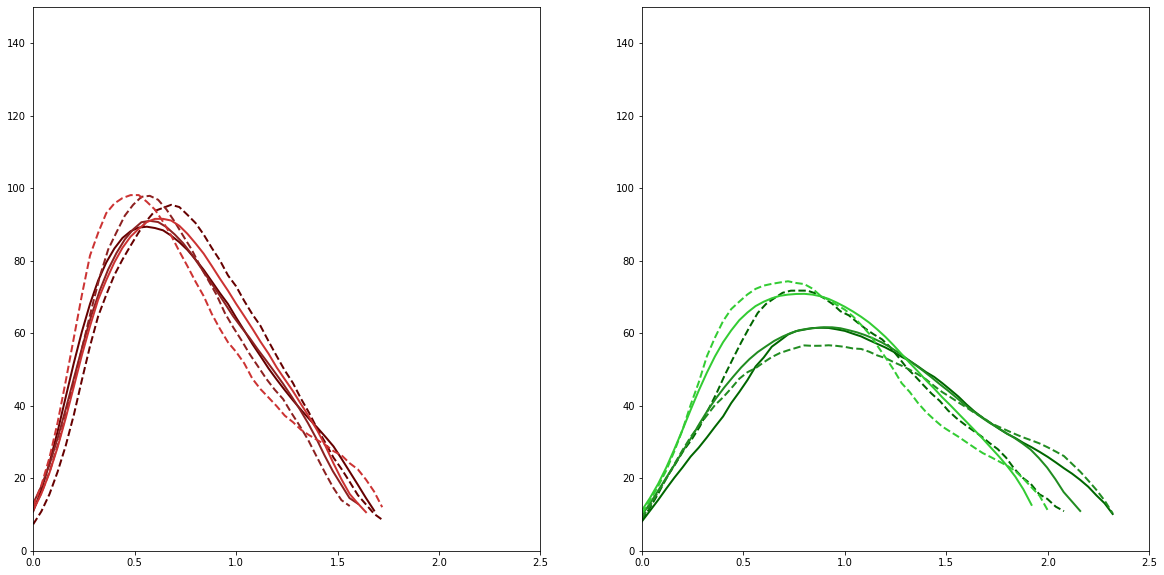

In [106]:
# plot median speed profile of all sessions/blocks for each rat
med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
c21med60, c21med90, c21med120 = {}, {}, {}
c21tmed60, c21tmed90, c21tmed120 = {}, {}, {}
fig, axs = plt.subplots(1, 2, constrained_layout = False, figsize=(20, 10))



_, _, data120 = separate_data(animalList, dist120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, datat120 = separate_data(animalList, dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdata120 = separate_data(animalList, dist120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdatat120 = separate_data(animalList, dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

_, _, dataCNO_120 = separate_data(animalList, CNO_120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, dataCNO_t120 = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdataCNO_120 = separate_data(animalList, CNO_120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdataCNO_t120 = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)




for index, animal in enumerate(oldAnimalList):
    print(colorprint(animal, rat_markers[animal][0]))
    med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
    c21med60[animal], c21med90[animal], c21med120[animal], c21tmed60[animal], c21tmed90[animal], c21tmed120[animal] = ([]for i in range(6))

    for i in range(0, 12):

        med120[animal] = np.append(med120[animal], sdata120[animal][i])
        tmed120[animal] = np.append(tmed120[animal], sdatat120[animal][i])
        c21med120[animal] = np.append(c21med120[animal], sdataCNO_120[animal][i])
        c21tmed120[animal] = np.append(c21tmed120[animal], sdataCNO_t120[animal][i])

    
    a = 1 if animal.startswith('RatM') else 0

    time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
    axs[a].plot(time120, traj120, color= rat_markers[animal][0], lw=2, alpha=1) 


    c21time120, c21traj120 = compute_median_trajectory(c21med120[animal], c21tmed120[animal])
    axs[a].plot(c21time120, c21traj120, color= rat_markers[animal][0], lw=2, alpha=1, ls='--')



    axs[a].set_xlim(0, 2.5)
    axs[a].set_ylim(0, 150)

plt.show()
#print(med60[animal],med90[animal], med120[animal])

/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


RatF20
RatF21
RatF22
RatM20
RatM21
RatM22


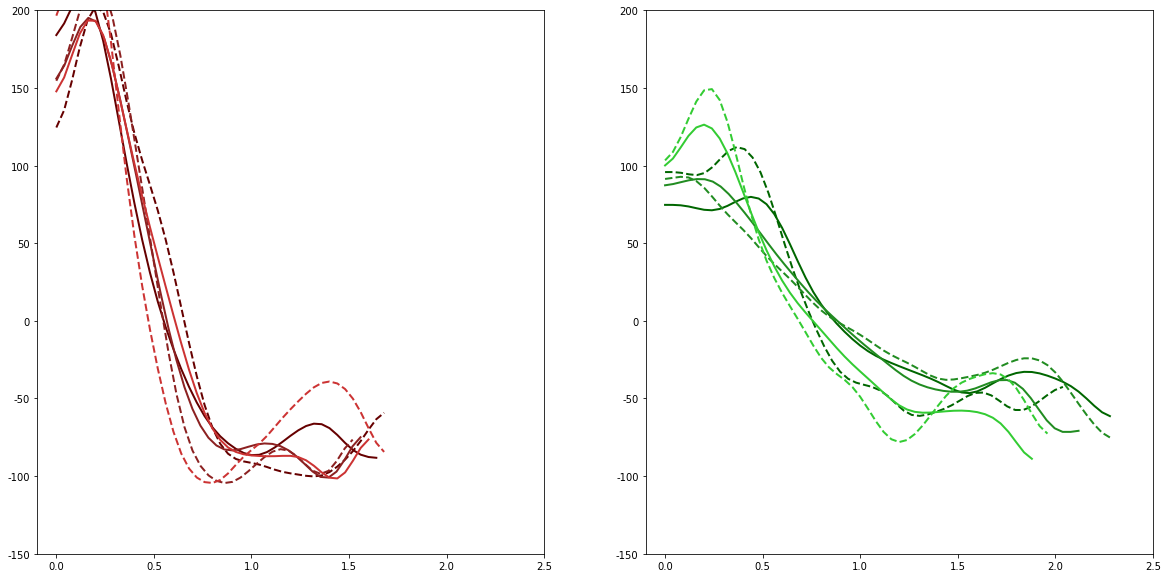

In [109]:
# plot median speed profile of all sessions/blocks for each rat
med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
c21med60, c21med90, c21med120 = {}, {}, {}
c21tmed60, c21tmed90, c21tmed120 = {}, {}, {}
fig, axs = plt.subplots(1, 2, constrained_layout = False, figsize=(20, 10))



_, _, data120 = separate_data(animalList, dist120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, datat120 = separate_data(animalList, dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdata120 = separate_data(animalList, dist120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdatat120 = separate_data(animalList, dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

_, _, dataCNO_120 = separate_data(animalList, CNO_120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, dataCNO_t120 = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdataCNO_120 = separate_data(animalList, CNO_120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdataCNO_t120 = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)




for index, animal in enumerate(oldAnimalList):
    print(colorprint(animal, rat_markers[animal][0]))
    med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
    c21med60[animal], c21med90[animal], c21med120[animal], c21tmed60[animal], c21tmed90[animal], c21tmed120[animal] = ([]for i in range(6))

    for i in range(0, 12):

        med120[animal] = np.append(med120[animal], sdata120[animal][i])
        tmed120[animal] = np.append(tmed120[animal], sdatat120[animal][i])
        c21med120[animal] = np.append(c21med120[animal], sdataCNO_120[animal][i])
        c21tmed120[animal] = np.append(c21tmed120[animal], sdataCNO_t120[animal][i])

    
    a = 1 if animal.startswith('RatM') else 0

    time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
    axs[a].plot(time120[:-1], smooth(np.diff(traj120)*25, 2), color= rat_markers[animal][0], lw=2, alpha=1) 


    c21time120, c21traj120 = compute_median_trajectory(c21med120[animal], c21tmed120[animal])
    axs[a].plot(c21time120[:-1], smooth(np.diff(c21traj120)*25, 2), color= rat_markers[animal][0], lw=2, alpha=1, ls='--')



    axs[a].set_xlim(-.1, 2.5)
    axs[a].set_ylim(-150, 200)

plt.show()
#print(med60[animal],med90[animal], med120[animal])

/home/david/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


RatF20
RatF21
RatF22
RatM20
RatM21
RatM22


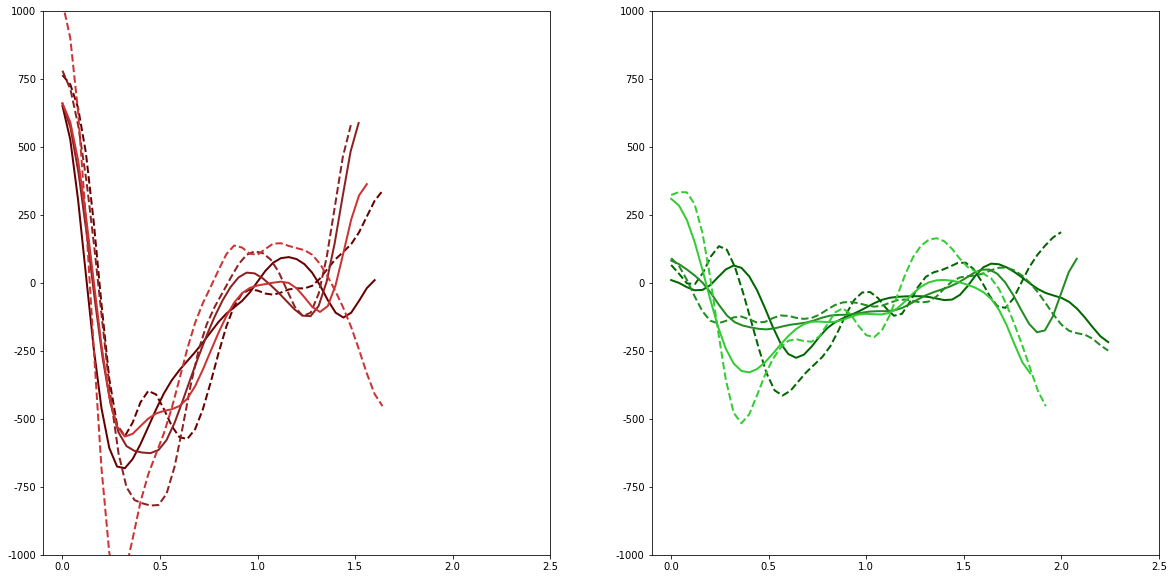

In [114]:
# plot median speed profile of all sessions/blocks for each rat
med60, med90, med120 = {}, {}, {}
tmed60, tmed90, tmed120 = {}, {}, {}
c21med60, c21med90, c21med120 = {}, {}, {}
c21tmed60, c21tmed90, c21tmed120 = {}, {}, {}
fig, axs = plt.subplots(1, 2, constrained_layout = False, figsize=(20, 10))



_, _, data120 = separate_data(animalList, dist120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, datat120 = separate_data(animalList, dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdata120 = separate_data(animalList, dist120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdatat120 = separate_data(animalList, dist120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)

_, _, dataCNO_120 = separate_data(animalList, CNO_120, XtrackRunToLeftBin, XtrackRunToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, dataCNO_t120 = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdataCNO_120 = separate_data(animalList, CNO_120, instantSpeedLeftBin, instantSpeedRightBin, 'Distance', params, 'avgrunspeed', True)
_, _, sdataCNO_t120 = separate_data(animalList, CNO_120, trackTimeToLeftBin, trackTimeToRightBin, 'Distance', params, 'avgrunspeed', True)




for index, animal in enumerate(oldAnimalList):
    print(colorprint(animal, rat_markers[animal][0]))
    med60[animal], med90[animal], med120[animal], tmed60[animal], tmed90[animal], tmed120[animal] = ([]for i in range(6))
    c21med60[animal], c21med90[animal], c21med120[animal], c21tmed60[animal], c21tmed90[animal], c21tmed120[animal] = ([]for i in range(6))

    for i in range(0, 12):

        med120[animal] = np.append(med120[animal], sdata120[animal][i])
        tmed120[animal] = np.append(tmed120[animal], sdatat120[animal][i])
        c21med120[animal] = np.append(c21med120[animal], sdataCNO_120[animal][i])
        c21tmed120[animal] = np.append(c21tmed120[animal], sdataCNO_t120[animal][i])

    
    a = 1 if animal.startswith('RatM') else 0

    time120, traj120 = compute_median_trajectory(med120[animal], tmed120[animal])
    axs[a].plot(time120[:-2], smooth(np.diff(np.diff(traj120)*25)*25, 2), color= rat_markers[animal][0], lw=2, alpha=1) 


    c21time120, c21traj120 = compute_median_trajectory(c21med120[animal], c21tmed120[animal])
    axs[a].plot(c21time120[:-2], smooth(np.diff(np.diff(c21traj120)*25)*25, 2), color= rat_markers[animal][0], lw=2, alpha=1, ls='--')



    axs[a].set_xlim(-.1, 2.5)
    axs[a].set_ylim(-1000, 1000)

plt.show()
#print(med60[animal],med90[animal], med120[animal])